In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import torch

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# The weather dataset

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
#print("df", df)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
#print("date_time", date_time)

In [4]:
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
5     996.50     -8.05    265.38        -8.78    94.4          3.33   
11    996.62     -8.88    264.54        -9.77    93.2          3.12   
17    996.84     -8.81    264.59        -9.66    93.5          3.13   
23    996.99     -9.05    264.34       -10.02    92.6          3.07   
29    997.46     -9.63    263.72       -10.65    92.2          2.94   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
5           3.14          0.19       1.96             3.15       1307.86   
11          2.90          0.21       1.81             2.91       1312.25   
17          2.93          0.20       1.83             2.94       1312.18   
23          2.85          0.23       1.78             2.85       1313.61   
29          2.71          0.23       1.69             2.71       1317.19   

    wv (m/s)  max. wv (m/s)  wd (deg)  
5       0.21           0.63     192.7  
11      0.25           0.63     190.3  
17      0.18           0.63     167.2  
23      0.10           0.38     240.0  
29      0.40           0.88     157.0

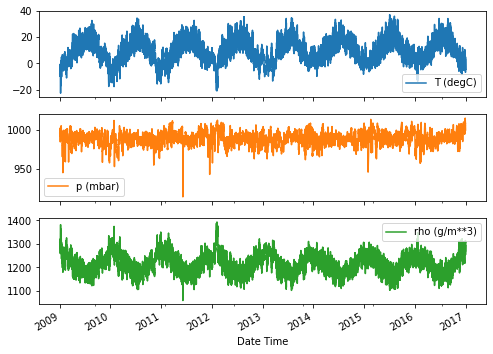

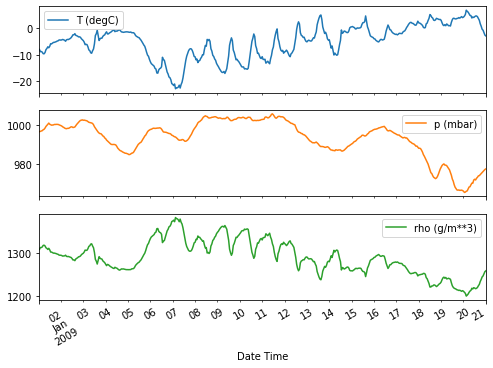

In [5]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [6]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         70091.0   989.212842   8.358886   913.60   984.20   989.57   
T (degC)         70091.0     9.450482   8.423384   -22.76     3.35     9.41   
Tpot (K)         70091.0   283.493086   8.504424   250.85   277.44   283.46   
Tdew (degC)      70091.0     4.956471   6.730081   -24.80     0.24     5.21   
rh (%)           70091.0    76.009788  16.474920    13.88    65.21    79.30   
VPmax (mbar)     70091.0    13.576576   7.739883     0.97     7.77    11.82   
VPact (mbar)     70091.0     9.533968   4.183658     0.81     6.22     8.86   
VPdef (mbar)     70091.0     4.042536   4.898549     0.00     0.87     2.19   
sh (g/kg)        70091.0     6.022560   2.655812     0.51     3.92     5.59   
H2OC (mmol/mol)  70091.0     9.640437   4.234862     0.81     6.29     8.96   
rho (g/m**3)     70091.0  1216.061232  39.974263  1059.45  1187.47  1213.80   
wv (m/s)         70091.0     1.702567  65.447512 -9999.00     0.99     1.76   
max. wv (m/s)    70091.0     2.963041  75.597657 -9999.00     1.76     2.98   
wd (deg)         70091.0   174.789095  86.619431     0.00   125.30   198.10   

                      75%      max  
p (mbar)          994.720  1015.29  
T (degC)           15.480    37.28  
Tpot (K)          289.530   311.21  
Tdew (degC)        10.080    23.06  
rh (%)             89.400   100.00  
VPmax (mbar)       17.610    63.77  
VPact (mbar)       12.360    28.25  
VPdef (mbar)        5.300    46.01  
sh (g/kg)           7.800    18.07  
H2OC (mmol/mol)    12.490    28.74  
rho (g/m**3)     1242.765  1393.54  
wv (m/s)            2.860    14.01  
max. wv (m/s)       4.740    23.50  
wd (deg)          234.000   360.00

In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

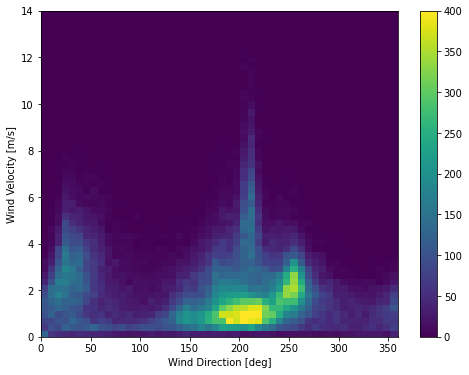

In [8]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [9]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

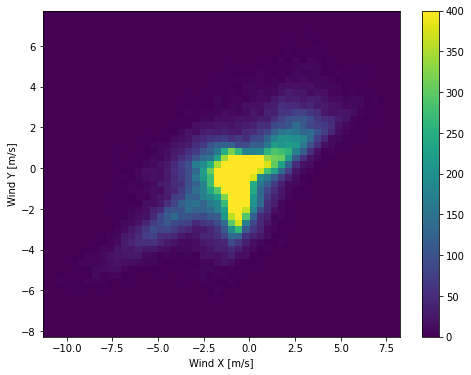

In [10]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [11]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

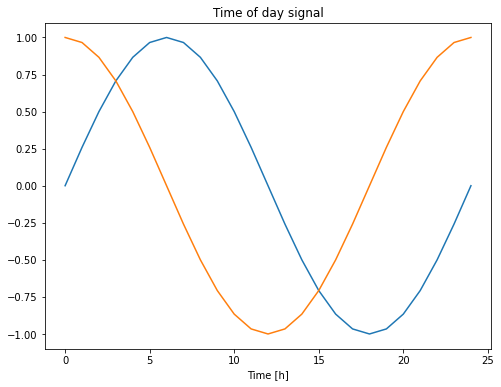

In [13]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Qu'est ce qui est montré sur ce schéma?

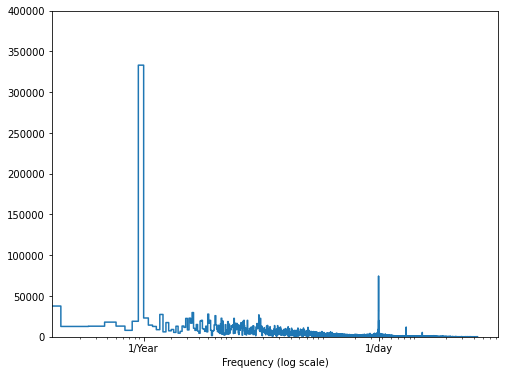

In [14]:
fft = tf.signal.rfft(df['T (degC)']) ### utilisation de tensorflow
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [15]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [16]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

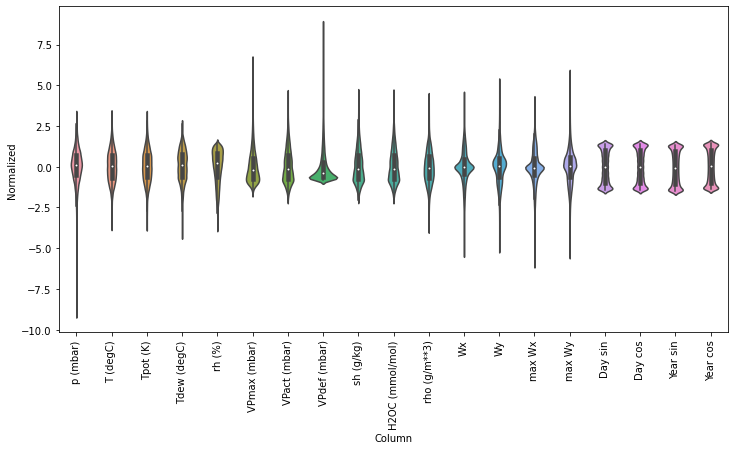

In [17]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data windowing 

In [18]:
class WindowGenerator():
    def __init__(self,
                 input_width,
                 label_width,
                 shift,
                 train_df = train_df,
                 val_df = val_df, 
                 test_df = test_df,
                 label_columns = None,
                 dataframe = None):
        if dataframe is not None: 
            self.y = dataframe[label_columns]
            self.x = dataframe
        
        # Store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = { name: i for i, name in enumerate(label_columns)}
        self.column_indices = { name: i for i, name in enumerate(train_df.columns)}
        
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]
        
    def __len__(self):
        return len(self.y) // self.total_window_size
    
    def __getitem__(self, idx):
        return (
            self.x.iloc[self.input_indices + self.total_window_size*idx].values, 
            self.y.iloc[self.label_indices + self.total_window_size*idx].values,
        )
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])

In [19]:
w1 = WindowGenerator(input_width = 24, label_width = 1, shift = 24, label_columns=['T (degC)'])

In [20]:
print(w1)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']


In [21]:
w2 = WindowGenerator(input_width = 6, label_width = 1, shift = 1, label_columns=['T (degC)'])

In [22]:
print(w2)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']


In [23]:
def split_window(self, features):
    #print(self.input_slice)
    #print(self.label_slice)
    #print(features[:, self.input_slice, :])
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.label_slice, :]
    if self.label_columns is not None:
        #labels = tf.stack(
        #[labels[:, :, self.column_indices[name]] for name in self.label_columns],
        #axis=-1) ## utilisation de tensorflow
        labels = torch.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1
        )

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the tf.data.Datasets are easier to inspect.

    #inputs.set_shape([None, self.input_width, None])
    #labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [24]:
# Stack three slices, the length of the total window:
#example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                           np.array(train_df[100:100+w2.total_window_size]),
#                           np.array(train_df[200:200+w2.total_window_size])]) # utilisation de tensorflow
example_window = torch.stack([torch.tensor(train_df[:w2.total_window_size].values),
                                torch.tensor(train_df[100:100+w2.total_window_size].values),
                                torch.tensor(train_df[200:200+w2.total_window_size].values)])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, feature)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, feature)
Window shape: torch.Size([3, 7, 19])
Inputs shape: torch.Size([3, 6, 19])
labels shape: torch.Size([3, 1, 1])


In [25]:
w2.example = example_inputs, example_labels

In [26]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12,8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        
        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
            
        if label_col_index is None:
            continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker = 'X', edgecolors = 'k', label = 'Predictions', 
                        c = '#ff7f0e', s=64)
            
        if n == 0:
            plt.legend()
    plt.xlabel('Time [h]')
    
WindowGenerator.plot = plot

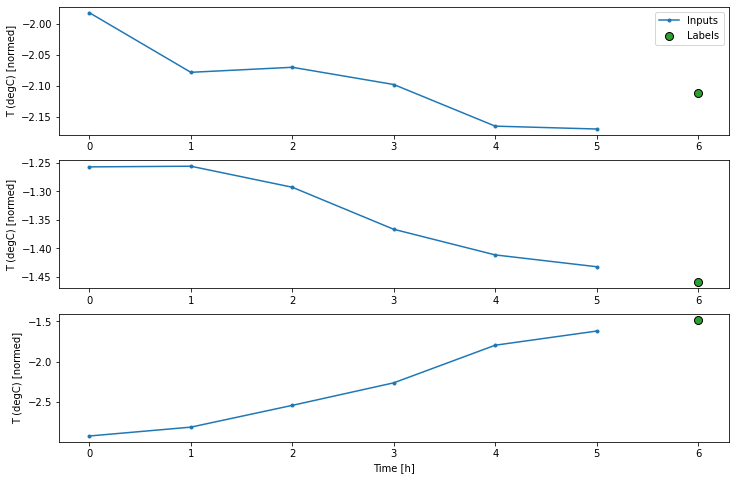

In [27]:
w2.plot()

In [28]:
single_step_window = WindowGenerator(
    input_width = 1,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)'])

In [29]:
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [31]:
BATCH_SIZE = 4

train_ds = WindowGenerator(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowGenerator(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [32]:
print(len(train_ds.y) // train_ds.total_window_size)
print(len(train_ds.y))
print(train_ds.total_window_size)
print(len(train_ds))
#print(train_df)

24531
49063
2
24531


In [33]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    print(inputs)
    print(label)
    break
#print(len(train_ds))

torch.Size([4, 1, 19]) torch.Size([4, 1, 1])
tensor([[[ 9.4531e-01, -1.9825e+00, -2.0419e+00, -1.9190e+00,  1.1171e+00,
          -1.3029e+00, -1.4773e+00, -7.9042e-01, -1.4800e+00, -1.4827e+00,
           2.2185e+00,  1.9341e-01,  2.2116e-01,  1.1114e-01,  2.1793e-01,
           4.7198e-05,  1.4142e+00, -6.2412e-02,  1.4285e+00]],

        [[ 9.8628e-01, -2.0703e+00, -2.1324e+00, -2.0452e+00,  1.0627e+00,
          -1.3288e+00, -1.5272e+00, -7.8835e-01, -1.5287e+00, -1.5320e+00,
           2.3240e+00,  2.0798e-01,  2.7627e-01,  1.1122e-01,  3.2408e-01,
           7.0718e-01,  1.2248e+00, -6.0366e-02,  1.4284e+00]],

        [[ 1.0610e+00, -2.1650e+00, -2.2322e+00, -2.1872e+00,  9.8421e-01,
          -1.3535e+00, -1.5795e+00, -7.8212e-01, -1.5811e+00, -1.5860e+00,
           2.4463e+00,  1.1226e-01,  3.5082e-01,  4.8640e-02,  4.0205e-01,
           1.2248e+00,  7.0718e-01, -5.8320e-02,  1.4284e+00]],

        [[ 1.1659e+00, -2.1119e+00, -2.1863e+00, -2.1083e+00,  1.0265e+00,
          

In [34]:
loss = nn.MSELoss()

In [35]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x[:, -1, 1].reshape((x.shape[0], -1, 1))

In [36]:
for (inputs, label) in train_loader:
    out = baseline(inputs)
    print(out)
    break

NameError: name 'baseline' is not defined

In [37]:
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate (pbar):
        out = baseline(inputs)
        running_loss += loss(out, label) 
        if not (i % 100):
            #print(f"Loss total: {running_loss}")
            pbar.set_description(f"Loss: {running_loss / (i+1):.5f}")
        

  0%|          | 0/1753 [00:00<?, ?it/s]


NameError: name 'baseline' is not defined

In [86]:
targets = []
outputs = []

for i in range(24):
    targets.append(float(val_ds[i][1]))
    outputs.append(baseline(val_ds[i][0][None, :]).squeeze())
    
plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

NameError: name 'baseline' is not defined

In [39]:
print(val_ds[i][0])

[[ 0.21375893  0.61835059  0.59773     1.32100282  1.20770675  0.40740854
   1.53579887 -0.68871619  1.5260445   1.52665393 -0.6017026   0.07225334
  -0.63900759  0.08947817 -0.53561805  0.061737    1.41290054 -0.85793047
  -1.15301594]]


In [40]:
print(val_ds[i][0][None, :])

[[[ 0.21375893  0.61835059  0.59773     1.32100282  1.20770675
    0.40740854  1.53579887 -0.68871619  1.5260445   1.52665393
   -0.6017026   0.07225334 -0.63900759  0.08947817 -0.53561805
    0.061737    1.41290054 -0.85793047 -1.15301594]]]


# Linear model

In [41]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.dense = nn.Linear(19, 1)
        
    def forward(self, x):
        return self.dense(x)

In [42]:
linear = Linear()

In [43]:
for (inputs, label) in train_loader:
    print(inputs.shape)
    out = linear(inputs.float())
    print(out)
    break;

torch.Size([4, 1, 19])
tensor([[[0.9398]],

        [[0.8410]],

        [[0.7100]],

        [[0.3965]]], grad_fn=<AddBackward0>)


In [44]:
MAX_EPOCHS = 20

criterion = nn.MSELoss()
optimizer = optim.Adam(linear.parameters())

history = []

for epoch in range(MAX_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = linear(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if not(i % 100):
            pbar.set_description(
            f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f})"
            )
            history.append(running_loss / (i+1))
        
plt.plot(history)
plt.show()

Epoch #1 - Loss = 0.10252):  66%|██████▌   | 4029/6133 [00:08<00:04, 500.57it/s]


KeyboardInterrupt: 

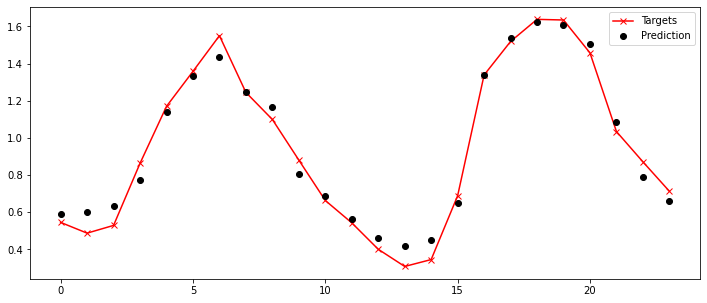

In [90]:
targets = []
outputs = []
for i in range(24):
    outputs.append(linear(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

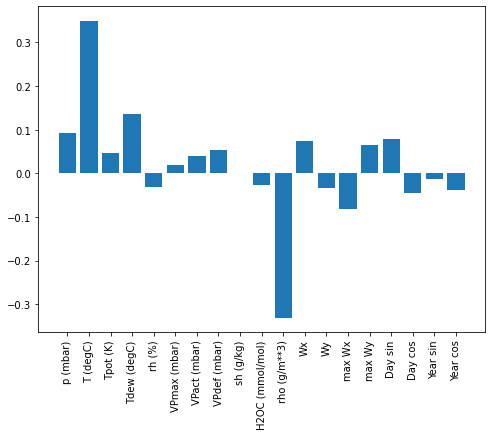

In [46]:
plt.bar(x = range(len(train_df.columns)),
       height = list(linear.parameters())[0].data.squeeze().numpy()
       )
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation = 90)

# Dense 

In [47]:
class Dense(nn.Module):
    def __init__(self):
        super(Dense, self).__init__()
        self.dense_1 = nn.Linear(19,64)
        self.dense_2 = nn.Linear(64,64)
        self.dense_3 = nn.Linear(64,1)
        
    def forward(self, x):
        x = self.dense_1(x)
        x = F.relu(x)
        x = self.dense_2(x)
        x = F.relu(x)
        x = self.dense_3(x)
        return x

In [48]:
dense = Dense()

In [49]:
for (inputs, label) in train_loader:
    print(inputs.shape)
    out = dense(inputs.float())
    print(out.shape)
    print(out)
    break;

torch.Size([4, 1, 19])
torch.Size([4, 1, 1])
tensor([[[0.2591]],

        [[0.2613]],

        [[0.2530]],

        [[0.3240]]], grad_fn=<AddBackward0>)


  0%|          | 0/3067 [00:00<?, ?it/s]/Users/joranmarie/Library/Caches/pypoetry/virtualenvs/batteryprobe-Np1qeyyo-py3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([4, 1, 1])) that is different to the input size (torch.Size([4, 3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #1 - Loss = 0.02213):  99%|█████████▉| 3041/3067 [00:06<00:00, 405.43it/s]/Users/joranmarie/Library/Caches/pypoetry/virtualenvs/batteryprobe-Np1qeyyo-py3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #10 - Loss = 0.01994): 100%|██

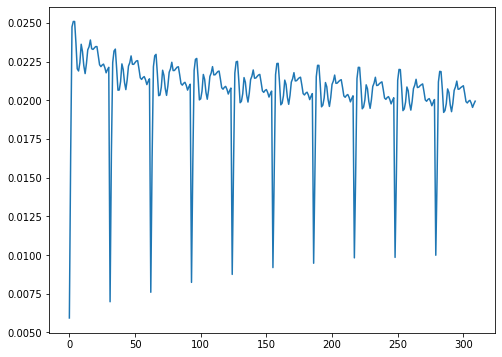

In [104]:
MAX_EPOCHS = 10

criterion = nn.MSELoss()
# optimizer = optim.Adam(linear.parameters()) ## Pourquoi ne marche pas avec cet optimiseur?
optimizer = optim.SGD(dense.parameters(), lr=1e-3, momentum=0.9)

history = []

for epoch in range(MAX_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = dense(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if not(i % 100):
            pbar.set_description(
            f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f})"
            )
            history.append(running_loss / (i+1))
        
plt.plot(history)
plt.show()

(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)
(1, 19)


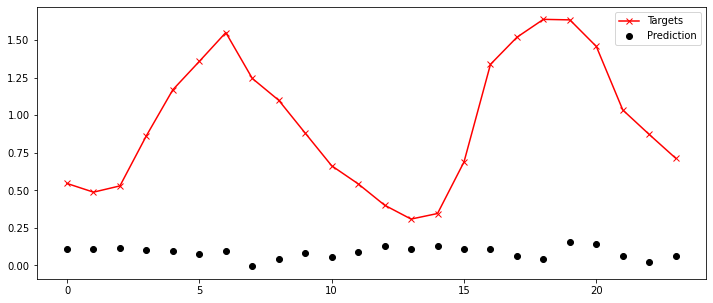

In [65]:
targets = []
outputs = []
for i in range(24):
    print(val_ds[i][0].shape)
    outputs.append(dense(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

# Multi-step dense

In [54]:
BATCH_SIZE = 4
CONV_WIDTH = 3

train_ds = WindowGenerator(
    dataframe = train_df,
    input_width = CONV_WIDTH,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)']
)

train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = False)

val_ds = WindowGenerator(
    dataframe = val_df, 
    input_width = CONV_WIDTH,
    label_width = 1,
    shift = 1,
    label_columns = ['T (degC)']
)

val_loader = DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = False )

In [55]:
for (inputs, label) in train_loader:
    print(inputs.shape, label.shape)
    break

torch.Size([4, 3, 19]) torch.Size([4, 1, 1])


In [56]:
print(inputs.float())
print(torch.flatten(inputs, start_dim = 1))

tensor([[[ 9.4531e-01, -1.9825e+00, -2.0419e+00, -1.9190e+00,  1.1171e+00,
          -1.3029e+00, -1.4773e+00, -7.9042e-01, -1.4800e+00, -1.4827e+00,
           2.2185e+00,  1.9341e-01,  2.2116e-01,  1.1114e-01,  2.1793e-01,
           4.7198e-05,  1.4142e+00, -6.2412e-02,  1.4285e+00],
         [ 9.5977e-01, -2.0784e+00, -2.1382e+00, -2.0610e+00,  1.0446e+00,
          -1.3301e+00, -1.5344e+00, -7.8627e-01, -1.5362e+00, -1.5390e+00,
           2.3257e+00,  1.7299e-01,  2.2210e-01,  1.0946e-01,  2.2780e-01,
           3.6609e-01,  1.3661e+00, -6.1389e-02,  1.4284e+00],
         [ 9.8628e-01, -2.0703e+00, -2.1324e+00, -2.0452e+00,  1.0627e+00,
          -1.3288e+00, -1.5272e+00, -7.8835e-01, -1.5287e+00, -1.5320e+00,
           2.3240e+00,  2.0798e-01,  2.7627e-01,  1.1122e-01,  3.2408e-01,
           7.0718e-01,  1.2248e+00, -6.0366e-02,  1.4284e+00]],

        [[ 1.0610e+00, -2.1650e+00, -2.2322e+00, -2.1872e+00,  9.8421e-01,
          -1.3535e+00, -1.5795e+00, -7.8212e-01, -1.5811e+0

In [57]:
class MultiStepDense(nn.Module):
    def __init__(self):
        super(MultiStepDense,self).__init__()
        self.flatten = nn.Flatten()
        self.dense_1 = nn.Linear(19*CONV_WIDTH,32)
        self.dense_2 = nn.Linear(32,32)
        self.dense_3 = nn.Linear(32,1)
        #self.reshape = torch.reshape([1, -1])
        #self.reshape = nn.Unflatten()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = F.relu(x)
        x = self.dense_2(x)
        x = F.relu(x)
        x = self.dense_3(x)
        x = torch.reshape(x, [1,-1])
        return x

In [58]:
multistep = MultiStepDense()

In [59]:
for (inputs, label) in train_loader:
    out = multistep(inputs.float())
    print(out)
    print(label)
    break

tensor([[-0.0706, -0.0847, -0.0976, -0.0747]], grad_fn=<ViewBackward>)
tensor([[[-2.0980]],

        [[-1.9883]],

        [[-1.8461]],

        [[-1.6763]]], dtype=torch.float64)


  0%|          | 0/3067 [00:00<?, ?it/s]/Users/joranmarie/Library/Caches/pypoetry/virtualenvs/batteryprobe-Np1qeyyo-py3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([4, 1, 1])) that is different to the input size (torch.Size([1, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #1 - Loss = 3.33848:   1%|          | 23/3067 [00:00<00:13, 228.56it/s]

tensor([[-0.0706, -0.0847, -0.0976, -0.0747]], grad_fn=<ViewBackward>)
tensor([[[-2.0980]],

        [[-1.9883]],

        [[-1.8461]],

        [[-1.6763]]], dtype=torch.float64)
tensor([[-0.1334, -0.1287, -0.1160, -0.1458]], grad_fn=<ViewBackward>)
tensor([[[-1.6185]],

        [[-1.5769]],

        [[-1.5815]],

        [[-1.5527]]], dtype=torch.float64)
tensor([[-0.1189, -0.1499, -0.3075, -0.2821]], grad_fn=<ViewBackward>)
tensor([[[-1.4129]],

        [[-1.3713]],

        [[-1.4337]],

        [[-1.5966]]], dtype=torch.float64)
tensor([[-0.2205, -0.1890, -0.2020, -0.1288]], grad_fn=<ViewBackward>)
tensor([[[-1.7699]],

        [[-2.1246]],

        [[-1.7410]],

        [[-1.3759]]], dtype=torch.float64)
tensor([[-0.1923, -0.2190, -0.2025, -0.1777]], grad_fn=<ViewBackward>)
tensor([[[-1.4960]],

        [[-1.2719]],

        [[-1.2696]],

        [[-1.1552]]], dtype=torch.float64)
tensor([[-0.2217, -0.2410, -0.3029, -0.2962]], grad_fn=<ViewBackward>)
tensor([[[-1.1922]],

       

Epoch #1 - Loss = 3.33848:   2%|▏         | 49/3067 [00:00<00:12, 236.46it/s]

tensor([[-1.0184, -0.9671, -0.9584, -1.0488]], grad_fn=<ViewBackward>)
tensor([[[-1.3227]],

        [[-1.2892]],

        [[-1.2222]],

        [[-1.2361]]], dtype=torch.float64)
tensor([[-1.1350, -1.2651, -1.2993, -1.1418]], grad_fn=<ViewBackward>)
tensor([[[-1.3239]],

        [[-1.3955]],

        [[-1.4776]],

        [[-1.5319]]], dtype=torch.float64)
tensor([[-1.2536, -1.2889, -1.4372, -1.3767]], grad_fn=<ViewBackward>)
tensor([[[-1.4094]],

        [[-1.3678]],

        [[-1.4325]],

        [[-1.3458]]], dtype=torch.float64)
tensor([[-1.3346, -1.0336, -0.8544, -0.8166]], grad_fn=<ViewBackward>)
tensor([[[-1.3817]],

        [[-1.6312]],

        [[-1.0027]],

        [[-0.7208]]], dtype=torch.float64)
tensor([[-1.0468, -1.1265, -1.1496, -1.1006]], grad_fn=<ViewBackward>)


Epoch #1 - Loss = 3.33848:   2%|▏         | 74/3067 [00:00<00:12, 238.27it/s]

tensor([[[-1.0085]],

        [[-1.1564]],

        [[-1.3678]],

        [[-1.4313]]], dtype=torch.float64)
tensor([[-0.9725, -0.7611, -0.9823, -1.1579]], grad_fn=<ViewBackward>)
tensor([[[-0.9149]],

        [[-0.4088]],

        [[-1.0477]],

        [[-1.3574]]], dtype=torch.float64)
tensor([[-1.2157, -1.1149, -1.0622, -0.9508]], grad_fn=<ViewBackward>)
tensor([[[-1.5342]],

        [[-1.6104]],

        [[-1.0119]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-1.1768, -1.0977, -0.9967, -0.9028]], grad_fn=<ViewBackward>)
tensor([[[-1.0443]],

        [[-0.9622]],

        [[-1.0940]],

        [[-1.1945]]], dtype=torch.float64)
tensor([[-0.7961, -0.5748, -0.8092, -0.9921]], grad_fn=<ViewBackward>)
tensor([[[-0.5891]],

        [[-0.4342]],

        [[-0.7150]],

        [[-0.9622]]], dtype=torch.float64)
tensor([[-0.9953, -0.9207, -0.8965, -0.8252]], grad_fn=<ViewBackward>)
tensor([[[-1.1436]],

        [[-1.0477]],

        [[-0.7300]],

        [[-0.1719]]], dtype=torch.

Epoch #1 - Loss = 3.33848:   3%|▎         | 100/3067 [00:00<00:12, 243.14it/s]

tensor([[[-0.8005]],

        [[-0.4631]],

        [[-0.3857]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-1.0911, -1.0770, -1.0397, -0.7845]], grad_fn=<ViewBackward>)
tensor([[[-0.4435]],

        [[-0.5994]],

        [[-0.6722]],

        [[-0.6018]]], dtype=torch.float64)
tensor([[-0.8376, -0.9042, -0.8222, -0.7658]], grad_fn=<ViewBackward>)
tensor([[[-0.6780]],

        [[-0.7277]],

        [[-0.8536]],

        [[-0.9022]]], dtype=torch.float64)
tensor([[-0.7269, -0.7069, -0.7982, -0.8431]], grad_fn=<ViewBackward>)
tensor([[[-0.7485]],

        [[-0.8409]],

        [[-0.8640]],

        [[-1.2627]]], dtype=torch.float64)
tensor([[-0.8973, -0.7746, -0.4043, -0.4515]], grad_fn=<ViewBackward>)
tensor([[[-1.2950]],

        [[-0.8190]],

        [[-0.3834]],

        [[-0.3707]]], dtype=torch.float64)


Epoch #1 - Loss = 0.46476:   4%|▍         | 129/3067 [00:00<00:11, 255.22it/s]

tensor([[-0.4384, -0.5844, -0.6287, -0.6312]], grad_fn=<ViewBackward>)
tensor([[[-0.4250]],

        [[-0.5671]],

        [[-0.7335]],

        [[-0.7866]]], dtype=torch.float64)
tensor([[-0.5989, -0.4581, -0.5966, -0.6245]], grad_fn=<ViewBackward>)
tensor([[[-0.5498]],

        [[-0.4331]],

        [[-0.6179]],

        [[-0.6861]]], dtype=torch.float64)
tensor([[-0.5254, -0.6116, -0.3647, -0.4317]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

        [[-0.7416]],

        [[-0.4643]],

        [[-0.4469]]], dtype=torch.float64)
tensor([[-0.4963, -0.7381, -0.7158, -0.6802]], grad_fn=<ViewBackward>)
tensor([[[-0.6815]],

        [[-0.8074]],

        [[-0.9357]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.7142, -0.5537, -0.6627, -0.6759]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.5971]],

        [[-0.6572]],

        [[-0.6919]]], dtype=torch.float64)
tensor([[-0.6787, -0.6542, -0.5837, -0.5003]], grad_fn=<ViewBackward>)
tensor([[[-0.7716]],

       

tensor([[-0.0622, -0.0052, -0.0712, -0.1541]], grad_fn=<ViewBackward>)
tensor([[[1.0112]],

        [[1.2504]],

        [[0.8078]],

        [[0.1874]]], dtype=torch.float64)
tensor([[-0.2016, -0.2204, -0.0135,  0.0644]], grad_fn=<ViewBackward>)
tensor([[[-0.4215]],

        [[ 0.0037]],

        [[ 0.9858]],

        [[ 1.1695]]], dtype=torch.float64)
tensor([[ 0.1164, -0.0216, -0.1541, -0.1457]], grad_fn=<ViewBackward>)
tensor([[[ 0.7512]],

        [[ 0.0788]],

        [[-0.3545]],

        [[ 0.2244]]], dtype=torch.float64)
tensor([[0.0935, 0.1731, 0.1351, 0.0255]], grad_fn=<ViewBackward>)
tensor([[[1.0886]],

        [[1.2781]],

        [[0.8471]],

        [[0.1227]]], dtype=torch.float64)
tensor([[-0.0773, -0.1014,  0.0847,  0.1581]], grad_fn=<ViewBackward>)
tensor([[[-0.2667]],

        [[ 0.1573]],

        [[ 1.3821]],

        [[ 1.4086]]], dtype=torch.float64)


Epoch #1 - Loss = 0.46476:   6%|▌         | 183/3067 [00:00<00:11, 259.06it/s]

tensor([[ 0.2522,  0.0755, -0.1326, -0.1455]], grad_fn=<ViewBackward>)
tensor([[[ 1.0204]],

        [[ 0.4947]],

        [[-0.3118]],

        [[ 0.5144]]], dtype=torch.float64)
tensor([[0.1502, 0.3178, 0.2850, 0.1512]], grad_fn=<ViewBackward>)
tensor([[[1.1625]],

        [[1.4606]],

        [[0.8252]],

        [[0.3826]]], dtype=torch.float64)
tensor([[0.0111, 0.0750, 0.0895, 0.0601]], grad_fn=<ViewBackward>)
tensor([[[ 0.0869]],

        [[-0.2239]],

        [[-0.2852]],

        [[-0.2586]]], dtype=torch.float64)
tensor([[ 0.0407,  0.0397, -0.0246, -0.0720]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[-0.1026]],

        [[-0.3314]],

        [[-0.4481]]], dtype=torch.float64)
tensor([[-0.0253,  0.1499,  0.0840, -0.0662]], grad_fn=<ViewBackward>)
tensor([[[-0.1951]],

        [[-0.0345]],

        [[-0.1153]],

        [[-0.1465]]], dtype=torch.float64)
tensor([[-0.0507,  0.0284,  0.0825,  0.3233]], grad_fn=<ViewBackward>)
tensor([[[-0.1165]],

        [[-0.0807]]

Epoch #1 - Loss = 0.38373:   6%|▌         | 183/3067 [00:00<00:11, 259.06it/s]

tensor([[[-0.2124]],

        [[-0.0356]],

        [[ 0.6426]],

        [[ 0.7628]]], dtype=torch.float64)
tensor([[0.5002, 0.4641, 0.1245, 0.1139]], grad_fn=<ViewBackward>)
tensor([[[ 0.5906]],

        [[ 0.1458]],

        [[-0.1200]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.3637, 0.6988, 0.6675, 0.3030]], grad_fn=<ViewBackward>)
tensor([[[0.6345]],

        [[0.9650]],

        [[0.5213]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.2120, 0.1982, 0.5436, 0.6983]], grad_fn=<ViewBackward>)
tensor([[[0.0730]],

        [[0.3549]],

        [[0.9580]],

        [[1.1961]]], dtype=torch.float64)
tensor([[0.8984, 0.4119, 0.1842, 0.3060]], grad_fn=<ViewBackward>)
tensor([[[0.9130]],

        [[0.3226]],

        [[0.1146]],

        [[0.3780]]], dtype=torch.float64)
tensor([[0.3475, 0.4617, 0.4613, 0.3381]], grad_fn=<ViewBackward>)
tensor([[[0.7466]],

        [[0.7836]],

        [[0.5271]],

        [[0.0926]]], dtype=torch.float64)
tensor([[0.1054, 0.1084, 0.

Epoch #1 - Loss = 0.38373:   7%|▋         | 210/3067 [00:00<00:10, 260.41it/s]

tensor([[[-0.3164]],

        [[ 0.4404]],

        [[ 1.3266]],

        [[ 1.8673]]], dtype=torch.float64)
tensor([[0.8704, 0.3213, 0.2310, 0.3363]], grad_fn=<ViewBackward>)
tensor([[[0.8182]],

        [[0.4970]],

        [[0.4427]],

        [[0.6195]]], dtype=torch.float64)
tensor([[0.4079, 0.5987, 0.6304, 0.3043]], grad_fn=<ViewBackward>)
tensor([[[1.0643]],

        [[1.1441]],

        [[0.6981]],

        [[0.3006]]], dtype=torch.float64)
tensor([[0.1688, 0.1694, 0.4348, 0.6690]], grad_fn=<ViewBackward>)
tensor([[[-0.0287]],

        [[ 0.6137]],

        [[ 1.2215]],

        [[ 1.3047]]], dtype=torch.float64)
tensor([[0.6648, 0.4264, 0.2198, 0.2293]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[0.2763]],

        [[0.3526]],

        [[0.8194]]], dtype=torch.float64)
tensor([[0.6027, 0.8012, 0.8417, 0.6432]], grad_fn=<ViewBackward>)
tensor([[[1.3393]],

        [[1.4849]],

        [[1.2538]],

        [[0.5744]]], dtype=torch.float64)


Epoch #1 - Loss = 0.38373:   8%|▊         | 239/3067 [00:00<00:10, 267.40it/s]

tensor([[0.4245, 0.3072, 0.7526, 0.7472]], grad_fn=<ViewBackward>)
tensor([[[0.4450]],

        [[0.6657]],

        [[1.3393]],

        [[1.3867]]], dtype=torch.float64)
tensor([[0.8214, 0.5471, 0.4313, 0.4716]], grad_fn=<ViewBackward>)
tensor([[[0.9315]],

        [[0.6345]],

        [[0.4936]],

        [[0.2036]]], dtype=torch.float64)
tensor([[0.4135, 0.6182, 0.5127, 0.3103]], grad_fn=<ViewBackward>)
tensor([[[0.5432]],

        [[0.9777]],

        [[0.4370]],

        [[0.1793]]], dtype=torch.float64)
tensor([[0.1355, 0.2031, 0.3984, 0.5030]], grad_fn=<ViewBackward>)
tensor([[[-0.2598]],

        [[ 0.4289]],

        [[ 0.8078]],

        [[ 1.0470]]], dtype=torch.float64)
tensor([[0.6359, 0.3866, 0.3424, 0.2891]], grad_fn=<ViewBackward>)
tensor([[[0.7501]],

        [[0.4127]],

        [[0.2660]],

        [[0.8621]]], dtype=torch.float64)
tensor([[0.8606, 1.0219, 1.0423, 0.7516]], grad_fn=<ViewBackward>)
tensor([[[1.6120]],

        [[1.8315]],

        [[1.3717]],

      

Epoch #1 - Loss = 0.38373:   9%|▊         | 266/3067 [00:01<00:10, 266.40it/s]

tensor([[0.3007, 0.5863, 0.5944, 0.3454]], grad_fn=<ViewBackward>)
tensor([[[0.6519]],

        [[0.9176]],

        [[0.8448]],

        [[0.4624]]], dtype=torch.float64)
tensor([[0.2115, 0.2364, 0.5856, 0.7727]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.4346]],

        [[0.9153]],

        [[1.2989]]], dtype=torch.float64)
tensor([[0.9943, 0.8965, 0.7368, 0.5575]], grad_fn=<ViewBackward>)
tensor([[[1.2677]],

        [[0.8841]],

        [[0.5952]],

        [[0.5144]]], dtype=torch.float64)
tensor([[0.6343, 0.7110, 0.7522, 0.7057]], grad_fn=<ViewBackward>)
tensor([[[0.5756]],

        [[0.6819]],

        [[0.6184]],

        [[0.6126]]], dtype=torch.float64)
tensor([[0.7312, 0.7567, 0.9566, 1.1657]], grad_fn=<ViewBackward>)
tensor([[[0.6484]],

        [[0.7628]],

        [[0.8864]],

        [[1.4006]]], dtype=torch.float64)
tensor([[1.1698, 1.0477, 1.0089, 0.8938]], grad_fn=<ViewBackward>)
tensor([[[1.1995]],

        [[0.9673]],

        [[0.8194]],

        [[

Epoch #1 - Loss = 0.31618:  10%|▉         | 295/3067 [00:01<00:10, 272.83it/s]

tensor([[0.9745, 0.9846, 0.9323, 0.8153]], grad_fn=<ViewBackward>)
tensor([[[0.9511]],

        [[0.8679]],

        [[0.7385]],

        [[0.7212]]], dtype=torch.float64)
tensor([[0.7908, 0.8008, 0.9831, 0.9537]], grad_fn=<ViewBackward>)
tensor([[[0.6992]],

        [[0.8379]],

        [[1.1764]],

        [[1.2400]]], dtype=torch.float64)
tensor([[0.9839, 0.7715, 0.5080, 0.3928]], grad_fn=<ViewBackward>)
tensor([[[1.1233]],

        [[0.5525]],

        [[0.2232]],

        [[0.5710]]], dtype=torch.float64)
tensor([[0.9419, 1.1940, 1.0799, 0.8962]], grad_fn=<ViewBackward>)
tensor([[[1.5011]],

        [[1.6467]],

        [[1.4710]],

        [[0.7408]]], dtype=torch.float64)
tensor([[0.5676, 0.5790, 1.1816, 1.2084]], grad_fn=<ViewBackward>)
tensor([[[0.4127]],

        [[1.2065]],

        [[1.7160]],

        [[1.8616]]], dtype=torch.float64)
tensor([[1.3108, 1.0567, 0.8009, 0.7466]], grad_fn=<ViewBackward>)
tensor([[[1.6201]],

        [[1.0285]],

        [[0.6865]],

        [[

Epoch #1 - Loss = 0.31618:  11%|█         | 323/3067 [00:01<00:10, 272.70it/s]

tensor([[0.7269, 0.7540, 0.8084, 0.6691]], grad_fn=<ViewBackward>)
tensor([[[1.0609]],

        [[1.2561]],

        [[1.0147]],

        [[0.4358]]], dtype=torch.float64)
tensor([[0.3579, 0.3880, 1.1969, 1.4609]], grad_fn=<ViewBackward>)
tensor([[[0.0684]],

        [[0.7362]],

        [[1.7195]],

        [[1.9505]]], dtype=torch.float64)
tensor([[1.5325, 1.2564, 0.8430, 0.8759]], grad_fn=<ViewBackward>)
tensor([[[1.6802]],

        [[0.8182]],

        [[0.3896]],

        [[0.7882]]], dtype=torch.float64)
tensor([[1.7023, 1.6130, 1.4628, 1.3161]], grad_fn=<ViewBackward>)
tensor([[[2.1481]],

        [[1.8200]],

        [[1.3786]],

        [[1.1602]]], dtype=torch.float64)
tensor([[1.2202, 0.8670, 0.9938, 0.9930]], grad_fn=<ViewBackward>)
tensor([[[0.8090]],

        [[0.5837]],

        [[1.0366]],

        [[1.2111]]], dtype=torch.float64)
tensor([[0.9680, 0.9406, 0.6456, 0.5727]], grad_fn=<ViewBackward>)
tensor([[[0.9765]],

        [[0.6646]],

        [[0.3561]],

        [[

Epoch #1 - Loss = 0.31618:  11%|█▏        | 351/3067 [00:01<00:09, 271.77it/s]

tensor([[1.1103, 1.1549, 1.1085, 0.8379]], grad_fn=<ViewBackward>)
tensor([[[1.2688]],

        [[1.4757]],

        [[1.2088]],

        [[0.5063]]], dtype=torch.float64)
tensor([[0.4420, 0.4452, 1.0381, 1.2259]], grad_fn=<ViewBackward>)
tensor([[[0.1365]],

        [[0.7027]],

        [[1.4907]],

        [[1.7241]]], dtype=torch.float64)
tensor([[1.3096, 1.1627, 0.7730, 0.7046]], grad_fn=<ViewBackward>)
tensor([[[1.4341]],

        [[0.7512]],

        [[0.3850]],

        [[0.9107]]], dtype=torch.float64)
tensor([[1.4162, 1.5714, 1.5311, 1.1855]], grad_fn=<ViewBackward>)
tensor([[[1.7379]],

        [[1.9309]],

        [[1.6062]],

        [[0.9211]]], dtype=torch.float64)
tensor([[1.0388, 0.9538, 1.5302, 1.7009]], grad_fn=<ViewBackward>)
tensor([[[0.5594]],

        [[1.1510]],

        [[1.9251]],

        [[2.1238]]], dtype=torch.float64)
tensor([[1.6350, 1.4962, 1.0361, 0.9811]], grad_fn=<ViewBackward>)
tensor([[[1.6883]],

        [[1.1637]],

        [[0.5860]],

        [[

tensor([[0.5994, 0.5642, 0.3856, 0.4010]], grad_fn=<ViewBackward>)
tensor([[[0.5987]],

        [[0.7258]],

        [[0.2798]],

        [[0.1828]]], dtype=torch.float64)
tensor([[0.3837, 0.3333, 0.5378, 0.5928]], grad_fn=<ViewBackward>)
tensor([[[-0.0760]],

        [[ 0.1966]],

        [[ 0.6056]],

        [[ 0.8171]]], dtype=torch.float64)
tensor([[0.5483, 0.4059, 0.3276, 0.3354]], grad_fn=<ViewBackward>)
tensor([[[ 0.5132]],

        [[ 0.1504]],

        [[-0.0772]],

        [[ 0.0164]]], dtype=torch.float64)
tensor([[0.6935, 0.9416, 0.8654, 0.6012]], grad_fn=<ViewBackward>)
tensor([[[1.1660]],

        [[1.5161]],

        [[0.9534]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.3541, 0.3302, 0.8318, 1.2102]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[ 0.2775]],

        [[ 1.5727]],

        [[ 1.9193]]], dtype=torch.float64)
tensor([[1.0144, 0.7381, 0.4274, 0.3817]], grad_fn=<ViewBackward>)
tensor([[[1.2065]],

        [[0.3907]],

        [[0.1666]],

Epoch #1 - Loss = 0.29291:  13%|█▎        | 406/3067 [00:01<00:09, 267.27it/s]

tensor([[0.4669, 0.5091, 0.7436, 0.6830]], grad_fn=<ViewBackward>)
tensor([[[0.2151]],

        [[0.6796]],

        [[0.8517]],

        [[1.0216]]], dtype=torch.float64)
tensor([[0.6037, 0.5022, 0.5657, 0.3924]], grad_fn=<ViewBackward>)
tensor([[[0.7905]],

        [[0.6703]],

        [[0.4901]],

        [[0.4543]]], dtype=torch.float64)
tensor([[0.5586, 0.5426, 0.4971, 0.3894]], grad_fn=<ViewBackward>)
tensor([[[0.9211]],

        [[1.0331]],

        [[0.7501]],

        [[0.4393]]], dtype=torch.float64)
tensor([[0.3853, 0.3075, 0.5617, 0.6096]], grad_fn=<ViewBackward>)
tensor([[[0.2059]],

        [[0.4000]],

        [[0.7639]],

        [[1.0123]]], dtype=torch.float64)
tensor([[0.5050, 0.4024, 0.3355, 0.3490]], grad_fn=<ViewBackward>)
tensor([[[0.7085]],

        [[0.1643]],

        [[0.1134]],

        [[0.2960]]], dtype=torch.float64)
tensor([[0.4157, 0.3347, 0.2553, 0.3283]], grad_fn=<ViewBackward>)
tensor([[[0.3699]],

        [[0.4092]],

        [[0.1134]],

        [[

Epoch #1 - Loss = 0.29291:  15%|█▌        | 463/3067 [00:01<00:09, 270.79it/s]

tensor([[[-0.9160]],

        [[-0.8987]],

        [[-0.5948]],

        [[-0.5590]]], dtype=torch.float64)
tensor([[-0.1792, -0.2075, -0.1575, -0.1556]], grad_fn=<ViewBackward>)
tensor([[[-0.7705]],

        [[-0.9796]],

        [[-0.9461]],

        [[-0.9634]]], dtype=torch.float64)
tensor([[-0.1840, -0.2358, -0.2332, -0.1737]], grad_fn=<ViewBackward>)
tensor([[[-0.8144]],

        [[-0.9334]],

        [[-0.8236]],

        [[-0.7947]]], dtype=torch.float64)
tensor([[-0.1728, -0.1802, -0.0241,  0.0453]], grad_fn=<ViewBackward>)
tensor([[[-0.7970]],

        [[-0.8756]],

        [[-0.2852]],

        [[-0.2852]]], dtype=torch.float64)
tensor([[-0.1969, -0.2179, -0.1206, -0.1108]], grad_fn=<ViewBackward>)
tensor([[[-0.4908]],

        [[-0.6884]],

        [[-0.6826]],

        [[-0.6249]]], dtype=torch.float64)
tensor([[-0.1178, -0.1339, -0.2026, -0.1478]], grad_fn=<ViewBackward>)
tensor([[[-0.4747]],

        [[-0.5509]],

        [[-0.6156]],

        [[-0.5902]]], dtype=torch.

tensor([[[ 0.0071]],

        [[-0.0818]],

        [[ 0.3734]],

        [[ 0.1157]]], dtype=torch.float64)
tensor([[-0.1698, -0.3018, -0.3516, -0.4318]], grad_fn=<ViewBackward>)
tensor([[[-0.0449]],

        [[-0.1431]],

        [[-0.4284]],

        [[-0.5475]]], dtype=torch.float64)
tensor([[-0.4026, -0.2057, -0.0878,  0.1170]], grad_fn=<ViewBackward>)
tensor([[[-0.2297]],

        [[-0.0610]],

        [[ 0.0892]],

        [[ 0.1481]]], dtype=torch.float64)
tensor([[ 0.1950,  0.0936,  0.0714, -0.1545]], grad_fn=<ViewBackward>)
tensor([[[ 0.0984]],

        [[ 0.0695]],

        [[ 0.1631]],

        [[-0.1015]]], dtype=torch.float64)
tensor([[-0.4287, -0.3726, -0.4125, -0.3298]], grad_fn=<ViewBackward>)
tensor([[[-0.1165]],

        [[-0.1673]],

        [[-0.3441]],

        [[-0.2112]]], dtype=torch.float64)
tensor([[-0.0869, -0.2385, -0.2915, -0.1724]], grad_fn=<ViewBackward>)
tensor([[[ 0.0464]],

        [[-0.0090]],

        [[ 0.0187]],

        [[ 0.0695]]], dtype=torch.

Epoch #1 - Loss = 0.26055:  17%|█▋        | 519/3067 [00:01<00:09, 266.62it/s]

tensor([[-0.2913, -0.4531, -0.4787, -0.5370]], grad_fn=<ViewBackward>)
tensor([[[-0.1777]],

        [[-0.3880]],

        [[-0.5833]],

        [[-0.6202]]], dtype=torch.float64)
tensor([[-0.2450,  0.0131, -0.1410, -0.3767]], grad_fn=<ViewBackward>)
tensor([[[ 0.1562]],

        [[ 0.5502]],

        [[ 0.0152]],

        [[-0.0518]]], dtype=torch.float64)
tensor([[-0.2877, -0.3481, -0.2447,  0.0151]], grad_fn=<ViewBackward>)
tensor([[[-0.1974]],

        [[-0.3060]],

        [[ 0.1758]],

        [[ 0.3411]]], dtype=torch.float64)
tensor([[-0.1005, -0.1084, -0.0935, -0.1595]], grad_fn=<ViewBackward>)
tensor([[[0.0603]],

        [[0.0626]],

        [[0.1943]],

        [[0.0291]]], dtype=torch.float64)
tensor([[-0.0469, -0.0142, -0.0227,  0.0115]], grad_fn=<ViewBackward>)
tensor([[[0.4612]],

        [[0.2914]],

        [[0.1204]],

        [[0.1458]]], dtype=torch.float64)
tensor([[-0.0539, -0.1287, -0.1014, -0.0697]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[-0.28

tensor([[[-1.2858]],

        [[-1.1344]],

        [[-1.1101]],

        [[-1.0119]]], dtype=torch.float64)
tensor([[-0.5582, -0.4492, -0.8945, -1.1830]], grad_fn=<ViewBackward>)
tensor([[[-0.3949]],

        [[-0.2286]],

        [[-0.4885]],

        [[-0.7520]]], dtype=torch.float64)
tensor([[-1.5455, -1.6118, -1.3965, -1.2684]], grad_fn=<ViewBackward>)
tensor([[[-1.1067]],

        [[-1.1125]],

        [[-0.9969]],

        [[-1.0639]]], dtype=torch.float64)
tensor([[-1.8233, -1.7008, -1.7479, -1.7117]], grad_fn=<ViewBackward>)
tensor([[[-1.3008]],

        [[-1.2303]],

        [[-1.1598]],

        [[-1.1806]]], dtype=torch.float64)
tensor([[-1.5202, -1.4879, -1.6583, -1.6530]], grad_fn=<ViewBackward>)
tensor([[[-0.9218]],

        [[-0.9865]],

        [[-1.0420]],

        [[-1.0166]]], dtype=torch.float64)
tensor([[-1.3512, -0.7020, -0.3659, -0.5556]], grad_fn=<ViewBackward>)
tensor([[[-0.9218]],

        [[-0.5047]],

        [[-0.3302]],

        [[-0.5590]]], dtype=torch.

Epoch #1 - Loss = 0.26055:  18%|█▊        | 547/3067 [00:02<00:09, 268.01it/s]

tensor([[-0.8995, -0.7768, -1.3678, -1.5407]], grad_fn=<ViewBackward>)
tensor([[[-0.5625]],

        [[-0.8005]],

        [[-1.0119]],

        [[-1.1252]]], dtype=torch.float64)
tensor([[-1.4925, -1.5661, -1.4638, -1.0490]], grad_fn=<ViewBackward>)
tensor([[[-1.2811]],

        [[-1.4325]],

        [[-0.9969]],

        [[-1.0177]]], dtype=torch.float64)
tensor([[-1.2164, -0.9351, -1.0682, -0.8294]], grad_fn=<ViewBackward>)
tensor([[[-0.8640]],

        [[-0.8756]],

        [[-0.7832]],

        [[-0.7554]]], dtype=torch.float64)
tensor([[-0.8772, -1.0643, -1.2793, -1.4762]], grad_fn=<ViewBackward>)
tensor([[[-0.7196]],

        [[-0.7277]],

        [[-0.8860]],

        [[-1.2962]]], dtype=torch.float64)
tensor([[-1.6419, -1.6242, -1.6418, -1.2019]], grad_fn=<ViewBackward>)
tensor([[[-1.5076]],

        [[-1.6208]],

        [[-1.2569]],

        [[-0.9611]]], dtype=torch.float64)
tensor([[-1.1370, -1.2869, -1.1567, -1.0005]], grad_fn=<ViewBackward>)
tensor([[[-1.1876]],

       

Epoch #1 - Loss = 0.26055:  19%|█▉        | 577/3067 [00:02<00:09, 276.54it/s]

tensor([[-1.2112, -1.4237, -1.6162, -1.7176]], grad_fn=<ViewBackward>)
tensor([[[-1.1725]],

        [[-1.4048]],

        [[-1.6197]],

        [[-1.7560]]], dtype=torch.float64)
tensor([[-1.8002, -1.8779, -1.9389, -1.9710]], grad_fn=<ViewBackward>)
tensor([[[-1.7930]],

        [[-1.8069]],

        [[-1.8947]],

        [[-1.9235]]], dtype=torch.float64)
tensor([[-1.9085, -1.8688, -1.7322, -1.8582]], grad_fn=<ViewBackward>)
tensor([[[-1.9293]],

        [[-1.8843]],

        [[-1.7445]],

        [[-1.7410]]], dtype=torch.float64)
tensor([[-1.6722, -1.6717, -1.6920, -1.7087]], grad_fn=<ViewBackward>)
tensor([[[-1.6774]],

        [[-1.7953]],

        [[-1.8484]],

        [[-1.8958]]], dtype=torch.float64)
tensor([[-1.6803, -1.6120, -1.5731, -1.6132]], grad_fn=<ViewBackward>)
tensor([[[-1.6798]],

        [[-1.5908]],

        [[-1.6335]],

        [[-1.6844]]], dtype=torch.float64)
tensor([[-1.6055, -1.6527, -1.5746, -1.5221]], grad_fn=<ViewBackward>)
tensor([[[-1.8172]],

       

Epoch #1 - Loss = 0.23228:  20%|█▉        | 605/3067 [00:02<00:09, 271.47it/s]

tensor([[-1.4344, -1.1689, -0.9798, -0.7309]], grad_fn=<ViewBackward>)
tensor([[[-1.0836]],

        [[-1.0096]],

        [[-0.9126]],

        [[-0.8132]]], dtype=torch.float64)
tensor([[-0.9069, -1.0835, -1.0700, -1.1072]], grad_fn=<ViewBackward>)
tensor([[[-0.9946]],

        [[-1.1252]],

        [[-0.7785]],

        [[-0.8767]]], dtype=torch.float64)
tensor([[-1.2787, -1.3515, -1.5531, -1.4036]], grad_fn=<ViewBackward>)
tensor([[[-1.1587]],

        [[-1.4337]],

        [[-1.5550]],

        [[-1.3262]]], dtype=torch.float64)
tensor([[-0.9033, -0.6721, -0.8885, -1.0657]], grad_fn=<ViewBackward>)
tensor([[[-0.5833]],

        [[-0.5775]],

        [[-0.8663]],

        [[-1.1182]]], dtype=torch.float64)
tensor([[-1.1893, -1.2424, -1.0440, -0.9342]], grad_fn=<ViewBackward>)
tensor([[[-1.1852]],

        [[-1.3285]],

        [[-0.9195]],

        [[-0.9981]]], dtype=torch.float64)
tensor([[-1.2184, -1.2922, -1.2503, -1.1696]], grad_fn=<ViewBackward>)
tensor([[[-1.2280]],

       

Epoch #1 - Loss = 0.23228:  21%|██        | 635/3067 [00:02<00:08, 279.04it/s]

tensor([[-0.4851, -0.7449, -0.7275, -0.5980]], grad_fn=<ViewBackward>)
tensor([[[-0.4550]],

        [[-0.5971]],

        [[-0.5093]],

        [[-0.5336]]], dtype=torch.float64)
tensor([[-0.3289,  0.1937, -0.4689, -0.4675]], grad_fn=<ViewBackward>)
tensor([[[ 0.2556]],

        [[ 0.5132]],

        [[ 0.0580]],

        [[-0.2367]]], dtype=torch.float64)
tensor([[-0.5366, -0.7121, -0.7946, -0.7802]], grad_fn=<ViewBackward>)
tensor([[[-0.5740]],

        [[-0.4735]],

        [[-0.4065]],

        [[-0.3811]]], dtype=torch.float64)
tensor([[-0.8751, -0.9322, -0.9610, -1.0383]], grad_fn=<ViewBackward>)
tensor([[[-0.8479]],

        [[-0.9253]],

        [[-1.0651]],

        [[-1.0836]]], dtype=torch.float64)
tensor([[-0.9514, -1.0440, -1.1085, -1.0909]], grad_fn=<ViewBackward>)
tensor([[[-0.5833]],

        [[-0.5555]],

        [[-0.8871]],

        [[-1.0477]]], dtype=torch.float64)
tensor([[-1.1566, -1.0582, -1.0083, -0.9802]], grad_fn=<ViewBackward>)
tensor([[[-1.1332]],

       

Epoch #1 - Loss = 0.23228:  22%|██▏       | 664/3067 [00:02<00:08, 274.68it/s]

tensor([[-1.3376, -1.3258, -1.2324, -1.0552]], grad_fn=<ViewBackward>)
tensor([[[-1.6197]],

        [[-1.5758]],

        [[-1.4787]],

        [[-1.1286]]], dtype=torch.float64)
tensor([[-0.8966, -0.7592, -0.8645, -0.8490]], grad_fn=<ViewBackward>)
tensor([[[-0.7762]],

        [[-0.5509]],

        [[-0.7947]],

        [[-0.9415]]], dtype=torch.float64)
tensor([[-0.8554, -0.8588, -0.8414, -0.8633]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-0.8756]],

        [[-0.6584]],

        [[-0.6711]]], dtype=torch.float64)
tensor([[-0.7484, -0.6723, -0.6602, -0.7237]], grad_fn=<ViewBackward>)
tensor([[[-0.6919]],

        [[-0.6711]],

        [[-0.7242]],

        [[-0.7832]]], dtype=torch.float64)
tensor([[-0.7199, -0.6364, -0.6770, -0.8021]], grad_fn=<ViewBackward>)
tensor([[[-0.4250]],

        [[-0.4828]],

        [[-0.5960]],

        [[-0.9981]]], dtype=torch.float64)
tensor([[-1.1180, -1.0954, -0.9950, -0.8218]], grad_fn=<ViewBackward>)
tensor([[[-1.1714]],

       

Epoch #1 - Loss = 0.23228:  23%|██▎       | 692/3067 [00:02<00:08, 274.44it/s]

tensor([[-0.2971, -0.3164, -0.3971, -0.6203]], grad_fn=<ViewBackward>)
tensor([[[-0.0703]],

        [[ 0.0175]],

        [[-0.3222]],

        [[-0.7566]]], dtype=torch.float64)
tensor([[-0.6751, -0.6413,  0.1518,  0.3073]], grad_fn=<ViewBackward>)
tensor([[[-0.8687]],

        [[-0.4481]],

        [[ 0.3861]],

        [[ 0.5664]]], dtype=torch.float64)
tensor([[ 0.2636, -0.1967, -0.4546, -0.5358]], grad_fn=<ViewBackward>)
tensor([[[ 0.0857]],

        [[-0.3557]],

        [[-0.7589]],

        [[-0.1292]]], dtype=torch.float64)
tensor([[ 0.2239,  0.4028,  0.4178, -0.0993]], grad_fn=<ViewBackward>)
tensor([[[ 0.6299]],

        [[ 1.0066]],

        [[ 0.4242]],

        [[-0.1338]]], dtype=torch.float64)
tensor([[-0.3108, -0.4342,  0.3269,  0.2499]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.2390]],

        [[ 1.1094]],

        [[ 0.8887]]], dtype=torch.float64)
tensor([[ 0.2619,  0.2358,  0.1488, -0.2546]], grad_fn=<ViewBackward>)
tensor([[[ 0.2948]],

       

Epoch #1 - Loss = 0.21753:  23%|██▎       | 692/3067 [00:02<00:08, 274.44it/s]

tensor([[[-0.5902]],

        [[-0.4955]],

        [[-0.5775]],

        [[-0.6249]]], dtype=torch.float64)
tensor([[-0.3760, -0.3704, -0.3999, -0.3039]], grad_fn=<ViewBackward>)
tensor([[[-0.6965]],

        [[-0.7693]],

        [[-0.6422]],

        [[-0.1015]]], dtype=torch.float64)
tensor([[-0.1513, -0.1444, -0.1796, -0.2101]], grad_fn=<ViewBackward>)
tensor([[[-0.2089]],

        [[-0.2505]],

        [[-0.4908]],

        [[-0.4308]]], dtype=torch.float64)
tensor([[ 0.0346,  0.2592,  0.1421, -0.1041]], grad_fn=<ViewBackward>)
tensor([[[ 0.1620]],

        [[ 0.3214]],

        [[ 0.0337]],

        [[-0.1384]]], dtype=torch.float64)
tensor([[-0.1112, -0.3476, -0.1080, -0.1403]], grad_fn=<ViewBackward>)
tensor([[[-0.4770]],

        [[-0.3926]],

        [[-0.1662]],

        [[-0.3996]]], dtype=torch.float64)
tensor([[-0.4574, -0.3123, -0.1619, -0.1690]], grad_fn=<ViewBackward>)
tensor([[[-0.4781]],

        [[-0.4573]],

        [[-0.5625]],

        [[-0.5636]]], dtype=torch.

Epoch #1 - Loss = 0.21753:  23%|██▎       | 720/3067 [00:02<00:09, 260.68it/s]

tensor([[[-0.4689]],

        [[-0.5579]],

        [[-0.5475]],

        [[-0.6122]]], dtype=torch.float64)
tensor([[-0.2598, -0.3050, -0.1605, -0.0413]], grad_fn=<ViewBackward>)
tensor([[[-0.6815]],

        [[-0.4030]],

        [[-0.1246]],

        [[ 0.0626]]], dtype=torch.float64)
tensor([[-0.1922, -0.4447, -0.6878, -0.7263]], grad_fn=<ViewBackward>)
tensor([[[-0.2921]],

        [[-0.7185]],

        [[-1.1332]],

        [[-0.5093]]], dtype=torch.float64)
tensor([[-0.1379,  0.1970,  0.2173, -0.2080]], grad_fn=<ViewBackward>)
tensor([[[ 0.2140]],

        [[ 0.7986]],

        [[ 0.1666]],

        [[-0.6642]]], dtype=torch.float64)
tensor([[-0.5455, -0.5623,  0.2974,  0.4092]], grad_fn=<ViewBackward>)
tensor([[[-1.0235]],

        [[-0.2355]],

        [[ 0.8494]],

        [[ 0.9962]]], dtype=torch.float64)
tensor([[ 0.3902,  0.1307, -0.1925, -0.2197]], grad_fn=<ViewBackward>)
tensor([[[ 0.5802]],

        [[-0.2528]],

        [[-0.6653]],

        [[ 0.0291]]], dtype=torch.

Epoch #1 - Loss = 0.21753:  24%|██▍       | 747/3067 [00:02<00:09, 254.98it/s]

tensor([[0.4562, 0.2623, 0.2822, 0.2575]], grad_fn=<ViewBackward>)
tensor([[[ 0.7593]],

        [[ 0.1331]],

        [[ 0.0903]],

        [[-0.0264]]], dtype=torch.float64)
tensor([[ 0.3119,  0.2769,  0.1463, -0.0338]], grad_fn=<ViewBackward>)
tensor([[[-0.0899]],

        [[-0.0714]],

        [[-0.1812]],

        [[ 0.0141]]], dtype=torch.float64)
tensor([[-0.0396,  0.0585,  0.1282,  0.1877]], grad_fn=<ViewBackward>)
tensor([[[-0.1026]],

        [[-0.1997]],

        [[-0.2667]],

        [[-0.1488]]], dtype=torch.float64)
tensor([[0.2470, 0.2571, 0.0581, 0.0856]], grad_fn=<ViewBackward>)
tensor([[[ 0.1493]],

        [[ 0.1516]],

        [[-0.0391]],

        [[-0.0541]]], dtype=torch.float64)
tensor([[0.1570, 0.3783, 0.3618, 0.3511]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.1966]],

        [[ 0.4508]],

        [[ 0.5340]]], dtype=torch.float64)
tensor([[0.1861, 0.0009, 0.0408, 0.0090]], grad_fn=<ViewBackward>)
tensor([[[ 0.1377]],

        [[-0.1951]],

 

Epoch #1 - Loss = 0.21753:  25%|██▌       | 776/3067 [00:02<00:08, 264.12it/s]

tensor([[ 0.0102, -0.0599,  0.0697, -0.0168]], grad_fn=<ViewBackward>)
tensor([[[ 0.0268]],

        [[-0.1558]],

        [[-0.3938]],

        [[-0.4157]]], dtype=torch.float64)
tensor([[-0.0130, -0.1151, -0.1676,  0.1249]], grad_fn=<ViewBackward>)
tensor([[[-0.1800]],

        [[-0.1512]],

        [[-0.0518]],

        [[ 0.0326]]], dtype=torch.float64)
tensor([[0.2324, 0.2171, 0.0939, 0.2285]], grad_fn=<ViewBackward>)
tensor([[[-0.0460]],

        [[-0.0009]],

        [[ 0.1781]],

        [[ 0.1770]]], dtype=torch.float64)
tensor([[0.1689, 0.2545, 0.2674, 0.2357]], grad_fn=<ViewBackward>)
tensor([[[ 0.0302]],

        [[ 0.0164]],

        [[-0.0125]],

        [[ 0.1331]]], dtype=torch.float64)
tensor([[0.2570, 0.3691, 0.4955, 0.3736]], grad_fn=<ViewBackward>)
tensor([[[0.8229]],

        [[1.1198]],

        [[0.7813]],

        [[0.0614]]], dtype=torch.float64)
tensor([[0.0893, 0.0960, 0.5730, 0.4225]], grad_fn=<ViewBackward>)
tensor([[[-0.2343]],

        [[ 0.5560]],

     

Epoch #1 - Loss = 0.21206:  26%|██▌       | 803/3067 [00:03<00:08, 263.96it/s]

tensor([[0.5261, 0.6897, 0.6965, 0.4964]], grad_fn=<ViewBackward>)
tensor([[[0.7870]],

        [[1.1048]],

        [[0.9419]],

        [[0.5629]]], dtype=torch.float64)
tensor([[0.4731, 0.4131, 0.7951, 0.9118]], grad_fn=<ViewBackward>)
tensor([[[0.1781]],

        [[0.6784]],

        [[1.1348]],

        [[1.3636]]], dtype=torch.float64)
tensor([[0.9205, 0.7802, 0.6259, 0.7621]], grad_fn=<ViewBackward>)
tensor([[[1.1071]],

        [[0.7339]],

        [[0.3006]],

        [[0.8055]]], dtype=torch.float64)
tensor([[0.9785, 0.9462, 0.7268, 0.4569]], grad_fn=<ViewBackward>)
tensor([[[1.3139]],

        [[1.1833]],

        [[0.5860]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.2733, 0.2966, 0.4027, 0.4342]], grad_fn=<ViewBackward>)
tensor([[[-0.0356]],

        [[ 0.1793]],

        [[ 0.3642]],

        [[ 0.6877]]], dtype=torch.float64)
tensor([[0.3900, 0.2614, 0.1924, 0.4117]], grad_fn=<ViewBackward>)
tensor([[[ 0.3595]],

        [[ 0.0060]],

        [[-0.1512]],

   

Epoch #1 - Loss = 0.21206:  27%|██▋       | 832/3067 [00:03<00:08, 269.03it/s]

tensor([[0.6818, 0.8152, 1.4395, 1.2718]], grad_fn=<ViewBackward>)
tensor([[[0.3549]],

        [[1.1660]],

        [[1.8142]],

        [[1.6039]]], dtype=torch.float64)
tensor([[1.3120, 1.1738, 0.9916, 0.8952]], grad_fn=<ViewBackward>)
tensor([[[1.2515]],

        [[0.8933]],

        [[0.6750]],

        [[0.9811]]], dtype=torch.float64)
tensor([[0.9877, 0.9992, 1.0027, 0.8839]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[1.5461]],

        [[1.1175]],

        [[0.5040]]], dtype=torch.float64)
tensor([[0.5593, 0.8505, 1.2223, 1.3249]], grad_fn=<ViewBackward>)
tensor([[[0.0915]],

        [[1.1568]],

        [[1.5797]],

        [[1.7738]]], dtype=torch.float64)
tensor([[1.1958, 1.0440, 0.6909, 0.9823]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[0.6068]],

        [[0.1920]],

        [[1.5727]]], dtype=torch.float64)
tensor([[1.3682, 1.4723, 1.4895, 1.2422]], grad_fn=<ViewBackward>)
tensor([[[1.8962]],

        [[2.0025]],

        [[1.6709]],

        [[

Epoch #1 - Loss = 0.21206:  28%|██▊       | 862/3067 [00:03<00:07, 275.73it/s]

tensor([[0.8489, 0.8133, 0.7440, 0.8457]], grad_fn=<ViewBackward>)
tensor([[[0.7963]],

        [[0.6241]],

        [[0.4000]],

        [[0.7073]]], dtype=torch.float64)
tensor([[0.8550, 0.6413, 0.5910, 0.4126]], grad_fn=<ViewBackward>)
tensor([[[0.8818]],

        [[1.1094]],

        [[0.5398]],

        [[0.3722]]], dtype=torch.float64)
tensor([[0.6643, 0.7195, 0.7847, 0.9257]], grad_fn=<ViewBackward>)
tensor([[[0.2532]],

        [[0.6703]],

        [[1.1545]],

        [[1.4479]]], dtype=torch.float64)
tensor([[0.9206, 0.6307, 0.5127, 0.6516]], grad_fn=<ViewBackward>)
tensor([[[0.8321]],

        [[0.3364]],

        [[0.0580]],

        [[0.8517]]], dtype=torch.float64)
tensor([[1.2778, 1.2817, 1.2244, 1.1023]], grad_fn=<ViewBackward>)
tensor([[[1.5993]],

        [[1.6536]],

        [[1.3324]],

        [[0.8390]]], dtype=torch.float64)
tensor([[0.8781, 0.9125, 1.5268, 1.6215]], grad_fn=<ViewBackward>)
tensor([[[0.4612]],

        [[1.0066]],

        [[1.9806]],

        [[

Epoch #1 - Loss = 0.21416:  29%|██▉       | 890/3067 [00:03<00:08, 271.34it/s]

tensor([[[1.7322]],

        [[1.1082]],

        [[0.8286]],

        [[1.1302]]], dtype=torch.float64)
tensor([[1.3798, 1.2150, 1.0047, 0.8906]], grad_fn=<ViewBackward>)
tensor([[[1.5253]],

        [[1.6721]],

        [[0.8205]],

        [[0.7628]]], dtype=torch.float64)
tensor([[1.1342, 1.0610, 0.8066, 0.6783]], grad_fn=<ViewBackward>)
tensor([[[0.7385]],

        [[0.6784]],

        [[0.8598]],

        [[0.7616]]], dtype=torch.float64)
tensor([[0.7419, 0.4650, 0.4622, 0.4169]], grad_fn=<ViewBackward>)
tensor([[[0.6507]],

        [[0.2867]],

        [[0.0360]],

        [[0.6207]]], dtype=torch.float64)
tensor([[1.1322, 1.0566, 1.1074, 0.7464]], grad_fn=<ViewBackward>)
tensor([[[1.4190]],

        [[1.4352]],

        [[1.1152]],

        [[0.5964]]], dtype=torch.float64)
tensor([[0.6529, 0.6699, 1.1759, 0.8590]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.9095]],

        [[1.4167]],

        [[1.3012]]], dtype=torch.float64)
tensor([[0.7643, 0.6391, 0.8751, 0.

Epoch #1 - Loss = 0.21416:  30%|██▉       | 918/3067 [00:03<00:08, 265.12it/s]

tensor([[0.3413, 0.2546, 0.3828, 0.2910]], grad_fn=<ViewBackward>)
tensor([[[0.5317]],

        [[0.4577]],

        [[0.3757]],

        [[0.1851]]], dtype=torch.float64)
tensor([[0.3907, 0.4351, 0.5227, 0.3503]], grad_fn=<ViewBackward>)
tensor([[[0.1400]],

        [[0.4855]],

        [[0.6207]],

        [[0.7397]]], dtype=torch.float64)
tensor([[0.3809, 0.4150, 0.4216, 0.5099]], grad_fn=<ViewBackward>)
tensor([[[0.4254]],

        [[0.3341]],

        [[0.1146]],

        [[0.3515]]], dtype=torch.float64)
tensor([[0.5849, 0.4740, 0.2923, 0.3217]], grad_fn=<ViewBackward>)
tensor([[[0.6992]],

        [[0.8021]],

        [[0.4705]],

        [[0.1839]]], dtype=torch.float64)
tensor([[0.2515, 0.2732, 0.1733, 0.3435]], grad_fn=<ViewBackward>)
tensor([[[0.0372]],

        [[0.1250]],

        [[0.3538]],

        [[0.7709]]], dtype=torch.float64)
tensor([[ 0.1118, -0.2866, -0.3517, -0.3609]], grad_fn=<ViewBackward>)
tensor([[[ 0.1435]],

        [[-0.3118]],

        [[-0.5267]],

   

Epoch #1 - Loss = 0.21416:  31%|███       | 948/3067 [00:03<00:07, 273.85it/s]

tensor([[[ 0.6542]],

        [[ 0.6946]],

        [[ 0.3110]],

        [[-0.1361]]], dtype=torch.float64)
tensor([[-0.2208, -0.3730,  0.1784,  0.4594]], grad_fn=<ViewBackward>)
tensor([[[-0.4885]],

        [[-0.4042]],

        [[ 0.7501]],

        [[ 0.7385]]], dtype=torch.float64)
tensor([[ 0.3400,  0.2013, -0.1095, -0.1569]], grad_fn=<ViewBackward>)
tensor([[[ 0.3769]],

        [[ 0.0210]],

        [[-0.3568]],

        [[ 0.2567]]], dtype=torch.float64)
tensor([[0.4937, 0.5721, 0.5302, 0.4287]], grad_fn=<ViewBackward>)
tensor([[[0.8494]],

        [[0.8541]],

        [[0.5340]],

        [[0.3942]]], dtype=torch.float64)
tensor([[0.5619, 0.4429, 0.6982, 0.6691]], grad_fn=<ViewBackward>)
tensor([[[0.3087]],

        [[0.5467]],

        [[0.9049]],

        [[0.7593]]], dtype=torch.float64)
tensor([[0.3689, 0.4739, 0.6731, 0.6716]], grad_fn=<ViewBackward>)
tensor([[[0.4416]],

        [[0.4150]],

        [[0.3965]],

        [[0.6137]]], dtype=torch.float64)
tensor([[0.7593

Epoch #1 - Loss = 0.21416:  32%|███▏      | 977/3067 [00:03<00:07, 278.02it/s]

tensor([[-0.3136, -0.4361, -0.5676, -0.7096]], grad_fn=<ViewBackward>)
tensor([[[-0.1015]],

        [[-0.6549]],

        [[-0.9045]],

        [[-1.0316]]], dtype=torch.float64)
tensor([[-0.5017, -0.2554, -0.3853, -0.5261]], grad_fn=<ViewBackward>)
tensor([[[ 0.0014]],

        [[ 0.3156]],

        [[-0.1558]],

        [[-0.5671]]], dtype=torch.float64)
tensor([[-0.5664, -0.4020, -0.5506, -0.5829]], grad_fn=<ViewBackward>)
tensor([[[-0.7242]],

        [[-0.6919]],

        [[-0.5359]],

        [[-0.5324]]], dtype=torch.float64)
tensor([[-0.6506, -0.5546, -0.3811, -0.4515]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.5683]],

        [[-0.5440]],

        [[-0.5798]]], dtype=torch.float64)
tensor([[-0.5170, -0.4675, -0.4827, -0.5762]], grad_fn=<ViewBackward>)
tensor([[[-0.4181]],

        [[-0.0795]],

        [[-0.5405]],

        [[-0.8340]]], dtype=torch.float64)
tensor([[-0.4562, -0.4448, -0.4250, -0.2548]], grad_fn=<ViewBackward>)
tensor([[[-0.6561]],

       

Epoch #1 - Loss = 0.20426:  33%|███▎      | 1007/3067 [00:03<00:07, 282.73it/s]

tensor([[-0.3228, -0.1803, -0.0178,  0.0087]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[-0.1858]],

        [[-0.2031]],

        [[-0.1604]]], dtype=torch.float64)
tensor([[-0.0526, -0.1891, -0.1368, -0.1491]], grad_fn=<ViewBackward>)
tensor([[[ 0.0372]],

        [[ 0.0557]],

        [[-0.1304]],

        [[-0.2505]]], dtype=torch.float64)
tensor([[-0.0101,  0.0430, -0.0191, -0.2717]], grad_fn=<ViewBackward>)
tensor([[[-0.2875]],

        [[-0.3037]],

        [[-0.1419]],

        [[-0.4284]]], dtype=torch.float64)
tensor([[-0.7322, -0.6897, -0.4911, -0.3994]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.5544]],

        [[-0.5243]],

        [[-0.5555]]], dtype=torch.float64)
tensor([[-0.5465, -0.4533, -0.5486, -0.5892]], grad_fn=<ViewBackward>)
tensor([[[-0.3568]],

        [[-0.1338]],

        [[-0.4342]],

        [[-0.7716]]], dtype=torch.float64)
tensor([[-0.6811, -0.7919, -0.6323, -0.3880]], grad_fn=<ViewBackward>)
tensor([[[-1.2349]],

       

tensor([[[-0.6618]],

        [[-0.7393]],

        [[-0.7855]],

        [[-0.8155]]], dtype=torch.float64)
tensor([[-0.7082, -0.6996, -0.7281, -0.7871]], grad_fn=<ViewBackward>)
tensor([[[-0.8236]],

        [[-0.8328]],

        [[-0.8028]],

        [[-0.7936]]], dtype=torch.float64)
tensor([[-0.8030, -0.7042, -0.5702, -0.5382]], grad_fn=<ViewBackward>)
tensor([[[-0.7959]],

        [[-0.7681]],

        [[-0.7265]],

        [[-0.7023]]], dtype=torch.float64)
tensor([[-0.6058, -0.6035, -0.6291, -0.5253]], grad_fn=<ViewBackward>)
tensor([[[-0.6480]],

        [[-0.6064]],

        [[-0.6399]],

        [[-0.6734]]], dtype=torch.float64)
tensor([[-0.4305, -0.4784, -0.4423, -0.4164]], grad_fn=<ViewBackward>)
tensor([[[-0.7254]],

        [[-0.6769]],

        [[-0.4134]],

        [[-0.3996]]], dtype=torch.float64)
tensor([[-0.4951, -0.4062, -0.3490, -0.5056]], grad_fn=<ViewBackward>)
tensor([[[-0.4677]],

        [[-0.5590]],

        [[-0.6353]],

        [[-0.8941]]], dtype=torch.

Epoch #1 - Loss = 0.20426:  35%|███▍      | 1067/3067 [00:03<00:07, 280.56it/s]

tensor([[-0.5542, -0.2713, -0.6112, -0.8606]], grad_fn=<ViewBackward>)
tensor([[[-0.4331]],

        [[-0.4157]],

        [[-0.8999]],

        [[-1.1956]]], dtype=torch.float64)
tensor([[-0.9079, -0.9477, -0.9998, -0.9497]], grad_fn=<ViewBackward>)
tensor([[[-1.2349]],

        [[-1.2823]],

        [[-1.1598]],

        [[-0.7543]]], dtype=torch.float64)
tensor([[-0.9115, -0.8108, -0.8465, -0.7644]], grad_fn=<ViewBackward>)
tensor([[[-0.7647]],

        [[-0.7866]],

        [[-0.8236]],

        [[-0.8444]]], dtype=torch.float64)
tensor([[-0.7987, -0.9120, -0.9764, -0.9206]], grad_fn=<ViewBackward>)
tensor([[[-1.0397]],

        [[-1.0593]],

        [[-1.0558]],

        [[-1.0397]]], dtype=torch.float64)
tensor([[-0.8508, -0.8138, -0.8294, -0.8077]], grad_fn=<ViewBackward>)
tensor([[[-0.9911]],

        [[-0.9426]],

        [[-0.8594]],

        [[-0.8305]]], dtype=torch.float64)
tensor([[-0.8161, -0.7612, -0.8657, -0.8708]], grad_fn=<ViewBackward>)
tensor([[[-0.7739]],

       

tensor([[-1.4785, -1.5992, -1.7490, -1.6802]], grad_fn=<ViewBackward>)
tensor([[[-1.3019]],

        [[-1.4452]],

        [[-1.5492]],

        [[-1.6047]]], dtype=torch.float64)
tensor([[-1.6769, -1.6669, -1.8313, -1.9329]], grad_fn=<ViewBackward>)
tensor([[[-1.7676]],

        [[-1.7514]],

        [[-1.7872]],

        [[-1.9455]]], dtype=torch.float64)
tensor([[-2.1657, -2.2148, -2.2867, -2.3685]], grad_fn=<ViewBackward>)
tensor([[[-2.2216]],

        [[-2.3880]],

        [[-2.6827]],

        [[-2.6283]]], dtype=torch.float64)
tensor([[-2.2329, -1.9164, -1.8068, -1.7757]], grad_fn=<ViewBackward>)
tensor([[[-2.0934]],

        [[-1.7999]],

        [[-1.8508]],

        [[-1.8843]]], dtype=torch.float64)
tensor([[-1.7462, -1.6416, -1.5700, -1.4415]], grad_fn=<ViewBackward>)
tensor([[[-1.9189]],

        [[-1.7052]],

        [[-1.4556]],

        [[-1.3366]]], dtype=torch.float64)
tensor([[-1.4002, -1.2928, -1.3135, -1.3694]], grad_fn=<ViewBackward>)
tensor([[[-1.4071]],

       

Epoch #1 - Loss = 0.19147:  37%|███▋      | 1124/3067 [00:04<00:07, 272.00it/s]

tensor([[-2.1740, -2.4765, -2.5101, -2.2873]], grad_fn=<ViewBackward>)
tensor([[[-2.5717]],

        [[-2.7785]],

        [[-2.4805]],

        [[-2.3938]]], dtype=torch.float64)
tensor([[-2.5657, -2.4297, -2.2459, -2.2007]], grad_fn=<ViewBackward>)
tensor([[[-2.6884]],

        [[-2.5948]],

        [[-2.5024]],

        [[-2.3707]]], dtype=torch.float64)
tensor([[-2.1998, -2.0429, -1.8913, -2.1793]], grad_fn=<ViewBackward>)
tensor([[[-2.1627]],

        [[-1.9490]],

        [[-2.1246]],

        [[-2.2817]]], dtype=torch.float64)
tensor([[-2.0466, -1.8128, -1.6008, -1.3074]], grad_fn=<ViewBackward>)
tensor([[[-2.0021]],

        [[-1.7433]],

        [[-1.3146]],

        [[-1.1009]]], dtype=torch.float64)
tensor([[-1.3271, -1.3766, -1.4621, -1.2344]], grad_fn=<ViewBackward>)
tensor([[[-1.2153]],

        [[-1.4175]],

        [[-1.3516]],

        [[-1.1090]]], dtype=torch.float64)
tensor([[-1.1225, -1.0745, -1.2185, -1.2038]], grad_fn=<ViewBackward>)
tensor([[[-0.8305]],

       

Epoch #1 - Loss = 0.19147:  39%|███▊      | 1184/3067 [00:04<00:06, 283.02it/s]

tensor([[[-1.6613]],

        [[-2.0044]],

        [[-1.8069]],

        [[-1.5954]]], dtype=torch.float64)
tensor([[-1.4040, -1.1323, -1.3631, -1.4348]], grad_fn=<ViewBackward>)
tensor([[[-1.0940]],

        [[-0.9137]],

        [[-1.4175]],

        [[-1.3505]]], dtype=torch.float64)
tensor([[-1.2834, -1.1273, -1.0858, -1.0426]], grad_fn=<ViewBackward>)
tensor([[[-1.3539]],

        [[-1.1564]],

        [[-1.0304]],

        [[-0.8271]]], dtype=torch.float64)
tensor([[-1.0097, -1.0912, -0.9982, -0.9706]], grad_fn=<ViewBackward>)
tensor([[[-0.9253]],

        [[-1.0616]],

        [[-0.9911]],

        [[-0.8594]]], dtype=torch.float64)
tensor([[-0.7831, -0.7347, -0.4875, -0.2163]], grad_fn=<ViewBackward>)
tensor([[[-0.5648]],

        [[-0.5139]],

        [[-0.2806]],

        [[-0.1927]]], dtype=torch.float64)
tensor([[-0.0994, -0.0952, -0.1859, -0.1857]], grad_fn=<ViewBackward>)
tensor([[[-0.1673]],

        [[-0.2320]],

        [[-0.0113]],

        [[-0.0148]]], dtype=torch.

Epoch #1 - Loss = 0.18363:  39%|███▊      | 1184/3067 [00:04<00:06, 283.02it/s]

tensor([[-0.0967, -0.1043, -0.2847, -0.4047]], grad_fn=<ViewBackward>)
tensor([[[-0.0425]],

        [[-0.3152]],

        [[-0.6965]],

        [[-0.6457]]], dtype=torch.float64)
tensor([[-0.2971, -0.1938, -0.2164,  0.0213]], grad_fn=<ViewBackward>)
tensor([[[-0.1396]],

        [[ 0.0164]],

        [[-0.1015]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[ 0.2275, -0.0426, -0.2097, -0.1623]], grad_fn=<ViewBackward>)
tensor([[[-0.2378]],

        [[-0.1927]],

        [[-0.3695]],

        [[ 0.0210]]], dtype=torch.float64)
tensor([[-0.2195, -0.3436, -0.5767, -0.7337]], grad_fn=<ViewBackward>)
tensor([[[-0.3464]],

        [[-0.6699]],

        [[-1.0362]],

        [[-1.0154]]], dtype=torch.float64)
tensor([[-0.2858,  0.2280,  0.0599, -0.3668]], grad_fn=<ViewBackward>)
tensor([[[ 0.2140]],

        [[ 0.5640]],

        [[-0.1673]],

        [[-0.8063]]], dtype=torch.float64)
tensor([[-0.5151, -0.6048, -0.0653,  0.3861]], grad_fn=<ViewBackward>)
tensor([[[-0.7554]],

       

Epoch #1 - Loss = 0.18363:  41%|████      | 1244/3067 [00:04<00:06, 287.95it/s]

tensor([[[ 0.3064]],

        [[ 0.3133]],

        [[ 0.1215]],

        [[-0.1015]]], dtype=torch.float64)
tensor([[0.2088, 0.1752, 0.1659, 0.4088]], grad_fn=<ViewBackward>)
tensor([[[-0.2482]],

        [[-0.2263]],

        [[ 0.4127]],

        [[ 0.3272]]], dtype=torch.float64)
tensor([[ 0.0340, -0.1896, -0.1491, -0.2623]], grad_fn=<ViewBackward>)
tensor([[[-0.1997]],

        [[-0.3060]],

        [[-0.5174]],

        [[-0.6653]]], dtype=torch.float64)
tensor([[-0.4841, -0.5990, -0.6638, -0.1538]], grad_fn=<ViewBackward>)
tensor([[[-0.6849]],

        [[-0.5324]],

        [[-0.5590]],

        [[-0.2008]]], dtype=torch.float64)
tensor([[ 0.0292, -0.0030, -0.2840, -0.5784]], grad_fn=<ViewBackward>)
tensor([[[-0.3233]],

        [[-0.4261]],

        [[-0.5278]],

        [[-0.6561]]], dtype=torch.float64)
tensor([[-0.6397, -0.6381, -0.4521, -0.2569]], grad_fn=<ViewBackward>)
tensor([[[-0.7300]],

        [[-0.7520]],

        [[-0.6722]],

        [[-0.5740]]], dtype=torch.floa

tensor([[-0.3493, -0.3666,  0.3322,  0.4206]], grad_fn=<ViewBackward>)
tensor([[[-0.9033]],

        [[-0.2494]],

        [[ 0.7339]],

        [[ 0.9372]]], dtype=torch.float64)
tensor([[ 0.3183,  0.2064, -0.0862, -0.1775]], grad_fn=<ViewBackward>)
tensor([[[ 0.4508]],

        [[-0.1038]],

        [[-0.7034]],

        [[-0.0414]]], dtype=torch.float64)
tensor([[0.5388, 0.5046, 0.4460, 0.3459]], grad_fn=<ViewBackward>)
tensor([[[ 1.0077]],

        [[ 1.1706]],

        [[ 0.7778]],

        [[-0.0841]]], dtype=torch.float64)
tensor([[ 0.0429, -0.0640,  0.6760,  0.5731]], grad_fn=<ViewBackward>)
tensor([[[-0.5255]],

        [[ 0.0580]],

        [[ 1.2007]],

        [[ 1.3474]]], dtype=torch.float64)
tensor([[0.5089, 0.5502, 0.2611, 0.2167]], grad_fn=<ViewBackward>)
tensor([[[ 0.8737]],

        [[ 0.1423]],

        [[-0.2990]],

        [[ 0.2891]]], dtype=torch.float64)
tensor([[0.6810, 0.6746, 0.6049, 0.5362]], grad_fn=<ViewBackward>)
tensor([[[1.3382]],

        [[1.4387]],


Epoch #1 - Loss = 0.18816:  43%|████▎     | 1304/3067 [00:04<00:06, 291.39it/s]

tensor([[0.7426, 0.5861, 0.3749, 0.2844]], grad_fn=<ViewBackward>)
tensor([[[ 1.0632]],

        [[ 0.3249]],

        [[-0.2078]],

        [[ 0.4439]]], dtype=torch.float64)
tensor([[0.7013, 0.8529, 0.6706, 0.5309]], grad_fn=<ViewBackward>)
tensor([[[1.3035]],

        [[1.4826]],

        [[1.0516]],

        [[0.6738]]], dtype=torch.float64)
tensor([[0.5048, 0.3280, 0.5601, 0.5637]], grad_fn=<ViewBackward>)
tensor([[[0.1539]],

        [[0.3191]],

        [[1.0031]],

        [[1.1094]]], dtype=torch.float64)
tensor([[0.4790, 0.3962, 0.1136, 0.0863]], grad_fn=<ViewBackward>)
tensor([[[ 0.7593]],

        [[-0.0125]],

        [[-0.5290]],

        [[ 0.2163]]], dtype=torch.float64)
tensor([[0.4259, 0.3852, 0.3697, 0.2349]], grad_fn=<ViewBackward>)
tensor([[[ 0.7443]],

        [[ 0.7270]],

        [[ 0.4427]],

        [[-0.1766]]], dtype=torch.float64)
tensor([[0.0336, 0.1142, 0.3527, 0.3096]], grad_fn=<ViewBackward>)
tensor([[[-0.5290]],

        [[-0.0553]],

        [[ 0.4866

tensor([[[0.8344]],

        [[0.7154]],

        [[0.3307]],

        [[0.0730]]], dtype=torch.float64)
tensor([[0.2895, 0.4127, 0.5872, 0.5126]], grad_fn=<ViewBackward>)
tensor([[[-0.2817]],

        [[ 0.4208]],

        [[ 0.7582]],

        [[ 0.9118]]], dtype=torch.float64)
tensor([[0.5402, 0.4548, 0.5435, 0.7068]], grad_fn=<ViewBackward>)
tensor([[[0.5872]],

        [[0.1493]],

        [[0.1828]],

        [[0.7582]]], dtype=torch.float64)
tensor([[0.7608, 0.8631, 0.9097, 0.7806]], grad_fn=<ViewBackward>)
tensor([[[1.2931]],

        [[1.6212]],

        [[1.2030]],

        [[0.6623]]], dtype=torch.float64)
tensor([[0.6908, 0.8035, 1.2756, 1.2990]], grad_fn=<ViewBackward>)
tensor([[[0.1181]],

        [[1.1464]],

        [[1.9251]],

        [[2.2694]]], dtype=torch.float64)
tensor([[1.3750, 1.1194, 1.0666, 1.1425]], grad_fn=<ViewBackward>)
tensor([[[1.9078]],

        [[1.1961]],

        [[0.6553]],

        [[1.5149]]], dtype=torch.float64)
tensor([[1.2163, 0.9218, 0.7954

Epoch #1 - Loss = 0.18816:  43%|████▎     | 1334/3067 [00:04<00:05, 289.26it/s]

tensor([[0.6225, 0.5308, 0.3398, 0.2012]], grad_fn=<ViewBackward>)
tensor([[[ 0.0545]],

        [[-0.0229]],

        [[ 0.1042]],

        [[ 0.4104]]], dtype=torch.float64)
tensor([[0.3597, 0.5656, 0.5027, 0.5444]], grad_fn=<ViewBackward>)
tensor([[[0.4092]],

        [[0.3815]],

        [[0.0626]],

        [[0.4439]]], dtype=torch.float64)
tensor([[0.6205, 0.6239, 0.6080, 0.6517]], grad_fn=<ViewBackward>)
tensor([[[0.9026]],

        [[1.2365]],

        [[0.9673]],

        [[0.6241]]], dtype=torch.float64)
tensor([[0.7728, 0.7423, 0.7552, 0.9599]], grad_fn=<ViewBackward>)
tensor([[[0.2879]],

        [[0.7454]],

        [[1.2423]],

        [[1.5727]]], dtype=torch.float64)
tensor([[1.0139, 0.9771, 0.9954, 1.0026]], grad_fn=<ViewBackward>)
tensor([[[1.3959]],

        [[0.7766]],

        [[0.6287]],

        [[1.1186]]], dtype=torch.float64)
tensor([[1.3326, 1.3651, 1.3905, 1.4085]], grad_fn=<ViewBackward>)
tensor([[[1.7067]],

        [[1.9609]],

        [[1.7033]],

      

Epoch #1 - Loss = 0.18816:  45%|████▍     | 1366/3067 [00:05<00:05, 295.52it/s]

tensor([[0.8582, 0.9439, 1.2922, 1.3199]], grad_fn=<ViewBackward>)
tensor([[[0.3930]],

        [[1.3520]],

        [[2.0695]],

        [[2.2128]]], dtype=torch.float64)
tensor([[1.0481, 0.8639, 0.8585, 0.4905]], grad_fn=<ViewBackward>)
tensor([[[1.1880]],

        [[0.9765]],

        [[0.3734]],

        [[0.2059]]], dtype=torch.float64)
tensor([[0.2289, 0.3545, 0.5227, 0.4372]], grad_fn=<ViewBackward>)
tensor([[[0.3237]],

        [[0.8506]],

        [[0.6241]],

        [[0.0060]]], dtype=torch.float64)
tensor([[0.4191, 0.4338, 0.4465, 0.2065]], grad_fn=<ViewBackward>)
tensor([[[-0.1639]],

        [[ 0.2648]],

        [[ 0.7720]],

        [[ 0.5918]]], dtype=torch.float64)
tensor([[0.1686, 0.3888, 0.4185, 0.3851]], grad_fn=<ViewBackward>)
tensor([[[0.2567]],

        [[0.1689]],

        [[0.0557]],

        [[0.3295]]], dtype=torch.float64)
tensor([[0.2809, 0.1600, 0.2205, 0.3015]], grad_fn=<ViewBackward>)
tensor([[[0.2683]],

        [[0.4150]],

        [[0.1620]],

      

Epoch #1 - Loss = 0.18831:  46%|████▌     | 1396/3067 [00:05<00:05, 291.04it/s]

tensor([[1.4026, 1.4058, 0.9813, 0.9513]], grad_fn=<ViewBackward>)
tensor([[[1.6548]],

        [[1.8269]],

        [[0.8517]],

        [[0.7766]]], dtype=torch.float64)
tensor([[1.0896, 1.0162, 1.1247, 1.1280]], grad_fn=<ViewBackward>)
tensor([[[0.7027]],

        [[1.0978]],

        [[1.4768]],

        [[1.6409]]], dtype=torch.float64)
tensor([[1.1864, 1.0591, 0.8380, 0.9725]], grad_fn=<ViewBackward>)
tensor([[[1.2457]],

        [[0.6010]],

        [[0.2856]],

        [[1.1325]]], dtype=torch.float64)
tensor([[1.4681, 1.4032, 1.4409, 1.2883]], grad_fn=<ViewBackward>)
tensor([[[1.7807]],

        [[1.8558]],

        [[1.5450]],

        [[1.0193]]], dtype=torch.float64)
tensor([[1.2123, 1.2243, 1.5429, 1.5205]], grad_fn=<ViewBackward>)
tensor([[[0.8425]],

        [[1.3278]],

        [[1.7102]],

        [[1.7530]]], dtype=torch.float64)
tensor([[1.1033, 1.1037, 0.8369, 0.7870]], grad_fn=<ViewBackward>)
tensor([[[0.9881]],

        [[0.7686]],

        [[0.4693]],

        [[

Epoch #1 - Loss = 0.18831:  46%|████▋     | 1426/3067 [00:05<00:05, 287.81it/s]

tensor([[0.5479, 0.7136, 0.8132, 0.5775]], grad_fn=<ViewBackward>)
tensor([[[0.2394]],

        [[0.9453]],

        [[1.0482]],

        [[1.0158]]], dtype=torch.float64)
tensor([[0.3988, 0.3596, 0.5646, 0.6050]], grad_fn=<ViewBackward>)
tensor([[[0.4058]],

        [[0.3283]],

        [[0.3237]],

        [[0.6264]]], dtype=torch.float64)
tensor([[0.5531, 0.3757, 0.3158, 0.3443]], grad_fn=<ViewBackward>)
tensor([[[0.6449]],

        [[0.3954]],

        [[0.3006]],

        [[0.2798]]], dtype=torch.float64)
tensor([[0.5476, 0.4970, 0.5240, 0.5608]], grad_fn=<ViewBackward>)
tensor([[[0.1562]],

        [[0.3491]],

        [[0.7535]],

        [[0.8922]]], dtype=torch.float64)
tensor([[0.6084, 0.6815, 0.8024, 0.7679]], grad_fn=<ViewBackward>)
tensor([[[0.6149]],

        [[0.6010]],

        [[0.6438]],

        [[0.8656]]], dtype=torch.float64)
tensor([[0.9092, 1.2281, 0.9627, 0.9565]], grad_fn=<ViewBackward>)
tensor([[[1.4006]],

        [[1.5450]],

        [[1.1799]],

        [[

Epoch #1 - Loss = 0.18831:  47%|████▋     | 1455/3067 [00:05<00:05, 287.15it/s]

tensor([[[1.7287]],

        [[1.8061]],

        [[1.2007]],

        [[0.8021]]], dtype=torch.float64)
tensor([[1.0161, 1.0537, 1.4881, 1.7767]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1776]],

        [[2.0418]],

        [[2.2787]]], dtype=torch.float64)
tensor([[1.5308, 1.4500, 1.4064, 1.1075]], grad_fn=<ViewBackward>)
tensor([[[1.6363]],

        [[1.3994]],

        [[0.8633]],

        [[1.0482]]], dtype=torch.float64)
tensor([[1.1827, 0.9139, 0.8021, 0.6560]], grad_fn=<ViewBackward>)
tensor([[[0.8240]],

        [[1.2330]],

        [[0.7963]],

        [[0.4404]]], dtype=torch.float64)
tensor([[0.5001, 0.3704, 1.0343, 1.1292]], grad_fn=<ViewBackward>)
tensor([[[0.0418]],

        [[0.4346]],

        [[1.3185]],

        [[1.6328]]], dtype=torch.float64)
tensor([[1.1012, 0.8685, 0.6656, 0.6540]], grad_fn=<ViewBackward>)
tensor([[[1.1198]],

        [[0.5467]],

        [[0.2371]],

        [[0.4866]]], dtype=torch.float64)
tensor([[1.0585, 1.5165, 1.6008, 1.

Epoch #1 - Loss = 0.18831:  48%|████▊     | 1486/3067 [00:05<00:05, 292.31it/s]

tensor([[0.6274, 0.7010, 1.2336, 1.1258]], grad_fn=<ViewBackward>)
tensor([[[0.3630]],

        [[0.8691]],

        [[1.3070]],

        [[1.3509]]], dtype=torch.float64)
tensor([[0.8031, 0.8961, 0.9756, 0.7952]], grad_fn=<ViewBackward>)
tensor([[[0.7824]],

        [[0.6842]],

        [[0.5999]],

        [[0.4936]]], dtype=torch.float64)
tensor([[0.5523, 0.1495, 0.0201, 0.1820]], grad_fn=<ViewBackward>)
tensor([[[0.4728]],

        [[0.2509]],

        [[0.1654]],

        [[0.0857]]], dtype=torch.float64)
tensor([[0.3571, 0.3253, 0.4615, 0.4022]], grad_fn=<ViewBackward>)
tensor([[[-0.0241]],

        [[ 0.1065]],

        [[ 0.5236]],

        [[ 0.5768]]], dtype=torch.float64)
tensor([[ 0.2161,  0.3091,  0.0941, -0.1225]], grad_fn=<ViewBackward>)
tensor([[[ 0.3214]],

        [[-0.1165]],

        [[-0.3533]],

        [[-0.3533]]], dtype=torch.float64)
tensor([[0.6500, 0.6645, 0.4573, 0.1885]], grad_fn=<ViewBackward>)
tensor([[[ 0.8356]],

        [[ 1.0528]],

        [[ 0.3411

Epoch #1 - Loss = 0.18719:  49%|████▉     | 1516/3067 [00:05<00:05, 289.41it/s]

tensor([[0.8727, 1.1429, 0.9220, 0.6965]], grad_fn=<ViewBackward>)
tensor([[[1.5034]],

        [[1.8038]],

        [[0.9708]],

        [[0.4947]]], dtype=torch.float64)
tensor([[0.6738, 0.6323, 0.8496, 0.9383]], grad_fn=<ViewBackward>)
tensor([[[0.2648]],

        [[0.3515]],

        [[1.2261]],

        [[1.2215]]], dtype=torch.float64)
tensor([[0.5842, 0.7436, 0.8100, 0.8126]], grad_fn=<ViewBackward>)
tensor([[[0.7836]],

        [[0.5178]],

        [[0.4693]],

        [[0.5918]]], dtype=torch.float64)
tensor([[0.8116, 0.7923, 0.5411, 0.4815]], grad_fn=<ViewBackward>)
tensor([[[0.9534]],

        [[1.2018]],

        [[0.6657]],

        [[0.2717]]], dtype=torch.float64)
tensor([[0.4334, 0.3824, 0.5451, 0.9182]], grad_fn=<ViewBackward>)
tensor([[[0.0499]],

        [[0.0441]],

        [[1.2654]],

        [[1.5115]]], dtype=torch.float64)
tensor([[0.6801, 0.5047, 0.3800, 0.1438]], grad_fn=<ViewBackward>)
tensor([[[ 0.7270]],

        [[ 0.2024]],

        [[-0.0599]],

       

Epoch #1 - Loss = 0.18719:  50%|█████     | 1547/3067 [00:05<00:05, 294.49it/s]

tensor([[[ 0.2891]],

        [[ 0.4011]],

        [[-0.0795]],

        [[-0.5220]]], dtype=torch.float64)
tensor([[-0.5240, -0.5384, -0.3487, -0.0258]], grad_fn=<ViewBackward>)
tensor([[[-0.8352]],

        [[-0.8328]],

        [[-0.0680]],

        [[ 0.2197]]], dtype=torch.float64)
tensor([[-0.0905,  0.1646,  0.2627,  0.0979]], grad_fn=<ViewBackward>)
tensor([[[ 0.0545]],

        [[ 0.0210]],

        [[-0.0784]],

        [[-0.1442]]], dtype=torch.float64)
tensor([[ 0.2104,  0.4382,  0.0663, -0.1136]], grad_fn=<ViewBackward>)
tensor([[[ 0.5479]],

        [[ 0.7258]],

        [[ 0.0395]],

        [[-0.3487]]], dtype=torch.float64)
tensor([[-0.1700, -0.2451, -0.0205,  0.3895]], grad_fn=<ViewBackward>)
tensor([[[-0.5093]],

        [[-0.6214]],

        [[ 0.5097]],

        [[ 0.7651]]], dtype=torch.float64)
tensor([[0.1814, 0.1640, 0.3327, 0.1807]], grad_fn=<ViewBackward>)
tensor([[[ 0.2220]],

        [[ 0.1250]],

        [[-0.1512]],

        [[-0.1153]]], dtype=torch.floa

Epoch #1 - Loss = 0.18719:  51%|█████▏    | 1577/3067 [00:05<00:05, 292.88it/s]

tensor([[-0.3716, -0.0585, -0.2290, -0.2028]], grad_fn=<ViewBackward>)
tensor([[[ 0.1562]],

        [[ 0.3064]],

        [[-0.1789]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.2438, -0.6001, -0.3972,  0.0804]], grad_fn=<ViewBackward>)
tensor([[[-0.7681]],

        [[-0.8941]],

        [[ 0.1862]],

        [[ 0.2798]]], dtype=torch.float64)
tensor([[-0.0869, -0.4047, -0.2769, -0.2463]], grad_fn=<ViewBackward>)
tensor([[[-0.1223]],

        [[-0.4539]],

        [[-0.4365]],

        [[-0.5012]]], dtype=torch.float64)
tensor([[-0.4635, -0.5490, -0.5042, -0.5135]], grad_fn=<ViewBackward>)
tensor([[[-0.4400]],

        [[-0.3741]],

        [[-0.6607]],

        [[-0.7115]]], dtype=torch.float64)
tensor([[-0.4816, -0.5986, -0.5666, -0.3340]], grad_fn=<ViewBackward>)
tensor([[[-0.8594]],

        [[-0.9981]],

        [[-0.1974]],

        [[-0.0610]]], dtype=torch.float64)
tensor([[-0.4036, -0.5031, -0.5963, -0.6282]], grad_fn=<ViewBackward>)
tensor([[[-0.4677]],

       

Epoch #1 - Loss = 0.18565:  51%|█████▏    | 1577/3067 [00:05<00:05, 292.88it/s]

tensor([[ 0.0405, -0.0492, -0.0827, -0.2293]], grad_fn=<ViewBackward>)
tensor([[[ 0.0326]],

        [[-0.0541]],

        [[ 0.4081]],

        [[-0.4342]]], dtype=torch.float64)
tensor([[-0.7336, -0.7521, -0.8826, -0.8907]], grad_fn=<ViewBackward>)
tensor([[[-0.5937]],

        [[-0.8444]],

        [[-1.1679]],

        [[-1.0258]]], dtype=torch.float64)
tensor([[-0.6626, -0.3862, -0.3827, -0.2728]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.4146]],

        [[-0.2621]],

        [[-0.3129]]], dtype=torch.float64)


Epoch #1 - Loss = 0.18565:  52%|█████▏    | 1607/3067 [00:05<00:05, 286.48it/s]

tensor([[-0.2542, -0.1710, -0.2271, -0.5113]], grad_fn=<ViewBackward>)
tensor([[[-0.2066]],

        [[-0.1812]],

        [[-0.2471]],

        [[-0.3580]]], dtype=torch.float64)
tensor([[-0.5623, -0.4546, -0.4883, -0.6272]], grad_fn=<ViewBackward>)
tensor([[[-0.3025]],

        [[-0.4169]],

        [[-0.7323]],

        [[-0.7843]]], dtype=torch.float64)
tensor([[-0.7213, -0.7388, -0.9574, -0.8861]], grad_fn=<ViewBackward>)
tensor([[[-0.6168]],

        [[-0.7820]],

        [[-0.9114]],

        [[-0.9865]]], dtype=torch.float64)
tensor([[-0.8013, -0.7815, -0.7609, -0.7822]], grad_fn=<ViewBackward>)
tensor([[[-0.9992]],

        [[-0.9750]],

        [[-0.7046]],

        [[-0.8167]]], dtype=torch.float64)
tensor([[-0.8876, -0.8373, -0.7355, -0.6609]], grad_fn=<ViewBackward>)
tensor([[[-0.9403]],

        [[-0.8120]],

        [[-0.9091]],

        [[-0.7970]]], dtype=torch.float64)
tensor([[-0.6356, -0.5808, -0.8785, -0.7032]], grad_fn=<ViewBackward>)
tensor([[[-0.5394]],

       

Epoch #1 - Loss = 0.18565:  53%|█████▎    | 1636/3067 [00:05<00:05, 285.53it/s]

tensor([[-0.6311, -0.7249, -0.4568, -0.4676]], grad_fn=<ViewBackward>)
tensor([[[-0.5579]],

        [[-0.8109]],

        [[-0.6538]],

        [[-0.6642]]], dtype=torch.float64)
tensor([[-0.5247, -0.4654, -0.3414, -0.4804]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.2979]],

        [[-0.1881]],

        [[-0.4238]]], dtype=torch.float64)
tensor([[-0.4944, -0.3870, -0.2305, -0.2385]], grad_fn=<ViewBackward>)
tensor([[[-0.4261]],

        [[-0.4412]],

        [[-0.1061]],

        [[-0.4296]]], dtype=torch.float64)
tensor([[-0.5310, -0.6995, -0.6328, -0.6482]], grad_fn=<ViewBackward>)
tensor([[[-0.4458]],

        [[-0.6826]],

        [[-0.6815]],

        [[-0.6514]]], dtype=torch.float64)
tensor([[-0.5240, -0.5099, -0.6228, -0.6069]], grad_fn=<ViewBackward>)
tensor([[[-0.4781]],

        [[-0.5128]],

        [[-0.6295]],

        [[-0.6133]]], dtype=torch.float64)
tensor([[-0.5971, -0.5348, -0.5962, -0.4472]], grad_fn=<ViewBackward>)
tensor([[[-0.7104]],

       

Epoch #1 - Loss = 0.18565:  54%|█████▍    | 1666/3067 [00:06<00:04, 287.41it/s]

tensor([[-0.4353, -0.2071, -0.1193, -0.1412]], grad_fn=<ViewBackward>)
tensor([[[-0.2702]],

        [[-0.3279]],

        [[-0.3395]],

        [[-0.3245]]], dtype=torch.float64)
tensor([[-0.2651, -0.2151, -0.3606, -0.6606]], grad_fn=<ViewBackward>)
tensor([[[-0.2551]],

        [[-0.2020]],

        [[-0.7601]],

        [[-0.7161]]], dtype=torch.float64)
tensor([[-0.6767, -0.7633, -0.8045, -0.9135]], grad_fn=<ViewBackward>)
tensor([[[-0.8040]],

        [[-1.0373]],

        [[-0.8328]],

        [[-0.9079]]], dtype=torch.float64)
tensor([[-0.8963, -0.7854, -0.7089, -0.7725]], grad_fn=<ViewBackward>)
tensor([[[-0.8375]],

        [[-0.8432]],

        [[-0.9334]],

        [[-1.0397]]], dtype=torch.float64)
tensor([[-0.8457, -0.9162, -1.0460, -0.9866]], grad_fn=<ViewBackward>)
tensor([[[-0.7369]],

        [[-0.8675]],

        [[-1.1021]],

        [[-1.2026]]], dtype=torch.float64)
tensor([[-0.9890, -1.0121, -1.0411, -1.1062]], grad_fn=<ViewBackward>)
tensor([[[-1.2927]],

       

Epoch #1 - Loss = 0.17723:  55%|█████▌    | 1695/3067 [00:06<00:04, 285.38it/s]

tensor([[-0.8762, -0.8297, -0.8707, -0.8873]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-0.9888]],

        [[-1.1044]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-0.7254, -0.6920, -0.7433, -0.6810]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

        [[-0.9253]],

        [[-0.6919]],

        [[-0.6376]]], dtype=torch.float64)
tensor([[-0.6809, -0.6851, -0.7078, -0.7010]], grad_fn=<ViewBackward>)
tensor([[[-0.4966]],

        [[-0.6699]],

        [[-0.4111]],

        [[-0.6098]]], dtype=torch.float64)
tensor([[-0.6272, -0.6588, -0.7068, -0.7337]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.8167]],

        [[-0.4781]],

        [[-0.5879]]], dtype=torch.float64)
tensor([[-0.9325, -0.9104, -0.8620, -0.8660]], grad_fn=<ViewBackward>)
tensor([[[-0.8606]],

        [[-0.9807]],

        [[-0.9484]],

        [[-1.0027]]], dtype=torch.float64)
tensor([[-0.9260, -0.9084, -1.0037, -0.9303]], grad_fn=<ViewBackward>)
tensor([[[-0.7936]],

       

Epoch #1 - Loss = 0.17723:  56%|█████▌    | 1724/3067 [00:06<00:04, 286.42it/s]

tensor([[-0.4601, -0.3307, -0.1784, -0.4350]], grad_fn=<ViewBackward>)
tensor([[[-0.3834]],

        [[-0.3268]],

        [[-0.3973]],

        [[-0.8502]]], dtype=torch.float64)
tensor([[-0.7507, -0.8242, -0.8783, -0.9261]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.5186]],

        [[-0.7832]],

        [[-0.9322]]], dtype=torch.float64)
tensor([[-0.8856, -0.9654, -0.9891, -0.9425]], grad_fn=<ViewBackward>)
tensor([[[-1.0108]],

        [[-1.0015]],

        [[-0.9033]],

        [[-0.7138]]], dtype=torch.float64)
tensor([[-1.1273, -1.2622, -1.2670, -1.1728]], grad_fn=<ViewBackward>)
tensor([[[-1.1852]],

        [[-1.3713]],

        [[-1.4429]],

        [[-1.2211]]], dtype=torch.float64)
tensor([[-0.9055, -0.7330, -0.7977, -0.7261]], grad_fn=<ViewBackward>)
tensor([[[-0.6376]],

        [[-0.6769]],

        [[-0.7843]],

        [[-0.7011]]], dtype=torch.float64)
tensor([[-0.5308, -0.4962, -0.4122, -0.2873]], grad_fn=<ViewBackward>)
tensor([[[-0.6953]],

       

Epoch #1 - Loss = 0.17723:  57%|█████▋    | 1754/3067 [00:06<00:04, 289.25it/s]

tensor([[-0.1495,  0.0753,  0.2941,  0.3408]], grad_fn=<ViewBackward>)
tensor([[[-0.0345]],

        [[-0.0610]],

        [[ 0.0326]],

        [[ 0.0279]]], dtype=torch.float64)
tensor([[0.1963, 0.1512, 0.1961, 0.1413]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        [[0.1978]],

        [[0.1631]],

        [[0.0557]]], dtype=torch.float64)
tensor([[0.2767, 0.2563, 0.1534, 0.1901]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

        [[ 0.0175]],

        [[ 0.1608]],

        [[ 0.5109]]], dtype=torch.float64)
tensor([[ 0.1966,  0.1189,  0.2047, -0.0487]], grad_fn=<ViewBackward>)
tensor([[[ 0.1077]],

        [[-0.0137]],

        [[-0.1084]],

        [[-0.3788]]], dtype=torch.float64)
tensor([[-0.2649, -0.2934, -0.3548, -0.3963]], grad_fn=<ViewBackward>)
tensor([[[-0.2205]],

        [[-0.0483]],

        [[-0.3637]],

        [[-0.6075]]], dtype=torch.float64)
tensor([[-0.4404, -0.3419, -0.3262,  0.0014]], grad_fn=<ViewBackward>)
tensor([[[-0.6861]],

        [[-0.7808]]

Epoch #1 - Loss = 0.17723:  58%|█████▊    | 1785/3067 [00:06<00:04, 291.79it/s]

tensor([[-0.3317, -0.3114,  0.0173,  0.0938]], grad_fn=<ViewBackward>)
tensor([[[-0.3198]],

        [[-0.3880]],

        [[-0.3187]],

        [[-0.1951]]], dtype=torch.float64)
tensor([[ 0.0311, -0.1221, -0.2851, -0.1147]], grad_fn=<ViewBackward>)
tensor([[[-0.0298]],

        [[-0.0957]],

        [[-0.0980]],

        [[-0.0772]]], dtype=torch.float64)
tensor([[ 0.1040, -0.1006,  0.0016, -0.4493]], grad_fn=<ViewBackward>)
tensor([[[-0.2112]],

        [[-0.0899]],

        [[ 0.0395]],

        [[-0.3580]]], dtype=torch.float64)
tensor([[-0.6566, -0.6862, -0.6027, -0.5937]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.8802]],

        [[-1.0350]],

        [[-0.7011]]], dtype=torch.float64)
tensor([[-0.4042, -0.3286, -0.4867, -0.3916]], grad_fn=<ViewBackward>)
tensor([[[-0.2690]],

        [[ 0.0060]],

        [[-0.3695]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.1953, -0.1461, -0.0212, -0.1335]], grad_fn=<ViewBackward>)
tensor([[[-0.3545]],

       

Epoch #1 - Loss = 0.17501:  59%|█████▉    | 1815/3067 [00:06<00:04, 289.57it/s]

tensor([[-0.7276, -0.9351, -0.9914, -0.7796]], grad_fn=<ViewBackward>)
tensor([[[-0.8652]],

        [[-1.3250]],

        [[-1.3539]],

        [[-0.6572]]], dtype=torch.float64)
tensor([[-0.2270, -0.2772, -0.2289, -0.0827]], grad_fn=<ViewBackward>)
tensor([[[-0.2875]],

        [[-0.2286]],

        [[-0.2910]],

        [[-0.1881]]], dtype=torch.float64)
tensor([[0.1762, 0.1723, 0.1992, 0.3484]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.0222]],

        [[ 0.6091]],

        [[ 1.0747]]], dtype=torch.float64)
tensor([[0.4226, 0.3552, 0.2721, 0.2908]], grad_fn=<ViewBackward>)
tensor([[[ 0.8390]],

        [[ 0.3387]],

        [[ 0.1169]],

        [[-0.0044]]], dtype=torch.float64)
tensor([[-0.0203, -0.1218, -0.1936, -0.1725]], grad_fn=<ViewBackward>)
tensor([[[ 0.0707]],

        [[ 0.0291]],

        [[-0.1812]],

        [[-0.2759]]], dtype=torch.float64)
tensor([[ 0.0165, -0.0202,  0.2585, -0.1134]], grad_fn=<ViewBackward>)
tensor([[[-0.3406]],

        [[-0.29

Epoch #1 - Loss = 0.17501:  60%|██████    | 1844/3067 [00:06<00:04, 288.87it/s]

tensor([[-0.1826, -0.2106, -0.1128,  0.0507]], grad_fn=<ViewBackward>)
tensor([[[-0.1361]],

        [[ 0.1377]],

        [[-0.0252]],

        [[-0.4019]]], dtype=torch.float64)
tensor([[-0.1950, -0.1271,  0.5257,  0.5216]], grad_fn=<ViewBackward>)
tensor([[[-0.8617]],

        [[-0.0125]],

        [[ 0.5606]],

        [[ 0.8668]]], dtype=torch.float64)
tensor([[0.4533, 0.4617, 0.3813, 0.4784]], grad_fn=<ViewBackward>)
tensor([[[ 0.4635]],

        [[ 0.1319]],

        [[-0.3580]],

        [[ 0.5132]]], dtype=torch.float64)
tensor([[ 0.6794,  0.1440, -0.0098, -0.1291]], grad_fn=<ViewBackward>)
tensor([[[ 0.9419]],

        [[ 0.1712]],

        [[-0.0564]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[0.1205, 0.2265, 0.1475, 0.0643]], grad_fn=<ViewBackward>)
tensor([[[-0.2678]],

        [[-0.1049]],

        [[ 0.1608]],

        [[ 0.1053]]], dtype=torch.float64)
tensor([[-0.0009, -0.1650, -0.0606,  0.0697]], grad_fn=<ViewBackward>)
tensor([[[-0.1662]],

        [[-0.41

Epoch #1 - Loss = 0.17501:  61%|██████    | 1874/3067 [00:06<00:04, 290.49it/s]

tensor([[[ 0.2486]],

        [[ 0.4658]],

        [[ 0.1677]],

        [[-0.2471]]], dtype=torch.float64)
tensor([[0.0596, 0.2912, 0.4896, 0.4828]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[ 0.2336]],

        [[ 0.7119]],

        [[ 1.1117]]], dtype=torch.float64)
tensor([[0.5603, 0.6022, 0.6785, 0.7366]], grad_fn=<ViewBackward>)
tensor([[[0.9014]],

        [[0.5259]],

        [[0.3757]],

        [[0.8090]]], dtype=torch.float64)
tensor([[0.8309, 0.8757, 0.9440, 0.8972]], grad_fn=<ViewBackward>)
tensor([[[1.2850]],

        [[1.7021]],

        [[1.3474]],

        [[0.7605]]], dtype=torch.float64)
tensor([[0.7352, 0.8726, 1.0001, 1.1651]], grad_fn=<ViewBackward>)
tensor([[[0.3260]],

        [[1.1325]],

        [[1.8142]],

        [[2.2348]]], dtype=torch.float64)
tensor([[1.1189, 0.9645, 0.9106, 0.8883]], grad_fn=<ViewBackward>)
tensor([[[1.6270]],

        [[1.2134]],

        [[0.6022]],

        [[1.0043]]], dtype=torch.float64)
tensor([[1.1293, 1.1598, 1.

Epoch #1 - Loss = 0.17585:  61%|██████    | 1874/3067 [00:06<00:04, 290.49it/s]

tensor([[1.2193, 1.0347, 0.9494, 0.9696]], grad_fn=<ViewBackward>)
tensor([[[1.4110]],

        [[0.8067]],

        [[0.4346]],

        [[1.1533]]], dtype=torch.float64)
tensor([[1.3623, 1.0903, 0.9714, 0.8516]], grad_fn=<ViewBackward>)
tensor([[[1.7957]],

        [[1.4502]],

        [[1.1868]],

        [[0.8333]]], dtype=torch.float64)
tensor([[0.9787, 0.9337, 0.8391, 0.9461]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.7501]],

        [[1.2400]],

        [[1.5912]]], dtype=torch.float64)
tensor([[1.0227, 0.9145, 0.7120, 1.0278]], grad_fn=<ViewBackward>)
tensor([[[1.3266]],

        [[0.5490]],

        [[0.2971]],

        [[1.3174]]], dtype=torch.float64)
tensor([[1.4599, 1.7557, 1.5615, 1.1430]], grad_fn=<ViewBackward>)
tensor([[[2.1989]],

        [[2.4531]],

        [[1.6120]],

        [[0.9881]]], dtype=torch.float64)
tensor([[1.1355, 1.0522, 1.2451, 1.2756]], grad_fn=<ViewBackward>)
tensor([[[0.7062]],

        [[1.0597]],

        [[1.5381]],

        [[

Epoch #1 - Loss = 0.17585:  62%|██████▏   | 1904/3067 [00:06<00:03, 291.73it/s]

tensor([[1.1586, 0.9200, 0.8527, 0.6638]], grad_fn=<ViewBackward>)
tensor([[[1.3879]],

        [[1.4167]],

        [[0.9950]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.5783, 0.7934, 1.0508, 0.9930]], grad_fn=<ViewBackward>)
tensor([[[0.0638]],

        [[1.0170]],

        [[1.4526]],

        [[1.4375]]], dtype=torch.float64)
tensor([[0.9436, 0.8241, 0.6793, 0.8429]], grad_fn=<ViewBackward>)
tensor([[[1.0574]],

        [[0.4913]],

        [[0.1677]],

        [[1.0019]]], dtype=torch.float64)
tensor([[1.2793, 1.0454, 0.7732, 0.5233]], grad_fn=<ViewBackward>)
tensor([[[1.6120]],

        [[1.4283]],

        [[0.6345]],

        [[0.3676]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17585:  63%|██████▎   | 1934/3067 [00:06<00:03, 288.95it/s]

tensor([[0.6355, 0.6847, 0.7765, 0.7211]], grad_fn=<ViewBackward>)
tensor([[[0.3907]],

        [[0.6287]],

        [[1.0516]],

        [[1.0447]]], dtype=torch.float64)
tensor([[0.3504, 0.3983, 0.5476, 0.5998]], grad_fn=<ViewBackward>)
tensor([[[0.4138]],

        [[0.3307]],

        [[0.1296]],

        [[0.4577]]], dtype=torch.float64)
tensor([[0.4011, 0.5206, 0.6704, 0.5119]], grad_fn=<ViewBackward>)
tensor([[[0.5906]],

        [[1.0019]],

        [[0.7547]],

        [[0.1331]]], dtype=torch.float64)
tensor([[0.4159, 0.5908, 1.1265, 0.9982]], grad_fn=<ViewBackward>)
tensor([[[-0.1408]],

        [[ 0.6680]],

        [[ 1.5438]],

        [[ 1.4375]]], dtype=torch.float64)
tensor([[0.9757, 0.8314, 1.0104, 1.0496]], grad_fn=<ViewBackward>)
tensor([[[0.9234]],

        [[0.8055]],

        [[0.6068]],

        [[1.1961]]], dtype=torch.float64)
tensor([[1.3150, 1.4943, 1.5579, 1.4509]], grad_fn=<ViewBackward>)
tensor([[[1.7195]],

        [[2.0834]],

        [[1.7634]],

      

tensor([[1.3663, 1.3788, 1.3922, 1.2218]], grad_fn=<ViewBackward>)
tensor([[[1.1776]],

        [[1.8015]],

        [[1.3058]],

        [[1.1186]]], dtype=torch.float64)
tensor([[1.2838, 1.3717, 1.0739, 1.1126]], grad_fn=<ViewBackward>)
tensor([[[0.9950]],

        [[1.2688]],

        [[1.3370]],

        [[1.5092]]], dtype=torch.float64)
tensor([[0.9430, 0.7878, 0.7822, 0.7493]], grad_fn=<ViewBackward>)
tensor([[[0.9361]],

        [[0.7223]],

        [[0.2278]],

        [[0.8841]]], dtype=torch.float64)
tensor([[0.8956, 0.9949, 0.9346, 0.8088]], grad_fn=<ViewBackward>)
tensor([[[1.1683]],

        [[1.2735]],

        [[1.0401]],

        [[0.5201]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17578:  65%|██████▍   | 1992/3067 [00:07<00:03, 278.14it/s]

tensor([[0.7807, 0.7458, 1.1571, 1.0792]], grad_fn=<ViewBackward>)
tensor([[[0.3746]],

        [[0.8309]],

        [[1.3532]],

        [[1.4976]]], dtype=torch.float64)
tensor([[1.0431, 1.0405, 0.8542, 1.0165]], grad_fn=<ViewBackward>)
tensor([[[1.2896]],

        [[0.6680]],

        [[0.4520]],

        [[1.1163]]], dtype=torch.float64)
tensor([[1.3973, 1.5638, 1.6462, 1.5287]], grad_fn=<ViewBackward>)
tensor([[[1.7818]],

        [[2.2013]],

        [[1.8177]],

        [[1.2862]]], dtype=torch.float64)
tensor([[1.3947, 1.4030, 1.9266, 1.9199]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[1.6467]],

        [[2.2325]],

        [[2.2833]]], dtype=torch.float64)
tensor([[1.6562, 1.5056, 1.4586, 1.2465]], grad_fn=<ViewBackward>)
tensor([[[1.8234]],

        [[1.2931]],

        [[1.0077]],

        [[1.2041]]], dtype=torch.float64)
tensor([[1.3828, 1.4377, 1.3840, 1.2930]], grad_fn=<ViewBackward>)
tensor([[[1.5935]],

        [[1.9159]],

        [[1.3855]],

        [[

tensor([[1.1368, 0.9969, 0.8995, 0.7784]], grad_fn=<ViewBackward>)
tensor([[[1.4098]],

        [[1.5288]],

        [[1.0424]],

        [[0.4658]]], dtype=torch.float64)
tensor([[0.6945, 0.5991, 0.7870, 0.7026]], grad_fn=<ViewBackward>)
tensor([[[0.1955]],

        [[0.4577]],

        [[0.8829]],

        [[0.7951]]], dtype=torch.float64)
tensor([[0.4268, 0.6444, 0.7454, 0.5545]], grad_fn=<ViewBackward>)
tensor([[[0.5929]],

        [[0.4728]],

        [[0.3399]],

        [[0.4474]]], dtype=torch.float64)
tensor([[0.5679, 0.5211, 0.4928, 0.3044]], grad_fn=<ViewBackward>)
tensor([[[ 0.7570]],

        [[ 1.0239]],

        [[ 0.7015]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[ 0.1541, -0.0849,  0.7137,  0.8522]], grad_fn=<ViewBackward>)


Epoch #1 - Loss = 0.17578:  67%|██████▋   | 2052/3067 [00:07<00:03, 285.95it/s]

tensor([[[-0.3291]],

        [[ 0.0522]],

        [[ 1.1868]],

        [[ 1.5034]]], dtype=torch.float64)
tensor([[0.8343, 0.8248, 0.9232, 0.9334]], grad_fn=<ViewBackward>)
tensor([[[1.1487]],

        [[0.6611]],

        [[0.5733]],

        [[1.0378]]], dtype=torch.float64)
tensor([[1.2185, 1.2008, 1.1555, 0.9082]], grad_fn=<ViewBackward>)
tensor([[[1.7171]],

        [[1.8188]],

        [[1.3312]],

        [[0.6819]]], dtype=torch.float64)
tensor([[0.7828, 0.6313, 1.4733, 1.6130]], grad_fn=<ViewBackward>)
tensor([[[0.3503]],

        [[0.8980]],

        [[1.9979]],

        [[2.2613]]], dtype=torch.float64)
tensor([[1.4192, 1.2663, 1.1021, 0.9840]], grad_fn=<ViewBackward>)
tensor([[[1.5970]],

        [[1.1256]],

        [[0.7801]],

        [[1.0886]]], dtype=torch.float64)
tensor([[1.6486, 1.4225, 1.3038, 1.1148]], grad_fn=<ViewBackward>)
tensor([[[2.3572]],

        [[2.3168]],

        [[1.6883]],

        [[0.9003]]], dtype=torch.float64)
tensor([[0.9720, 0.8348, 1.5002

tensor([[-0.0342, -0.0800,  0.2261, -0.0104]], grad_fn=<ViewBackward>)
tensor([[[ 0.0603]],

        [[-0.1234]],

        [[-0.0090]],

        [[-0.1350]]], dtype=torch.float64)
tensor([[-0.1616, -0.1486, -0.1981, -0.1107]], grad_fn=<ViewBackward>)
tensor([[[ 0.1816]],

        [[ 0.1204]],

        [[-0.1142]],

        [[-0.1477]]], dtype=torch.float64)
tensor([[ 0.1632,  0.1317, -0.1775, -0.2135]], grad_fn=<ViewBackward>)
tensor([[[-0.0968]],

        [[ 0.2394]],

        [[-0.0483]],

        [[ 0.0222]]], dtype=torch.float64)
tensor([[-0.1705, -0.3062, -0.3537, -0.5008]], grad_fn=<ViewBackward>)
tensor([[[-0.2771]],

        [[-0.5694]],

        [[-0.6376]],

        [[-0.5012]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17617:  69%|██████▉   | 2112/3067 [00:07<00:03, 289.18it/s]

tensor([[-0.0873, -0.0545, -0.0469, -0.0742]], grad_fn=<ViewBackward>)
tensor([[[ 0.2960]],

        [[ 0.3387]],

        [[ 0.2405]],

        [[-0.1084]]], dtype=torch.float64)
tensor([[-0.1059, -0.3077,  0.2001,  0.3268]], grad_fn=<ViewBackward>)
tensor([[[-0.4862]],

        [[-0.2863]],

        [[ 0.7443]],

        [[ 0.7420]]], dtype=torch.float64)
tensor([[0.2494, 0.4091, 0.4554, 0.3409]], grad_fn=<ViewBackward>)
tensor([[[0.4878]],

        [[0.2278]],

        [[0.2509]],

        [[0.2197]]], dtype=torch.float64)
tensor([[0.4643, 0.5520, 0.3381, 0.3665]], grad_fn=<ViewBackward>)
tensor([[[0.8494]],

        [[0.9072]],

        [[0.4000]],

        [[0.1469]]], dtype=torch.float64)
tensor([[0.4374, 0.2530, 0.6136, 1.0170]], grad_fn=<ViewBackward>)
tensor([[[0.0268]],

        [[0.3226]],

        [[1.4167]],

        [[1.6871]]], dtype=torch.float64)
tensor([[0.6977, 0.4974, 0.3444, 0.1175]], grad_fn=<ViewBackward>)
tensor([[[ 0.7836]],

        [[ 0.2740]],

        [[-0.

tensor([[-0.3653, -0.3737, -0.2554, -0.2741]], grad_fn=<ViewBackward>)
tensor([[[-0.5521]],

        [[-0.4620]],

        [[-0.0044]],

        [[-0.0610]]], dtype=torch.float64)
tensor([[-0.5870, -0.7428, -1.0075, -0.7520]], grad_fn=<ViewBackward>)
tensor([[[-0.6595]],

        [[-0.9599]],

        [[-1.2938]],

        [[-0.9518]]], dtype=torch.float64)
tensor([[-0.6390, -0.3883, -0.4909, -0.2955]], grad_fn=<ViewBackward>)
tensor([[[-0.3799]],

        [[-0.2517]],

        [[-0.3499]],

        [[-0.2817]]], dtype=torch.float64)
tensor([[-0.1658, -0.2327, -0.2649, -0.2215]], grad_fn=<ViewBackward>)
tensor([[[-0.3060]],

        [[-0.2505]],

        [[-0.0518]],

        [[ 0.0095]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17617:  71%|███████   | 2172/3067 [00:07<00:03, 292.65it/s]

tensor([[-0.3605, -0.2760, -0.2265, -0.1295]], grad_fn=<ViewBackward>)
tensor([[[-0.1789]],

        [[-0.3152]],

        [[-0.3025]],

        [[ 0.1007]]], dtype=torch.float64)
tensor([[-0.0439, -0.0945, -0.2161, -0.3155]], grad_fn=<ViewBackward>)
tensor([[[ 0.5768]],

        [[ 0.3584]],

        [[-0.0368]],

        [[-0.2505]]], dtype=torch.float64)
tensor([[-0.4577, -0.5821, -0.5630, -0.2432]], grad_fn=<ViewBackward>)
tensor([[[-0.5498]],

        [[-0.6514]],

        [[-0.1662]],

        [[-0.0680]]], dtype=torch.float64)
tensor([[-0.2618, -0.0325,  0.0270, -0.0397]], grad_fn=<ViewBackward>)
tensor([[[ 0.0175]],

        [[-0.0449]],

        [[-0.1200]],

        [[-0.1777]]], dtype=torch.float64)
tensor([[-0.1769, -0.2311, -0.4047, -0.3978]], grad_fn=<ViewBackward>)
tensor([[[-0.1188]],

        [[-0.0483]],

        [[-0.2343]],

        [[-0.3129]]], dtype=torch.float64)
tensor([[-0.2749, -0.3679, -0.5466, -0.8377]], grad_fn=<ViewBackward>)
tensor([[[-0.3672]],

       

tensor([[[-0.4296]],

        [[-0.4354]],

        [[-0.1304]],

        [[-0.2367]]], dtype=torch.float64)
tensor([[-0.2926, -0.4765, -0.6267, -0.5432]], grad_fn=<ViewBackward>)
tensor([[[-0.2609]],

        [[-0.6237]],

        [[-0.7716]],

        [[-0.6387]]], dtype=torch.float64)
tensor([[-0.5515, -0.5657, -0.5876, -0.5258]], grad_fn=<ViewBackward>)
tensor([[[-0.3892]],

        [[-0.4596]],

        [[-0.5139]],

        [[-0.7057]]], dtype=torch.float64)
tensor([[-0.4824, -0.3705, -0.3197, -0.2634]], grad_fn=<ViewBackward>)
tensor([[[-0.5555]],

        [[-0.5012]],

        [[-0.1881]],

        [[-0.0680]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17048:  73%|███████▎  | 2232/3067 [00:08<00:02, 291.19it/s]

tensor([[-0.1837, -0.0031,  0.1407,  0.0673]], grad_fn=<ViewBackward>)
tensor([[[-0.0749]],

        [[ 0.0187]],

        [[ 0.0025]],

        [[-0.0345]]], dtype=torch.float64)
tensor([[-0.0586, -0.0683, -0.1072, -0.0343]], grad_fn=<ViewBackward>)
tensor([[[ 0.0903]],

        [[ 0.0880]],

        [[ 0.0568]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.0362, -0.0097, -0.1539, -0.3338]], grad_fn=<ViewBackward>)
tensor([[[-0.1823]],

        [[-0.2170]],

        [[-0.1766]],

        [[-0.1893]]], dtype=torch.float64)
tensor([[-0.3413, -0.2376, -0.1506, -0.1679]], grad_fn=<ViewBackward>)
tensor([[[-0.2367]],

        [[-0.3002]],

        [[-0.3603]],

        [[-0.3926]]], dtype=torch.float64)
tensor([[-0.3198, -0.4663, -0.3246, -0.1959]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.2517]],

        [[-0.2355]],

        [[-0.2829]]], dtype=torch.float64)
tensor([[-0.2211, -0.2822, -0.3985, -0.4899]], grad_fn=<ViewBackward>)
tensor([[[-0.4516]],

       

tensor([[-1.0513, -1.0494, -1.0669, -1.1736]], grad_fn=<ViewBackward>)
tensor([[[-1.1841]],

        [[-1.2107]],

        [[-1.1286]],

        [[-1.2731]]], dtype=torch.float64)
tensor([[-1.2619, -1.2831, -1.3009, -1.3889]], grad_fn=<ViewBackward>)
tensor([[[-1.3389]],

        [[-1.3805]],

        [[-1.4545]],

        [[-1.6902]]], dtype=torch.float64)
tensor([[-1.3418, -1.1966, -1.2985, -1.2848]], grad_fn=<ViewBackward>)
tensor([[[-1.3505]],

        [[-1.1806]],

        [[-1.3655]],

        [[-1.4337]]], dtype=torch.float64)
tensor([[-1.3062, -1.3255, -1.2650, -1.0333]], grad_fn=<ViewBackward>)
tensor([[[-1.5030]],

        [[-1.5839]],

        [[-1.0813]],

        [[-1.1517]]], dtype=torch.float64)


Epoch #1 - Loss = 0.17048:  75%|███████▍  | 2292/3067 [00:08<00:02, 286.53it/s]

tensor([[-1.3641, -1.5696, -1.7211, -1.8432]], grad_fn=<ViewBackward>)
tensor([[[-1.5330]],

        [[-1.7918]],

        [[-2.0264]],

        [[-2.0102]]], dtype=torch.float64)
tensor([[-1.5399, -1.3144, -1.3666, -1.3726]], grad_fn=<ViewBackward>)
tensor([[[-1.2985]],

        [[-1.1714]],

        [[-1.2985]],

        [[-1.3354]]], dtype=torch.float64)
tensor([[-1.3479, -1.3968, -1.4267, -1.4475]], grad_fn=<ViewBackward>)
tensor([[[-1.3412]],

        [[-1.4233]],

        [[-1.3874]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-1.4504, -1.3225, -1.2646, -1.2209]], grad_fn=<ViewBackward>)
tensor([[[-1.3158]],

        [[-1.3204]],

        [[-1.3851]],

        [[-1.3805]]], dtype=torch.float64)
tensor([[-1.3092, -1.3783, -1.3894, -1.6048]], grad_fn=<ViewBackward>)
tensor([[[-1.2985]],

        [[-1.2095]],

        [[-1.3643]],

        [[-1.6925]]], dtype=torch.float64)
tensor([[-1.6250, -1.5394, -1.3536, -1.0902]], grad_fn=<ViewBackward>)
tensor([[[-1.7872]],

       

Epoch #1 - Loss = 0.16519:  75%|███████▍  | 2292/3067 [00:08<00:02, 286.53it/s]

tensor([[-1.4873, -1.5020, -1.5179, -1.4603]], grad_fn=<ViewBackward>)
tensor([[[-1.6590]],

        [[-1.6058]],

        [[-1.6335]],

        [[-1.6416]]], dtype=torch.float64)
tensor([[-1.4767, -1.5017, -1.4899, -1.5303]], grad_fn=<ViewBackward>)
tensor([[[-1.7156]],

        [[-1.7294]],

        [[-1.6104]],

        [[-1.6393]]], dtype=torch.float64)
tensor([[-1.6038, -1.5811, -1.5453, -1.5084]], grad_fn=<ViewBackward>)
tensor([[[-1.6844]],

        [[-1.7040]],

        [[-1.7572]],

        [[-1.7653]]], dtype=torch.float64)
tensor([[-1.5273, -1.5462, -1.6321, -1.8973]], grad_fn=<ViewBackward>)
tensor([[[-1.5088]],

        [[-1.5284]],

        [[-1.8877]],

        [[-2.3649]]], dtype=torch.float64)
tensor([[-2.1728, -2.1046, -1.6260, -1.1837]], grad_fn=<ViewBackward>)
tensor([[[-2.6110]],

        [[-2.2032]],

        [[-1.1737]],

        [[-1.1032]]], dtype=torch.float64)
tensor([[-1.3851, -1.4200, -1.3965, -1.5406]], grad_fn=<ViewBackward>)
tensor([[[-1.3921]],

       

Epoch #1 - Loss = 0.16519:  76%|███████▌  | 2321/3067 [00:08<00:02, 281.35it/s]

tensor([[-1.0815, -0.9878, -1.0010, -1.1178]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

        [[-0.9842]],

        [[-1.2338]],

        [[-1.2107]]], dtype=torch.float64)
tensor([[-1.1350, -1.1301, -1.1819, -1.1989]], grad_fn=<ViewBackward>)
tensor([[[-0.9311]],

        [[-0.8802]],

        [[-1.1228]],

        [[-1.2719]]], dtype=torch.float64)
tensor([[-1.2866, -1.3086, -1.4102, -1.5435]], grad_fn=<ViewBackward>)
tensor([[[-1.4752]],

        [[-1.3701]],

        [[-1.3863]],

        [[-1.3424]]], dtype=torch.float64)
tensor([[-1.5061, -1.4833, -1.5469, -1.6236]], grad_fn=<ViewBackward>)
tensor([[[-1.3759]],

        [[-1.4175]],

        [[-1.6255]],

        [[-1.7537]]], dtype=torch.float64)
tensor([[-1.7625, -1.7289, -1.8794, -1.9589]], grad_fn=<ViewBackward>)
tensor([[[-1.5827]],

        [[-1.4464]],

        [[-1.6763]],

        [[-1.9848]]], dtype=torch.float64)
tensor([[-2.0451, -2.0836, -1.9047, -1.7396]], grad_fn=<ViewBackward>)
tensor([[[-2.1616]],

       

Epoch #1 - Loss = 0.16519:  77%|███████▋  | 2350/3067 [00:08<00:02, 266.70it/s]

tensor([[0.5253, 0.5460, 0.5966, 0.6122]], grad_fn=<ViewBackward>)
tensor([[[0.7166]],

        [[1.0170]],

        [[0.6761]],

        [[0.2613]]], dtype=torch.float64)
tensor([[0.6535, 0.6155, 0.9791, 1.0359]], grad_fn=<ViewBackward>)
tensor([[[0.1654]],

        [[0.6969]],

        [[1.4907]],

        [[1.7449]]], dtype=torch.float64)
tensor([[0.8941, 0.8529, 0.8440, 0.5440]], grad_fn=<ViewBackward>)
tensor([[[1.2573]],

        [[0.5490]],

        [[0.2729]],

        [[0.3307]]], dtype=torch.float64)
tensor([[0.8008, 0.7835, 0.8068, 0.7998]], grad_fn=<ViewBackward>)
tensor([[[1.1464]],

        [[1.3081]],

        [[1.0158]],

        [[0.4797]]], dtype=torch.float64)
tensor([[0.8454, 0.7864, 0.8991, 0.8437]], grad_fn=<ViewBackward>)
tensor([[[0.6311]],

        [[0.6415]],

        [[1.2850]],

        [[1.3763]]], dtype=torch.float64)
tensor([[0.8380, 0.7900, 0.8169, 0.9875]], grad_fn=<ViewBackward>)
tensor([[[1.0886]],

        [[0.4670]],

        [[0.3179]],

        [[

Epoch #1 - Loss = 0.16519:  78%|███████▊  | 2377/3067 [00:08<00:02, 262.74it/s]

tensor([[0.3152, 0.3674, 0.4792, 0.5465]], grad_fn=<ViewBackward>)
tensor([[[-0.1997]],

        [[ 0.3988]],

        [[ 0.8125]],

        [[ 1.0389]]], dtype=torch.float64)
tensor([[0.5572, 0.5837, 0.7064, 0.6800]], grad_fn=<ViewBackward>)
tensor([[[0.6923]],

        [[0.2983]],

        [[0.1654]],

        [[0.5756]]], dtype=torch.float64)
tensor([[0.7289, 0.8483, 0.8771, 0.7894]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[1.3902]],

        [[0.9534]],

        [[0.3572]]], dtype=torch.float64)
tensor([[0.7161, 0.6452, 1.0566, 1.0274]], grad_fn=<ViewBackward>)
tensor([[[-0.0506]],

        [[ 0.5248]],

        [[ 1.4699]],

        [[ 1.5508]]], dtype=torch.float64)
tensor([[1.0206, 0.9572, 0.7076, 0.7458]], grad_fn=<ViewBackward>)
tensor([[[1.2145]],

        [[0.3942]],

        [[0.0742]],

        [[0.8541]]], dtype=torch.float64)
tensor([[1.2503, 0.9028, 0.5444, 0.5283]], grad_fn=<ViewBackward>)
tensor([[[1.6825]],

        [[1.0770]],

        [[0.5617]],

  

Epoch #1 - Loss = 0.16372:  78%|███████▊  | 2377/3067 [00:08<00:02, 262.74it/s]

tensor([[[0.3769]],

        [[0.8252]],

        [[0.5421]],

        [[0.1458]]], dtype=torch.float64)
tensor([[0.4093, 0.1870, 0.4428, 0.8520]], grad_fn=<ViewBackward>)
tensor([[[-0.0853]],

        [[ 0.1458]],

        [[ 0.8286]],

        [[ 1.3509]]], dtype=torch.float64)
tensor([[0.8195, 0.4688, 0.5458, 0.4152]], grad_fn=<ViewBackward>)
tensor([[[0.7524]],

        [[0.1805]],

        [[0.0950]],

        [[0.3295]]], dtype=torch.float64)


Epoch #1 - Loss = 0.16372:  78%|███████▊  | 2406/3067 [00:08<00:02, 269.24it/s]

tensor([[0.3848, 0.3795, 0.4920, 0.4298]], grad_fn=<ViewBackward>)
tensor([[[0.5571]],

        [[0.8471]],

        [[0.4716]],

        [[0.1412]]], dtype=torch.float64)
tensor([[0.4309, 0.5173, 0.4134, 0.3359]], grad_fn=<ViewBackward>)
tensor([[[-0.0795]],

        [[ 0.2752]],

        [[ 0.5918]],

        [[ 0.7489]]], dtype=torch.float64)
tensor([[0.3815, 0.4149, 0.4757, 0.3922]], grad_fn=<ViewBackward>)
tensor([[[0.4381]],

        [[0.1654]],

        [[0.1215]],

        [[0.0118]]], dtype=torch.float64)
tensor([[-0.0516, -0.1425, -0.2188, -0.1207]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[-0.0795]],

        [[-0.1442]],

        [[-0.2170]]], dtype=torch.float64)
tensor([[-0.1484,  0.1972,  0.2480,  0.1122]], grad_fn=<ViewBackward>)
tensor([[[-0.5706]],

        [[-0.0657]],

        [[ 0.1828]],

        [[ 0.3179]]], dtype=torch.float64)
tensor([[ 0.1915, -0.2141, -0.2430, -0.2972]], grad_fn=<ViewBackward>)
tensor([[[-0.0726]],

        [[-0.5197]],

     

Epoch #1 - Loss = 0.16372:  79%|███████▉  | 2435/3067 [00:08<00:02, 272.84it/s]

tensor([[ 0.1378, -0.0465, -0.0277,  0.1930]], grad_fn=<ViewBackward>)
tensor([[[0.2636]],

        [[0.1100]],

        [[0.2024]],

        [[0.4058]]], dtype=torch.float64)
tensor([[0.6958, 0.5501, 0.4159, 0.2618]], grad_fn=<ViewBackward>)
tensor([[[0.3642]],

        [[0.4427]],

        [[0.5063]],

        [[0.5964]]], dtype=torch.float64)
tensor([[0.2784, 0.4692, 0.6441, 0.5734]], grad_fn=<ViewBackward>)
tensor([[[0.4809]],

        [[0.4589]],

        [[0.1735]],

        [[0.5571]]], dtype=torch.float64)
tensor([[0.3481, 0.2159, 0.1860, 0.2890]], grad_fn=<ViewBackward>)
tensor([[[0.4497]],

        [[0.5352]],

        [[0.3341]],

        [[0.2070]]], dtype=torch.float64)
tensor([[ 0.2959,  0.2667,  0.1243, -0.0271]], grad_fn=<ViewBackward>)
tensor([[[-0.0194]],

        [[-0.0911]],

        [[ 0.0233]],

        [[ 0.1955]]], dtype=torch.float64)
tensor([[0.0690, 0.1886, 0.1886, 0.1998]], grad_fn=<ViewBackward>)
tensor([[[ 0.0152]],

        [[-0.2216]],

        [[-0.2621

Epoch #1 - Loss = 0.16372:  80%|████████  | 2465/3067 [00:08<00:02, 279.42it/s]

tensor([[0.4387, 0.5175, 0.6863, 0.6255]], grad_fn=<ViewBackward>)
tensor([[[-0.0691]],

        [[ 0.5074]],

        [[ 0.8633]],

        [[ 0.9245]]], dtype=torch.float64)
tensor([[0.6011, 0.7168, 0.8430, 0.7750]], grad_fn=<ViewBackward>)
tensor([[[0.6727]],

        [[0.4913]],

        [[0.4462]],

        [[0.4913]]], dtype=torch.float64)
tensor([[0.6368, 0.4944, 0.3848, 0.4123]], grad_fn=<ViewBackward>)
tensor([[[0.6946]],

        [[0.6345]],

        [[0.4162]],

        [[0.2186]]], dtype=torch.float64)
tensor([[0.4380, 0.5577, 0.4591, 0.5430]], grad_fn=<ViewBackward>)
tensor([[[-0.1304]],

        [[ 0.3191]],

        [[ 0.7062]],

        [[ 0.8991]]], dtype=torch.float64)
tensor([[0.6366, 0.7578, 0.8592, 0.9684]], grad_fn=<ViewBackward>)
tensor([[[0.7293]],

        [[0.6322]],

        [[0.3954]],

        [[1.2400]]], dtype=torch.float64)
tensor([[1.1143, 1.0955, 1.1222, 0.9478]], grad_fn=<ViewBackward>)
tensor([[[1.5496]],

        [[1.7391]],

        [[1.2896]],

  

Epoch #1 - Loss = 0.16323:  81%|████████▏ | 2496/3067 [00:08<00:01, 286.03it/s]

tensor([[1.2991, 1.1750, 0.9545, 1.1219]], grad_fn=<ViewBackward>)
tensor([[[1.4907]],

        [[0.7651]],

        [[0.4104]],

        [[1.2388]]], dtype=torch.float64)
tensor([[1.4685, 1.4003, 1.4034, 1.2984]], grad_fn=<ViewBackward>)
tensor([[[1.7842]],

        [[1.9159]],

        [[1.5600]],

        [[0.8876]]], dtype=torch.float64)
tensor([[1.1116, 1.2015, 1.3719, 1.2340]], grad_fn=<ViewBackward>)
tensor([[[0.5848]],

        [[1.3416]],

        [[1.7171]],

        [[1.3416]]], dtype=torch.float64)
tensor([[0.9597, 0.8964, 0.8515, 0.8815]], grad_fn=<ViewBackward>)
tensor([[[0.9488]],

        [[0.5571]],

        [[0.3942]],

        [[0.7986]]], dtype=torch.float64)
tensor([[0.8345, 0.7550, 0.8474, 0.8532]], grad_fn=<ViewBackward>)
tensor([[[1.0043]],

        [[1.0158]],

        [[0.8367]],

        [[0.6207]]], dtype=torch.float64)
tensor([[0.9902, 1.0020, 1.0480, 1.0016]], grad_fn=<ViewBackward>)
tensor([[[0.5097]],

        [[0.9996]],

        [[1.2492]],

        [[

Epoch #1 - Loss = 0.16323:  82%|████████▏ | 2525/3067 [00:09<00:01, 283.57it/s]

tensor([[[1.9297]],

        [[1.2862]],

        [[1.1198]],

        [[1.6802]]], dtype=torch.float64)
tensor([[2.0885, 1.6800, 1.1090, 1.0084]], grad_fn=<ViewBackward>)
tensor([[[2.5444]],

        [[1.9840]],

        [[0.9557]],

        [[0.8194]]], dtype=torch.float64)
tensor([[1.2323, 1.2337, 1.4298, 1.4925]], grad_fn=<ViewBackward>)
tensor([[[0.8552]],

        [[1.0355]],

        [[1.5392]],

        [[1.8535]]], dtype=torch.float64)
tensor([[1.4820, 1.5093, 1.6806, 1.4022]], grad_fn=<ViewBackward>)
tensor([[[1.5392]],

        [[1.3983]],

        [[1.2677]],

        [[1.2804]]], dtype=torch.float64)
tensor([[1.3599, 1.3023, 0.9796, 0.9986]], grad_fn=<ViewBackward>)
tensor([[[1.6536]],

        [[1.5531]],

        [[1.0066]],

        [[0.8702]]], dtype=torch.float64)
tensor([[1.2307, 1.1249, 0.9964, 0.8723]], grad_fn=<ViewBackward>)
tensor([[[0.8067]],

        [[0.8240]],

        [[1.0031]],

        [[1.0505]]], dtype=torch.float64)
tensor([[0.8589, 0.9398, 1.0769, 0.

Epoch #1 - Loss = 0.16323:  83%|████████▎ | 2554/3067 [00:09<00:01, 283.14it/s]

tensor([[1.1411, 1.2333, 1.1945, 1.0724]], grad_fn=<ViewBackward>)
tensor([[[1.8177]],

        [[2.0430]],

        [[1.3983]],

        [[0.8159]]], dtype=torch.float64)
tensor([[0.9271, 0.8660, 1.3533, 1.3643]], grad_fn=<ViewBackward>)
tensor([[[0.4843]],

        [[1.1106]],

        [[1.9771]],

        [[2.0303]]], dtype=torch.float64)
tensor([[1.2841, 1.2065, 1.0634, 1.0382]], grad_fn=<ViewBackward>)
tensor([[[1.4745]],

        [[0.8991]],

        [[0.6992]],

        [[1.1521]]], dtype=torch.float64)
tensor([[1.3276, 0.9897, 0.9041, 1.1365]], grad_fn=<ViewBackward>)
tensor([[[1.7460]],

        [[1.1325]],

        [[1.2307]],

        [[1.0435]]], dtype=torch.float64)
tensor([[1.2623, 1.1137, 1.0565, 0.9635]], grad_fn=<ViewBackward>)
tensor([[[0.8922]],

        [[1.0435]],

        [[1.3093]],

        [[1.3116]]], dtype=torch.float64)
tensor([[0.8018, 0.7951, 0.7124, 0.7642]], grad_fn=<ViewBackward>)
tensor([[[0.9292]],

        [[0.6287]],

        [[0.3341]],

        [[

Epoch #1 - Loss = 0.16323:  84%|████████▍ | 2583/3067 [00:09<00:01, 280.64it/s]

tensor([[0.1840, 0.3702, 0.5642, 0.6095]], grad_fn=<ViewBackward>)
tensor([[[0.2833]],

        [[0.2660]],

        [[0.1758]],

        [[0.6056]]], dtype=torch.float64)
tensor([[0.6232, 0.4393, 0.3623, 0.5587]], grad_fn=<ViewBackward>)
tensor([[[0.8240]],

        [[0.7466]],

        [[0.5421]],

        [[0.4358]]], dtype=torch.float64)
tensor([[0.5578, 0.3342, 0.7392, 0.6525]], grad_fn=<ViewBackward>)
tensor([[[0.0233]],

        [[0.0915]],

        [[0.9326]],

        [[0.8529]]], dtype=torch.float64)
tensor([[0.6339, 0.7251, 0.8604, 0.6953]], grad_fn=<ViewBackward>)
tensor([[[0.7108]],

        [[0.5860]],

        [[0.4993]],

        [[0.5594]]], dtype=torch.float64)
tensor([[0.5645, 0.4412, 0.3575, 0.4050]], grad_fn=<ViewBackward>)
tensor([[[0.6519]],

        [[0.7582]],

        [[0.3884]],

        [[0.3110]]], dtype=torch.float64)
tensor([[0.5775, 0.5077, 0.4209, 0.3669]], grad_fn=<ViewBackward>)
tensor([[[0.4554]],

        [[0.5040]],

        [[0.6715]],

        [[

Epoch #1 - Loss = 0.16341:  85%|████████▌ | 2612/3067 [00:09<00:01, 281.48it/s]

tensor([[[0.6877]],

        [[0.6287]],

        [[0.5895]],

        [[0.6599]]], dtype=torch.float64)
tensor([[0.6755, 0.5844, 0.4768, 0.6594]], grad_fn=<ViewBackward>)
tensor([[[0.9419]],

        [[0.9084]],

        [[0.6576]],

        [[0.6495]]], dtype=torch.float64)
tensor([[0.7977, 0.6944, 0.6011, 0.5838]], grad_fn=<ViewBackward>)
tensor([[[0.5340]],

        [[0.6276]],

        [[0.8852]],

        [[0.9627]]], dtype=torch.float64)
tensor([[0.5165, 0.5914, 0.6125, 0.5621]], grad_fn=<ViewBackward>)
tensor([[[0.6877]],

        [[0.4982]],

        [[0.3803]],

        [[0.4601]]], dtype=torch.float64)
tensor([[0.7792, 0.6014, 0.4530, 0.4468]], grad_fn=<ViewBackward>)
tensor([[[0.9742]],

        [[0.9835]],

        [[0.6230]],

        [[0.4185]]], dtype=torch.float64)
tensor([[0.6811, 0.6902, 0.6467, 0.1715]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.6160]],

        [[0.5398]],

        [[0.2579]]], dtype=torch.float64)
tensor([[-0.2773, -0.2556, -0.2518,

Epoch #1 - Loss = 0.16341:  86%|████████▌ | 2641/3067 [00:09<00:01, 280.48it/s]

tensor([[[0.7847]],

        [[0.5409]],

        [[0.8956]],

        [[0.8182]]], dtype=torch.float64)
tensor([[0.3964, 0.4434, 0.6647, 0.5732]], grad_fn=<ViewBackward>)
tensor([[[0.5837]],

        [[0.6045]],

        [[0.6449]],

        [[0.6576]]], dtype=torch.float64)
tensor([[0.5116, 0.6408, 0.4448, 0.4243]], grad_fn=<ViewBackward>)
tensor([[[0.9511]],

        [[0.9858]],

        [[0.6253]],

        [[0.2532]]], dtype=torch.float64)
tensor([[0.3234, 0.2380, 0.6216, 1.0629]], grad_fn=<ViewBackward>)
tensor([[[0.1331]],

        [[0.3029]],

        [[1.3775]],

        [[1.3705]]], dtype=torch.float64)
tensor([[0.7714, 0.8075, 0.7541, 0.5291]], grad_fn=<ViewBackward>)
tensor([[[0.8980]],

        [[0.8783]],

        [[0.6114]],

        [[0.5271]]], dtype=torch.float64)
tensor([[0.6319, 0.6265, 0.5823, 0.7405]], grad_fn=<ViewBackward>)
tensor([[[1.0886]],

        [[0.9846]],

        [[0.8356]],

        [[0.6992]]], dtype=torch.float64)
tensor([[0.6958, 0.4482, 0.5634, 0.

Epoch #1 - Loss = 0.16341:  87%|████████▋ | 2671/3067 [00:09<00:01, 285.19it/s]

tensor([[-0.3008, -0.4557, -0.6232, -0.7962]], grad_fn=<ViewBackward>)
tensor([[[-0.4712]],

        [[-0.8860]],

        [[-1.1044]],

        [[-1.1448]]], dtype=torch.float64)
tensor([[-0.4280,  0.0488, -0.3110, -0.4895]], grad_fn=<ViewBackward>)
tensor([[[ 0.2232]],

        [[ 0.2220]],

        [[-0.3973]],

        [[-0.8594]]], dtype=torch.float64)
tensor([[-0.5239, -0.3179, -0.1635, -0.1109]], grad_fn=<ViewBackward>)
tensor([[[-0.6133]],

        [[-0.3568]],

        [[-0.0460]],

        [[-0.0148]]], dtype=torch.float64)
tensor([[-0.1266,  0.0329,  0.0205,  0.0796]], grad_fn=<ViewBackward>)
tensor([[[-0.0876]],

        [[-0.1731]],

        [[-0.1985]],

        [[ 0.0661]]], dtype=torch.float64)
tensor([[0.3678, 0.4854, 0.4579, 0.5886]], grad_fn=<ViewBackward>)
tensor([[[0.6750]],

        [[0.6588]],

        [[0.5629]],

        [[0.3295]]], dtype=torch.float64)
tensor([[ 0.5098,  0.2985, -0.0160, -0.2247]], grad_fn=<ViewBackward>)
tensor([[[ 0.3376]],

        [[ 0.06

Epoch #1 - Loss = 0.16048:  88%|████████▊ | 2701/3067 [00:09<00:01, 286.64it/s]

tensor([[-0.5012, -0.5596, -0.6052, -0.6325]], grad_fn=<ViewBackward>)
tensor([[[-0.5139]],

        [[-0.6075]],

        [[-0.4331]],

        [[-0.5671]]], dtype=torch.float64)
tensor([[-0.7237, -0.7452, -0.6983, -0.6068]], grad_fn=<ViewBackward>)
tensor([[[-0.6110]],

        [[-0.7057]],

        [[-0.6480]],

        [[-0.6514]]], dtype=torch.float64)
tensor([[-0.6498, -0.6681, -0.7637, -0.6810]], grad_fn=<ViewBackward>)
tensor([[[-0.4908]],

        [[-0.4955]],

        [[-0.6387]],

        [[-0.6618]]], dtype=torch.float64)
tensor([[-0.6627, -0.6718, -0.6391, -0.5916]], grad_fn=<ViewBackward>)
tensor([[[-0.6965]],

        [[-0.6491]],

        [[-0.3614]],

        [[-0.4146]]], dtype=torch.float64)
tensor([[-0.6111, -0.3913, -0.3335, -0.5397]], grad_fn=<ViewBackward>)
tensor([[[-0.4181]],

        [[-0.3834]],

        [[-0.4608]],

        [[-0.5752]]], dtype=torch.float64)
tensor([[-0.5729, -0.5982, -0.9156, -1.0059]], grad_fn=<ViewBackward>)
tensor([[[-0.3014]],

       

Epoch #1 - Loss = 0.16048:  89%|████████▉ | 2731/3067 [00:09<00:01, 289.23it/s]

tensor([[-0.1379, -0.2055, -0.2424, -0.3670]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

        [[-0.1072]],

        [[-0.0830]],

        [[-0.1408]]], dtype=torch.float64)
tensor([[-0.2239, -0.1160, -0.1421, -0.2100]], grad_fn=<ViewBackward>)
tensor([[[-0.1153]],

        [[-0.2332]],

        [[-0.2678]],

        [[-0.2574]]], dtype=torch.float64)
tensor([[-0.2290, -0.2627, -0.2808, -0.3513]], grad_fn=<ViewBackward>)
tensor([[[-0.1165]],

        [[-0.0760]],

        [[-0.2147]],

        [[-0.4804]]], dtype=torch.float64)
tensor([[-0.3704, -0.6519, -0.7142, -0.6255]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

        [[-0.9553]],

        [[-0.6526]],

        [[-0.4828]]], dtype=torch.float64)
tensor([[-0.7176, -0.7079, -0.7846, -0.9292]], grad_fn=<ViewBackward>)
tensor([[[-0.6445]],

        [[-0.8375]],

        [[-1.0466]],

        [[-1.1702]]], dtype=torch.float64)
tensor([[-1.0012, -0.6956, -0.9296, -0.9943]], grad_fn=<ViewBackward>)
tensor([[[-0.8606]],

       

Epoch #1 - Loss = 0.16048:  90%|█████████ | 2763/3067 [00:09<00:01, 295.52it/s]

tensor([[ 0.0131, -0.0406,  0.1267,  0.0441]], grad_fn=<ViewBackward>)
tensor([[[-0.0737]],

        [[ 0.2128]],

        [[ 0.3838]],

        [[ 0.2163]]], dtype=torch.float64)
tensor([[-0.1470, -0.3698, -0.4659, -0.2396]], grad_fn=<ViewBackward>)
tensor([[[-0.1951]],

        [[-0.5694]],

        [[-0.4712]],

        [[-0.0333]]], dtype=torch.float64)
tensor([[ 0.0995,  0.1838, -0.0488, -0.1808]], grad_fn=<ViewBackward>)
tensor([[[ 0.4219]],

        [[ 0.3260]],

        [[-0.0691]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.3749, -0.4559, -0.4359, -0.4456]], grad_fn=<ViewBackward>)
tensor([[[-0.4585]],

        [[-0.4781]],

        [[-0.2759]],

        [[-0.3464]]], dtype=torch.float64)
tensor([[-0.4833, -0.6482, -0.5897, -0.7845]], grad_fn=<ViewBackward>)
tensor([[[-0.5359]],

        [[-0.7092]],

        [[-0.8744]],

        [[-1.0373]]], dtype=torch.float64)
tensor([[-0.7526, -0.3638, -0.4659, -0.6090]], grad_fn=<ViewBackward>)
tensor([[[-0.5174]],

       

Epoch #1 - Loss = 0.15661:  91%|█████████ | 2793/3067 [00:10<00:00, 296.82it/s]

tensor([[[-0.8248]],

        [[-1.1159]],

        [[-1.0558]],

        [[-0.8051]]], dtype=torch.float64)
tensor([[-0.7183, -0.7067, -0.8685, -0.8946]], grad_fn=<ViewBackward>)
tensor([[[-0.7219]],

        [[-0.6561]],

        [[-0.7624]],

        [[-0.9311]]], dtype=torch.float64)
tensor([[-0.9443, -0.9615, -1.0672, -1.1993]], grad_fn=<ViewBackward>)
tensor([[[-1.0524]],

        [[-1.1136]],

        [[-1.1841]],

        [[-1.2037]]], dtype=torch.float64)
tensor([[-1.2242, -1.1428, -1.0516, -1.0387]], grad_fn=<ViewBackward>)
tensor([[[-1.2141]],

        [[-1.1991]],

        [[-1.2222]],

        [[-1.2280]]], dtype=torch.float64)
tensor([[-1.0912, -1.1503, -1.1627, -1.0952]], grad_fn=<ViewBackward>)
tensor([[[-1.2060]],

        [[-1.1714]],

        [[-1.1691]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-1.0645, -1.0423, -1.1150, -1.2052]], grad_fn=<ViewBackward>)
tensor([[[-1.1945]],

        [[-1.2488]],

        [[-1.1679]],

        [[-1.1991]]], dtype=torch.

Epoch #1 - Loss = 0.15661:  92%|█████████▏| 2823/3067 [00:10<00:00, 296.55it/s]

tensor([[[-0.9010]],

        [[-0.8883]],

        [[-0.1338]],

        [[-0.0067]]], dtype=torch.float64)
tensor([[-0.3992, -0.7436, -0.8673, -0.8972]], grad_fn=<ViewBackward>)
tensor([[[-0.5902]],

        [[-1.0073]],

        [[-1.0997]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-0.8050, -0.2733, -0.4092, -0.4063]], grad_fn=<ViewBackward>)
tensor([[[-0.5948]],

        [[-0.1558]],

        [[-0.3915]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.4729, -0.3337, -0.2429, -0.1898]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-0.3522]],

        [[ 0.0037]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[-0.3617, -0.3653, -0.4105, -0.4647]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.4966]],

        [[-0.6399]],

        [[-0.5706]]], dtype=torch.float64)
tensor([[-0.2989, -0.0624, -0.2702, -0.5217]], grad_fn=<ViewBackward>)
tensor([[[ 0.0118]],

        [[-0.0044]],

        [[-0.4284]],

        [[-0.6041]]], dtype=torch.

Epoch #1 - Loss = 0.15661:  93%|█████████▎| 2853/3067 [00:10<00:00, 296.96it/s]

tensor([[[-0.3291]],

        [[-0.5012]],

        [[-0.6410]],

        [[-0.6387]]], dtype=torch.float64)
tensor([[-0.4187, -0.3558, -0.4241, -0.7094]], grad_fn=<ViewBackward>)
tensor([[[-0.3129]],

        [[-0.2228]],

        [[-0.5763]],

        [[-0.9599]]], dtype=torch.float64)
tensor([[-0.7914, -0.7593, -0.3498,  0.0694]], grad_fn=<ViewBackward>)
tensor([[[-0.9830]],

        [[-0.9518]],

        [[ 0.0788]],

        [[ 0.1654]]], dtype=torch.float64)
tensor([[-0.2644, -0.5557, -0.6485, -0.6539]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.8352]],

        [[-0.9207]],

        [[-0.9449]]], dtype=torch.float64)
tensor([[-0.5075, -0.3320, -0.4168, -0.6216]], grad_fn=<ViewBackward>)
tensor([[[-0.1269]],

        [[-0.1673]],

        [[-0.5116]],

        [[-0.9622]]], dtype=torch.float64)
tensor([[-0.8465, -0.9579, -0.4568, -0.1387]], grad_fn=<ViewBackward>)
tensor([[[-1.2638]],

        [[-1.2523]],

        [[ 0.2694]],

        [[ 0.1573]]], dtype=torch.

Epoch #1 - Loss = 0.15661:  94%|█████████▍| 2884/3067 [00:10<00:00, 300.05it/s]

tensor([[-0.2318, -0.4082, -0.2784, -0.1200]], grad_fn=<ViewBackward>)
tensor([[[-0.2066]],

        [[-0.2667]],

        [[-0.3164]],

        [[-0.4596]]], dtype=torch.float64)
tensor([[-0.1083, -0.2885,  0.1721,  0.2921]], grad_fn=<ViewBackward>)
tensor([[[-0.6572]],

        [[-0.3961]],

        [[ 0.6207]],

        [[ 0.6449]]], dtype=torch.float64)
tensor([[ 0.3104,  0.0096, -0.1892, -0.1644]], grad_fn=<ViewBackward>)
tensor([[[ 0.2036]],

        [[-0.4539]],

        [[-0.7208]],

        [[-0.4065]]], dtype=torch.float64)
tensor([[0.5532, 0.6557, 0.3481, 0.0149]], grad_fn=<ViewBackward>)
tensor([[[ 1.1579]],

        [[ 0.9095]],

        [[ 0.2093]],

        [[-0.2170]]], dtype=torch.float64)
tensor([[-0.0521, -0.0701,  0.4450,  0.5369]], grad_fn=<ViewBackward>)
tensor([[[-0.5197]],

        [[-0.0345]],

        [[ 0.7997]],

        [[ 0.8055]]], dtype=torch.float64)
tensor([[ 0.3142, -0.0795, -0.1090, -0.0039]], grad_fn=<ViewBackward>)
tensor([[[ 0.1100]],

        [[-

Epoch #1 - Loss = 0.15692:  95%|█████████▌| 2915/3067 [00:10<00:00, 294.82it/s]

tensor([[0.9805, 1.0294, 0.5130, 0.2363]], grad_fn=<ViewBackward>)
tensor([[[0.6715]],

        [[0.3226]],

        [[0.6946]],

        [[0.1377]]], dtype=torch.float64)
tensor([[-0.2882, -0.2594, -0.1168, -0.0105]], grad_fn=<ViewBackward>)
tensor([[[-0.2413]],

        [[-0.4423]],

        [[-0.3626]],

        [[-0.0252]]], dtype=torch.float64)
tensor([[ 0.0508, -0.0733, -0.1108,  0.0013]], grad_fn=<ViewBackward>)
tensor([[[ 0.1377]],

        [[ 0.1238]],

        [[-0.0425]],

        [[-0.1731]]], dtype=torch.float64)
tensor([[ 0.1064,  0.0915,  0.1319, -0.0357]], grad_fn=<ViewBackward>)
tensor([[[-0.1465]],

        [[ 0.1539]],

        [[ 0.2348]],

        [[-0.0645]]], dtype=torch.float64)
tensor([[-0.0623,  0.0860,  0.1138,  0.1373]], grad_fn=<ViewBackward>)
tensor([[[-0.0841]],

        [[-0.1592]],

        [[-0.2031]],

        [[-0.0356]]], dtype=torch.float64)
tensor([[0.2945, 0.3423, 0.1810, 0.0422]], grad_fn=<ViewBackward>)
tensor([[[0.3769]],

        [[0.5017]],


Epoch #1 - Loss = 0.15692:  96%|█████████▌| 2946/3067 [00:10<00:00, 296.84it/s]

tensor([[[-0.1939]],

        [[-0.3510]],

        [[-0.4019]],

        [[ 0.0903]]], dtype=torch.float64)
tensor([[-0.0374,  0.0628,  0.3382,  0.3688]], grad_fn=<ViewBackward>)
tensor([[[ 0.1874]],

        [[ 0.4358]],

        [[ 0.1643]],

        [[-0.1338]]], dtype=torch.float64)
tensor([[0.1448, 0.1478, 0.2271, 0.1604]], grad_fn=<ViewBackward>)
tensor([[[-0.1777]],

        [[ 0.4081]],

        [[ 0.7062]],

        [[ 0.8078]]], dtype=torch.float64)
tensor([[0.4933, 0.4083, 0.2781, 0.2643]], grad_fn=<ViewBackward>)
tensor([[[ 0.4797]],

        [[ 0.0857]],

        [[-0.0310]],

        [[ 0.3411]]], dtype=torch.float64)
tensor([[0.3332, 0.2877, 0.5945, 0.3991]], grad_fn=<ViewBackward>)


Epoch #1 - Loss = 0.15692:  97%|█████████▋| 2976/3067 [00:10<00:00, 294.56it/s]

tensor([[[0.7974]],

        [[0.8379]],

        [[0.5560]],

        [[0.1100]]], dtype=torch.float64)
tensor([[0.5503, 0.3236, 0.2022, 0.1716]], grad_fn=<ViewBackward>)
tensor([[[0.2255]],

        [[0.2255]],

        [[0.3341]],

        [[0.2948]]], dtype=torch.float64)
tensor([[0.1817, 0.3047, 0.3812, 0.6327]], grad_fn=<ViewBackward>)
tensor([[[0.1539]],

        [[0.0973]],

        [[0.0603]],

        [[0.6276]]], dtype=torch.float64)
tensor([[0.7834, 0.9308, 0.8241, 0.6563]], grad_fn=<ViewBackward>)
tensor([[[1.1926]],

        [[1.5635]],

        [[0.7697]],

        [[0.2775]]], dtype=torch.float64)
tensor([[0.5094, 1.0038, 1.1662, 1.1126]], grad_fn=<ViewBackward>)
tensor([[[0.3722]],

        [[1.6709]],

        [[1.9193]],

        [[1.6721]]], dtype=torch.float64)
tensor([[1.0389, 0.8795, 0.6908, 1.2070]], grad_fn=<ViewBackward>)
tensor([[[1.0574]],

        [[0.4635]],

        [[0.5421]],

        [[1.8223]]], dtype=torch.float64)
tensor([[1.4141, 1.3736, 1.2065, 1.

Epoch #1 - Loss = 0.15791:  97%|█████████▋| 2976/3067 [00:10<00:00, 294.56it/s]

tensor([[[0.5791]],

        [[0.0383]],

        [[0.0095]],

        [[0.9130]]], dtype=torch.float64)
tensor([[0.8517, 0.7219, 0.6424, 0.7025]], grad_fn=<ViewBackward>)
tensor([[[1.2365]],

        [[0.9326]],

        [[0.4959]],

        [[0.3214]]], dtype=torch.float64)
tensor([[0.7011, 0.7253, 0.7518, 0.7643]], grad_fn=<ViewBackward>)
tensor([[[0.3087]],

        [[0.7362]],

        [[1.0331]],

        [[1.4029]]], dtype=torch.float64)
tensor([[0.7915, 0.6974, 0.5485, 0.9216]], grad_fn=<ViewBackward>)
tensor([[[0.6935]],

        [[0.1608]],

        [[0.2509]],

        [[1.2099]]], dtype=torch.float64)
tensor([[0.9411, 0.9650, 0.8905, 0.7894]], grad_fn=<ViewBackward>)
tensor([[[1.5900]],

        [[1.6028]],

        [[0.8413]],

        [[0.3584]]], dtype=torch.float64)
tensor([[0.6757, 0.6769, 0.6403, 0.6106]], grad_fn=<ViewBackward>)
tensor([[[0.4554]],

        [[0.5883]],

        [[1.0089]],

        [[0.6103]]], dtype=torch.float64)
tensor([[0.4755, 0.5806, 0.6704, 0.

Epoch #1 - Loss = 0.15791:  99%|█████████▉| 3037/3067 [00:10<00:00, 296.80it/s]

tensor([[0.2668, 0.4535, 0.4726, 0.7115]], grad_fn=<ViewBackward>)
tensor([[[0.1261]],

        [[0.1839]],

        [[0.1042]],

        [[0.7281]]], dtype=torch.float64)
tensor([[0.7485, 0.4795, 0.4444, 0.4659]], grad_fn=<ViewBackward>)
tensor([[[0.8125]],

        [[0.8980]],

        [[0.3549]],

        [[0.0071]]], dtype=torch.float64)
tensor([[0.4112, 0.8687, 0.9851, 1.0113]], grad_fn=<ViewBackward>)
tensor([[[-0.0333]],

        [[ 1.1914]],

        [[ 1.5635]],

        [[ 1.6455]]], dtype=torch.float64)
tensor([[1.1057, 0.9223, 0.9428, 1.1910]], grad_fn=<ViewBackward>)
tensor([[[1.0851]],

        [[0.6056]],

        [[0.6588]],

        [[1.3959]]], dtype=torch.float64)
tensor([[1.2493, 0.9053, 0.8950, 1.0313]], grad_fn=<ViewBackward>)
tensor([[[1.6062]],

        [[1.1267]],

        [[0.9095]],

        [[0.8078]]], dtype=torch.float64)
tensor([[0.9510, 1.1288, 0.5732, 0.4931]], grad_fn=<ViewBackward>)
tensor([[[0.7813]],

        [[1.1394]],

        [[0.6241]],

      

tensor([[[1.9101]],

        [[1.7587]],

        [[1.3740]],

        [[0.8552]]], dtype=torch.float64)
tensor([[0.9573, 1.4310, 1.8426, 1.7834]], grad_fn=<ViewBackward>)
tensor([[[0.8344]],

        [[1.8569]],

        [[2.2694]],

        [[2.1262]]], dtype=torch.float64)
tensor([[1.5820, 1.2710, 1.2144, 1.4564]], grad_fn=<ViewBackward>)
tensor([[[1.1452]],

        [[1.0609]],

        [[0.9430]],

        [[1.6236]]], dtype=torch.float64)
tensor([[0.8501, 1.0604, 1.0928, 1.2353]], grad_fn=<ViewBackward>)
tensor([[[1.1810]],

        [[1.4861]],

        [[1.1452]],

        [[1.0551]]], dtype=torch.float64)
tensor([[1.3013, 1.1555, 0.9848, 1.2881]], grad_fn=<ViewBackward>)
tensor([[[1.0193]],

        [[1.3451]],

        [[1.3786]],

        [[1.0551]]], dtype=torch.float64)


/Users/joranmarie/Library/Caches/pypoetry/virtualenvs/batteryprobe-Np1qeyyo-py3.7/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch #2 - Loss = 0.20299:   1%|          | 31/3067 [00:00<00:10, 302.39it/s]

tensor([[0.8385]], grad_fn=<ViewBackward>)
tensor([[[0.8795]]], dtype=torch.float64)
tensor([[-1.4835, -1.5659, -1.4864, -1.4013]], grad_fn=<ViewBackward>)
tensor([[[-2.0980]],

        [[-1.9883]],

        [[-1.8461]],

        [[-1.6763]]], dtype=torch.float64)
tensor([[-1.4333, -1.3051, -1.1822, -1.1456]], grad_fn=<ViewBackward>)
tensor([[[-1.6185]],

        [[-1.5769]],

        [[-1.5815]],

        [[-1.5527]]], dtype=torch.float64)
tensor([[-1.1788, -1.2421, -1.3843, -1.3332]], grad_fn=<ViewBackward>)
tensor([[[-1.4129]],

        [[-1.3713]],

        [[-1.4337]],

        [[-1.5966]]], dtype=torch.float64)
tensor([[-1.3689, -1.4929, -1.5943, -1.2772]], grad_fn=<ViewBackward>)
tensor([[[-1.7699]],

        [[-2.1246]],

        [[-1.7410]],

        [[-1.3759]]], dtype=torch.float64)
tensor([[-1.5073, -1.2854, -1.0344, -1.0106]], grad_fn=<ViewBackward>)
tensor([[[-1.4960]],

        [[-1.2719]],

        [[-1.2696]],

        [[-1.1552]]], dtype=torch.float64)
tensor([[-1.058

tensor([[-0.9221, -0.6381, -0.8254, -1.0268]], grad_fn=<ViewBackward>)
tensor([[[-0.5891]],

        [[-0.4342]],

        [[-0.7150]],

        [[-0.9622]]], dtype=torch.float64)
tensor([[-1.0469, -1.0242, -0.9684, -0.5781]], grad_fn=<ViewBackward>)
tensor([[[-1.1436]],

        [[-1.0477]],

        [[-0.7300]],

        [[-0.1719]]], dtype=torch.float64)
tensor([[-0.7294, -1.0405, -1.0991, -1.1994]], grad_fn=<ViewBackward>)
tensor([[[-0.6133]],

        [[-0.9576]],

        [[-1.2095]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-1.1222, -0.8097, -0.9556, -0.9530]], grad_fn=<ViewBackward>)
tensor([[[-0.7485]],

        [[-0.6029]],

        [[-0.6907]],

        [[-0.7970]]], dtype=torch.float64)
tensor([[-0.8897, -0.9562, -1.1104, -1.1244]], grad_fn=<ViewBackward>)
tensor([[[-0.8952]],

        [[-1.0408]],

        [[-0.8016]],

        [[-0.7023]]], dtype=torch.float64)


Epoch #2 - Loss = 0.20299:   3%|▎         | 91/3067 [00:00<00:09, 299.25it/s]

tensor([[-1.1242, -1.1784, -1.2239, -1.0636]], grad_fn=<ViewBackward>)
tensor([[[-1.0281]],

        [[-1.3227]],

        [[-1.3643]],

        [[-1.1471]]], dtype=torch.float64)
tensor([[-0.9475, -0.8624, -1.0011, -1.0982]], grad_fn=<ViewBackward>)
tensor([[[-0.7993]],

        [[-0.8248]],

        [[-1.0917]],

        [[-1.0674]]], dtype=torch.float64)
tensor([[-0.9164, -0.8270, -0.5807, -0.6694]], grad_fn=<ViewBackward>)
tensor([[[-1.1506]],

        [[-0.7635]],

        [[-0.2967]],

        [[-0.5833]]], dtype=torch.float64)
tensor([[-0.8447, -1.0073, -0.9827, -1.0346]], grad_fn=<ViewBackward>)
tensor([[[-0.8363]],

        [[-0.9750]],

        [[-1.1009]],

        [[-1.0720]]], dtype=torch.float64)
tensor([[-1.0502, -1.0917, -1.1467, -1.0417]], grad_fn=<ViewBackward>)
tensor([[[-0.8929]],

        [[-0.8132]],

        [[-1.0327]],

        [[-1.0836]]], dtype=torch.float64)
tensor([[-1.0618, -1.1432, -1.1599, -1.1665]], grad_fn=<ViewBackward>)
tensor([[[-1.2187]],

       

Epoch #2 - Loss = 0.09602:   3%|▎         | 91/3067 [00:00<00:09, 299.25it/s]

tensor([[-0.6067, -0.6071, -0.6945, -0.6514]], grad_fn=<ViewBackward>)
tensor([[[-0.5498]],

        [[-0.4331]],

        [[-0.6179]],

        [[-0.6861]]], dtype=torch.float64)
tensor([[-0.5591, -0.5659, -0.5427, -0.5808]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

        [[-0.7416]],

        [[-0.4643]],

        [[-0.4469]]], dtype=torch.float64)
tensor([[-0.5846, -0.7390, -0.7481, -0.7342]], grad_fn=<ViewBackward>)
tensor([[[-0.6815]],

        [[-0.8074]],

        [[-0.9357]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.6781, -0.6668, -0.7542, -0.6898]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.5971]],

        [[-0.6572]],

        [[-0.6919]]], dtype=torch.float64)
tensor([[-0.5720, -0.6405, -0.6350, -0.6716]], grad_fn=<ViewBackward>)
tensor([[[-0.7716]],

        [[-0.8663]],

        [[-0.5151]],

        [[-0.7543]]], dtype=torch.float64)
tensor([[-0.6748, -0.4589, -0.3064, -0.4089]], grad_fn=<ViewBackward>)
tensor([[[-0.6757]],

       

Epoch #2 - Loss = 0.09602:   5%|▍         | 149/3067 [00:00<00:09, 293.31it/s]

tensor([[-0.9570, -0.9476, -1.0385, -1.0529]], grad_fn=<ViewBackward>)
tensor([[[-1.1321]],

        [[-1.1610]],

        [[-0.9495]],

        [[-0.8005]]], dtype=torch.float64)
tensor([[-1.0234, -0.9965, -1.0361, -1.0610]], grad_fn=<ViewBackward>)
tensor([[[-0.9588]],

        [[-1.2904]],

        [[-1.4637]],

        [[-1.0893]]], dtype=torch.float64)
tensor([[-0.7200, -0.7671, -0.7509, -0.7210]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.2505]],

        [[-0.5937]],

        [[-1.0316]]], dtype=torch.float64)
tensor([[-0.8490, -0.6961, -0.5956, -0.5150]], grad_fn=<ViewBackward>)
tensor([[[-1.2303]],

        [[-0.6653]],

        [[-0.5555]],

        [[-0.1546]]], dtype=torch.float64)
tensor([[-0.4912, -0.3552, -0.2336, -0.2575]], grad_fn=<ViewBackward>)
tensor([[[-0.3256]],

        [[-0.3395]],

        [[-0.3776]],

        [[-0.2979]]], dtype=torch.float64)
tensor([[-0.3162, -0.4562, -0.4195, -0.7707]], grad_fn=<ViewBackward>)
tensor([[[-0.2471]],

       

tensor([[-0.0219,  0.5687,  0.5429,  0.5726]], grad_fn=<ViewBackward>)
tensor([[[0.4450]],

        [[0.9892]],

        [[0.6230]],

        [[0.1735]]], dtype=torch.float64)
tensor([[0.4063, 0.2054, 0.8049, 0.8693]], grad_fn=<ViewBackward>)
tensor([[[-0.2008]],

        [[ 0.2440]],

        [[ 1.1117]],

        [[ 1.4398]]], dtype=torch.float64)
tensor([[0.8430, 0.4970, 0.2163, 0.1523]], grad_fn=<ViewBackward>)
tensor([[[ 0.8645]],

        [[ 0.0256]],

        [[-0.4204]],

        [[ 0.1389]]], dtype=torch.float64)
tensor([[0.7634, 0.8425, 0.7715, 0.5989]], grad_fn=<ViewBackward>)
tensor([[[1.1452]],

        [[1.3128]],

        [[0.9523]],

        [[0.4185]]], dtype=torch.float64)
tensor([[0.5377, 0.5829, 0.7699, 0.8872]], grad_fn=<ViewBackward>)
tensor([[[0.3769]],

        [[0.8090]],

        [[1.0955]],

        [[1.3543]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13703:   7%|▋         | 208/3067 [00:00<00:09, 290.86it/s]

tensor([[0.7304, 0.5279, 0.4494, 0.4597]], grad_fn=<ViewBackward>)
tensor([[[0.7073]],

        [[0.3711]],

        [[0.1539]],

        [[0.5629]]], dtype=torch.float64)
tensor([[0.8962, 0.7304, 0.0193, 0.1099]], grad_fn=<ViewBackward>)
tensor([[[ 1.3035]],

        [[ 0.3896]],

        [[ 0.0464]],

        [[-0.0553]]], dtype=torch.float64)
tensor([[0.2182, 0.1494, 0.1229, 0.0167]], grad_fn=<ViewBackward>)
tensor([[[-0.1142]],

        [[-0.0622]],

        [[ 0.0638]],

        [[ 0.1908]]], dtype=torch.float64)
tensor([[0.0347, 0.1600, 0.3055, 0.3666]], grad_fn=<ViewBackward>)
tensor([[[ 0.0603]],

        [[-0.0160]],

        [[-0.0021]],

        [[ 0.1747]]], dtype=torch.float64)
tensor([[0.4028, 0.4408, 0.5102, 0.3551]], grad_fn=<ViewBackward>)
tensor([[[0.6472]],

        [[0.9176]],

        [[0.4785]],

        [[0.0672]]], dtype=torch.float64)
tensor([[0.3732, 0.2797, 0.4830, 0.5076]], grad_fn=<ViewBackward>)
tensor([[[-0.0587]],

        [[ 0.0926]],

        [[ 0.7894

tensor([[[0.2706]],

        [[0.9708]],

        [[1.3948]],

        [[1.6201]]], dtype=torch.float64)
tensor([[1.0090, 0.8088, 0.5617, 0.3267]], grad_fn=<ViewBackward>)
tensor([[[ 1.0574]],

        [[ 0.4543]],

        [[-0.0079]],

        [[ 0.2348]]], dtype=torch.float64)
tensor([[0.2421, 0.1870, 0.2141, 0.2595]], grad_fn=<ViewBackward>)
tensor([[[ 0.3295]],

        [[ 0.4381]],

        [[ 0.1238]],

        [[-0.0206]]], dtype=torch.float64)
tensor([[0.2611, 0.1969, 0.1610, 0.0469]], grad_fn=<ViewBackward>)
tensor([[[-0.2205]],

        [[-0.0968]],

        [[ 0.0580]],

        [[ 0.3561]]], dtype=torch.float64)
tensor([[0.1278, 0.2200, 0.2404, 0.2391]], grad_fn=<ViewBackward>)
tensor([[[ 0.1227]],

        [[-0.0102]],

        [[-0.2736]],

        [[ 0.1019]]], dtype=torch.float64)
tensor([[ 0.2015,  0.0619,  0.1001, -0.0515]], grad_fn=<ViewBackward>)
tensor([[[ 0.1053]],

        [[ 0.2995]],

        [[ 0.1643]],

        [[-0.4250]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13703:   9%|▉         | 269/3067 [00:00<00:09, 294.20it/s]

tensor([[-0.1323,  0.0445,  0.3928,  0.0466]], grad_fn=<ViewBackward>)
tensor([[[-0.5405]],

        [[-0.0529]],

        [[ 0.1446]],

        [[-0.0310]]], dtype=torch.float64)
tensor([[-0.0285,  0.1568,  0.2483,  0.3306]], grad_fn=<ViewBackward>)
tensor([[[ 0.0580]],

        [[-0.0321]],

        [[-0.2274]],

        [[ 0.2463]]], dtype=torch.float64)
tensor([[0.4232, 0.4594, 0.4629, 0.3959]], grad_fn=<ViewBackward>)
tensor([[[0.6773]],

        [[0.9164]],

        [[0.4219]],

        [[0.1735]]], dtype=torch.float64)
tensor([[0.4851, 0.5194, 0.6063, 0.6889]], grad_fn=<ViewBackward>)
tensor([[[-0.0067]],

        [[ 0.4751]],

        [[ 0.8922]],

        [[ 1.1394]]], dtype=torch.float64)
tensor([[0.7361, 0.6550, 0.7248, 0.6849]], grad_fn=<ViewBackward>)
tensor([[[0.8506]],

        [[0.4300]],

        [[0.2833]],

        [[0.5225]]], dtype=torch.float64)
tensor([[0.6126, 0.6838, 0.8357, 0.6780]], grad_fn=<ViewBackward>)
tensor([[[0.5664]],

        [[1.1290]],

        [[0

tensor([[1.1395, 1.0790, 1.2217, 1.2284]], grad_fn=<ViewBackward>)
tensor([[[1.1498]],

        [[0.8333]],

        [[0.7801]],

        [[1.1660]]], dtype=torch.float64)
tensor([[1.2579, 1.2822, 1.4039, 1.3724]], grad_fn=<ViewBackward>)
tensor([[[1.5508]],

        [[1.7160]],

        [[1.5219]],

        [[1.0759]]], dtype=torch.float64)
tensor([[1.2687, 1.2724, 1.3837, 1.3532]], grad_fn=<ViewBackward>)
tensor([[[0.8402]],

        [[1.1637]],

        [[1.5496]],

        [[1.6074]]], dtype=torch.float64)
tensor([[1.3222, 1.3367, 1.3671, 1.4430]], grad_fn=<ViewBackward>)
tensor([[[1.3289]],

        [[1.0239]],

        [[1.0331]],

        [[1.2457]]], dtype=torch.float64)
tensor([[1.2973, 1.2543, 1.4275, 1.2442]], grad_fn=<ViewBackward>)
tensor([[[1.4595]],

        [[1.5912]],

        [[1.4468]],

        [[0.9557]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13927:  11%|█         | 331/3067 [00:01<00:09, 299.50it/s]

tensor([[1.1593, 1.1901, 1.3620, 1.3834]], grad_fn=<ViewBackward>)
tensor([[[0.6495]],

        [[1.2977]],

        [[1.8200]],

        [[1.9806]]], dtype=torch.float64)
tensor([[1.4056, 1.2162, 1.0174, 1.0847]], grad_fn=<ViewBackward>)
tensor([[[1.6548]],

        [[0.8344]],

        [[0.4635]],

        [[1.3382]]], dtype=torch.float64)
tensor([[1.6464, 1.2428, 1.2609, 1.0470]], grad_fn=<ViewBackward>)
tensor([[[1.8084]],

        [[1.6721]],

        [[1.4398]],

        [[0.7027]]], dtype=torch.float64)
tensor([[0.7952, 0.8635, 0.7477, 0.6910]], grad_fn=<ViewBackward>)
tensor([[[0.5017]],

        [[0.6426]],

        [[0.7974]],

        [[1.0135]]], dtype=torch.float64)
tensor([[0.6601, 0.5431, 0.7738, 0.8631]], grad_fn=<ViewBackward>)
tensor([[[0.7339]],

        [[0.4797]],

        [[0.4046]],

        [[0.6750]]], dtype=torch.float64)
tensor([[0.6933, 0.7228, 0.6953, 0.5902]], grad_fn=<ViewBackward>)
tensor([[[0.8205]],

        [[0.8749]],

        [[0.6045]],

        [[

tensor([[1.0256, 0.8341, 0.8234, 0.7062]], grad_fn=<ViewBackward>)
tensor([[[1.1683]],

        [[1.2400]],

        [[0.8645]],

        [[0.2810]]], dtype=torch.float64)
tensor([[0.6419, 0.5172, 1.1174, 1.0751]], grad_fn=<ViewBackward>)
tensor([[[0.0164]],

        [[0.1816]],

        [[1.3590]],

        [[1.5369]]], dtype=torch.float64)
tensor([[1.0301, 1.0157, 0.9202, 0.7909]], grad_fn=<ViewBackward>)
tensor([[[1.1649]],

        [[0.7177]],

        [[0.2556]],

        [[0.8263]]], dtype=torch.float64)
tensor([[1.1655, 1.3874, 1.4508, 1.1852]], grad_fn=<ViewBackward>)
tensor([[[1.5727]],

        [[1.9933]],

        [[1.5519]],

        [[1.0251]]], dtype=torch.float64)
tensor([[0.9885, 1.0677, 1.6518, 1.5810]], grad_fn=<ViewBackward>)
tensor([[[0.6784]],

        [[1.0019]],

        [[1.9736]],

        [[1.6132]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13927:  13%|█▎        | 391/3067 [00:01<00:09, 296.04it/s]

tensor([[1.3566, 1.3203, 1.4236, 1.3834]], grad_fn=<ViewBackward>)
tensor([[[1.5138]],

        [[1.0655]],

        [[1.0089]],

        [[1.1337]]], dtype=torch.float64)
tensor([[1.3378, 1.2542, 1.2311, 1.2452]], grad_fn=<ViewBackward>)
tensor([[[1.2249]],

        [[1.4664]],

        [[1.2480]],

        [[0.8587]]], dtype=torch.float64)
tensor([[1.1535, 0.8718, 1.5674, 1.5642]], grad_fn=<ViewBackward>)
tensor([[[0.5802]],

        [[0.5398]],

        [[1.8870]],

        [[2.0407]]], dtype=torch.float64)
tensor([[1.4954, 1.3337, 1.1780, 1.0462]], grad_fn=<ViewBackward>)
tensor([[[1.7033]],

        [[0.9835]],

        [[0.6391]],

        [[0.9234]]], dtype=torch.float64)
tensor([[1.4476, 1.4994, 1.1807, 1.0094]], grad_fn=<ViewBackward>)
tensor([[[1.9113]],

        [[1.9136]],

        [[1.2203]],

        [[0.8425]]], dtype=torch.float64)
tensor([[0.9760, 0.7585, 0.6612, 0.5271]], grad_fn=<ViewBackward>)
tensor([[[0.5698]],

        [[0.7270]],

        [[0.8413]],

        [[

Epoch #2 - Loss = 0.15421:  13%|█▎        | 391/3067 [00:01<00:09, 296.04it/s]

tensor([[0.8029, 0.6926, 0.6224, 0.4859]], grad_fn=<ViewBackward>)
tensor([[[0.9211]],

        [[0.4242]],

        [[0.1423]],

        [[0.3503]]], dtype=torch.float64)
tensor([[0.7299, 0.8074, 0.6959, 0.8094]], grad_fn=<ViewBackward>)
tensor([[[1.3012]],

        [[1.2203]],

        [[0.9211]],

        [[0.7859]]], dtype=torch.float64)
tensor([[0.8403, 0.7753, 0.5127, 0.2970]], grad_fn=<ViewBackward>)
tensor([[[0.6299]],

        [[0.5987]],

        [[0.2937]],

        [[0.5086]]], dtype=torch.float64)
tensor([[0.3199, 0.3417, 0.3434, 0.2391]], grad_fn=<ViewBackward>)
tensor([[[ 0.3468]],

        [[ 0.1285]],

        [[-0.0564]],

        [[-0.1223]]], dtype=torch.float64)
tensor([[0.3021, 0.3627, 0.2641, 0.0944]], grad_fn=<ViewBackward>)
tensor([[[ 0.5883]],

        [[ 0.6727]],

        [[ 0.3052]],

        [[-0.2089]]], dtype=torch.float64)
tensor([[ 0.0295, -0.0813,  0.3400,  0.5695]], grad_fn=<ViewBackward>)
tensor([[[-0.4354]],

        [[-0.4065]],

        [[ 0.7847

Epoch #2 - Loss = 0.15421:  15%|█▍        | 454/3067 [00:01<00:08, 299.04it/s]

tensor([[0.1608, 0.1336, 0.2194, 0.3961]], grad_fn=<ViewBackward>)
tensor([[[0.4104]],

        [[0.6472]],

        [[0.4982]],

        [[0.4843]]], dtype=torch.float64)
tensor([[0.5296, 0.4243, 0.2532, 0.1330]], grad_fn=<ViewBackward>)
tensor([[[0.4427]],

        [[0.3688]],

        [[0.4924]],

        [[0.3307]]], dtype=torch.float64)
tensor([[-0.0004,  0.0511,  0.2549,  0.0867]], grad_fn=<ViewBackward>)
tensor([[[ 0.1389]],

        [[-0.0310]],

        [[-0.0576]],

        [[-0.2043]]], dtype=torch.float64)
tensor([[0.2760, 0.2297, 0.0236, 0.2259]], grad_fn=<ViewBackward>)
tensor([[[0.4300]],

        [[0.4866]],

        [[0.0614]],

        [[0.1446]]], dtype=torch.float64)
tensor([[0.4067, 0.5435, 0.6321, 0.6456]], grad_fn=<ViewBackward>)
tensor([[[0.2140]],

        [[0.4820]],

        [[0.9939]],

        [[1.0539]]], dtype=torch.float64)
tensor([[0.4522, 0.6741, 0.9345, 0.8675]], grad_fn=<ViewBackward>)
tensor([[[0.5895]],

        [[0.8390]],

        [[0.8286]],

  

tensor([[-0.4759, -0.4749, -0.3948, -0.4842]], grad_fn=<ViewBackward>)
tensor([[[-0.6318]],

        [[-0.4897]],

        [[-0.2621]],

        [[-0.3071]]], dtype=torch.float64)
tensor([[-0.5494, -0.5286, -0.6762, -0.6880]], grad_fn=<ViewBackward>)
tensor([[[-0.4007]],

        [[-0.6249]],

        [[-0.8663]],

        [[-0.7739]]], dtype=torch.float64)
tensor([[-0.3979, -0.4217, -0.5197, -0.4376]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[-0.3545]],

        [[-0.3557]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.3111, -0.3415, -0.1936,  0.0430]], grad_fn=<ViewBackward>)
tensor([[[-0.4065]],

        [[-0.5059]],

        [[ 0.1631]],

        [[ 0.1897]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13947:  16%|█▌        | 484/3067 [00:01<00:08, 289.87it/s]

tensor([[ 0.0764,  0.2591,  0.1412, -0.0067]], grad_fn=<ViewBackward>)
tensor([[[ 0.2694]],

        [[ 0.0499]],

        [[-0.0841]],

        [[-0.1627]]], dtype=torch.float64)
tensor([[-0.0173, -0.0193,  0.0071,  0.1116]], grad_fn=<ViewBackward>)
tensor([[[0.2394]],

        [[0.3364]],

        [[0.2255]],

        [[0.1019]]], dtype=torch.float64)
tensor([[ 0.0106, -0.0268, -0.0719, -0.0880]], grad_fn=<ViewBackward>)
tensor([[[ 0.0071]],

        [[-0.0818]],

        [[ 0.3734]],

        [[ 0.1157]]], dtype=torch.float64)
tensor([[-0.1045, -0.1555, -0.2167, -0.3797]], grad_fn=<ViewBackward>)
tensor([[[-0.0449]],

        [[-0.1431]],

        [[-0.4284]],

        [[-0.5475]]], dtype=torch.float64)
tensor([[-0.3924, -0.1718, -0.0655,  0.2177]], grad_fn=<ViewBackward>)
tensor([[[-0.2297]],

        [[-0.0610]],

        [[ 0.0892]],

        [[ 0.1481]]], dtype=torch.float64)
tensor([[ 0.2468,  0.2109,  0.1099, -0.1347]], grad_fn=<ViewBackward>)
tensor([[[ 0.0984]],

        [[ 

Epoch #2 - Loss = 0.13947:  17%|█▋        | 514/3067 [00:01<00:08, 283.91it/s]

tensor([[-0.2054, -0.4621, -0.5956, -0.4548]], grad_fn=<ViewBackward>)
tensor([[[-0.2251]],

        [[-0.3845]],

        [[-0.4550]],

        [[-0.4539]]], dtype=torch.float64)
tensor([[-0.3853, -0.3948, -0.4383, -0.4589]], grad_fn=<ViewBackward>)
tensor([[[-0.4238]],

        [[-0.4550]],

        [[-0.3834]],

        [[-0.4100]]], dtype=torch.float64)
tensor([[-0.6790, -0.8460, -0.7504, -0.5866]], grad_fn=<ViewBackward>)
tensor([[[-0.7647]],

        [[-1.0189]],

        [[-0.9368]],

        [[-0.8063]]], dtype=torch.float64)
tensor([[-0.4429, -0.4529, -0.4226, -0.4327]], grad_fn=<ViewBackward>)
tensor([[[-0.5313]],

        [[-0.2736]],

        [[-0.3094]],

        [[-0.5255]]], dtype=torch.float64)
tensor([[-0.7033, -0.6958, -0.9351, -1.0704]], grad_fn=<ViewBackward>)
tensor([[[-0.8883]],

        [[-0.8028]],

        [[-0.9530]],

        [[-0.9322]]], dtype=torch.float64)
tensor([[-1.0428, -0.9781, -0.8888, -0.8677]], grad_fn=<ViewBackward>)
tensor([[[-0.9565]],

       

Epoch #2 - Loss = 0.13947:  18%|█▊        | 543/3067 [00:01<00:09, 271.82it/s]

tensor([[[-2.3742]],

        [[-2.6214]],

        [[-2.6884]],

        [[-2.8213]]], dtype=torch.float64)
tensor([[-2.5915, -2.6030, -2.7071, -2.7363]], grad_fn=<ViewBackward>)
tensor([[[-2.8929]],

        [[-3.0131]],

        [[-2.8825]],

        [[-2.9253]]], dtype=torch.float64)
tensor([[-2.8461, -2.6663, -2.5916, -2.6759]], grad_fn=<ViewBackward>)
tensor([[[-2.8872]],

        [[-2.8409]],

        [[-2.9519]],

        [[-3.0593]]], dtype=torch.float64)
tensor([[-2.5240, -2.1333, -2.0768, -1.7502]], grad_fn=<ViewBackward>)
tensor([[[-2.3349]],

        [[-2.1593]],

        [[-1.9732]],

        [[-1.5908]]], dtype=torch.float64)
tensor([[-1.6468, -1.6749, -1.4891, -1.5936]], grad_fn=<ViewBackward>)
tensor([[[-1.5758]],

        [[-1.6266]],

        [[-1.3817]],

        [[-1.4441]]], dtype=torch.float64)
tensor([[-1.6756, -1.4594, -1.2608, -1.1842]], grad_fn=<ViewBackward>)
tensor([[[-1.2858]],

        [[-1.1344]],

        [[-1.1101]],

        [[-1.0119]]], dtype=torch.

Epoch #2 - Loss = 0.13947:  19%|█▊        | 571/3067 [00:01<00:09, 259.73it/s]

tensor([[-1.8550, -1.8067, -1.7753, -1.8136]], grad_fn=<ViewBackward>)
tensor([[[-1.6936]],

        [[-1.6647]],

        [[-1.8045]],

        [[-1.8334]]], dtype=torch.float64)
tensor([[-1.9627, -2.0246, -2.0134, -1.9145]], grad_fn=<ViewBackward>)
tensor([[[-1.8588]],

        [[-1.8612]],

        [[-1.8692]],

        [[-1.8843]]], dtype=torch.float64)
tensor([[-1.7734, -1.7839, -1.7417, -1.7453]], grad_fn=<ViewBackward>)
tensor([[[-1.8773]],

        [[-1.9039]],

        [[-1.6844]],

        [[-1.6405]]], dtype=torch.float64)
tensor([[-1.9129, -2.1047, -2.2939, -2.4047]], grad_fn=<ViewBackward>)
tensor([[[-1.9975]],

        [[-2.3510]],

        [[-2.6977]],

        [[-2.7682]]], dtype=torch.float64)
tensor([[-2.2277, -1.8241, -1.6251, -1.3881]], grad_fn=<ViewBackward>)
tensor([[[-2.0206]],

        [[-1.7502]],

        [[-1.5261]],

        [[-1.4868]]], dtype=torch.float64)
tensor([[-1.3258, -1.2943, -1.1950, -1.1878]], grad_fn=<ViewBackward>)
tensor([[[-1.5180]],

       

Epoch #2 - Loss = 0.12643:  19%|█▉        | 598/3067 [00:02<00:09, 256.94it/s]

tensor([[[-0.8975]],

        [[-1.0200]],

        [[-1.0420]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.9445, -0.9466, -1.0151, -1.0185]], grad_fn=<ViewBackward>)
tensor([[[-0.9045]],

        [[-0.7947]],

        [[-0.9391]],

        [[-1.0293]]], dtype=torch.float64)
tensor([[-0.9925, -1.0552, -1.0776, -0.9723]], grad_fn=<ViewBackward>)
tensor([[[-1.1332]],

        [[-1.2026]],

        [[-0.9022]],

        [[-0.9218]]], dtype=torch.float64)
tensor([[-1.1754, -1.3339, -1.4758, -1.5567]], grad_fn=<ViewBackward>)
tensor([[[-1.1725]],

        [[-1.4048]],

        [[-1.6197]],

        [[-1.7560]]], dtype=torch.float64)
tensor([[-1.6958, -1.8521, -1.8898, -1.8667]], grad_fn=<ViewBackward>)
tensor([[[-1.7930]],

        [[-1.8069]],

        [[-1.8947]],

        [[-1.9235]]], dtype=torch.float64)
tensor([[-1.7718, -1.7597, -1.6897, -1.8062]], grad_fn=<ViewBackward>)
tensor([[[-1.9293]],

        [[-1.8843]],

        [[-1.7445]],

        [[-1.7410]]], dtype=torch.

tensor([[-0.6878, -0.8877, -0.8844, -0.9491]], grad_fn=<ViewBackward>)
tensor([[[-0.8016]],

        [[-0.9565]],

        [[-0.9900]],

        [[-1.1483]]], dtype=torch.float64)
tensor([[-0.9779, -0.8219, -1.0256, -1.1702]], grad_fn=<ViewBackward>)


Epoch #2 - Loss = 0.12643:  21%|██        | 649/3067 [00:02<00:10, 241.62it/s]

tensor([[[-0.7208]],

        [[-0.7289]],

        [[-1.0397]],

        [[-1.2696]]], dtype=torch.float64)
tensor([[-1.2031, -1.1157, -0.9965, -0.9341]], grad_fn=<ViewBackward>)
tensor([[[-1.2650]],

        [[-1.2176]],

        [[-0.8802]],

        [[-0.8409]]], dtype=torch.float64)
tensor([[-1.0019, -1.0844, -1.0826, -1.0488]], grad_fn=<ViewBackward>)
tensor([[[-1.0131]],

        [[-1.2419]],

        [[-1.2476]],

        [[-1.1852]]], dtype=torch.float64)
tensor([[-0.7463, -0.5502, -0.4538, -0.3896]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.4423]],

        [[-0.4400]],

        [[-0.3187]]], dtype=torch.float64)
tensor([[-0.3726, -0.3135, -0.4177, -0.5721]], grad_fn=<ViewBackward>)
tensor([[[-0.5590]],

        [[-0.3094]],

        [[-0.3741]],

        [[-0.9264]]], dtype=torch.float64)
tensor([[-1.0780, -1.0587, -1.0130, -0.9273]], grad_fn=<ViewBackward>)
tensor([[[-1.0709]],

        [[-1.1101]],

        [[-1.1332]],

        [[-1.1090]]], dtype=torch.

tensor([[[-0.6283]],

        [[-0.5082]],

        [[ 0.4173]],

        [[ 0.3757]]], dtype=torch.float64)
tensor([[-0.1783, -0.3878, -0.5792, -0.7027]], grad_fn=<ViewBackward>)
tensor([[[-0.1719]],

        [[-0.6792]],

        [[-1.0027]],

        [[-0.5821]]], dtype=torch.float64)

Epoch #2 - Loss = 0.12510:  23%|██▎       | 699/3067 [00:02<00:10, 235.98it/s]


tensor([[0.2140, 0.5006, 0.4190, 0.3054]], grad_fn=<ViewBackward>)
tensor([[[0.7235]],

        [[1.0297]],

        [[0.4739]],

        [[0.0545]]], dtype=torch.float64)
tensor([[ 0.0111, -0.1538,  0.4408,  0.6509]], grad_fn=<ViewBackward>)
tensor([[[-0.3048]],

        [[-0.1350]],

        [[ 1.0493]],

        [[ 1.2966]]], dtype=torch.float64)
tensor([[0.5711, 0.4493, 0.2209, 0.0453]], grad_fn=<ViewBackward>)
tensor([[[ 0.6484]],

        [[ 0.2983]],

        [[ 0.0302]],

        [[-0.0599]]], dtype=torch.float64)
tensor([[ 0.5411,  0.7776,  0.2130, -0.2485]], grad_fn=<ViewBackward>)
tensor([[[ 1.2434]],

        [[ 1.4329]],

        [[-0.2910]],

        [[-0.3418]]], dtype=torch.float64)
tensor([[-0.0859, -0.0123, -0.0909, -0.0221]], grad_fn=<ViewBackward>)
tensor([[[-3.1637e-01]],

        [[-2.4589e-01]],

        [[ 2.0721e-04]],

        [[ 5.3356e-02]]], dtype=torch.float64)
tensor([[-0.0366, -0.2683, -0.2018, -0.0944]], grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

  

Epoch #2 - Loss = 0.12510:  24%|██▎       | 723/3067 [00:02<00:10, 221.92it/s]

tensor([[-0.6969, -0.5830, -0.3938, -0.2744]], grad_fn=<ViewBackward>)
tensor([[[-1.0200]],

        [[-0.5810]],

        [[-0.0853]],

        [[ 0.2313]]], dtype=torch.float64)
tensor([[-0.2999, -0.5906, -0.8232, -0.6911]], grad_fn=<ViewBackward>)
tensor([[[-0.2124]],

        [[-0.9299]],

        [[-1.2858]],

        [[-0.5821]]], dtype=torch.float64)
tensor([[ 0.0874,  0.1703, -0.0353, -0.1980]], grad_fn=<ViewBackward>)
tensor([[[ 0.4601]],

        [[ 0.5629]],

        [[ 0.1839]],

        [[-0.5243]]], dtype=torch.float64)
tensor([[-0.4973, -0.4314,  0.3300,  0.4890]], grad_fn=<ViewBackward>)
tensor([[[-0.9449]],

        [[-0.2193]],

        [[ 0.9153]],

        [[ 0.9604]]], dtype=torch.float64)
tensor([[ 0.3237,  0.1718,  0.0444, -0.0501]], grad_fn=<ViewBackward>)
tensor([[[ 0.4889]],

        [[ 0.0557]],

        [[-0.6214]],

        [[ 0.0672]]], dtype=torch.float64)
tensor([[0.6973, 0.7502, 0.6653, 0.5539]], grad_fn=<ViewBackward>)
tensor([[[1.2758]],

        [[1.

Epoch #2 - Loss = 0.12510:  24%|██▍       | 747/3067 [00:02<00:10, 223.98it/s]

tensor([[-0.0353, -0.1419, -0.2773, -0.1493]], grad_fn=<ViewBackward>)
tensor([[[-0.1176]],

        [[-0.1165]],

        [[-0.1777]],

        [[-0.2852]]], dtype=torch.float64)
tensor([[-0.0298, -0.0357, -0.0711, -0.1780]], grad_fn=<ViewBackward>)
tensor([[[-0.3499]],

        [[-0.2840]],

        [[-0.0957]],

        [[-0.2193]]], dtype=torch.float64)
tensor([[-0.2868, -0.1886, -0.0682, -0.0626]], grad_fn=<ViewBackward>)
tensor([[[-0.3326]],

        [[-0.4169]],

        [[-0.4851]],

        [[-0.4053]]], dtype=torch.float64)
tensor([[-0.1550, -0.3197, -0.3494, -0.2708]], grad_fn=<ViewBackward>)
tensor([[[-0.4342]],

        [[-0.2782]],

        [[-0.4088]],

        [[-0.4088]]], dtype=torch.float64)
tensor([[-0.0389,  0.0616,  0.1552,  0.1084]], grad_fn=<ViewBackward>)
tensor([[[-0.3464]],

        [[-0.0541]],

        [[ 0.3734]],

        [[ 0.4543]]], dtype=torch.float64)
tensor([[ 0.1260,  0.0776, -0.1433,  0.1282]], grad_fn=<ViewBackward>)
tensor([[[ 0.1677]],

       

Epoch #2 - Loss = 0.12510:  25%|██▌       | 772/3067 [00:02<00:09, 230.60it/s]

tensor([[0.1074, 0.2285, 0.3722, 0.3707]], grad_fn=<ViewBackward>)
tensor([[[ 0.0302]],

        [[ 0.0164]],

        [[-0.0125]],

        [[ 0.1331]]], dtype=torch.float64)
tensor([[0.4341, 0.4616, 0.6669, 0.4258]], grad_fn=<ViewBackward>)
tensor([[[0.8229]],

        [[1.1198]],

        [[0.7813]],

        [[0.0614]]], dtype=torch.float64)
tensor([[0.2013, 0.2128, 0.7143, 0.6636]], grad_fn=<ViewBackward>)
tensor([[[-0.2343]],

        [[ 0.5560]],

        [[ 1.1094]],

        [[ 1.2307]]], dtype=torch.float64)
tensor([[0.4111, 0.3832, 0.6299, 0.7627]], grad_fn=<ViewBackward>)
tensor([[[0.4011]],

        [[0.3757]],

        [[0.3607]],

        [[0.7212]]], dtype=torch.float64)
tensor([[0.8187, 0.9423, 0.9156, 0.6692]], grad_fn=<ViewBackward>)
tensor([[[1.1810]],

        [[1.5207]],

        [[0.9511]],

        [[0.6010]]], dtype=torch.float64)
tensor([[0.6087, 0.8316, 0.9864, 0.7723]], grad_fn=<ViewBackward>)
tensor([[[0.2775]],

        [[1.0759]],

        [[1.4329]],

  

Epoch #2 - Loss = 0.12909:  26%|██▌       | 799/3067 [00:02<00:09, 239.47it/s]

tensor([[0.5755, 0.6098, 0.9206, 0.9152]], grad_fn=<ViewBackward>)
tensor([[[0.1781]],

        [[0.6784]],

        [[1.1348]],

        [[1.3636]]], dtype=torch.float64)
tensor([[0.9418, 0.8712, 0.7284, 0.8959]], grad_fn=<ViewBackward>)
tensor([[[1.1071]],

        [[0.7339]],

        [[0.3006]],

        [[0.8055]]], dtype=torch.float64)
tensor([[1.0268, 0.9538, 0.6852, 0.5516]], grad_fn=<ViewBackward>)
tensor([[[1.3139]],

        [[1.1833]],

        [[0.5860]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.3475, 0.3732, 0.4848, 0.3702]], grad_fn=<ViewBackward>)
tensor([[[-0.0356]],

        [[ 0.1793]],

        [[ 0.3642]],

        [[ 0.6877]]], dtype=torch.float64)
tensor([[0.3424, 0.3191, 0.2735, 0.4609]], grad_fn=<ViewBackward>)
tensor([[[ 0.3595]],

        [[ 0.0060]],

        [[-0.1512]],

        [[ 0.4069]]], dtype=torch.float64)
tensor([[0.4251, 0.3386, 0.5059, 0.4506]], grad_fn=<ViewBackward>)
tensor([[[0.5583]],

        [[0.6103]],

        [[0.4069]],

  

Epoch #2 - Loss = 0.12909:  27%|██▋       | 824/3067 [00:03<00:09, 238.71it/s]

tensor([[1.0886, 1.0965, 1.3173, 1.1399]], grad_fn=<ViewBackward>)
tensor([[[1.4653]],

        [[1.7495]],

        [[1.3613]],

        [[0.6449]]], dtype=torch.float64)
tensor([[0.7987, 0.9139, 1.4194, 1.2650]], grad_fn=<ViewBackward>)
tensor([[[0.3549]],

        [[1.1660]],

        [[1.8142]],

        [[1.6039]]], dtype=torch.float64)
tensor([[1.1446, 1.1575, 1.0770, 1.0302]], grad_fn=<ViewBackward>)
tensor([[[1.2515]],

        [[0.8933]],

        [[0.6750]],

        [[0.9811]]], dtype=torch.float64)
tensor([[1.0308, 1.0539, 0.9450, 0.9044]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[1.5461]],

        [[1.1175]],

        [[0.5040]]], dtype=torch.float64)
tensor([[0.6851, 0.9738, 1.2748, 1.2889]], grad_fn=<ViewBackward>)
tensor([[[0.0915]],

        [[1.1568]],

        [[1.5797]],

        [[1.7738]]], dtype=torch.float64)
tensor([[1.1850, 1.0528, 0.8039, 1.0929]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[0.6068]],

        [[0.1920]],

        [[

Epoch #2 - Loss = 0.12909:  28%|██▊       | 851/3067 [00:03<00:09, 244.58it/s]

tensor([[[1.5854]],

        [[1.7391]],

        [[1.3821]],

        [[0.6553]]], dtype=torch.float64)
tensor([[0.8592, 0.9706, 1.3518, 1.2282]], grad_fn=<ViewBackward>)
tensor([[[0.2521]],

        [[1.2677]],

        [[1.8731]],

        [[2.0534]]], dtype=torch.float64)
tensor([[1.2742, 1.3947, 1.2796, 1.3631]], grad_fn=<ViewBackward>)
tensor([[[1.6513]],

        [[1.1649]],

        [[0.6969]],

        [[1.5577]]], dtype=torch.float64)
tensor([[1.7189, 1.8672, 1.8354, 1.5140]], grad_fn=<ViewBackward>)
tensor([[[2.3942]],

        [[2.7166]],

        [[2.3711]],

        [[1.4179]]], dtype=torch.float64)
tensor([[1.4797, 1.5262, 1.6902, 1.5935]], grad_fn=<ViewBackward>)
tensor([[[1.4052]],

        [[1.4560]],

        [[2.1446]],

        [[1.4398]]], dtype=torch.float64)
tensor([[1.1648, 1.3126, 1.4104, 1.3721]], grad_fn=<ViewBackward>)
tensor([[[1.2122]],

        [[1.0794]],

        [[0.9615]],

        [[1.0990]]], dtype=torch.float64)
tensor([[1.2739, 0.9519, 0.8324, 0.

Epoch #2 - Loss = 0.12909:  29%|██▊       | 876/3067 [00:03<00:09, 239.96it/s]

tensor([[0.7054, 0.7747, 0.8839, 1.0184]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[0.4936]],

        [[0.4728]],

        [[0.8691]]], dtype=torch.float64)
tensor([[1.1167, 1.1033, 1.0681, 1.0439]], grad_fn=<ViewBackward>)
tensor([[[1.2908]],

        [[1.5149]],

        [[1.0216]],

        [[0.7200]]], dtype=torch.float64)
tensor([[1.0144, 0.9555, 1.1097, 1.0227]], grad_fn=<ViewBackward>)
tensor([[[0.3792]],

        [[0.8564]],

        [[0.8991]],

        [[1.2735]]], dtype=torch.float64)
tensor([[0.7910, 0.9110, 0.8821, 0.8593]], grad_fn=<ViewBackward>)
tensor([[[0.7963]],

        [[0.6241]],

        [[0.4000]],

        [[0.7073]]], dtype=torch.float64)
tensor([[0.8360, 0.5940, 0.5779, 0.5515]], grad_fn=<ViewBackward>)
tensor([[[0.8818]],

        [[1.1094]],

        [[0.5398]],

        [[0.3722]]], dtype=torch.float64)
tensor([[0.7146, 0.7647, 0.7952, 0.8722]], grad_fn=<ViewBackward>)
tensor([[[0.2532]],

        [[0.6703]],

        [[1.1545]],

        [[

Epoch #2 - Loss = 0.13897:  29%|██▉       | 901/3067 [00:03<00:09, 238.81it/s]

tensor([[1.1063, 1.0730, 1.1304, 0.8846]], grad_fn=<ViewBackward>)
tensor([[[1.5485]],

        [[1.8766]],

        [[1.1660]],

        [[0.5594]]], dtype=torch.float64)
tensor([[0.8027, 0.8155, 1.4635, 1.5283]], grad_fn=<ViewBackward>)
tensor([[[0.2983]],

        [[0.9869]],

        [[2.0349]],

        [[2.2452]]], dtype=torch.float64)
tensor([[1.4854, 1.2881, 1.1461, 1.1737]], grad_fn=<ViewBackward>)
tensor([[[1.6270]],

        [[0.9661]],

        [[0.7316]],

        [[1.4190]]], dtype=torch.float64)
tensor([[1.6497, 1.6087, 1.1440, 0.9422]], grad_fn=<ViewBackward>)
tensor([[[2.0857]],

        [[2.3434]],

        [[0.9488]],

        [[0.8148]]], dtype=torch.float64)
tensor([[0.9339, 0.9563, 1.1859, 1.1741]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1267]],

        [[1.2388]],

        [[1.5461]]], dtype=torch.float64)
tensor([[1.2081, 0.9967, 0.9837, 0.8908]], grad_fn=<ViewBackward>)
tensor([[[1.3902]],

        [[0.9234]],

        [[0.7697]],

        [[

Epoch #2 - Loss = 0.13897:  30%|███       | 925/3067 [00:03<00:09, 237.28it/s]

tensor([[1.2482, 1.1687, 1.1102, 1.0721]], grad_fn=<ViewBackward>)
tensor([[[0.9084]],

        [[1.2134]],

        [[1.3335]],

        [[1.4352]]], dtype=torch.float64)
tensor([[0.8928, 0.5174, 0.5719, 0.4719]], grad_fn=<ViewBackward>)
tensor([[[0.6773]],

        [[0.4219]],

        [[0.2371]],

        [[0.4520]]], dtype=torch.float64)
tensor([[0.5110, 0.4753, 0.3647, 0.3538]], grad_fn=<ViewBackward>)
tensor([[[0.7593]],

        [[0.9280]],

        [[0.2440]],

        [[0.0672]]], dtype=torch.float64)
tensor([[0.4166, 0.4270, 0.4462, 0.5762]], grad_fn=<ViewBackward>)
tensor([[[-0.0125]],

        [[ 0.1146]],

        [[ 0.5190]],

        [[ 0.6530]]], dtype=torch.float64)
tensor([[0.2982, 0.4782, 0.2249, 0.0472]], grad_fn=<ViewBackward>)
tensor([[[ 0.2763]],

        [[ 0.0753]],

        [[-0.1870]],

        [[-0.1847]]], dtype=torch.float64)
tensor([[ 0.0278,  0.0468, -0.0233,  0.2512]], grad_fn=<ViewBackward>)
tensor([[[ 0.2012]],

        [[ 0.2105]],

        [[-0.0148

Epoch #2 - Loss = 0.13897:  31%|███       | 950/3067 [00:03<00:08, 240.53it/s]

tensor([[0.6201, 0.7080, 0.5453, 0.3275]], grad_fn=<ViewBackward>)
tensor([[[1.1094]],

        [[1.2145]],

        [[0.5929]],

        [[0.0233]]], dtype=torch.float64)
tensor([[0.1236, 0.0374, 0.5194, 0.8358]], grad_fn=<ViewBackward>)
tensor([[[-0.2782]],

        [[-0.2494]],

        [[ 1.1545]],

        [[ 1.5184]]], dtype=torch.float64)
tensor([[0.5950, 0.4038, 0.2629, 0.0135]], grad_fn=<ViewBackward>)
tensor([[[ 0.6380]],

        [[ 0.1677]],

        [[-0.1997]],

        [[-0.0217]]], dtype=torch.float64)
tensor([[0.7524, 0.9394, 0.6975, 0.4771]], grad_fn=<ViewBackward>)
tensor([[[1.3335]],

        [[1.5600]],

        [[0.7847]],

        [[0.4277]]], dtype=torch.float64)
tensor([[0.5026, 0.5265, 0.9560, 0.9133]], grad_fn=<ViewBackward>)
tensor([[[0.3122]],

        [[0.7212]],

        [[1.4144]],

        [[1.3578]]], dtype=torch.float64)
tensor([[0.5584, 0.3932, 0.4476, 0.3950]], grad_fn=<ViewBackward>)
tensor([[[0.6137]],

        [[0.4797]],

        [[0.3688]],

  

Epoch #2 - Loss = 0.13897:  32%|███▏      | 977/3067 [00:03<00:08, 247.26it/s]

tensor([[-0.0860, -0.0938, -0.0692, -0.0148]], grad_fn=<ViewBackward>)
tensor([[[-0.3349]],

        [[-0.2355]],

        [[ 0.1446]],

        [[ 0.2001]]], dtype=torch.float64)
tensor([[-0.1705, -0.1181,  0.1041,  0.0109]], grad_fn=<ViewBackward>)
tensor([[[-0.0680]],

        [[-0.1927]],

        [[-0.2378]],

        [[-0.0495]]], dtype=torch.float64)
tensor([[0.3147, 0.2427, 0.1588, 0.2363]], grad_fn=<ViewBackward>)
tensor([[[0.4335]],

        [[0.3722]],

        [[0.1585]],

        [[0.0314]]], dtype=torch.float64)
tensor([[0.3653, 0.3415, 0.3107, 0.2725]], grad_fn=<ViewBackward>)
tensor([[[0.0302]],

        [[0.1527]],

        [[0.3746]],

        [[0.4150]]], dtype=torch.float64)
tensor([[0.2840, 0.4220, 0.4463, 0.3655]], grad_fn=<ViewBackward>)
tensor([[[0.3780]],

        [[0.3145]],

        [[0.1342]],

        [[0.4497]]], dtype=torch.float64)
tensor([[0.6968, 0.7493, 0.3217, 0.2121]], grad_fn=<ViewBackward>)
tensor([[[1.0343]],

        [[0.9580]],

        [[0.219

Epoch #2 - Loss = 0.13603:  33%|███▎      | 1002/3067 [00:03<00:08, 242.80it/s]

tensor([[-0.6077, -0.7260, -0.8085, -0.6687]], grad_fn=<ViewBackward>)
tensor([[[-0.6295]],

        [[-0.9472]],

        [[-1.0015]],

        [[-0.8190]]], dtype=torch.float64)
tensor([[-0.3235, -0.3486, -0.3611, -0.3082]], grad_fn=<ViewBackward>)
tensor([[[-0.0113]],

        [[-0.0622]],

        [[-0.2089]],

        [[-0.2378]]], dtype=torch.float64)
tensor([[-0.1890, -0.1517, -0.0542, -0.0113]], grad_fn=<ViewBackward>)
tensor([[[-0.3094]],

        [[-0.1211]],

        [[ 0.5594]],

        [[ 0.2717]]], dtype=torch.float64)
tensor([[-0.2225, -0.3451, -0.5126, -0.6099]], grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

        [[-0.5937]],

        [[-0.7670]],

        [[-0.6907]]], dtype=torch.float64)
tensor([[-0.2163,  0.2228,  0.0714, -0.1241]], grad_fn=<ViewBackward>)
tensor([[[ 0.3572]],

        [[ 0.5987]],

        [[-0.0252]],

        [[-0.1627]]], dtype=torch.float64)
tensor([[-0.2155, -0.2799, -0.0155,  0.0951]], grad_fn=<ViewBackward>)
tensor([[[-0.4654]],

       

Epoch #2 - Loss = 0.13603:  33%|███▎      | 1027/3067 [00:03<00:08, 236.53it/s]

tensor([[[-0.4643]],

        [[-0.5278]],

        [[ 0.0672]],

        [[ 0.1654]]], dtype=torch.float64)
tensor([[-0.2330, -0.3916, -0.1797, -0.2078]], grad_fn=<ViewBackward>)
tensor([[[-0.1904]],

        [[-0.3672]],

        [[-0.3926]],

        [[-0.3626]]], dtype=torch.float64)
tensor([[-0.2831, -0.1656, -0.2292, -0.2544]], grad_fn=<ViewBackward>)
tensor([[[-0.2401]],

        [[-0.0148]],

        [[-0.3464]],

        [[-0.2378]]], dtype=torch.float64)
tensor([[0.0613, 0.0659, 0.0797, 0.1641]], grad_fn=<ViewBackward>)
tensor([[[-0.1003]],

        [[ 0.0649]],

        [[ 0.3018]],

        [[ 0.3307]]], dtype=torch.float64)
tensor([[0.3001, 0.3875, 0.4683, 0.4500]], grad_fn=<ViewBackward>)
tensor([[[0.3468]],

        [[0.2891]],

        [[0.3954]],

        [[0.5744]]], dtype=torch.float64)
tensor([[0.4905, 0.4740, 0.4827, 0.6658]], grad_fn=<ViewBackward>)
tensor([[[0.8009]],

        [[0.7951]],

        [[0.6958]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.

Epoch #2 - Loss = 0.13603:  34%|███▍      | 1051/3067 [00:04<00:08, 233.43it/s]

tensor([[-1.0490, -1.1308, -0.9775, -0.9987]], grad_fn=<ViewBackward>)
tensor([[[-1.1402]],

        [[-1.1598]],

        [[-1.1772]],

        [[-1.1644]]], dtype=torch.float64)
tensor([[-1.1030, -1.2957, -1.3263, -1.3213]], grad_fn=<ViewBackward>)
tensor([[[-1.2315]],

        [[-1.2962]],

        [[-1.3112]],

        [[-1.5827]]], dtype=torch.float64)
tensor([[-1.4369, -1.4761, -1.4293, -1.4823]], grad_fn=<ViewBackward>)
tensor([[[-1.8554]],

        [[-1.7306]],

        [[-1.5018]],

        [[-1.5908]]], dtype=torch.float64)
tensor([[-1.7350, -1.6774, -1.5640, -1.6478]], grad_fn=<ViewBackward>)
tensor([[[-1.8935]],

        [[-1.7699]],

        [[-1.9108]],

        [[-1.8138]]], dtype=torch.float64)
tensor([[-1.5897, -1.5001, -1.7242, -1.5833]], grad_fn=<ViewBackward>)
tensor([[[-1.4637]],

        [[-1.5076]],

        [[-1.5700]],

        [[-1.6231]]], dtype=torch.float64)
tensor([[-1.5298, -1.4787, -1.5142, -1.5791]], grad_fn=<ViewBackward>)
tensor([[[-1.4764]],

       

Epoch #2 - Loss = 0.13603:  35%|███▌      | 1075/3067 [00:04<00:08, 221.87it/s]

tensor([[[-2.3869]],

        [[-2.4054]],

        [[-2.4181]],

        [[-2.6283]]], dtype=torch.float64)
tensor([[-2.3189, -2.2545, -2.3136, -2.2200]], grad_fn=<ViewBackward>)
tensor([[[-2.2390]],

        [[-2.3175]],

        [[-2.2817]],

        [[-2.2783]]], dtype=torch.float64)
tensor([[-2.2471, -2.4346, -2.4850, -2.0934]], grad_fn=<ViewBackward>)
tensor([[[-2.6318]],

        [[-2.8571]],

        [[-2.1777]],

        [[-2.1789]]], dtype=torch.float64)
tensor([[-2.5045, -2.5214, -2.6020, -2.5383]], grad_fn=<ViewBackward>)
tensor([[[-2.4088]],

        [[-2.6549]],

        [[-2.6723]],

        [[-2.6769]]], dtype=torch.float64)
tensor([[-2.3625, -1.8037, -1.9750, -1.7542]], grad_fn=<ViewBackward>)
tensor([[[-1.8588]],

        [[-1.8045]],

        [[-1.8508]],

        [[-1.6070]]], dtype=torch.float64)
tensor([[-1.4309, -1.4047, -1.4550, -1.5013]], grad_fn=<ViewBackward>)
tensor([[[-1.4614]],

        [[-1.4337]],

        [[-1.3331]],

        [[-1.2083]]], dtype=torch.

Epoch #2 - Loss = 0.12883:  36%|███▌      | 1098/3067 [00:04<00:09, 217.03it/s]

tensor([[[-2.6884]],

        [[-2.5948]],

        [[-2.5024]],

        [[-2.3707]]], dtype=torch.float64)
tensor([[-2.1976, -2.0646, -1.9310, -2.2115]], grad_fn=<ViewBackward>)
tensor([[[-2.1627]],

        [[-1.9490]],

        [[-2.1246]],

        [[-2.2817]]], dtype=torch.float64)
tensor([[-2.0355, -1.7923, -1.5915, -1.3161]], grad_fn=<ViewBackward>)
tensor([[[-2.0021]],

        [[-1.7433]],

        [[-1.3146]],

        [[-1.1009]]], dtype=torch.float64)
tensor([[-1.3479, -1.3978, -1.4394, -1.2186]], grad_fn=<ViewBackward>)
tensor([[[-1.2153]],

        [[-1.4175]],

        [[-1.3516]],

        [[-1.1090]]], dtype=torch.float64)
tensor([[-1.1260, -1.0792, -1.2094, -1.1942]], grad_fn=<ViewBackward>)
tensor([[[-0.8305]],

        [[-0.9160]],

        [[-1.0062]],

        [[-1.0316]]], dtype=torch.float64)
tensor([[-1.2159, -1.2007, -1.2454, -1.2985]], grad_fn=<ViewBackward>)
tensor([[[-1.1610]],

        [[-1.0893]],

        [[-1.0108]],

        [[-1.1783]]], dtype=torch.

Epoch #2 - Loss = 0.12883:  37%|███▋      | 1120/3067 [00:04<00:09, 207.20it/s]

tensor([[-0.6510, -0.8501, -1.0147, -1.0604]], grad_fn=<ViewBackward>)
tensor([[[-0.7647]],

        [[-1.0177]],

        [[-1.2026]],

        [[-1.2615]]], dtype=torch.float64)
tensor([[-1.0999, -0.4425, -0.6658, -0.7508]], grad_fn=<ViewBackward>)
tensor([[[-0.8375]],

        [[-0.1500]],

        [[-0.7462]],

        [[-0.7092]]], dtype=torch.float64)
tensor([[-0.4089, -0.3602, -0.3795, -0.3360]], grad_fn=<ViewBackward>)
tensor([[[-0.3441]],

        [[-0.4550]],

        [[-0.1858]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.4736, -0.5353, -0.8035, -0.7882]], grad_fn=<ViewBackward>)
tensor([[[-0.5059]],

        [[-0.5960]],

        [[-0.9172]],

        [[-0.9426]]], dtype=torch.float64)
tensor([[-0.8794, -0.9016, -1.0247, -0.9624]], grad_fn=<ViewBackward>)
tensor([[[-0.8051]],

        [[-0.8248]],

        [[-1.0316]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.8900, -0.8971, -1.0068, -1.2232]], grad_fn=<ViewBackward>)
tensor([[[-1.0628]],

       

Epoch #2 - Loss = 0.12883:  37%|███▋      | 1141/3067 [00:04<00:10, 184.61it/s]

tensor([[[-1.2569]],

        [[-1.2823]],

        [[-1.3412]],

        [[-1.3274]]], dtype=torch.float64)
tensor([[-1.1614, -1.1627, -1.2535, -1.1879]], grad_fn=<ViewBackward>)
tensor([[[-1.3401]],

        [[-1.3874]],

        [[-1.1876]],

        [[-1.1032]]], dtype=torch.float64)
tensor([[-1.3502, -1.4217, -1.3240, -1.2171]], grad_fn=<ViewBackward>)
tensor([[[-1.4637]],

        [[-1.6162]],

        [[-1.5215]],

        [[-1.3967]]], dtype=torch.float64)
tensor([[-1.1056, -1.0169, -1.0267, -0.9579]], grad_fn=<ViewBackward>)
tensor([[[-0.9010]],

        [[-0.9726]],

        [[-1.0027]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.9297, -0.8941, -0.9647, -1.0069]], grad_fn=<ViewBackward>)
tensor([[[-1.0166]],

        [[-1.0270]],

        [[-0.9507]],

        [[-0.9900]]], dtype=torch.float64)
tensor([[-1.0038, -0.9383, -0.8572, -0.7830]], grad_fn=<ViewBackward>)
tensor([[[-0.9888]],

        [[-0.9553]],

        [[-0.9518]],

        [[-0.9056]]], dtype=torch.

Epoch #2 - Loss = 0.12883:  38%|███▊      | 1163/3067 [00:04<00:09, 192.85it/s]

tensor([[-0.2213, -0.1712, -0.1259, -0.0952]], grad_fn=<ViewBackward>)
tensor([[[-0.3210]],

        [[-0.2551]],

        [[ 0.1273]],

        [[ 0.1365]]], dtype=torch.float64)
tensor([[-0.3867, -0.5939, -0.9847, -1.1139]], grad_fn=<ViewBackward>)
tensor([[[-0.2702]],

        [[-0.6942]],

        [[-1.1286]],

        [[-1.2661]]], dtype=torch.float64)
tensor([[-1.1221, -1.1108, -1.0488, -1.0303]], grad_fn=<ViewBackward>)
tensor([[[-1.1679]],

        [[-1.0027]],

        [[-1.2083]],

        [[-1.1159]]], dtype=torch.float64)
tensor([[-0.8258, -0.7583, -0.7393, -0.6894]], grad_fn=<ViewBackward>)
tensor([[[-1.0558]],

        [[-0.9634]],

        [[-0.8028]],

        [[-0.6665]]], dtype=torch.float64)
tensor([[-0.7306, -0.6790, -0.7421, -0.7134]], grad_fn=<ViewBackward>)
tensor([[[-0.7624]],

        [[-0.8814]],

        [[-1.0015]],

        [[-0.9888]]], dtype=torch.float64)
tensor([[-0.7201, -0.6045, -0.7096, -0.7837]], grad_fn=<ViewBackward>)
tensor([[[-0.6711]],

       

Epoch #2 - Loss = 0.12603:  39%|███▊      | 1187/3067 [00:04<00:09, 204.59it/s]

tensor([[-0.6724, -0.2858, -0.7671, -1.0789]], grad_fn=<ViewBackward>)
tensor([[[-0.3915]],

        [[-0.2621]],

        [[-0.9091]],

        [[-1.2511]]], dtype=torch.float64)
tensor([[-1.1507, -1.1463, -1.1837, -1.2709]], grad_fn=<ViewBackward>)
tensor([[[-1.3285]],

        [[-1.2696]],

        [[-1.2211]],

        [[-1.2869]]], dtype=torch.float64)
tensor([[-1.3292, -1.2836, -1.2463, -1.2063]], grad_fn=<ViewBackward>)
tensor([[[-1.3042]],

        [[-1.3412]],

        [[-1.4117]],

        [[-1.4198]]], dtype=torch.float64)
tensor([[-1.2981, -1.3648, -1.3884, -1.3669]], grad_fn=<ViewBackward>)
tensor([[[-1.3435]],

        [[-1.3655]],

        [[-1.4105]],

        [[-1.4429]]], dtype=torch.float64)
tensor([[-1.2935, -1.2992, -1.3359, -1.4318]], grad_fn=<ViewBackward>)
tensor([[[-1.4406]],

        [[-1.4602]],

        [[-1.4221]],

        [[-1.3770]]], dtype=torch.float64)
tensor([[-1.4041, -1.4578, -1.4378, -1.5370]], grad_fn=<ViewBackward>)
tensor([[[-1.3967]],

       

Epoch #2 - Loss = 0.12603:  39%|███▉      | 1210/3067 [00:04<00:08, 209.69it/s]

tensor([[-0.0060,  0.0908, -0.0273, -0.0687]], grad_fn=<ViewBackward>)
tensor([[[ 0.3064]],

        [[ 0.3133]],

        [[ 0.1215]],

        [[-0.1015]]], dtype=torch.float64)
tensor([[-0.0366, -0.1034, -0.0588,  0.0174]], grad_fn=<ViewBackward>)
tensor([[[-0.2482]],

        [[-0.2263]],

        [[ 0.4127]],

        [[ 0.3272]]], dtype=torch.float64)
tensor([[-0.2444, -0.3150, -0.2396, -0.3783]], grad_fn=<ViewBackward>)
tensor([[[-0.1997]],

        [[-0.3060]],

        [[-0.5174]],

        [[-0.6653]]], dtype=torch.float64)
tensor([[-0.5599, -0.6238, -0.6820, -0.3134]], grad_fn=<ViewBackward>)
tensor([[[-0.6849]],

        [[-0.5324]],

        [[-0.5590]],

        [[-0.2008]]], dtype=torch.float64)
tensor([[-0.2190, -0.2226, -0.3840, -0.5973]], grad_fn=<ViewBackward>)
tensor([[[-0.3233]],

        [[-0.4261]],

        [[-0.5278]],

        [[-0.6561]]], dtype=torch.float64)
tensor([[-0.6468, -0.6541, -0.5073, -0.3211]], grad_fn=<ViewBackward>)
tensor([[[-0.7300]],

       

Epoch #2 - Loss = 0.12603:  40%|████      | 1236/3067 [00:04<00:08, 221.38it/s]

tensor([[[-0.8294]],

        [[-0.8929]],

        [[-0.5763]],

        [[-0.2863]]], dtype=torch.float64)
tensor([[-0.6501, -0.7530, -0.8352, -0.8719]], grad_fn=<ViewBackward>)
tensor([[[-0.6468]],

        [[-1.2673]],

        [[-1.4441]],

        [[-1.3551]]], dtype=torch.float64)
tensor([[-0.5170, -0.5176, -0.5459, -0.5772]], grad_fn=<ViewBackward>)
tensor([[[-0.3429]],

        [[-0.2863]],

        [[-0.5544]],

        [[-0.9750]]], dtype=torch.float64)
tensor([[-0.6823, -0.7835, -0.4178, -0.1857]], grad_fn=<ViewBackward>)
tensor([[[-1.3528]],

        [[-0.9923]],

        [[-0.0310]],

        [[ 0.2405]]], dtype=torch.float64)
tensor([[-0.3342, -0.5078, -0.6686, -0.7528]], grad_fn=<ViewBackward>)
tensor([[[-0.3869]],

        [[-0.9750]],

        [[-1.2107]],

        [[-0.8895]]], dtype=torch.float64)
tensor([[-0.2330, -0.0906, -0.0761, -0.2867]], grad_fn=<ViewBackward>)
tensor([[[ 0.3896]],

        [[ 0.5987]],

        [[-0.0957]],

        [[-0.7358]]], dtype=torch.

Epoch #2 - Loss = 0.12603:  41%|████      | 1259/3067 [00:05<00:08, 221.78it/s]

tensor([[-0.1665, -0.2235, -0.2919, -0.1112]], grad_fn=<ViewBackward>)
tensor([[[-0.1361]],

        [[ 0.1781]],

        [[-0.0541]],

        [[-0.2933]]], dtype=torch.float64)
tensor([[0.0058, 0.0621, 0.1162, 0.0240]], grad_fn=<ViewBackward>)
tensor([[[-0.4354]],

        [[ 0.1111]],

        [[ 0.2914]],

        [[ 0.2440]]], dtype=torch.float64)
tensor([[-0.1009,  0.0066,  0.1442,  0.0560]], grad_fn=<ViewBackward>)
tensor([[[ 0.1030]],

        [[-0.1985]],

        [[-0.3788]],

        [[-0.2598]]], dtype=torch.float64)
tensor([[ 0.2567,  0.1602,  0.0277, -0.0544]], grad_fn=<ViewBackward>)
tensor([[[ 0.4866]],

        [[ 0.5017]],

        [[ 0.3156]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-0.2962, -0.3033,  0.3730,  0.4661]], grad_fn=<ViewBackward>)
tensor([[[-0.9033]],

        [[-0.2494]],

        [[ 0.7339]],

        [[ 0.9372]]], dtype=torch.float64)
tensor([[ 0.2729,  0.1968, -0.0694, -0.1272]], grad_fn=<ViewBackward>)
tensor([[[ 0.4508]],

        [[-

Epoch #2 - Loss = 0.12603:  42%|████▏     | 1286/3067 [00:05<00:07, 232.84it/s]

tensor([[[-0.5255]],

        [[ 0.0580]],

        [[ 1.2007]],

        [[ 1.3474]]], dtype=torch.float64)
tensor([[0.5059, 0.4895, 0.1643, 0.1685]], grad_fn=<ViewBackward>)
tensor([[[ 0.8737]],

        [[ 0.1423]],

        [[-0.2990]],

        [[ 0.2891]]], dtype=torch.float64)
tensor([[0.7904, 0.7919, 0.6444, 0.5063]], grad_fn=<ViewBackward>)
tensor([[[1.3382]],

        [[1.4387]],

        [[0.9580]],

        [[0.1573]]], dtype=torch.float64)
tensor([[0.2072, 0.1435, 0.7688, 0.8760]], grad_fn=<ViewBackward>)
tensor([[[-0.2817]],

        [[ 0.3214]],

        [[ 1.3035]],

        [[ 1.5057]]], dtype=torch.float64)
tensor([[0.7751, 0.6204, 0.2850, 0.2136]], grad_fn=<ViewBackward>)
tensor([[[ 1.0632]],

        [[ 0.3249]],

        [[-0.2078]],

        [[ 0.4439]]], dtype=torch.float64)
tensor([[0.7180, 0.9099, 0.7271, 0.5682]], grad_fn=<ViewBackward>)
tensor([[[1.3035]],

        [[1.4826]],

        [[1.0516]],

        [[0.6738]]], dtype=torch.float64)
tensor([[0.5510, 0.

Epoch #2 - Loss = 0.13419:  43%|████▎     | 1310/3067 [00:05<00:09, 194.39it/s]

tensor([[0.1733, 0.2960, 0.4590, 0.4708]], grad_fn=<ViewBackward>)
tensor([[[-0.3834]],

        [[ 0.0695]],

        [[ 0.5086]],

        [[ 0.4323]]], dtype=torch.float64)
tensor([[0.3641, 0.4857, 0.7238, 0.7927]], grad_fn=<ViewBackward>)
tensor([[[0.2486]],

        [[0.1885]],

        [[0.2602]],

        [[0.5756]]], dtype=torch.float64)
tensor([[0.7480, 0.6977, 0.6074, 0.5610]], grad_fn=<ViewBackward>)
tensor([[[0.8448]],

        [[0.9650]],

        [[0.5906]],

        [[0.1654]]], dtype=torch.float64)
tensor([[0.4450, 0.4284, 1.0342, 1.0167]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

        [[ 0.4739]],

        [[ 1.4283]],

        [[ 1.6790]]], dtype=torch.float64)
tensor([[0.9731, 0.8276, 0.5787, 0.5692]], grad_fn=<ViewBackward>)
tensor([[[1.1429]],

        [[0.4393]],

        [[0.0129]],

        [[0.7755]]], dtype=torch.float64)
tensor([[1.2071, 1.0431, 0.8571, 0.6829]], grad_fn=<ViewBackward>)
tensor([[[1.1914]],

        [[1.7114]],

        [[0.5999]],

  

Epoch #2 - Loss = 0.13419:  43%|████▎     | 1331/3067 [00:05<00:08, 196.99it/s]

tensor([[1.2941, 1.3425, 1.6523, 1.5792]], grad_fn=<ViewBackward>)
tensor([[[0.7454]],

        [[1.5115]],

        [[2.0256]],

        [[2.2105]]], dtype=torch.float64)
tensor([[1.4134, 1.0936, 0.9796, 1.0601]], grad_fn=<ViewBackward>)
tensor([[[1.1071]],

        [[0.8541]],

        [[0.5768]],

        [[1.3428]]], dtype=torch.float64)
tensor([[1.5525, 0.9773, 0.8217, 0.9336]], grad_fn=<ViewBackward>)
tensor([[[1.8246]],

        [[1.0805]],

        [[1.0355]],

        [[0.6854]]], dtype=torch.float64)
tensor([[0.8869, 1.2711, 1.1523, 1.1053]], grad_fn=<ViewBackward>)
tensor([[[0.5074]],

        [[1.3359]],

        [[1.5265]],

        [[1.2157]]], dtype=torch.float64)
tensor([[1.0144, 1.2123, 1.2093, 1.1247]], grad_fn=<ViewBackward>)
tensor([[[1.2977]],

        [[1.0031]],

        [[0.7582]],

        [[0.8205]]], dtype=torch.float64)
tensor([[0.9286, 0.7810, 0.3236, 0.6106]], grad_fn=<ViewBackward>)
tensor([[[1.1764]],

        [[0.5294]],

        [[0.4115]],

        [[

Epoch #2 - Loss = 0.13419:  44%|████▍     | 1352/3067 [00:05<00:09, 178.14it/s]

tensor([[0.9669, 0.7871, 0.7921, 0.8568]], grad_fn=<ViewBackward>)
tensor([[[0.9569]],

        [[1.0435]],

        [[0.7917]],

        [[0.4647]]], dtype=torch.float64)
tensor([[0.6999, 0.8071, 0.9106, 0.6370]], grad_fn=<ViewBackward>)
tensor([[[0.0765]],

        [[0.8980]],

        [[0.9673]],

        [[0.7258]]], dtype=torch.float64)
tensor([[0.6572, 0.7529, 0.7684, 0.6278]], grad_fn=<ViewBackward>)
tensor([[[0.6264]],

        [[0.3942]],

        [[0.1296]],

        [[0.5225]]], dtype=torch.float64)
tensor([[1.0354, 0.8961, 0.8806, 0.8876]], grad_fn=<ViewBackward>)
tensor([[[1.1175]],

        [[1.2561]],

        [[0.9557]],

        [[0.3653]]], dtype=torch.float64)
tensor([[0.6809, 0.8269, 1.0899, 0.8470]], grad_fn=<ViewBackward>)
tensor([[[0.0753]],

        [[0.7917]],

        [[1.2527]],

        [[1.1568]]], dtype=torch.float64)
tensor([[0.8364, 0.9244, 0.7897, 0.8772]], grad_fn=<ViewBackward>)
tensor([[[0.9661]],

        [[0.4323]],

        [[0.2706]],

        [[

Epoch #2 - Loss = 0.13801:  45%|████▌     | 1394/3067 [00:05<00:08, 190.48it/s]

tensor([[[0.2914]],

        [[0.2625]],

        [[0.2798]],

        [[0.3792]]], dtype=torch.float64)
tensor([[0.6216, 0.6929, 0.7174, 0.7621]], grad_fn=<ViewBackward>)
tensor([[[0.8772]],

        [[0.8471]],

        [[0.8309]],

        [[0.5225]]], dtype=torch.float64)
tensor([[0.8981, 0.7724, 0.7642, 0.8913]], grad_fn=<ViewBackward>)
tensor([[[0.4843]],

        [[0.5086]],

        [[0.7674]],

        [[1.1545]]], dtype=torch.float64)
tensor([[0.9188, 0.7844, 0.6705, 0.6296]], grad_fn=<ViewBackward>)
tensor([[[0.9604]],

        [[0.4705]],

        [[0.2833]],

        [[0.7859]]], dtype=torch.float64)
tensor([[1.5000, 1.2277, 1.2125, 1.1750]], grad_fn=<ViewBackward>)
tensor([[[2.1146]],

        [[1.4040]],

        [[1.4398]],

        [[1.1002]]], dtype=torch.float64)
tensor([[0.9659, 1.0445, 1.3287, 1.2956]], grad_fn=<ViewBackward>)
tensor([[[0.5109]],

        [[1.1418]],

        [[1.7969]],

        [[1.9702]]], dtype=torch.float64)
tensor([[1.2921, 0.9000, 0.9488, 0.

Epoch #2 - Loss = 0.13801:  47%|████▋     | 1434/3067 [00:05<00:08, 189.49it/s]

tensor([[0.8551, 0.7720, 0.8099, 0.6208]], grad_fn=<ViewBackward>)
tensor([[[0.8552]],

        [[0.5121]],

        [[0.4982]],

        [[0.3538]]], dtype=torch.float64)
tensor([[0.2465, 0.2664, 0.3572, 0.5215]], grad_fn=<ViewBackward>)
tensor([[[0.4427]],

        [[0.4785]],

        [[0.4612]],

        [[0.4173]]], dtype=torch.float64)
tensor([[0.6324, 0.4008, 0.4630, 0.4623]], grad_fn=<ViewBackward>)
tensor([[[0.3075]],

        [[0.2151]],

        [[0.4878]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.4281, 0.6516, 0.8039, 0.8306]], grad_fn=<ViewBackward>)
tensor([[[0.5144]],

        [[0.4878]],

        [[0.4312]],

        [[0.5560]]], dtype=torch.float64)
tensor([[0.7546, 0.7855, 0.8262, 0.7336]], grad_fn=<ViewBackward>)
tensor([[[0.8621]],

        [[0.9026]],

        [[0.8032]],

        [[0.4312]]], dtype=torch.float64)
tensor([[0.8028, 0.7583, 0.9791, 1.2314]], grad_fn=<ViewBackward>)
tensor([[[0.3965]],

        [[0.4474]],

        [[1.3104]],

        [[

Epoch #2 - Loss = 0.13801:  48%|████▊     | 1474/3067 [00:06<00:08, 183.78it/s]

tensor([[1.3123, 1.2237, 1.1662, 1.1907]], grad_fn=<ViewBackward>)
tensor([[[1.3509]],

        [[0.9372]],

        [[0.7119]],

        [[1.0147]]], dtype=torch.float64)
tensor([[1.4145, 1.7858, 1.7623, 1.6540]], grad_fn=<ViewBackward>)
tensor([[[1.6859]],

        [[2.1319]],

        [[1.7876]],

        [[1.2839]]], dtype=torch.float64)
tensor([[1.4742, 1.3118, 1.7169, 1.7696]], grad_fn=<ViewBackward>)
tensor([[[1.0216]],

        [[1.2735]],

        [[2.1643]],

        [[2.2509]]], dtype=torch.float64)
tensor([[1.6168, 0.9601, 1.1113, 0.9897]], grad_fn=<ViewBackward>)
tensor([[[0.9788]],

        [[0.7662]],

        [[0.7027]],

        [[0.7454]]], dtype=torch.float64)
tensor([[1.2524, 1.5201, 1.4056, 1.3276]], grad_fn=<ViewBackward>)
tensor([[[1.5947]],

        [[1.8870]],

        [[1.5554]],

        [[1.0747]]], dtype=torch.float64)
tensor([[1.2690, 1.2934, 1.8839, 1.9815]], grad_fn=<ViewBackward>)
tensor([[[0.9176]],

        [[1.3347]],

        [[2.3723]],

        [[

Epoch #2 - Loss = 0.14002:  49%|████▉     | 1512/3067 [00:06<00:08, 180.80it/s]

tensor([[[0.3630]],

        [[0.8691]],

        [[1.3070]],

        [[1.3509]]], dtype=torch.float64)
tensor([[0.8157, 0.8908, 0.9226, 0.7149]], grad_fn=<ViewBackward>)
tensor([[[0.7824]],

        [[0.6842]],

        [[0.5999]],

        [[0.4936]]], dtype=torch.float64)
tensor([[0.5329, 0.2665, 0.1729, 0.2785]], grad_fn=<ViewBackward>)
tensor([[[0.4728]],

        [[0.2509]],

        [[0.1654]],

        [[0.0857]]], dtype=torch.float64)
tensor([[0.3638, 0.3627, 0.4858, 0.4127]], grad_fn=<ViewBackward>)
tensor([[[-0.0241]],

        [[ 0.1065]],

        [[ 0.5236]],

        [[ 0.5768]]], dtype=torch.float64)
tensor([[0.3072, 0.3881, 0.2240, 0.0324]], grad_fn=<ViewBackward>)
tensor([[[ 0.3214]],

        [[-0.1165]],

        [[-0.3533]],

        [[-0.3533]]], dtype=torch.float64)
tensor([[0.7090, 0.6992, 0.4786, 0.3300]], grad_fn=<ViewBackward>)
tensor([[[ 0.8356]],

        [[ 1.0528]],

        [[ 0.3411]],

        [[-0.1454]]], dtype=torch.float64)
tensor([[0.2206, 0.0505

Epoch #2 - Loss = 0.14002:  51%|█████     | 1557/3067 [00:06<00:07, 199.46it/s]

tensor([[0.4325, 0.4662, 0.1993, 0.2501]], grad_fn=<ViewBackward>)
tensor([[[ 0.5201]],

        [[-0.0090]],

        [[-0.0992]],

        [[-0.0737]]], dtype=torch.float64)
tensor([[ 0.0750, -0.1060, -0.1419, -0.0615]], grad_fn=<ViewBackward>)
tensor([[[-0.0529]],

        [[-0.0483]],

        [[-0.1373]],

        [[-0.2008]]], dtype=torch.float64)
tensor([[ 0.0772, -0.0709, -0.0303, -0.0952]], grad_fn=<ViewBackward>)
tensor([[[-0.3453]],

        [[-0.3741]],

        [[ 0.2197]],

        [[ 0.1943]]], dtype=torch.float64)
tensor([[-0.3853, -0.4392, -0.4857, -0.6013]], grad_fn=<ViewBackward>)
tensor([[[-0.4273]],

        [[-0.6318]],

        [[-1.0454]],

        [[-0.9576]]], dtype=torch.float64)
tensor([[-0.4237, -0.4417, -0.6099, -0.7192]], grad_fn=<ViewBackward>)
tensor([[[-0.4354]],

        [[-0.1985]],

        [[-0.6491]],

        [[-1.0258]]], dtype=torch.float64)
tensor([[-0.7966, -0.8592, -0.5763, -0.1595]], grad_fn=<ViewBackward>)
tensor([[[-1.2800]],

        [[-

Epoch #2 - Loss = 0.14116:  51%|█████▏    | 1578/3067 [00:06<00:07, 200.52it/s]

tensor([[[-0.7912]],

        [[-0.6930]],

        [[-0.4955]],

        [[-0.6041]]], dtype=torch.float64)
tensor([[-0.7904, -0.7444, -0.5587, -0.6469]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.7185]],

        [[-0.8259]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.9308, -0.7425, -0.7793, -0.8919]], grad_fn=<ViewBackward>)
tensor([[[-0.9865]],

        [[-0.6445]],

        [[-0.7878]],

        [[-1.1991]]], dtype=torch.float64)
tensor([[-0.8344, -0.8847, -0.7075, -0.4975]], grad_fn=<ViewBackward>)
tensor([[[-1.2107]],

        [[-1.1829]],

        [[-0.4562]],

        [[-0.3707]]], dtype=torch.float64)
tensor([[-0.8005, -0.8515, -0.9188, -0.9873]], grad_fn=<ViewBackward>)
tensor([[[-0.9091]],

        [[-1.1748]],

        [[-1.3447]],

        [[-1.4891]]], dtype=torch.float64)
tensor([[-0.9084, -0.4764, -0.8138, -0.9844]], grad_fn=<ViewBackward>)
tensor([[[-0.4989]],

        [[-0.2886]],

        [[-0.9646]],

        [[-1.3528]]], dtype=torch.

Epoch #2 - Loss = 0.14116:  52%|█████▏    | 1610/3067 [00:06<00:06, 224.30it/s]

tensor([[-0.5263, -0.6514, -0.8333, -0.8735]], grad_fn=<ViewBackward>)
tensor([[[-0.3245]],

        [[-0.6792]],

        [[-0.8178]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.7612, -0.7628, -0.7731, -0.7771]], grad_fn=<ViewBackward>)
tensor([[[-0.8964]],

        [[-0.9426]],

        [[-0.5301]],

        [[-0.7912]]], dtype=torch.float64)
tensor([[-0.9766, -0.9280, -1.0676, -1.0629]], grad_fn=<ViewBackward>)
tensor([[[-0.9449]],

        [[-1.1009]],

        [[-1.3066]],

        [[-1.3736]]], dtype=torch.float64)
tensor([[-1.0485, -0.8612, -1.0662, -1.1486]], grad_fn=<ViewBackward>)
tensor([[[-0.7982]],

        [[-0.9484]],

        [[-1.1644]],

        [[-1.0893]]], dtype=torch.float64)
tensor([[-0.6137, -0.4821, -0.4738, -0.3605]], grad_fn=<ViewBackward>)
tensor([[[-0.7785]],

        [[-0.6052]],

        [[-0.3464]],

        [[-0.3083]]], dtype=torch.float64)
tensor([[-0.6005, -0.7226, -0.4866, -0.4685]], grad_fn=<ViewBackward>)
tensor([[[-0.5579]],

       

Epoch #2 - Loss = 0.14116:  54%|█████▍    | 1664/3067 [00:07<00:05, 243.98it/s]

tensor([[-0.7862, -0.8706, -0.8908, -0.7663]], grad_fn=<ViewBackward>)
tensor([[[-0.6861]],

        [[-0.7924]],

        [[-0.7346]],

        [[-0.8213]]], dtype=torch.float64)
tensor([[-0.7570, -0.8222, -0.8756, -0.9390]], grad_fn=<ViewBackward>)
tensor([[[-0.9299]],

        [[-0.9622]],

        [[-0.8999]],

        [[-0.8906]]], dtype=torch.float64)
tensor([[-1.0488, -1.0279, -0.8343, -0.9783]], grad_fn=<ViewBackward>)
tensor([[[-1.0420]],

        [[-0.9726]],

        [[-1.1564]],

        [[-1.2707]]], dtype=torch.float64)
tensor([[-0.9605, -1.0356, -1.1148, -0.9154]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

        [[-1.0235]],

        [[-1.0339]],

        [[-1.0524]]], dtype=torch.float64)
tensor([[-0.9679, -0.9580, -0.9500, -1.0364]], grad_fn=<ViewBackward>)
tensor([[[-1.2488]],

        [[-1.1182]],

        [[-1.0789]],

        [[-1.1228]]], dtype=torch.float64)
tensor([[-1.1781, -0.9702, -0.6573, -0.6987]], grad_fn=<ViewBackward>)
tensor([[[-1.1113]],

       

tensor([[-1.2450, -0.7533, -0.9901, -0.7955]], grad_fn=<ViewBackward>)
tensor([[[-0.8871]],

        [[-0.5301]],

        [[-0.8409]],

        [[-0.9195]]], dtype=torch.float64)
tensor([[-0.6443, -0.6590, -0.6954, -0.6437]], grad_fn=<ViewBackward>)
tensor([[[-0.8398]],

        [[-0.8294]],

        [[-0.7092]],

        [[-0.4215]]], dtype=torch.float64)
tensor([[-0.6487, -0.6932, -0.7368, -0.8068]], grad_fn=<ViewBackward>)
tensor([[[-0.5371]],

        [[-0.6907]],

        [[-0.8375]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.9251, -0.8590, -1.0513, -1.0266]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.7982]],

        [[-1.0085]],

        [[-0.9415]]], dtype=torch.float64)
tensor([[-0.8766, -0.8375, -0.8745, -0.9018]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-0.9888]],

        [[-1.1044]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-0.7036, -0.6571, -0.7196, -0.6682]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

       

Epoch #2 - Loss = 0.13526:  56%|█████▌    | 1718/3067 [00:07<00:05, 254.53it/s]

tensor([[-0.6086, -0.6609, -0.6962, -0.7079]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.8167]],

        [[-0.4781]],

        [[-0.5879]]], dtype=torch.float64)
tensor([[-0.9088, -0.8986, -0.8696, -0.8779]], grad_fn=<ViewBackward>)
tensor([[[-0.8606]],

        [[-0.9807]],

        [[-0.9484]],

        [[-1.0027]]], dtype=torch.float64)
tensor([[-0.9360, -0.9015, -0.9944, -0.9227]], grad_fn=<ViewBackward>)
tensor([[[-0.7936]],

        [[-0.7681]],

        [[-0.8687]],

        [[-0.9588]]], dtype=torch.float64)
tensor([[-0.8729, -0.8896, -0.9371, -1.0605]], grad_fn=<ViewBackward>)
tensor([[[-0.9357]],

        [[-0.9565]],

        [[-0.8791]],

        [[-0.9114]]], dtype=torch.float64)
tensor([[-1.2494, -1.1384, -1.1354, -1.1950]], grad_fn=<ViewBackward>)
tensor([[[-1.1621]],

        [[-1.1991]],

        [[-1.3378]],

        [[-1.5296]]], dtype=torch.float64)
tensor([[-1.1594, -1.0659, -1.3134, -1.3823]], grad_fn=<ViewBackward>)
tensor([[[-1.0466]],

       

tensor([[-0.2760, -0.2425, -0.2307, -0.1756]], grad_fn=<ViewBackward>)
tensor([[[-0.0553]],

        [[ 0.0037]],

        [[-0.0934]],

        [[-0.1292]]], dtype=torch.float64)
tensor([[ 0.0190, -0.1201, -0.0661,  0.0365]], grad_fn=<ViewBackward>)
tensor([[[-0.0483]],

        [[-0.0691]],

        [[ 0.2763]],

        [[ 0.2579]]], dtype=torch.float64)
tensor([[ 0.0274, -0.0952, -0.2935, -0.4214]], grad_fn=<ViewBackward>)
tensor([[[ 0.1631]],

        [[-0.0657]],

        [[-0.4492]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-0.4128, -0.4391, -0.5098, -0.5538]], grad_fn=<ViewBackward>)
tensor([[[-0.1927]],

        [[-0.1535]],

        [[-0.4088]],

        [[-0.5012]]], dtype=torch.float64)
tensor([[-0.4389, -0.5194, -0.5580, -0.6817]], grad_fn=<ViewBackward>)
tensor([[[-0.6064]],

        [[-0.6549]],

        [[-0.4897]],

        [[-0.3522]]], dtype=torch.float64)
tensor([[-0.7525, -0.9261, -0.9570, -0.9989]], grad_fn=<ViewBackward>)
tensor([[[-0.7312]],

       

Epoch #2 - Loss = 0.13526:  58%|█████▊    | 1779/3067 [00:07<00:04, 277.41it/s]

tensor([[[-0.3799]],

        [[-0.3545]],

        [[-0.5590]],

        [[-0.6491]]], dtype=torch.float64)
tensor([[-0.3776, -0.2399, -0.1704, -0.1489]], grad_fn=<ViewBackward>)
tensor([[[-0.5787]],

        [[-0.3649]],

        [[-0.1384]],

        [[ 0.0256]]], dtype=torch.float64)
tensor([[-0.1876, -0.1432, -0.0232,  0.0472]], grad_fn=<ViewBackward>)
tensor([[[-0.0345]],

        [[-0.0610]],

        [[ 0.0326]],

        [[ 0.0279]]], dtype=torch.float64)
tensor([[-0.0306,  0.0048,  0.0069, -0.0382]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        [[0.1978]],

        [[0.1631]],

        [[0.0557]]], dtype=torch.float64)
tensor([[ 0.0680,  0.0636, -0.0351,  0.0423]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

        [[ 0.0175]],

        [[ 0.1608]],

        [[ 0.5109]]], dtype=torch.float64)
tensor([[ 0.0110, -0.0629,  0.0145, -0.2014]], grad_fn=<ViewBackward>)
tensor([[[ 0.1077]],

        [[-0.0137]],

        [[-0.1084]],

        [[-0.3788]]], dtype=torch.floa

tensor([[-0.0842, -0.2006, -0.1018, -0.4221]], grad_fn=<ViewBackward>)
tensor([[[-0.2112]],

        [[-0.0899]],

        [[ 0.0395]],

        [[-0.3580]]], dtype=torch.float64)
tensor([[-0.6179, -0.6541, -0.6127, -0.5734]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.8802]],

        [[-1.0350]],

        [[-0.7011]]], dtype=torch.float64)
tensor([[-0.3729, -0.3335, -0.4698, -0.3474]], grad_fn=<ViewBackward>)
tensor([[[-0.2690]],

        [[ 0.0060]],

        [[-0.3695]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.1977, -0.1699, -0.0750, -0.1374]], grad_fn=<ViewBackward>)
tensor([[[-0.3545]],

        [[-0.3476]],

        [[-0.1153]],

        [[ 0.0684]]], dtype=torch.float64)
tensor([[-0.2564, -0.3277, -0.3263, -0.2558]], grad_fn=<ViewBackward>)
tensor([[[-0.1835]],

        [[-0.5440]],

        [[-0.6688]],

        [[-0.4342]]], dtype=torch.float64)
tensor([[ 0.2453,  0.3286,  0.2322, -0.0770]], grad_fn=<ViewBackward>)
tensor([[[ 0.6091]],

       

Epoch #2 - Loss = 0.13513:  59%|█████▉    | 1808/3067 [00:07<00:04, 271.65it/s]

tensor([[[-0.6364]],

        [[-1.1078]],

        [[-0.9854]],

        [[-0.7127]]], dtype=torch.float64)
tensor([[-0.3711, -0.5398, -0.7068, -0.8043]], grad_fn=<ViewBackward>)
tensor([[[-0.5532]],

        [[-0.4273]],

        [[-0.8155]],

        [[-1.0385]]], dtype=torch.float64)
tensor([[-0.8257, -0.7210, -0.7907, -0.8256]], grad_fn=<ViewBackward>)
tensor([[[-1.1841]],

        [[-0.8952]],

        [[-0.7312]],

        [[-0.5359]]], dtype=torch.float64)
tensor([[-0.7165, -0.9372, -0.9885, -0.7579]], grad_fn=<ViewBackward>)
tensor([[[-0.8652]],

        [[-1.3250]],

        [[-1.3539]],

        [[-0.6572]]], dtype=torch.float64)
tensor([[-0.2349, -0.2177, -0.2102, -0.1409]], grad_fn=<ViewBackward>)
tensor([[[-0.2875]],

        [[-0.2286]],

        [[-0.2910]],

        [[-0.1881]]], dtype=torch.float64)
tensor([[0.0235, 0.0324, 0.0747, 0.2333]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.0222]],

        [[ 0.6091]],

        [[ 1.0747]]], dtype=torch.floa

Epoch #2 - Loss = 0.13513:  60%|█████▉    | 1838/3067 [00:07<00:04, 278.48it/s]

tensor([[[ 0.3468]],

        [[ 0.3203]],

        [[ 0.2140]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[0.3885, 0.4686, 0.9688, 1.0129]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[ 0.1920]],

        [[ 1.0482]],

        [[ 1.3659]]], dtype=torch.float64)
tensor([[0.8450, 0.7188, 0.6362, 0.7031]], grad_fn=<ViewBackward>)
tensor([[[0.8956]],

        [[0.3896]],

        [[0.0718]],

        [[0.8032]]], dtype=torch.float64)
tensor([[0.9398, 1.0226, 1.0788, 1.0149]], grad_fn=<ViewBackward>)
tensor([[[0.9777]],

        [[1.3463]],

        [[1.1106]],

        [[0.7350]]], dtype=torch.float64)
tensor([[1.0433, 1.0957, 1.5488, 1.5019]], grad_fn=<ViewBackward>)
tensor([[[0.3965]],

        [[1.2018]],

        [[1.6420]],

        [[1.9390]]], dtype=torch.float64)
tensor([[1.5035, 1.6268, 1.6539, 1.5745]], grad_fn=<ViewBackward>)
tensor([[[1.6732]],

        [[1.2746]],

        [[1.1984]],

        [[1.5346]]], dtype=torch.float64)
tensor([[1.9186, 1.8066, 1.

Epoch #2 - Loss = 0.13513:  61%|██████    | 1867/3067 [00:07<00:04, 279.95it/s]

tensor([[0.4193, 0.4449, 0.3720, 0.4901]], grad_fn=<ViewBackward>)
tensor([[[ 0.4635]],

        [[ 0.1319]],

        [[-0.3580]],

        [[ 0.5132]]], dtype=torch.float64)
tensor([[ 0.7109,  0.1968, -0.0039, -0.1237]], grad_fn=<ViewBackward>)
tensor([[[ 0.9419]],

        [[ 0.1712]],

        [[-0.0564]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[0.0240, 0.1748, 0.0689, 0.0692]], grad_fn=<ViewBackward>)
tensor([[[-0.2678]],

        [[-0.1049]],

        [[ 0.1608]],

        [[ 0.1053]]], dtype=torch.float64)
tensor([[-0.0428, -0.1643, -0.0450,  0.0481]], grad_fn=<ViewBackward>)
tensor([[[-0.1662]],

        [[-0.4123]],

        [[-0.6434]],

        [[-0.1384]]], dtype=torch.float64)
tensor([[0.0268, 0.0481, 0.0365, 0.1060]], grad_fn=<ViewBackward>)
tensor([[[ 0.2486]],

        [[ 0.4658]],

        [[ 0.1677]],

        [[-0.2471]]], dtype=torch.float64)
tensor([[0.0700, 0.3357, 0.5162, 0.4605]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[ 0.2336]],

 

Epoch #2 - Loss = 0.13767:  62%|██████▏   | 1899/3067 [00:07<00:04, 290.47it/s]

tensor([[1.0357, 0.9803, 0.8972, 0.9506]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.7501]],

        [[1.2400]],

        [[1.5912]]], dtype=torch.float64)
tensor([[1.0260, 0.9429, 0.7535, 1.0762]], grad_fn=<ViewBackward>)
tensor([[[1.3266]],

        [[0.5490]],

        [[0.2971]],

        [[1.3174]]], dtype=torch.float64)
tensor([[1.5178, 1.7503, 1.5855, 1.1685]], grad_fn=<ViewBackward>)
tensor([[[2.1989]],

        [[2.4531]],

        [[1.6120]],

        [[0.9881]]], dtype=torch.float64)
tensor([[1.1931, 1.1105, 1.2829, 1.2988]], grad_fn=<ViewBackward>)
tensor([[[0.7062]],

        [[1.0597]],

        [[1.5381]],

        [[1.6744]]], dtype=torch.float64)
tensor([[1.2474, 1.1852, 1.1780, 1.1045]], grad_fn=<ViewBackward>)
tensor([[[1.3405]],

        [[0.8471]],

        [[0.7801]],

        [[0.8425]]], dtype=torch.float64)
tensor([[1.0699, 0.8910, 0.7777, 0.8466]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[1.0262]],

        [[0.9095]],

        [[

Epoch #2 - Loss = 0.13767:  63%|██████▎   | 1930/3067 [00:07<00:03, 295.62it/s]

tensor([[0.6349, 0.6972, 0.7638, 0.7049]], grad_fn=<ViewBackward>)
tensor([[[0.3907]],

        [[0.6287]],

        [[1.0516]],

        [[1.0447]]], dtype=torch.float64)
tensor([[0.3939, 0.4184, 0.5412, 0.6053]], grad_fn=<ViewBackward>)
tensor([[[0.4138]],

        [[0.3307]],

        [[0.1296]],

        [[0.4577]]], dtype=torch.float64)
tensor([[0.4052, 0.5111, 0.6649, 0.5468]], grad_fn=<ViewBackward>)
tensor([[[0.5906]],

        [[1.0019]],

        [[0.7547]],

        [[0.1331]]], dtype=torch.float64)
tensor([[0.4449, 0.5893, 1.0944, 0.9752]], grad_fn=<ViewBackward>)
tensor([[[-0.1408]],

        [[ 0.6680]],

        [[ 1.5438]],

        [[ 1.4375]]], dtype=torch.float64)
tensor([[0.9789, 0.8560, 0.9899, 1.0350]], grad_fn=<ViewBackward>)
tensor([[[0.9234]],

        [[0.8055]],

        [[0.6068]],

        [[1.1961]]], dtype=torch.float64)
tensor([[1.3251, 1.4608, 1.5097, 1.4516]], grad_fn=<ViewBackward>)
tensor([[[1.7195]],

        [[2.0834]],

        [[1.7634]],

      

Epoch #2 - Loss = 0.13767:  64%|██████▍   | 1960/3067 [00:08<00:03, 295.00it/s]

tensor([[[0.9788]],

        [[1.5877]],

        [[2.5513]],

        [[2.6311]]], dtype=torch.float64)
tensor([[2.1698, 1.8936, 1.7958, 1.7105]], grad_fn=<ViewBackward>)
tensor([[[2.2833]],

        [[1.6259]],

        [[1.3520]],

        [[1.7241]]], dtype=torch.float64)
tensor([[1.3782, 1.3656, 1.3997, 1.2078]], grad_fn=<ViewBackward>)
tensor([[[1.1776]],

        [[1.8015]],

        [[1.3058]],

        [[1.1186]]], dtype=torch.float64)
tensor([[1.2790, 1.3854, 1.0606, 1.1238]], grad_fn=<ViewBackward>)
tensor([[[0.9950]],

        [[1.2688]],

        [[1.3370]],

        [[1.5092]]], dtype=torch.float64)
tensor([[0.9604, 0.8339, 0.8190, 0.7977]], grad_fn=<ViewBackward>)
tensor([[[0.9361]],

        [[0.7223]],

        [[0.2278]],

        [[0.8841]]], dtype=torch.float64)
tensor([[0.9389, 0.9819, 0.9378, 0.8444]], grad_fn=<ViewBackward>)
tensor([[[1.1683]],

        [[1.2735]],

        [[1.0401]],

        [[0.5201]]], dtype=torch.float64)
tensor([[0.8281, 0.7974, 1.1746, 1.

Epoch #2 - Loss = 0.13939:  65%|██████▍   | 1992/3067 [00:08<00:03, 300.01it/s]

tensor([[1.4166, 1.2316, 1.1738, 0.9235]], grad_fn=<ViewBackward>)
tensor([[[1.6490]],

        [[0.9719]],

        [[0.7212]],

        [[0.7350]]], dtype=torch.float64)
tensor([[1.0950, 1.5744, 1.4767, 1.4286]], grad_fn=<ViewBackward>)
tensor([[[1.2619]],

        [[1.8096]],

        [[1.4445]],

        [[1.0389]]], dtype=torch.float64)
tensor([[1.4282, 1.5271, 1.3935, 1.2704]], grad_fn=<ViewBackward>)
tensor([[[1.2816]],

        [[1.3104]],

        [[1.5820]],

        [[1.5196]]], dtype=torch.float64)
tensor([[1.1863, 1.1896, 1.1896, 1.1271]], grad_fn=<ViewBackward>)
tensor([[[1.1937]],

        [[0.8598]],

        [[0.6703]],

        [[0.9569]]], dtype=torch.float64)
tensor([[1.1298, 1.0023, 0.9960, 0.9658]], grad_fn=<ViewBackward>)
tensor([[[1.2319]],

        [[1.3174]],

        [[0.9569]],

        [[0.7304]]], dtype=torch.float64)
tensor([[1.0754, 1.0160, 1.0064, 0.9904]], grad_fn=<ViewBackward>)
tensor([[[0.7015]],

        [[0.9673]],

        [[1.3312]],

        [[

Epoch #2 - Loss = 0.13939:  66%|██████▌   | 2023/3067 [00:08<00:03, 296.83it/s]

tensor([[0.4154, 0.6289, 0.7291, 0.5635]], grad_fn=<ViewBackward>)
tensor([[[0.5929]],

        [[0.4728]],

        [[0.3399]],

        [[0.4474]]], dtype=torch.float64)
tensor([[0.6013, 0.5656, 0.5060, 0.3678]], grad_fn=<ViewBackward>)
tensor([[[ 0.7570]],

        [[ 1.0239]],

        [[ 0.7015]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[0.2231, 0.0452, 0.7342, 0.8483]], grad_fn=<ViewBackward>)
tensor([[[-0.3291]],

        [[ 0.0522]],

        [[ 1.1868]],

        [[ 1.5034]]], dtype=torch.float64)
tensor([[0.8299, 0.8288, 0.9174, 0.9554]], grad_fn=<ViewBackward>)
tensor([[[1.1487]],

        [[0.6611]],

        [[0.5733]],

        [[1.0378]]], dtype=torch.float64)
tensor([[1.1996, 1.1737, 1.1152, 0.8972]], grad_fn=<ViewBackward>)
tensor([[[1.7171]],

        [[1.8188]],

        [[1.3312]],

        [[0.6819]]], dtype=torch.float64)
tensor([[0.7581, 0.6049, 1.4348, 1.5603]], grad_fn=<ViewBackward>)
tensor([[[0.3503]],

        [[0.8980]],

        [[1.9979]],

  

Epoch #2 - Loss = 0.13939:  67%|██████▋   | 2054/3067 [00:08<00:03, 299.17it/s]

tensor([[0.6570, 0.6955, 0.6926, 0.6128]], grad_fn=<ViewBackward>)
tensor([[[1.0054]],

        [[1.0944]],

        [[0.8760]],

        [[0.4820]]], dtype=torch.float64)
tensor([[0.5786, 0.4525, 0.5379, 0.5555]], grad_fn=<ViewBackward>)
tensor([[[0.2625]],

        [[0.4936]],

        [[0.7951]],

        [[0.9014]]], dtype=torch.float64)
tensor([[0.4733, 0.5301, 0.3929, 0.1937]], grad_fn=<ViewBackward>)
tensor([[[ 0.6461]],

        [[ 0.1851]],

        [[-0.1581]],

        [[ 0.2220]]], dtype=torch.float64)
tensor([[0.8890, 0.9912, 0.7976, 0.5484]], grad_fn=<ViewBackward>)
tensor([[[1.1926]],

        [[1.3902]],

        [[0.7974]],

        [[0.2036]]], dtype=torch.float64)
tensor([[0.3912, 0.4406, 0.9213, 1.0304]], grad_fn=<ViewBackward>)
tensor([[[0.0418]],

        [[0.3630]],

        [[1.2977]],

        [[1.5531]]], dtype=torch.float64)
tensor([[0.9211, 0.7851, 0.5480, 0.5319]], grad_fn=<ViewBackward>)
tensor([[[0.9222]],

        [[0.4497]],

        [[0.1157]],

      

Epoch #2 - Loss = 0.13939:  68%|██████▊   | 2084/3067 [00:08<00:03, 295.25it/s]

tensor([[[-0.2771]],

        [[-0.5694]],

        [[-0.6376]],

        [[-0.5012]]], dtype=torch.float64)
tensor([[-0.0449,  0.0116, -0.0268, -0.0324]], grad_fn=<ViewBackward>)
tensor([[[ 0.2960]],

        [[ 0.3387]],

        [[ 0.2405]],

        [[-0.1084]]], dtype=torch.float64)
tensor([[-0.1005, -0.2953,  0.2114,  0.3148]], grad_fn=<ViewBackward>)
tensor([[[-0.4862]],

        [[-0.2863]],

        [[ 0.7443]],

        [[ 0.7420]]], dtype=torch.float64)
tensor([[0.2483, 0.4074, 0.4476, 0.3551]], grad_fn=<ViewBackward>)
tensor([[[0.4878]],

        [[0.2278]],

        [[0.2509]],

        [[0.2197]]], dtype=torch.float64)
tensor([[0.4831, 0.5123, 0.3181, 0.3529]], grad_fn=<ViewBackward>)
tensor([[[0.8494]],

        [[0.9072]],

        [[0.4000]],

        [[0.1469]]], dtype=torch.float64)
tensor([[0.4086, 0.2482, 0.6479, 0.9685]], grad_fn=<ViewBackward>)
tensor([[[0.0268]],

        [[0.3226]],

        [[1.4167]],

        [[1.6871]]], dtype=torch.float64)
tensor([[0.6391

Epoch #2 - Loss = 0.14127:  69%|██████▉   | 2114/3067 [00:08<00:03, 290.73it/s]

tensor([[-0.1682, -0.0821,  0.1133,  0.1453]], grad_fn=<ViewBackward>)
tensor([[[-0.0183]],

        [[-0.1592]],

        [[-0.1939]],

        [[-0.1939]]], dtype=torch.float64)
tensor([[ 0.0149, -0.1754, -0.1892, -0.0574]], grad_fn=<ViewBackward>)
tensor([[[-0.1465]],

        [[-0.1408]],

        [[-0.1743]],

        [[-0.1673]]], dtype=torch.float64)
tensor([[0.0968, 0.0798, 0.0082, 0.0605]], grad_fn=<ViewBackward>)
tensor([[[-0.1569]],

        [[-0.1604]],

        [[ 0.1238]],

        [[ 0.2012]]], dtype=torch.float64)
tensor([[ 0.0325, -0.0764, -0.1913, -0.5024]], grad_fn=<ViewBackward>)
tensor([[[ 0.0534]],

        [[-0.1985]],

        [[-0.3672]],

        [[-0.6977]]], dtype=torch.float64)
tensor([[-0.6172, -0.7017, -0.8967, -0.8816]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.5555]],

        [[-0.9056]],

        [[-1.0593]]], dtype=torch.float64)
tensor([[-0.9037, -0.9030, -0.9784, -1.0175]], grad_fn=<ViewBackward>)
tensor([[[-1.0605]],

        [[-

tensor([[-0.1578, -0.1953, -0.2238, -0.2025]], grad_fn=<ViewBackward>)
tensor([[[-0.3060]],

        [[-0.2505]],

        [[-0.0518]],

        [[ 0.0095]]], dtype=torch.float64)
tensor([[-0.3254, -0.2450, -0.2046, -0.0726]], grad_fn=<ViewBackward>)
tensor([[[-0.1789]],

        [[-0.3152]],

        [[-0.3025]],

        [[ 0.1007]]], dtype=torch.float64)
tensor([[-0.0306, -0.0061, -0.1919, -0.2745]], grad_fn=<ViewBackward>)
tensor([[[ 0.5768]],

        [[ 0.3584]],

        [[-0.0368]],

        [[-0.2505]]], dtype=torch.float64)
tensor([[-0.4390, -0.5521, -0.5291, -0.2124]], grad_fn=<ViewBackward>)
tensor([[[-0.5498]],

        [[-0.6514]],

        [[-0.1662]],

        [[-0.0680]]], dtype=torch.float64)
tensor([[-0.2190, -0.0132, -0.0216, -0.0839]], grad_fn=<ViewBackward>)
tensor([[[ 0.0175]],

        [[-0.0449]],

        [[-0.1200]],

        [[-0.1777]]], dtype=torch.float64)
tensor([[-0.1651, -0.1945, -0.3457, -0.3552]], grad_fn=<ViewBackward>)
tensor([[[-0.1188]],

       

Epoch #2 - Loss = 0.14127:  70%|██████▉   | 2144/3067 [00:08<00:03, 290.68it/s]

tensor([[-0.7905, -0.9165, -0.7701, -0.7423]], grad_fn=<ViewBackward>)
tensor([[[-0.5544]],

        [[-0.6445]],

        [[-0.6376]],

        [[-0.7439]]], dtype=torch.float64)
tensor([[-0.8435, -1.0009, -1.0381, -0.9440]], grad_fn=<ViewBackward>)
tensor([[[-0.9657]],

        [[-0.9715]],

        [[-0.9796]],

        [[-0.9449]]], dtype=torch.float64)
tensor([[-0.8459, -0.8820, -0.9530, -0.9786]], grad_fn=<ViewBackward>)
tensor([[[-0.9530]],

        [[-0.9911]],

        [[-0.8848]],

        [[-0.9322]]], dtype=torch.float64)
tensor([[-1.1174, -1.2650, -1.2881, -1.3668]], grad_fn=<ViewBackward>)
tensor([[[-0.9888]],

        [[-1.3828]],

        [[-1.5804]],

        [[-1.5908]]], dtype=torch.float64)


Epoch #2 - Loss = 0.14127:  71%|███████   | 2174/3067 [00:08<00:03, 290.69it/s]

tensor([[-1.2452, -1.0223, -1.1903, -1.1789]], grad_fn=<ViewBackward>)
tensor([[[-1.1367]],

        [[-0.9923]],

        [[-1.2511]],

        [[-1.2465]]], dtype=torch.float64)
tensor([[-1.1536, -1.0622, -1.0510, -1.0235]], grad_fn=<ViewBackward>)
tensor([[[-1.2546]],

        [[-1.2384]],

        [[-1.0142]],

        [[-1.0085]]], dtype=torch.float64)
tensor([[-1.1327, -0.9777, -0.9242, -0.9539]], grad_fn=<ViewBackward>)
tensor([[[-0.9160]],

        [[-1.0154]],

        [[-1.0293]],

        [[-1.1321]]], dtype=torch.float64)
tensor([[-1.0305, -0.9572, -1.0531, -0.9824]], grad_fn=<ViewBackward>)
tensor([[[-0.8848]],

        [[-0.9692]],

        [[-1.0223]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.8598, -0.8285, -0.7591, -0.7550]], grad_fn=<ViewBackward>)
tensor([[[-0.9218]],

        [[-0.8744]],

        [[-0.6618]],

        [[-0.7046]]], dtype=torch.float64)
tensor([[-0.7987, -0.8256, -0.9435, -0.9505]], grad_fn=<ViewBackward>)
tensor([[[-0.7543]],

       

Epoch #2 - Loss = 0.13702:  71%|███████   | 2174/3067 [00:08<00:03, 290.69it/s]

tensor([[-0.3057, -0.4859, -0.6351, -0.5432]], grad_fn=<ViewBackward>)
tensor([[[-0.2609]],

        [[-0.6237]],

        [[-0.7716]],

        [[-0.6387]]], dtype=torch.float64)
tensor([[-0.5257, -0.5679, -0.5971, -0.5328]], grad_fn=<ViewBackward>)
tensor([[[-0.3892]],

        [[-0.4596]],

        [[-0.5139]],

        [[-0.7057]]], dtype=torch.float64)
tensor([[-0.4526, -0.3282, -0.3003, -0.2506]], grad_fn=<ViewBackward>)
tensor([[[-0.5555]],

        [[-0.5012]],

        [[-0.1881]],

        [[-0.0680]]], dtype=torch.float64)
tensor([[-0.1804, -0.0633,  0.0944,  0.0590]], grad_fn=<ViewBackward>)
tensor([[[-0.0749]],

        [[ 0.0187]],

        [[ 0.0025]],

        [[-0.0345]]], dtype=torch.float64)
tensor([[-0.0501, -0.0437, -0.1131, -0.0991]], grad_fn=<ViewBackward>)
tensor([[[ 0.0903]],

        [[ 0.0880]],

        [[ 0.0568]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.1574, -0.0913, -0.1453, -0.3074]], grad_fn=<ViewBackward>)
tensor([[[-0.1823]],

       

Epoch #2 - Loss = 0.13702:  72%|███████▏  | 2204/3067 [00:08<00:02, 289.78it/s]

tensor([[-0.2984, -0.4414, -0.3035, -0.2236]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.2517]],

        [[-0.2355]],

        [[-0.2829]]], dtype=torch.float64)
tensor([[-0.2494, -0.2822, -0.3858, -0.4822]], grad_fn=<ViewBackward>)
tensor([[[-0.4516]],

        [[-0.5047]],

        [[-0.4354]],

        [[-0.3603]]], dtype=torch.float64)
tensor([[-0.5201, -0.4419, -0.3328, -0.3168]], grad_fn=<ViewBackward>)
tensor([[[-0.5070]],

        [[-0.5440]],

        [[-0.5821]],

        [[-0.5648]]], dtype=torch.float64)
tensor([[-0.3431, -0.4632, -0.4827, -0.2893]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[-0.4585]],

        [[-0.4365]],

        [[-0.4134]]], dtype=torch.float64)
tensor([[-0.2285, -0.2194, -0.2500, -0.3256]], grad_fn=<ViewBackward>)


Epoch #2 - Loss = 0.13702:  73%|███████▎  | 2233/3067 [00:08<00:02, 284.06it/s]

tensor([[[-0.4377]],

        [[-0.4365]],

        [[-0.3175]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.4202, -0.5437, -0.4652, -0.5032]], grad_fn=<ViewBackward>)
tensor([[[-0.4885]],

        [[-0.6133]],

        [[-0.5925]],

        [[-0.6965]]], dtype=torch.float64)
tensor([[-0.5546, -0.6515, -0.7181, -1.0807]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.5867]],

        [[-0.7023]],

        [[-1.1598]]], dtype=torch.float64)
tensor([[-1.0637, -1.0699, -1.1539, -1.1405]], grad_fn=<ViewBackward>)
tensor([[[-1.2661]],

        [[-1.2973]],

        [[-1.1413]],

        [[-1.2523]]], dtype=torch.float64)
tensor([[-1.2355, -1.2479, -1.1257, -1.1005]], grad_fn=<ViewBackward>)
tensor([[[-1.2996]],

        [[-1.3609]],

        [[-1.3331]],

        [[-1.3343]]], dtype=torch.float64)
tensor([[-1.2178, -1.3092, -1.4405, -1.5912]], grad_fn=<ViewBackward>)
tensor([[[-1.1991]],

        [[-1.2603]],

        [[-1.6740]],

        [[-1.8461]]], dtype=torch.

tensor([[-1.3383, -1.3803, -1.4120, -1.4335]], grad_fn=<ViewBackward>)
tensor([[[-1.3412]],

        [[-1.4233]],

        [[-1.3874]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-1.4305, -1.3176, -1.2642, -1.2103]], grad_fn=<ViewBackward>)
tensor([[[-1.3158]],

        [[-1.3204]],

        [[-1.3851]],

        [[-1.3805]]], dtype=torch.float64)
tensor([[-1.3101, -1.3770, -1.3895, -1.6015]], grad_fn=<ViewBackward>)


Epoch #2 - Loss = 0.13702:  75%|███████▍  | 2290/3067 [00:09<00:02, 264.15it/s]

tensor([[[-1.2985]],

        [[-1.2095]],

        [[-1.3643]],

        [[-1.6925]]], dtype=torch.float64)
tensor([[-1.6138, -1.5305, -1.3362, -1.1128]], grad_fn=<ViewBackward>)
tensor([[[-1.7872]],

        [[-1.6670]],

        [[-1.1240]],

        [[-0.9750]]], dtype=torch.float64)
tensor([[-1.1030, -1.1315, -1.0974, -1.3092]], grad_fn=<ViewBackward>)
tensor([[[-1.0766]],

        [[-1.0824]],

        [[-1.2222]],

        [[-1.4129]]], dtype=torch.float64)
tensor([[-1.1689, -1.0601, -1.1902, -1.1579]], grad_fn=<ViewBackward>)
tensor([[[-0.8074]],

        [[-0.9981]],

        [[-1.1182]],

        [[-1.1425]]], dtype=torch.float64)
tensor([[-1.0267, -0.9185, -0.8823, -0.8225]], grad_fn=<ViewBackward>)
tensor([[[-1.0732]],

        [[-1.0246]],

        [[-0.8375]],

        [[-0.6919]]], dtype=torch.float64)
tensor([[-0.8603, -0.8846, -0.8117, -0.8824]], grad_fn=<ViewBackward>)
tensor([[[-0.7832]],

        [[-0.8409]],

        [[-0.9403]],

        [[-1.0443]]], dtype=torch.

Epoch #2 - Loss = 0.13308:  75%|███████▍  | 2290/3067 [00:09<00:02, 264.15it/s]

tensor([[-1.5933, -1.5680, -1.5337, -1.5096]], grad_fn=<ViewBackward>)
tensor([[[-1.6844]],

        [[-1.7040]],

        [[-1.7572]],

        [[-1.7653]]], dtype=torch.float64)
tensor([[-1.5238, -1.5270, -1.6199, -1.9037]], grad_fn=<ViewBackward>)
tensor([[[-1.5088]],

        [[-1.5284]],

        [[-1.8877]],

        [[-2.3649]]], dtype=torch.float64)
tensor([[-2.1847, -2.1130, -1.6266, -1.1706]], grad_fn=<ViewBackward>)
tensor([[[-2.6110]],

        [[-2.2032]],

        [[-1.1737]],

        [[-1.1032]]], dtype=torch.float64)
tensor([[-1.3626, -1.4136, -1.3910, -1.5439]], grad_fn=<ViewBackward>)
tensor([[[-1.3921]],

        [[-1.5353]],

        [[-1.5931]],

        [[-1.5342]]], dtype=torch.float64)
tensor([[-1.4870, -1.4352, -1.5818, -1.7539]], grad_fn=<ViewBackward>)
tensor([[[-1.2534]],

        [[-1.1760]],

        [[-1.6451]],

        [[-2.0194]]], dtype=torch.float64)
tensor([[-1.9921, -1.8323, -1.1183, -0.7949]], grad_fn=<ViewBackward>)
tensor([[[-2.2424]],

       

Epoch #2 - Loss = 0.13308:  77%|███████▋  | 2348/3067 [00:09<00:02, 273.57it/s]

tensor([[-1.0664, -0.9789, -0.9973, -1.1058]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

        [[-0.9842]],

        [[-1.2338]],

        [[-1.2107]]], dtype=torch.float64)
tensor([[-1.1295, -1.1245, -1.1831, -1.1977]], grad_fn=<ViewBackward>)
tensor([[[-0.9311]],

        [[-0.8802]],

        [[-1.1228]],

        [[-1.2719]]], dtype=torch.float64)
tensor([[-1.2840, -1.2928, -1.3866, -1.5231]], grad_fn=<ViewBackward>)
tensor([[[-1.4752]],

        [[-1.3701]],

        [[-1.3863]],

        [[-1.3424]]], dtype=torch.float64)
tensor([[-1.5103, -1.4774, -1.4838, -1.6032]], grad_fn=<ViewBackward>)
tensor([[[-1.3759]],

        [[-1.4175]],

        [[-1.6255]],

        [[-1.7537]]], dtype=torch.float64)
tensor([[-1.7553, -1.7304, -1.8183, -1.8861]], grad_fn=<ViewBackward>)
tensor([[[-1.5827]],

        [[-1.4464]],

        [[-1.6763]],

        [[-1.9848]]], dtype=torch.float64)
tensor([[-2.0204, -2.0731, -1.8907, -1.6958]], grad_fn=<ViewBackward>)
tensor([[[-2.1616]],

       

tensor([[-0.2834, -0.3062, -0.4026, -0.2769]], grad_fn=<ViewBackward>)
tensor([[[-0.0160]],

        [[ 0.0996]],

        [[-0.0333]],

        [[-0.1223]]], dtype=torch.float64)
tensor([[ 0.0732, -0.1671,  0.1680,  0.4247]], grad_fn=<ViewBackward>)
tensor([[[-0.3903]],

        [[-0.2251]],

        [[ 0.4832]],

        [[ 0.7801]]], dtype=torch.float64)
tensor([[0.4079, 0.3072, 0.2183, 0.2469]], grad_fn=<ViewBackward>)
tensor([[[ 0.5952]],

        [[-0.0229]],

        [[-0.0911]],

        [[ 0.1550]]], dtype=torch.float64)
tensor([[0.3966, 0.2154, 0.1518, 0.1985]], grad_fn=<ViewBackward>)
tensor([[[ 0.5236]],

        [[ 0.3295]],

        [[ 0.2290]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.2318, 0.3179, 0.4270, 0.4955]], grad_fn=<ViewBackward>)
tensor([[[-0.1997]],

        [[ 0.3988]],

        [[ 0.8125]],

        [[ 1.0389]]], dtype=torch.float64)
tensor([[0.4900, 0.5179, 0.6635, 0.6419]], grad_fn=<ViewBackward>)
tensor([[[0.6923]],

        [[0.2983]],

   

Epoch #2 - Loss = 0.13289:  78%|███████▊  | 2404/3067 [00:09<00:02, 260.20it/s]

tensor([[ 0.0130, -0.1747, -0.2706, -0.5182]], grad_fn=<ViewBackward>)
tensor([[[-0.3094]],

        [[-0.4030]],

        [[-0.3903]],

        [[-0.4666]]], dtype=torch.float64)
tensor([[-0.6093, -0.5507, -0.4426, -0.3618]], grad_fn=<ViewBackward>)
tensor([[[-0.4585]],

        [[-0.5544]],

        [[-0.6445]],

        [[-0.4920]]], dtype=torch.float64)
tensor([[-0.1199, -0.1900, -0.1271, -0.0082]], grad_fn=<ViewBackward>)
tensor([[[-0.1777]],

        [[ 0.0025]],

        [[-0.0610]],

        [[-0.1581]]], dtype=torch.float64)
tensor([[0.1555, 0.2208, 0.2552, 0.2136]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[ 0.0349]],

        [[ 0.1989]],

        [[ 0.5768]]], dtype=torch.float64)
tensor([[0.3015, 0.1211, 0.1125, 0.0350]], grad_fn=<ViewBackward>)
tensor([[[ 0.2521]],

        [[-0.1338]],

        [[-0.4284]],

        [[-0.1038]]], dtype=torch.float64)
tensor([[ 0.1010, -0.1092, -0.0535, -0.0939]], grad_fn=<ViewBackward>)
tensor([[[ 0.0649]],

        [[ 0.08

Epoch #2 - Loss = 0.13289:  79%|███████▉  | 2431/3067 [00:09<00:02, 218.21it/s]

tensor([[-0.0133, -0.2180, -0.1617, -0.1385]], grad_fn=<ViewBackward>)
tensor([[[-0.1673]],

        [[-0.4204]],

        [[-0.4215]],

        [[-0.2990]]], dtype=torch.float64)
tensor([[-0.1554, -0.1483, -0.0636,  0.0105]], grad_fn=<ViewBackward>)
tensor([[[-0.0807]],

        [[ 0.0603]],

        [[ 0.0025]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.0308, -0.1209, -0.0712, -0.0351]], grad_fn=<ViewBackward>)
tensor([[[-0.1384]],

        [[-0.0980]],

        [[ 0.0984]],

        [[ 0.2405]]], dtype=torch.float64)
tensor([[0.0347, 0.1027, 0.1715, 0.4052]], grad_fn=<ViewBackward>)
tensor([[[ 0.0788]],

        [[-0.1211]],

        [[-0.1176]],

        [[ 0.3930]]], dtype=torch.float64)
tensor([[0.5971, 0.5513, 0.5880, 0.3277]], grad_fn=<ViewBackward>)
tensor([[[0.8182]],

        [[1.1787]],

        [[0.6727]],

        [[0.0799]]], dtype=torch.float64)
tensor([[0.1624, 0.3272, 0.4624, 0.3158]], grad_fn=<ViewBackward>)
tensor([[[-0.0807]],

        [[ 0.1885]],

 

Epoch #2 - Loss = 0.13289:  81%|████████  | 2482/3067 [00:10<00:02, 231.06it/s]

tensor([[1.0620, 1.2433, 1.2768, 1.1233]], grad_fn=<ViewBackward>)
tensor([[[1.1706]],

        [[1.0747]],

        [[0.9049]],

        [[1.0574]]], dtype=torch.float64)
tensor([[1.1576, 1.1642, 1.2065, 1.1032]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[1.5831]],

        [[1.2018]],

        [[0.8044]]], dtype=torch.float64)
tensor([[0.9367, 1.1969, 1.2105, 1.1371]], grad_fn=<ViewBackward>)
tensor([[[0.4959]],

        [[1.1591]],

        [[1.4514]],

        [[1.5554]]], dtype=torch.float64)
tensor([[1.1578, 1.0842, 1.0670, 1.1871]], grad_fn=<ViewBackward>)
tensor([[[1.2238]],

        [[0.7697]],

        [[0.7039]],

        [[1.0297]]], dtype=torch.float64)
tensor([[1.0625, 0.9786, 0.8466, 0.8960]], grad_fn=<ViewBackward>)
tensor([[[1.1787]],

        [[1.4133]],

        [[0.9118]],

        [[0.6565]]], dtype=torch.float64)
tensor([[0.8229, 0.9111, 0.8381, 0.7440]], grad_fn=<ViewBackward>)
tensor([[[0.3572]],

        [[0.7870]],

        [[1.0863]],

        [[

Epoch #2 - Loss = 0.13350:  81%|████████  | 2482/3067 [00:10<00:02, 231.06it/s]

tensor([[0.9355, 1.1112, 1.3534, 1.1731]], grad_fn=<ViewBackward>)
tensor([[[1.0355]],

        [[0.9673]],

        [[0.8506]],

        [[0.9523]]], dtype=torch.float64)
tensor([[1.5151, 1.7495, 1.6606, 1.6671]], grad_fn=<ViewBackward>)
tensor([[[1.7657]],

        [[2.1123]],

        [[1.8188]],

        [[1.2735]]], dtype=torch.float64)
tensor([[1.5161, 1.5643, 2.0376, 1.9797]], grad_fn=<ViewBackward>)
tensor([[[0.9396]],

        [[1.6940]],

        [[2.4427]],

        [[2.4185]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13350:  83%|████████▎ | 2537/3067 [00:10<00:02, 250.02it/s]

tensor([[1.9781, 1.6622, 1.5618, 1.5311]], grad_fn=<ViewBackward>)
tensor([[[1.7610]],

        [[1.3532]],

        [[0.9915]],

        [[1.7044]]], dtype=torch.float64)
tensor([[2.2684, 2.5097, 2.3460, 1.7995]], grad_fn=<ViewBackward>)
tensor([[[2.7247]],

        [[2.9765]],

        [[1.9159]],

        [[1.5230]]], dtype=torch.float64)
tensor([[1.8412, 2.0842, 2.0735, 2.1348]], grad_fn=<ViewBackward>)
tensor([[[1.7379]],

        [[1.8165]],

        [[2.2093]],

        [[2.6149]]], dtype=torch.float64)
tensor([[2.0284, 1.6078, 1.5406, 1.4464]], grad_fn=<ViewBackward>)
tensor([[[1.9598]],

        [[1.2180]],

        [[1.1568]],

        [[1.1418]]], dtype=torch.float64)
tensor([[1.3154, 1.3209, 0.9975, 0.9466]], grad_fn=<ViewBackward>)
tensor([[[1.5138]],

        [[1.3532]],

        [[1.0447]],

        [[0.8471]]], dtype=torch.float64)
tensor([[1.1185, 1.3165, 1.3388, 1.2569]], grad_fn=<ViewBackward>)
tensor([[[0.7709]],

        [[1.1094]],

        [[1.6397]],

        [[

tensor([[0.6960, 0.7064, 1.1962, 1.1366]], grad_fn=<ViewBackward>)
tensor([[[0.0788]],

        [[0.6588]],

        [[1.5693]],

        [[1.6721]]], dtype=torch.float64)
tensor([[0.9809, 0.9271, 0.7654, 0.7315]], grad_fn=<ViewBackward>)
tensor([[[1.0505]],

        [[0.4982]],

        [[0.1654]],

        [[0.7108]]], dtype=torch.float64)
tensor([[1.3297, 1.2228, 1.1326, 1.1003]], grad_fn=<ViewBackward>)
tensor([[[1.7021]],

        [[1.7021]],

        [[1.3116]],

        [[0.7720]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13350:  85%|████████▍ | 2592/3067 [00:10<00:01, 259.95it/s]

tensor([[1.0816, 0.9607, 1.2062, 1.1053]], grad_fn=<ViewBackward>)
tensor([[[0.5583]],

        [[0.9014]],

        [[1.5981]],

        [[1.4630]]], dtype=torch.float64)
tensor([[0.9601, 0.7859, 0.7003, 0.7073]], grad_fn=<ViewBackward>)
tensor([[[0.7651]],

        [[0.4520]],

        [[0.2856]],

        [[0.5825]]], dtype=torch.float64)
tensor([[0.7729, 0.5950, 0.5547, 0.7319]], grad_fn=<ViewBackward>)
tensor([[[0.8021]],

        [[0.8760]],

        [[0.5132]],

        [[0.5352]]], dtype=torch.float64)
tensor([[0.9273, 0.8644, 0.6536, 0.6116]], grad_fn=<ViewBackward>)
tensor([[[0.4624]],

        [[0.6438]],

        [[0.6345]],

        [[0.8286]]], dtype=torch.float64)
tensor([[0.8632, 1.1582, 1.2291, 1.0663]], grad_fn=<ViewBackward>)
tensor([[[1.0216]],

        [[0.9742]],

        [[0.8321]],

        [[0.9199]]], dtype=torch.float64)
tensor([[1.0630, 1.0283, 1.0111, 1.2361]], grad_fn=<ViewBackward>)
tensor([[[1.2769]],

        [[1.4237]],

        [[1.1753]],

        [[

Epoch #2 - Loss = 0.13471:  85%|████████▍ | 2592/3067 [00:10<00:01, 259.95it/s]

tensor([[ 0.4343,  0.3824, -0.0289, -0.3141]], grad_fn=<ViewBackward>)
tensor([[[ 0.5363]],

        [[ 0.6195]],

        [[ 0.0672]],

        [[-0.2678]]], dtype=torch.float64)
tensor([[-0.3646, -0.4716,  0.0087,  0.1376]], grad_fn=<ViewBackward>)
tensor([[[-0.4516]],

        [[-0.2667]],

        [[ 0.3896]],

        [[ 0.4312]]], dtype=torch.float64)
tensor([[-0.1518, -0.1230, -0.4772, -0.6614]], grad_fn=<ViewBackward>)
tensor([[[ 0.0730]],

        [[-0.1627]],

        [[-0.6052]],

        [[-0.6514]]], dtype=torch.float64)
tensor([[-0.3586, -0.0176, -0.2914, -0.4704]], grad_fn=<ViewBackward>)
tensor([[[ 0.1261]],

        [[ 0.3272]],

        [[-0.0691]],

        [[-0.3730]]], dtype=torch.float64)
tensor([[-0.6008, -0.7238,  0.0890,  0.0770]], grad_fn=<ViewBackward>)
tensor([[[-0.8744]],

        [[-0.4504]],

        [[ 0.2971]],

        [[ 0.4138]]], dtype=torch.float64)
tensor([[-0.3331, -0.4046, -0.5754, -0.8190]], grad_fn=<ViewBackward>)
tensor([[[-0.1627]],

       

Epoch #2 - Loss = 0.13471:  86%|████████▋ | 2650/3067 [00:10<00:01, 272.82it/s]

tensor([[0.6612, 0.5396, 0.4968, 0.2927]], grad_fn=<ViewBackward>)
tensor([[[0.3399]],

        [[0.4023]],

        [[0.7350]],

        [[0.6033]]], dtype=torch.float64)
tensor([[0.2056, 0.4475, 0.5896, 0.4779]], grad_fn=<ViewBackward>)
tensor([[[0.4069]],

        [[0.3341]],

        [[0.2660]],

        [[0.5687]]], dtype=torch.float64)
tensor([[0.5507, 0.4547, 0.3869, 0.5379]], grad_fn=<ViewBackward>)
tensor([[[0.8159]],

        [[0.7223]],

        [[0.4566]],

        [[0.3711]]], dtype=torch.float64)
tensor([[ 0.4101,  0.3014, -0.0444, -0.1672]], grad_fn=<ViewBackward>)
tensor([[[ 0.2359]],

        [[-0.1188]],

        [[-0.2008]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.2556, -0.1997, -0.0521, -0.0830]], grad_fn=<ViewBackward>)
tensor([[[-0.3349]],

        [[-0.3834]],

        [[-0.3672]],

        [[-0.3014]]], dtype=torch.float64)
tensor([[-0.1077, -0.0720, -0.0845, -0.1808]], grad_fn=<ViewBackward>)
tensor([[[-0.1985]],

        [[-0.1165]],

        [

tensor([[-0.5470, -0.6984, -0.7973, -0.8239]], grad_fn=<ViewBackward>)
tensor([[[-0.7462]],

        [[-1.0697]],

        [[-1.1610]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-0.7419, -0.3085, -0.4929, -0.4201]], grad_fn=<ViewBackward>)
tensor([[[-0.4100]],

        [[-0.2471]],

        [[-0.5694]],

        [[-0.6722]]], dtype=torch.float64)
tensor([[-0.3657, -0.2095, -0.2194, -0.3489]], grad_fn=<ViewBackward>)


Epoch #2 - Loss = 0.13271:  88%|████████▊ | 2706/3067 [00:10<00:01, 266.60it/s]

tensor([[[-0.6295]],

        [[-0.3776]],

        [[ 0.0210]],

        [[-0.1962]]], dtype=torch.float64)
tensor([[-0.5579, -0.7580, -0.8315, -0.9420]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

        [[-1.1032]],

        [[-1.1968]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-0.9101, -0.6129, -0.6892, -0.6984]], grad_fn=<ViewBackward>)
tensor([[[-0.7993]],

        [[-0.6237]],

        [[-0.7681]],

        [[-0.9033]]], dtype=torch.float64)
tensor([[-0.7586, -0.7603, -0.7751, -0.8261]], grad_fn=<ViewBackward>)
tensor([[[-0.9611]],

        [[-0.9357]],

        [[-0.8328]],

        [[-0.8028]]], dtype=torch.float64)
tensor([[-0.8452, -0.7233, -0.6025, -0.6521]], grad_fn=<ViewBackward>)
tensor([[[-0.8074]],

        [[-0.7947]],

        [[-0.8224]],

        [[-0.7843]]], dtype=torch.float64)
tensor([[-0.6687, -0.5100, -0.7837, -0.9070]], grad_fn=<ViewBackward>)
tensor([[[-0.3765]],

        [[-0.5590]],

        [[-0.8825]],

        [[-1.1598]]], dtype=torch.

tensor([[-0.6923, -0.9241, -1.0119, -0.9973]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

        [[-1.0836]],

        [[-1.2060]],

        [[-1.0789]]], dtype=torch.float64)
tensor([[-0.8660, -0.6034, -0.6392, -0.6290]], grad_fn=<ViewBackward>)
tensor([[[-0.6364]],

        [[-0.3984]],

        [[-0.5116]],

        [[-0.7554]]], dtype=torch.float64)
tensor([[-0.6588, -0.6079, -0.4552, -0.3445]], grad_fn=<ViewBackward>)


Epoch #2 - Loss = 0.13271:  90%|█████████ | 2766/3067 [00:11<00:01, 280.95it/s]

tensor([[[-0.7242]],

        [[-0.5763]],

        [[-0.3314]],

        [[-0.2459]]], dtype=torch.float64)
tensor([[-0.3161, -0.2743, -0.3491, -0.5140]], grad_fn=<ViewBackward>)
tensor([[[-0.2563]],

        [[-0.3776]],

        [[-0.5394]],

        [[-0.7277]]], dtype=torch.float64)
tensor([[-0.5770, -0.4166, -0.6895, -0.7394]], grad_fn=<ViewBackward>)
tensor([[[-0.2794]],

        [[-0.2609]],

        [[-0.6722]],

        [[-0.9114]]], dtype=torch.float64)
tensor([[-0.6626, -0.6597, -0.6225, -0.6811]], grad_fn=<ViewBackward>)
tensor([[[-0.9588]],

        [[-0.6977]],

        [[-0.4562]],

        [[-0.6526]]], dtype=torch.float64)
tensor([[-0.7240, -0.5342, -0.1226, -0.0178]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-0.5359]],

        [[-0.0298]],

        [[-0.0414]]], dtype=torch.float64)
tensor([[-0.0620, -0.0563,  0.0038,  0.2436]], grad_fn=<ViewBackward>)
tensor([[[0.0591]],

        [[0.0915]],

        [[0.1192]],

        [[0.0349]]], dtype=torch.floa

tensor([[-0.9236, -0.9476, -1.0599, -1.1902]], grad_fn=<ViewBackward>)
tensor([[[-1.0524]],

        [[-1.1136]],

        [[-1.1841]],

        [[-1.2037]]], dtype=torch.float64)
tensor([[-1.2028, -1.1395, -1.0569, -1.0420]], grad_fn=<ViewBackward>)
tensor([[[-1.2141]],

        [[-1.1991]],

        [[-1.2222]],

        [[-1.2280]]], dtype=torch.float64)
tensor([[-1.1003, -1.1617, -1.1697, -1.1026]], grad_fn=<ViewBackward>)
tensor([[[-1.2060]],

        [[-1.1714]],

        [[-1.1691]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-1.0720, -1.0423, -1.1200, -1.2072]], grad_fn=<ViewBackward>)
tensor([[[-1.1945]],

        [[-1.2488]],

        [[-1.1679]],

        [[-1.1991]]], dtype=torch.float64)
tensor([[-1.2966, -1.3363, -1.3271, -1.3229]], grad_fn=<ViewBackward>)
tensor([[[-1.3308]],

        [[-1.4360]],

        [[-1.5307]],

        [[-1.5122]]], dtype=torch.float64)
tensor([[-1.3475, -1.3155, -1.3027, -1.1598]], grad_fn=<ViewBackward>)
tensor([[[-1.3678]],

       

Epoch #2 - Loss = 0.12978:  92%|█████████▏| 2824/3067 [00:11<00:00, 282.18it/s]

tensor([[-1.1397, -1.3914, -1.3666, -1.5432]], grad_fn=<ViewBackward>)
tensor([[[-1.1113]],

        [[-1.2615]],

        [[-1.4244]],

        [[-1.5434]]], dtype=torch.float64)
tensor([[-1.6874, -1.6898, -1.6890, -1.5932]], grad_fn=<ViewBackward>)
tensor([[[-1.5457]],

        [[-1.4845]],

        [[-1.4464]],

        [[-1.4071]]], dtype=torch.float64)
tensor([[-1.3541, -1.1541, -1.1386, -0.9456]], grad_fn=<ViewBackward>)
tensor([[[-1.2754]],

        [[-1.2453]],

        [[-0.8779]],

        [[-0.9507]]], dtype=torch.float64)
tensor([[-1.3625, -1.5297, -1.4945, -1.4841]], grad_fn=<ViewBackward>)
tensor([[[-1.3100]],

        [[-1.4695]],

        [[-1.4371]],

        [[-1.4625]]], dtype=torch.float64)
tensor([[-1.2519, -0.9547, -1.1639, -1.1171]], grad_fn=<ViewBackward>)
tensor([[[-0.7601]],

        [[-0.8571]],

        [[-1.0709]],

        [[-1.0108]]], dtype=torch.float64)
tensor([[-0.9994, -0.8911, -0.6629, -0.3133]], grad_fn=<ViewBackward>)
tensor([[[-1.0350]],

       

tensor([[[-0.2829]],

        [[-0.1812]],

        [[-0.3326]],

        [[-0.7023]]], dtype=torch.float64)
tensor([[-0.6594, -0.8855, -0.4329, -0.3849]], grad_fn=<ViewBackward>)
tensor([[[-1.0697]],

        [[-1.1021]],

        [[ 0.0834]],

        [[-0.2378]]], dtype=torch.float64)


Epoch #2 - Loss = 0.12978:  93%|█████████▎| 2853/3067 [00:11<00:00, 272.70it/s]

tensor([[-0.5420, -0.5870, -0.4770, -0.4439]], grad_fn=<ViewBackward>)
tensor([[[-0.6306]],

        [[-0.7393]],

        [[-0.7554]],

        [[-0.6306]]], dtype=torch.float64)
tensor([[-0.3671, -0.3122, -0.4545, -0.6346]], grad_fn=<ViewBackward>)
tensor([[[-0.1026]],

        [[-0.0056]],

        [[-0.4828]],

        [[-0.8675]]], dtype=torch.float64)
tensor([[-0.6368, -0.7234, -0.6467, -0.2965]], grad_fn=<ViewBackward>)
tensor([[[-1.0605]],

        [[-1.1702]],

        [[-0.1269]],

        [[ 0.1181]]], dtype=torch.float64)
tensor([[-0.3773, -0.3829, -0.4740, -0.5489]], grad_fn=<ViewBackward>)
tensor([[[-0.4100]],

        [[-0.6306]],

        [[-0.9091]],

        [[-0.7393]]], dtype=torch.float64)
tensor([[-0.3569, -0.2226, -0.2906, -0.4611]], grad_fn=<ViewBackward>)
tensor([[[-0.0137]],

        [[ 0.1481]],

        [[-0.2182]],

        [[-0.8352]]], dtype=torch.float64)
tensor([[-0.6896, -0.7786, -0.3422,  0.5278]], grad_fn=<ViewBackward>)
tensor([[[-1.0628]],

       

Epoch #2 - Loss = 0.12978:  94%|█████████▍| 2884/3067 [00:11<00:00, 280.79it/s]

tensor([[0.2277, 0.1408, 0.1053, 0.0966]], grad_fn=<ViewBackward>)
tensor([[[ 0.2821]],

        [[ 0.0580]],

        [[-0.0529]],

        [[ 0.1377]]], dtype=torch.float64)
tensor([[0.3633, 0.2368, 0.1879, 0.0789]], grad_fn=<ViewBackward>)
tensor([[[0.7616]],

        [[0.4889]],

        [[0.2128]],

        [[0.0025]]], dtype=torch.float64)
tensor([[0.2387, 0.3936, 0.6540, 0.6783]], grad_fn=<ViewBackward>)
tensor([[[-0.0749]],

        [[ 0.5987]],

        [[ 1.0158]],

        [[ 1.0285]]], dtype=torch.float64)
tensor([[0.5176, 0.2153, 0.3401, 0.3921]], grad_fn=<ViewBackward>)
tensor([[[ 0.2914]],

        [[ 0.0568]],

        [[-0.1800]],

        [[ 0.8749]]], dtype=torch.float64)
tensor([[0.9085, 0.9881, 0.8781, 0.8092]], grad_fn=<ViewBackward>)
tensor([[[1.2839]],

        [[1.2827]],

        [[0.7778]],

        [[0.5999]]], dtype=torch.float64)
tensor([[0.9763, 0.9793, 0.5023, 0.2459]], grad_fn=<ViewBackward>)
tensor([[[0.6715]],

        [[0.3226]],

        [[0.6946]],

Epoch #2 - Loss = 0.13093:  95%|█████████▍| 2913/3067 [00:11<00:00, 276.76it/s]

tensor([[[-0.0599]],

        [[ 0.2174]],

        [[ 0.5606]],

        [[ 0.6565]]], dtype=torch.float64)
tensor([[0.3181, 0.3558, 0.3464, 0.3538]], grad_fn=<ViewBackward>)
tensor([[[0.3387]],

        [[0.1677]],

        [[0.0360]],

        [[0.4855]]], dtype=torch.float64)
tensor([[0.3657, 0.2589, 0.0921, 0.1600]], grad_fn=<ViewBackward>)
tensor([[[ 0.5837]],

        [[ 0.4658]],

        [[ 0.1100]],

        [[-0.0576]]], dtype=torch.float64)
tensor([[ 0.1347, -0.1231, -0.0789, -0.5101]], grad_fn=<ViewBackward>)
tensor([[[-0.0980]],

        [[-0.0402]],

        [[ 0.2244]],

        [[-0.4227]]], dtype=torch.float64)
tensor([[-0.5807, -0.4921, -0.3246, -0.2152]], grad_fn=<ViewBackward>)
tensor([[[-0.7115]],

        [[-0.7231]],

        [[-0.6480]],

        [[-0.3487]]], dtype=torch.float64)
tensor([[-0.2489, -0.4456, -0.4726, -0.2918]], grad_fn=<ViewBackward>)
tensor([[[-0.3106]],

        [[-0.2713]],

        [[-0.6075]],

        [[-0.6018]]], dtype=torch.float64)
ten

Epoch #2 - Loss = 0.13093:  96%|█████████▌| 2941/3067 [00:11<00:00, 276.36it/s]

tensor([[0.2675, 0.3347, 0.0988, 0.1407]], grad_fn=<ViewBackward>)
tensor([[[ 0.5017]],

        [[ 0.3203]],

        [[-0.0564]],

        [[-0.1188]]], dtype=torch.float64)
tensor([[0.2203, 0.3398, 0.3590, 0.4110]], grad_fn=<ViewBackward>)
tensor([[[0.0095]],

        [[0.3584]],

        [[0.4913]],

        [[0.5513]]], dtype=torch.float64)
tensor([[0.1397, 0.0294, 0.1990, 0.1452]], grad_fn=<ViewBackward>)
tensor([[[ 0.0638]],

        [[-0.1592]],

        [[-0.1835]],

        [[ 0.1735]]], dtype=torch.float64)
tensor([[0.2295, 0.0480, 0.0061, 0.1105]], grad_fn=<ViewBackward>)
tensor([[[ 0.4716]],

        [[ 0.1285]],

        [[-0.0599]],

        [[-0.2759]]], dtype=torch.float64)
tensor([[-0.0438,  0.0962,  0.3002, -0.0277]], grad_fn=<ViewBackward>)
tensor([[[-0.3684]],

        [[ 0.1654]],

        [[ 0.2798]],

        [[-0.0714]]], dtype=torch.float64)
tensor([[-0.2089,  0.0312, -0.0057,  0.0284]], grad_fn=<ViewBackward>)
tensor([[[-0.1939]],

        [[-0.3510]],

     

Epoch #2 - Loss = 0.13093:  97%|█████████▋| 2969/3067 [00:11<00:00, 270.57it/s]

tensor([[0.3499, 0.3011, 0.5936, 0.4036]], grad_fn=<ViewBackward>)
tensor([[[0.7974]],

        [[0.8379]],

        [[0.5560]],

        [[0.1100]]], dtype=torch.float64)
tensor([[0.5521, 0.2860, 0.2073, 0.1790]], grad_fn=<ViewBackward>)
tensor([[[0.2255]],

        [[0.2255]],

        [[0.3341]],

        [[0.2948]]], dtype=torch.float64)
tensor([[0.1763, 0.2744, 0.3459, 0.6453]], grad_fn=<ViewBackward>)
tensor([[[0.1539]],

        [[0.0973]],

        [[0.0603]],

        [[0.6276]]], dtype=torch.float64)
tensor([[0.8189, 0.9986, 0.8929, 0.6568]], grad_fn=<ViewBackward>)
tensor([[[1.1926]],

        [[1.5635]],

        [[0.7697]],

        [[0.2775]]], dtype=torch.float64)
tensor([[0.5239, 1.0597, 1.2952, 1.2175]], grad_fn=<ViewBackward>)
tensor([[[0.3722]],

        [[1.6709]],

        [[1.9193]],

        [[1.6721]]], dtype=torch.float64)
tensor([[1.0914, 0.9237, 0.7092, 1.2782]], grad_fn=<ViewBackward>)
tensor([[[1.0574]],

        [[0.4635]],

        [[0.5421]],

        [[

Epoch #2 - Loss = 0.13093:  98%|█████████▊| 2997/3067 [00:11<00:00, 271.53it/s]

tensor([[[0.5791]],

        [[0.0383]],

        [[0.0095]],

        [[0.9130]]], dtype=torch.float64)
tensor([[0.8710, 0.7225, 0.6335, 0.6994]], grad_fn=<ViewBackward>)
tensor([[[1.2365]],

        [[0.9326]],

        [[0.4959]],

        [[0.3214]]], dtype=torch.float64)
tensor([[0.6957, 0.7337, 0.7628, 0.7761]], grad_fn=<ViewBackward>)
tensor([[[0.3087]],

        [[0.7362]],

        [[1.0331]],

        [[1.4029]]], dtype=torch.float64)
tensor([[0.8062, 0.7010, 0.5439, 0.9262]], grad_fn=<ViewBackward>)
tensor([[[0.6935]],

        [[0.1608]],

        [[0.2509]],

        [[1.2099]]], dtype=torch.float64)
tensor([[0.9817, 0.9903, 0.9072, 0.8014]], grad_fn=<ViewBackward>)
tensor([[[1.5900]],

        [[1.6028]],

        [[0.8413]],

        [[0.3584]]], dtype=torch.float64)
tensor([[0.6815, 0.6654, 0.6410, 0.5986]], grad_fn=<ViewBackward>)
tensor([[[0.4554]],

        [[0.5883]],

        [[1.0089]],

        [[0.6103]]], dtype=torch.float64)
tensor([[0.4474, 0.5494, 0.6280, 0.

Epoch #2 - Loss = 0.13270:  98%|█████████▊| 2997/3067 [00:11<00:00, 271.53it/s]

tensor([[0.5138, 0.7161, 0.7092, 0.7657]], grad_fn=<ViewBackward>)
tensor([[[0.4589]],

        [[0.3584]],

        [[0.3549]],

        [[0.8333]]], dtype=torch.float64)


Epoch #2 - Loss = 0.13270:  99%|█████████▊| 3025/3067 [00:12<00:00, 264.09it/s]

tensor([[0.7794, 0.6145, 0.6869, 0.7098]], grad_fn=<ViewBackward>)
tensor([[[1.1660]],

        [[1.0043]],

        [[0.5768]],

        [[0.1989]]], dtype=torch.float64)
tensor([[0.6685, 0.6468, 0.5495, 0.6407]], grad_fn=<ViewBackward>)
tensor([[[0.4393]],

        [[0.5941]],

        [[0.9904]],

        [[1.1175]]], dtype=torch.float64)
tensor([[0.7548, 0.7648, 0.5768, 0.9633]], grad_fn=<ViewBackward>)
tensor([[[0.6657]],

        [[0.2694]],

        [[0.2844]],

        [[0.9338]]], dtype=torch.float64)
tensor([[0.8666, 0.7060, 0.6131, 0.5024]], grad_fn=<ViewBackward>)
tensor([[[1.2850]],

        [[0.7963]],

        [[0.4543]],

        [[0.2290]]], dtype=torch.float64)
tensor([[0.5296, 0.4566, 0.3964, 0.2839]], grad_fn=<ViewBackward>)
tensor([[[0.2879]],

        [[0.3503]],

        [[0.8598]],

        [[0.5097]]], dtype=torch.float64)
tensor([[0.2681, 0.4391, 0.4605, 0.7060]], grad_fn=<ViewBackward>)
tensor([[[0.1261]],

        [[0.1839]],

        [[0.1042]],

        [[

Epoch #2 - Loss = 0.13270: 100%|█████████▉| 3053/3067 [00:12<00:00, 268.11it/s]

tensor([[1.5781, 1.4396, 1.2945, 1.2278]], grad_fn=<ViewBackward>)
tensor([[[1.1695]],

        [[1.3717]],

        [[1.3024]],

        [[1.5115]]], dtype=torch.float64)
tensor([[1.3995, 1.5762, 1.4035, 1.4394]], grad_fn=<ViewBackward>)
tensor([[[1.3474]],

        [[1.2816]],

        [[1.0493]],

        [[1.5080]]], dtype=torch.float64)
tensor([[1.5770, 1.6067, 1.5355, 1.5244]], grad_fn=<ViewBackward>)
tensor([[[1.9748]],

        [[2.1065]],

        [[1.6444]],

        [[1.2457]]], dtype=torch.float64)
tensor([[1.4335, 1.4775, 1.6192, 1.5647]], grad_fn=<ViewBackward>)
tensor([[[1.1510]],

        [[1.5450]],

        [[2.0129]],

        [[2.0118]]], dtype=torch.float64)
tensor([[1.4263, 1.4499, 1.1652, 1.2920]], grad_fn=<ViewBackward>)
tensor([[[1.4826]],

        [[1.0251]],

        [[0.8217]],

        [[1.3382]]], dtype=torch.float64)
tensor([[1.3168, 0.9561, 0.9370, 0.9998]], grad_fn=<ViewBackward>)
tensor([[[1.3936]],

        [[1.3278]],

        [[0.8413]],

        [[

Epoch #3 - Loss = 0.16347:   1%|          | 29/3067 [00:00<00:10, 284.39it/s]

tensor([[[0.9881]],

        [[0.8032]],

        [[0.7223]],

        [[1.4814]]], dtype=torch.float64)
tensor([[1.6209, 1.6604, 1.6321, 1.6109]], grad_fn=<ViewBackward>)
tensor([[[1.9482]],

        [[1.8593]],

        [[1.5577]],

        [[1.2654]]], dtype=torch.float64)
tensor([[1.3654, 1.4829, 1.5156, 1.2102]], grad_fn=<ViewBackward>)
tensor([[[1.1418]],

        [[1.5785]],

        [[1.5877]],

        [[1.3104]]], dtype=torch.float64)
tensor([[1.1617, 1.3231, 1.3914, 1.3922]], grad_fn=<ViewBackward>)
tensor([[[1.1787]],

        [[1.0563]],

        [[1.1106]],

        [[1.2862]]], dtype=torch.float64)
tensor([[1.1781, 0.9807, 1.0437, 1.2203]], grad_fn=<ViewBackward>)
tensor([[[1.1949]],

        [[1.1429]],

        [[1.0713]],

        [[1.0112]]], dtype=torch.float64)
tensor([[1.1326, 1.2477, 1.2221, 1.2990]], grad_fn=<ViewBackward>)
tensor([[[0.8760]],

        [[1.3335]],

        [[1.6571]],

        [[1.7310]]], dtype=torch.float64)
tensor([[1.2335, 0.9944, 0.8154, 1.

Epoch #3 - Loss = 0.16347:   3%|▎         | 81/3067 [00:00<00:11, 269.82it/s]

tensor([[-1.1543, -1.1849, -1.2318, -1.3074]], grad_fn=<ViewBackward>)
tensor([[[-1.3678]],

        [[-1.4256]],

        [[-1.2719]],

        [[-1.2534]]], dtype=torch.float64)
tensor([[-1.3677, -1.2599, -1.1388, -1.1196]], grad_fn=<ViewBackward>)
tensor([[[-1.2765]],

        [[-1.2788]],

        [[-1.3054]],

        [[-1.3666]]], dtype=torch.float64)
tensor([[-1.2769, -1.4514, -1.4014, -1.3595]], grad_fn=<ViewBackward>)
tensor([[[-1.3747]],

        [[-1.3250]],

        [[-1.3031]],

        [[-1.3389]]], dtype=torch.float64)
tensor([[-1.2003, -1.1226, -1.2103, -1.3448]], grad_fn=<ViewBackward>)
tensor([[[-1.3227]],

        [[-1.2892]],

        [[-1.2222]],

        [[-1.2361]]], dtype=torch.float64)
tensor([[-1.4688, -1.4561, -1.3943, -1.3794]], grad_fn=<ViewBackward>)
tensor([[[-1.3239]],

        [[-1.3955]],

        [[-1.4776]],

        [[-1.5319]]], dtype=torch.float64)
tensor([[-1.4807, -1.5459, -1.6278, -1.4727]], grad_fn=<ViewBackward>)
tensor([[[-1.4094]],

       

tensor([[-0.9303, -0.7192, -0.3946, -0.2536]], grad_fn=<ViewBackward>)
tensor([[[-0.9599]],

        [[-0.7312]],

        [[-0.0610]],

        [[-0.0021]]], dtype=torch.float64)


Epoch #3 - Loss = 0.09147:   5%|▍         | 140/3067 [00:00<00:10, 280.30it/s]

tensor([[-0.3754, -0.7732, -0.9826, -1.0998]], grad_fn=<ViewBackward>)
tensor([[[-0.4747]],

        [[-0.9091]],

        [[-1.1668]],

        [[-1.2303]]], dtype=torch.float64)
tensor([[-1.0190, -0.7933, -0.6225, -0.5967]], grad_fn=<ViewBackward>)
tensor([[[-0.8005]],

        [[-0.4631]],

        [[-0.3857]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-0.4929, -0.4940, -0.7030, -0.7229]], grad_fn=<ViewBackward>)
tensor([[[-0.4435]],

        [[-0.5994]],

        [[-0.6722]],

        [[-0.6018]]], dtype=torch.float64)
tensor([[-0.7659, -0.7390, -0.7172, -0.7633]], grad_fn=<ViewBackward>)
tensor([[[-0.6780]],

        [[-0.7277]],

        [[-0.8536]],

        [[-0.9022]]], dtype=torch.float64)
tensor([[-0.7866, -0.8213, -0.8966, -0.9733]], grad_fn=<ViewBackward>)
tensor([[[-0.7485]],

        [[-0.8409]],

        [[-0.8640]],

        [[-1.2627]]], dtype=torch.float64)
tensor([[-1.0897, -0.8484, -0.5728, -0.4757]], grad_fn=<ViewBackward>)
tensor([[[-1.2950]],

       

tensor([[0.4101, 0.1667, 0.1769, 0.2215]], grad_fn=<ViewBackward>)
tensor([[[0.1597]],

        [[0.0337]],

        [[0.3746]],

        [[0.5594]]], dtype=torch.float64)
tensor([[-0.0367, -0.0268, -0.0309, -0.0597]], grad_fn=<ViewBackward>)
tensor([[[ 0.1666]],

        [[-0.1858]],

        [[-0.3025]],

        [[-0.2667]]], dtype=torch.float64)
tensor([[0.2911, 0.5978, 0.4819, 0.2576]], grad_fn=<ViewBackward>)
tensor([[[0.7905]],

        [[1.1002]],

        [[0.7293]],

        [[0.0510]]], dtype=torch.float64)
tensor([[ 0.0184, -0.1472,  0.5274,  0.7713]], grad_fn=<ViewBackward>)
tensor([[[-0.2898]],

        [[-0.3695]],

        [[ 1.2873]],

        [[ 1.4953]]], dtype=torch.float64)
tensor([[0.5276, 0.2645, 0.2499, 0.0833]], grad_fn=<ViewBackward>)
tensor([[[ 0.6160]],

        [[ 0.1389]],

        [[-0.0021]],

        [[ 0.1123]]], dtype=torch.float64)
tensor([[0.4582, 0.5020, 0.3464, 0.3746]], grad_fn=<ViewBackward>)
tensor([[[0.8598]],

        [[0.9442]],

        [[0

Epoch #3 - Loss = 0.09147:   6%|▋         | 196/3067 [00:00<00:10, 276.67it/s]

tensor([[0.5367, 0.7246, 0.6408, 0.3247]], grad_fn=<ViewBackward>)
tensor([[[1.0112]],

        [[1.2504]],

        [[0.8078]],

        [[0.1874]]], dtype=torch.float64)
tensor([[ 0.1091, -0.0540,  0.4978,  0.7301]], grad_fn=<ViewBackward>)
tensor([[[-0.4215]],

        [[ 0.0037]],

        [[ 0.9858]],

        [[ 1.1695]]], dtype=torch.float64)
tensor([[0.5477, 0.3647, 0.1144, 0.0106]], grad_fn=<ViewBackward>)
tensor([[[ 0.7512]],

        [[ 0.0788]],

        [[-0.3545]],

        [[ 0.2244]]], dtype=torch.float64)
tensor([[0.6753, 0.7275, 0.6810, 0.4394]], grad_fn=<ViewBackward>)
tensor([[[1.0886]],

        [[1.2781]],

        [[0.8471]],

        [[0.1227]]], dtype=torch.float64)
tensor([[0.1894, 0.0925, 0.8275, 0.9294]], grad_fn=<ViewBackward>)
tensor([[[-0.2667]],

        [[ 0.1573]],

        [[ 1.3821]],

        [[ 1.4086]]], dtype=torch.float64)
tensor([[0.7488, 0.6998, 0.3176, 0.1537]], grad_fn=<ViewBackward>)
tensor([[[ 1.0204]],

        [[ 0.4947]],

        [[-0.

Epoch #3 - Loss = 0.13288:   6%|▋         | 196/3067 [00:00<00:10, 276.67it/s]

tensor([[-0.1507, -0.0495,  0.3107,  0.1182]], grad_fn=<ViewBackward>)
tensor([[[ 0.0141]],

        [[-0.0160]],

        [[-0.0587]],

        [[-0.0460]]], dtype=torch.float64)
tensor([[0.3536, 0.1721, 0.1656, 0.1835]], grad_fn=<ViewBackward>)
tensor([[[ 0.3156]],

        [[ 0.6172]],

        [[ 0.3584]],

        [[-0.0183]]], dtype=torch.float64)
tensor([[0.1746, 0.1188, 0.3994, 0.4209]], grad_fn=<ViewBackward>)
tensor([[[-0.2124]],

        [[-0.0356]],

        [[ 0.6426]],

        [[ 0.7628]]], dtype=torch.float64)
tensor([[0.3720, 0.4106, 0.3286, 0.2673]], grad_fn=<ViewBackward>)
tensor([[[ 0.5906]],

        [[ 0.1458]],

        [[-0.1200]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.4040, 0.5869, 0.5170, 0.3599]], grad_fn=<ViewBackward>)
tensor([[[0.6345]],

        [[0.9650]],

        [[0.5213]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.4799, 0.5135, 0.6848, 0.6398]], grad_fn=<ViewBackward>)
tensor([[[0.0730]],

        [[0.3549]],

        [[0

Epoch #3 - Loss = 0.13288:   7%|▋         | 222/3067 [00:00<00:10, 267.76it/s]

tensor([[0.6624, 0.6717, 0.5696, 0.5198]], grad_fn=<ViewBackward>)
tensor([[[1.0643]],

        [[1.1441]],

        [[0.6981]],

        [[0.3006]]], dtype=torch.float64)
tensor([[0.5073, 0.5019, 0.8277, 0.6850]], grad_fn=<ViewBackward>)
tensor([[[-0.0287]],

        [[ 0.6137]],

        [[ 1.2215]],

        [[ 1.3047]]], dtype=torch.float64)
tensor([[0.6841, 0.6539, 0.6133, 0.6434]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[0.2763]],

        [[0.3526]],

        [[0.8194]]], dtype=torch.float64)
tensor([[0.9571, 0.9165, 0.8708, 0.6098]], grad_fn=<ViewBackward>)
tensor([[[1.3393]],

        [[1.4849]],

        [[1.2538]],

        [[0.5744]]], dtype=torch.float64)
tensor([[0.6612, 0.7205, 1.0075, 0.9992]], grad_fn=<ViewBackward>)
tensor([[[0.4450]],

        [[0.6657]],

        [[1.3393]],

        [[1.3867]]], dtype=torch.float64)
tensor([[0.7169, 0.6594, 0.7682, 0.6392]], grad_fn=<ViewBackward>)
tensor([[[0.9315]],

        [[0.6345]],

        [[0.4936]],

      

Epoch #3 - Loss = 0.13288:   8%|▊         | 250/3067 [00:00<00:10, 269.28it/s]

tensor([[0.5165, 0.5938, 0.4667, 0.4737]], grad_fn=<ViewBackward>)
tensor([[[0.2012]],

        [[0.3561]],

        [[0.5490]],

        [[0.8645]]], dtype=torch.float64)
tensor([[0.3667, 0.3782, 0.4617, 0.4206]], grad_fn=<ViewBackward>)
tensor([[[ 0.3133]],

        [[ 0.0349]],

        [[-0.1327]],

        [[ 0.3156]]], dtype=torch.float64)
tensor([[0.7198, 0.7130, 0.8194, 0.8109]], grad_fn=<ViewBackward>)
tensor([[[0.9037]],

        [[1.2457]],

        [[1.0008]],

        [[0.4370]]], dtype=torch.float64)
tensor([[0.6785, 0.7606, 1.1264, 0.8916]], grad_fn=<ViewBackward>)
tensor([[[0.1908]],

        [[1.1418]],

        [[1.3890]],

        [[1.2423]]], dtype=torch.float64)
tensor([[0.9719, 1.0103, 0.9581, 0.8598]], grad_fn=<ViewBackward>)
tensor([[[1.2538]],

        [[0.9141]],

        [[0.5906]],

        [[0.9326]]], dtype=torch.float64)
tensor([[0.8417, 0.6453, 0.6744, 0.5762]], grad_fn=<ViewBackward>)
tensor([[[0.8356]],

        [[1.0666]],

        [[0.5467]],

      

Epoch #3 - Loss = 0.13288:   9%|▉         | 278/3067 [00:01<00:10, 269.50it/s]

tensor([[[0.6519]],

        [[0.9176]],

        [[0.8448]],

        [[0.4624]]], dtype=torch.float64)
tensor([[0.5620, 0.4948, 0.6635, 0.6993]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.4346]],

        [[0.9153]],

        [[1.2989]]], dtype=torch.float64)
tensor([[0.9109, 0.9271, 0.9265, 0.7361]], grad_fn=<ViewBackward>)
tensor([[[1.2677]],

        [[0.8841]],

        [[0.5952]],

        [[0.5144]]], dtype=torch.float64)
tensor([[0.5836, 0.4055, 0.4165, 0.6295]], grad_fn=<ViewBackward>)
tensor([[[0.5756]],

        [[0.6819]],

        [[0.6184]],

        [[0.6126]]], dtype=torch.float64)
tensor([[0.8519, 0.8534, 0.8524, 0.8988]], grad_fn=<ViewBackward>)
tensor([[[0.6484]],

        [[0.7628]],

        [[0.8864]],

        [[1.4006]]], dtype=torch.float64)
tensor([[0.9432, 0.9944, 1.0835, 0.9831]], grad_fn=<ViewBackward>)
tensor([[[1.1995]],

        [[0.9673]],

        [[0.8194]],

        [[0.7986]]], dtype=torch.float64)
tensor([[0.8625, 0.7255, 0.5078, 0.

Epoch #3 - Loss = 0.13589:  10%|▉         | 305/3067 [00:01<00:10, 259.77it/s]

tensor([[0.7065, 0.7319, 0.7091, 0.7751]], grad_fn=<ViewBackward>)
tensor([[[0.2070]],

        [[0.5906]],

        [[1.0077]],

        [[1.1002]]], dtype=torch.float64)
tensor([[0.7769, 0.7217, 0.6982, 0.6940]], grad_fn=<ViewBackward>)
tensor([[[0.7674]],

        [[0.4011]],

        [[0.2660]],

        [[0.4959]]], dtype=torch.float64)
tensor([[0.9903, 1.2721, 1.4490, 1.4000]], grad_fn=<ViewBackward>)
tensor([[[1.2631]],

        [[1.8465]],

        [[1.6663]],

        [[1.2169]]], dtype=torch.float64)
tensor([[1.3010, 1.1434, 1.3804, 1.4334]], grad_fn=<ViewBackward>)
tensor([[[1.1695]],

        [[0.9234]],

        [[1.6028]],

        [[1.9540]]], dtype=torch.float64)
tensor([[1.5068, 1.3847, 1.3782, 1.5434]], grad_fn=<ViewBackward>)
tensor([[[1.7391]],

        [[1.1348]],

        [[1.1614]],

        [[1.6709]]], dtype=torch.float64)
tensor([[1.4134, 1.1031, 1.1579, 1.0003]], grad_fn=<ViewBackward>)
tensor([[[1.3151]],

        [[1.1314]],

        [[1.2977]],

        [[

Epoch #3 - Loss = 0.13589:  11%|█         | 333/3067 [00:01<00:10, 263.73it/s]

tensor([[1.3286, 1.3582, 1.4272, 1.3880]], grad_fn=<ViewBackward>)
tensor([[[1.7830]],

        [[2.1158]],

        [[1.7888]],

        [[1.0551]]], dtype=torch.float64)
tensor([[1.2289, 0.9441, 0.9986, 1.0125]], grad_fn=<ViewBackward>)
tensor([[[0.8587]],

        [[0.7870]],

        [[1.2943]],

        [[1.5750]]], dtype=torch.float64)
tensor([[1.0338, 1.0060, 0.9040, 0.7836]], grad_fn=<ViewBackward>)
tensor([[[1.2769]],

        [[0.6287]],

        [[0.2706]],

        [[0.7790]]], dtype=torch.float64)
tensor([[1.2771, 1.2897, 1.3683, 1.1784]], grad_fn=<ViewBackward>)
tensor([[[1.6894]],

        [[1.9725]],

        [[1.5300]],

        [[0.7443]]], dtype=torch.float64)
tensor([[0.9973, 1.0346, 1.3255, 1.0506]], grad_fn=<ViewBackward>)
tensor([[[0.5617]],

        [[1.3659]],

        [[1.5565]],

        [[1.4237]]], dtype=torch.float64)
tensor([[0.9970, 0.9274, 0.7657, 0.7063]], grad_fn=<ViewBackward>)
tensor([[[1.1452]],

        [[0.5744]],

        [[0.2163]],

        [[

Epoch #3 - Loss = 0.13589:  12%|█▏        | 361/3067 [00:01<00:10, 267.29it/s]

tensor([[1.3392, 1.2232, 1.2268, 1.2707]], grad_fn=<ViewBackward>)
tensor([[[1.2249]],

        [[1.4664]],

        [[1.2480]],

        [[0.8587]]], dtype=torch.float64)
tensor([[1.1641, 0.8666, 1.5781, 1.5576]], grad_fn=<ViewBackward>)
tensor([[[0.5802]],

        [[0.5398]],

        [[1.8870]],

        [[2.0407]]], dtype=torch.float64)
tensor([[1.4893, 1.3465, 1.2053, 1.0542]], grad_fn=<ViewBackward>)
tensor([[[1.7033]],

        [[0.9835]],

        [[0.6391]],

        [[0.9234]]], dtype=torch.float64)
tensor([[1.4694, 1.5263, 1.1993, 1.0310]], grad_fn=<ViewBackward>)
tensor([[[1.9113]],

        [[1.9136]],

        [[1.2203]],

        [[0.8425]]], dtype=torch.float64)
tensor([[1.0025, 0.7682, 0.6865, 0.5507]], grad_fn=<ViewBackward>)
tensor([[[0.5698]],

        [[0.7270]],

        [[0.8413]],

        [[0.9372]]], dtype=torch.float64)
tensor([[0.5734, 0.4766, 0.3032, 0.2243]], grad_fn=<ViewBackward>)
tensor([[[ 0.5432]],

        [[ 0.0626]],

        [[-0.3695]],

       

Epoch #3 - Loss = 0.15143:  13%|█▎        | 388/3067 [00:01<00:10, 262.20it/s]

tensor([[[2.2278]],

        [[2.4196]],

        [[1.9968]],

        [[0.8956]]], dtype=torch.float64)
tensor([[1.1183, 1.0451, 1.1589, 1.0617]], grad_fn=<ViewBackward>)
tensor([[[0.7824]],

        [[1.0054]],

        [[1.4167]],

        [[1.5773]]], dtype=torch.float64)
tensor([[0.9676, 0.9704, 1.0485, 0.8577]], grad_fn=<ViewBackward>)
tensor([[[1.1591]],

        [[0.7824]],

        [[0.6345]],

        [[0.8252]]], dtype=torch.float64)
tensor([[0.7713, 0.7384, 0.7032, 0.6136]], grad_fn=<ViewBackward>)
tensor([[[0.7974]],

        [[1.1244]],

        [[0.7986]],

        [[0.5825]]], dtype=torch.float64)
tensor([[0.7896, 0.6917, 0.6522, 0.6103]], grad_fn=<ViewBackward>)
tensor([[[0.4936]],

        [[0.6368]],

        [[0.9627]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.2439, 0.3420, 0.4453, 0.4534]], grad_fn=<ViewBackward>)
tensor([[[0.2613]],

        [[0.1654]],

        [[0.1562]],

        [[0.3226]]], dtype=torch.float64)
tensor([[0.4198, 0.5403, 0.3326, 0.

Epoch #3 - Loss = 0.15143:  14%|█▎        | 415/3067 [00:01<00:10, 250.74it/s]

tensor([[0.5641, 0.4444, 0.3700, 0.4446]], grad_fn=<ViewBackward>)
tensor([[[0.8229]],

        [[0.5721]],

        [[0.4924]],

        [[0.5074]]], dtype=torch.float64)
tensor([[0.3892, 0.0353, 0.1362, 0.1514]], grad_fn=<ViewBackward>)
tensor([[[-0.0922]],

        [[-0.2008]],

        [[ 0.2082]],

        [[ 0.4323]]], dtype=torch.float64)
tensor([[0.2527, 0.4050, 0.6087, 0.5502]], grad_fn=<ViewBackward>)
tensor([[[0.3480]],

        [[0.4647]],

        [[0.4716]],

        [[0.4601]]], dtype=torch.float64)
tensor([[ 0.4716,  0.0895, -0.0067,  0.0728]], grad_fn=<ViewBackward>)
tensor([[[ 0.7997]],

        [[ 0.2070]],

        [[ 0.0406]],

        [[-0.0841]]], dtype=torch.float64)
tensor([[-0.0414, -0.0793, -0.0503, -0.0560]], grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

        [[-0.1800]],

        [[ 0.1435]],

        [[ 0.1365]]], dtype=torch.float64)
tensor([[-0.1440, -0.0279,  0.0291, -0.1700]], grad_fn=<ViewBackward>)
tensor([[[-0.0310]],

        [[-0.1662]],

     

Epoch #3 - Loss = 0.15143:  14%|█▍        | 442/3067 [00:01<00:10, 254.08it/s]

tensor([[0.0325, 0.0509, 0.2461, 0.0550]], grad_fn=<ViewBackward>)
tensor([[[ 0.1389]],

        [[-0.0310]],

        [[-0.0576]],

        [[-0.2043]]], dtype=torch.float64)
tensor([[0.2679, 0.2199, 0.0432, 0.2432]], grad_fn=<ViewBackward>)
tensor([[[0.4300]],

        [[0.4866]],

        [[0.0614]],

        [[0.1446]]], dtype=torch.float64)
tensor([[0.3864, 0.5342, 0.6223, 0.6679]], grad_fn=<ViewBackward>)
tensor([[[0.2140]],

        [[0.4820]],

        [[0.9939]],

        [[1.0539]]], dtype=torch.float64)
tensor([[0.5008, 0.6704, 0.9416, 0.8498]], grad_fn=<ViewBackward>)
tensor([[[0.5895]],

        [[0.8390]],

        [[0.8286]],

        [[1.0389]]], dtype=torch.float64)
tensor([[0.9466, 0.9890, 0.8048, 0.8756]], grad_fn=<ViewBackward>)
tensor([[[1.2781]],

        [[1.4930]],

        [[1.1002]],

        [[1.3971]]], dtype=torch.float64)
tensor([[1.3227, 0.9951, 0.7336, 0.1829]], grad_fn=<ViewBackward>)
tensor([[[1.1059]],

        [[1.0944]],

        [[0.5467]],

      

Epoch #3 - Loss = 0.15143:  15%|█▌        | 470/3067 [00:01<00:09, 260.62it/s]

tensor([[-0.5445, -0.4147, -0.3402, -0.4484]], grad_fn=<ViewBackward>)
tensor([[[-0.5798]],

        [[-0.4157]],

        [[-0.5555]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[-0.2744, -0.1509, -0.2749, -0.1987]], grad_fn=<ViewBackward>)
tensor([[[-0.1719]],

        [[-0.1627]],

        [[-0.2598]],

        [[-0.2008]]], dtype=torch.float64)
tensor([[-0.2353, -0.2959, -0.3560, -0.3182]], grad_fn=<ViewBackward>)
tensor([[[-0.3245]],

        [[-0.3429]],

        [[-0.2655]],

        [[-0.2320]]], dtype=torch.float64)
tensor([[-0.6119, -0.7624, -0.6459, -0.3843]], grad_fn=<ViewBackward>)
tensor([[[-0.6838]],

        [[-0.8583]],

        [[-0.5555]],

        [[-0.4700]]], dtype=torch.float64)
tensor([[-0.3009, -0.3147, -0.5384, -0.5560]], grad_fn=<ViewBackward>)
tensor([[[-0.1789]],

        [[-0.3141]],

        [[-0.5324]],

        [[-0.6630]]], dtype=torch.float64)
tensor([[-0.4686, -0.4380, -0.4028, -0.3275]], grad_fn=<ViewBackward>)
tensor([[[-0.5012]],

       

Epoch #3 - Loss = 0.13688:  16%|█▌        | 497/3067 [00:01<00:09, 258.51it/s]

tensor([[-0.4701, -0.5380, -0.5953, -0.5891]], grad_fn=<ViewBackward>)
tensor([[[-0.4308]],

        [[-0.4365]],

        [[-0.5740]],

        [[-0.6422]]], dtype=torch.float64)
tensor([[-0.4896, -0.4710, -0.3862, -0.4623]], grad_fn=<ViewBackward>)
tensor([[[-0.6318]],

        [[-0.4897]],

        [[-0.2621]],

        [[-0.3071]]], dtype=torch.float64)
tensor([[-0.5271, -0.5089, -0.6849, -0.6868]], grad_fn=<ViewBackward>)
tensor([[[-0.4007]],

        [[-0.6249]],

        [[-0.8663]],

        [[-0.7739]]], dtype=torch.float64)
tensor([[-0.3987, -0.4352, -0.5125, -0.4210]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[-0.3545]],

        [[-0.3557]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.3111, -0.3395, -0.1754,  0.0575]], grad_fn=<ViewBackward>)
tensor([[[-0.4065]],

        [[-0.5059]],

        [[ 0.1631]],

        [[ 0.1897]]], dtype=torch.float64)
tensor([[ 0.1206,  0.2863,  0.1811, -0.0051]], grad_fn=<ViewBackward>)
tensor([[[ 0.2694]],

       

Epoch #3 - Loss = 0.13688:  18%|█▊        | 553/3067 [00:02<00:09, 258.87it/s]

tensor([[-1.6981, -1.6838, -1.7005, -1.7402]], grad_fn=<ViewBackward>)
tensor([[[-1.9432]],

        [[-1.9859]],

        [[-1.7248]],

        [[-1.7884]]], dtype=torch.float64)
tensor([[-1.8387, -1.7266, -1.6684, -1.5282]], grad_fn=<ViewBackward>)
tensor([[[-1.7722]],

        [[-1.8912]],

        [[-1.7826]],

        [[-2.0807]]], dtype=torch.float64)
tensor([[-2.1812, -2.4630, -2.5928, -2.5878]], grad_fn=<ViewBackward>)
tensor([[[-2.3742]],

        [[-2.6214]],

        [[-2.6884]],

        [[-2.8213]]], dtype=torch.float64)
tensor([[-2.6220, -2.6404, -2.7432, -2.7713]], grad_fn=<ViewBackward>)
tensor([[[-2.8929]],

        [[-3.0131]],

        [[-2.8825]],

        [[-2.9253]]], dtype=torch.float64)
tensor([[-2.8743, -2.6950, -2.6325, -2.7187]], grad_fn=<ViewBackward>)
tensor([[[-2.8872]],

        [[-2.8409]],

        [[-2.9519]],

        [[-3.0593]]], dtype=torch.float64)
tensor([[-2.5545, -2.1732, -2.1072, -1.7611]], grad_fn=<ViewBackward>)
tensor([[[-2.3349]],

       

Epoch #3 - Loss = 0.12371:  20%|█▉        | 606/3067 [00:02<00:09, 260.66it/s]

tensor([[-0.9907, -1.0508, -1.0675, -0.9709]], grad_fn=<ViewBackward>)
tensor([[[-1.1332]],

        [[-1.2026]],

        [[-0.9022]],

        [[-0.9218]]], dtype=torch.float64)
tensor([[-1.1628, -1.3184, -1.4614, -1.5448]], grad_fn=<ViewBackward>)
tensor([[[-1.1725]],

        [[-1.4048]],

        [[-1.6197]],

        [[-1.7560]]], dtype=torch.float64)
tensor([[-1.6844, -1.8565, -1.8892, -1.8659]], grad_fn=<ViewBackward>)
tensor([[[-1.7930]],

        [[-1.8069]],

        [[-1.8947]],

        [[-1.9235]]], dtype=torch.float64)
tensor([[-1.7646, -1.7481, -1.6814, -1.8050]], grad_fn=<ViewBackward>)
tensor([[[-1.9293]],

        [[-1.8843]],

        [[-1.7445]],

        [[-1.7410]]], dtype=torch.float64)
tensor([[-1.6909, -1.6547, -1.6287, -1.6502]], grad_fn=<ViewBackward>)
tensor([[[-1.6774]],

        [[-1.7953]],

        [[-1.8484]],

        [[-1.8958]]], dtype=torch.float64)
tensor([[-1.6626, -1.6529, -1.6403, -1.6418]], grad_fn=<ViewBackward>)
tensor([[[-1.6798]],

       

Epoch #3 - Loss = 0.12371:  22%|██▏       | 665/3067 [00:02<00:08, 273.80it/s]

tensor([[-0.3086, -0.2238, -0.4280, -0.5445]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

        [[ 0.0626]],

        [[-0.4250]],

        [[-0.6052]]], dtype=torch.float64)
tensor([[-0.6830, -0.8004, -0.5480, -0.3646]], grad_fn=<ViewBackward>)
tensor([[[-0.7439]],

        [[-0.6746]],

        [[-0.2563]],

        [[-0.0772]]], dtype=torch.float64)
tensor([[-0.4606, -0.6596, -0.5757, -0.4995]], grad_fn=<ViewBackward>)
tensor([[[-0.4550]],

        [[-0.5971]],

        [[-0.5093]],

        [[-0.5336]]], dtype=torch.float64)
tensor([[-0.4031, -0.0079, -0.2353, -0.2413]], grad_fn=<ViewBackward>)
tensor([[[ 0.2556]],

        [[ 0.5132]],

        [[ 0.0580]],

        [[-0.2367]]], dtype=torch.float64)
tensor([[-0.4222, -0.6237, -0.6462, -0.6643]], grad_fn=<ViewBackward>)
tensor([[[-0.5740]],

        [[-0.4735]],

        [[-0.4065]],

        [[-0.3811]]], dtype=torch.float64)
tensor([[-0.8455, -0.8683, -0.8553, -0.9629]], grad_fn=<ViewBackward>)
tensor([[[-0.8479]],

       

Epoch #3 - Loss = 0.12240:  24%|██▎       | 723/3067 [00:02<00:08, 267.01it/s]

tensor([[-0.3058, -0.3778, -0.4712, -0.6565]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[-0.1165]],

        [[-0.4227]],

        [[-0.8964]]], dtype=torch.float64)
tensor([[-0.8175, -0.8203, -0.0714, -0.2343]], grad_fn=<ViewBackward>)
tensor([[[-1.2349]],

        [[-0.7127]],

        [[-0.0553]],

        [[ 0.1689]]], dtype=torch.float64)
tensor([[-0.4673, -0.7007, -0.8647, -0.4968]], grad_fn=<ViewBackward>)
tensor([[[-0.3765]],

        [[-0.9946]],

        [[-0.9472]],

        [[-0.5579]]], dtype=torch.float64)
tensor([[-0.0356, -0.0506, -0.0167, -0.0724]], grad_fn=<ViewBackward>)
tensor([[[ 0.2105]],

        [[ 0.3376]],

        [[ 0.0129]],

        [[-0.2794]]], dtype=torch.float64)
tensor([[-0.0182,  0.0112,  0.1027,  0.0368]], grad_fn=<ViewBackward>)
tensor([[[-0.4400]],

        [[-0.0472]],

        [[ 0.2498]],

        [[ 0.3665]]], dtype=torch.float64)
tensor([[-0.0245, -0.2902, -0.0993, -0.1750]], grad_fn=<ViewBackward>)
tensor([[[-0.1512]],

       

Epoch #3 - Loss = 0.12240:  26%|██▌       | 785/3067 [00:02<00:07, 286.88it/s]

tensor([[ 0.2495,  0.2153,  0.0132, -0.1595]], grad_fn=<ViewBackward>)
tensor([[[-0.0899]],

        [[-0.0714]],

        [[-0.1812]],

        [[ 0.0141]]], dtype=torch.float64)
tensor([[-0.1996, -0.0310,  0.0527,  0.1096]], grad_fn=<ViewBackward>)
tensor([[[-0.1026]],

        [[-0.1997]],

        [[-0.2667]],

        [[-0.1488]]], dtype=torch.float64)
tensor([[ 0.1716,  0.0505, -0.1014, -0.0250]], grad_fn=<ViewBackward>)
tensor([[[ 0.1493]],

        [[ 0.1516]],

        [[-0.0391]],

        [[-0.0541]]], dtype=torch.float64)
tensor([[0.1016, 0.2770, 0.3476, 0.3095]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.1966]],

        [[ 0.4508]],

        [[ 0.5340]]], dtype=torch.float64)
tensor([[0.1660, 0.0075, 0.1035, 0.0747]], grad_fn=<ViewBackward>)
tensor([[[ 0.1377]],

        [[-0.1951]],

        [[-0.2933]],

        [[-0.2055]]], dtype=torch.float64)
tensor([[-0.0526, -0.1546, -0.2960, -0.1485]], grad_fn=<ViewBackward>)
tensor([[[-0.1176]],

        [[-0.11

Epoch #3 - Loss = 0.12633:  26%|██▌       | 785/3067 [00:02<00:07, 286.88it/s]

tensor([[1.7281, 1.8108, 1.8233, 1.6086]], grad_fn=<ViewBackward>)
tensor([[[2.0753]],

        [[2.2452]],

        [[1.8304]],

        [[1.2492]]], dtype=torch.float64)
tensor([[1.4557, 1.6225, 1.5731, 1.2725]], grad_fn=<ViewBackward>)
tensor([[[1.1475]],

        [[1.5854]],

        [[1.7391]],

        [[1.7714]]], dtype=torch.float64)
tensor([[1.4427, 1.2105, 1.2990, 1.1505]], grad_fn=<ViewBackward>)
tensor([[[1.3740]],

        [[1.0978]],

        [[0.9476]],

        [[0.9014]]], dtype=torch.float64)
tensor([[1.0228, 1.0430, 0.2842, 0.5266]], grad_fn=<ViewBackward>)
tensor([[[1.0123]],

        [[1.3393]],

        [[0.4531]],

        [[0.2983]]], dtype=torch.float64)
tensor([[0.5257, 0.6929, 0.5727, 0.5692]], grad_fn=<ViewBackward>)
tensor([[[0.1504]],

        [[0.5421]],

        [[0.7974]],

        [[0.9384]]], dtype=torch.float64)
tensor([[0.5243, 0.5195, 0.5433, 0.5977]], grad_fn=<ViewBackward>)
tensor([[[0.5432]],

        [[0.2706]],

        [[0.1770]],

        [[

Epoch #3 - Loss = 0.12633:  28%|██▊       | 845/3067 [00:03<00:07, 289.62it/s]

tensor([[0.4211, 0.3142, 0.4934, 0.4444]], grad_fn=<ViewBackward>)
tensor([[[0.5583]],

        [[0.6103]],

        [[0.4069]],

        [[0.1493]]], dtype=torch.float64)
tensor([[0.3835, 0.3831, 0.5064, 0.3893]], grad_fn=<ViewBackward>)
tensor([[[-0.0992]],

        [[ 0.1285]],

        [[ 0.5825]],

        [[ 0.6784]]], dtype=torch.float64)
tensor([[0.3111, 0.3771, 0.1474, 0.5076]], grad_fn=<ViewBackward>)
tensor([[[ 0.4439]],

        [[-0.0945]],

        [[-0.4492]],

        [[ 0.6461]]], dtype=torch.float64)
tensor([[0.8459, 0.6376, 0.6717, 0.7014]], grad_fn=<ViewBackward>)
tensor([[[0.9696]],

        [[1.0239]],

        [[0.7004]],

        [[0.2093]]], dtype=torch.float64)
tensor([[0.4351, 0.6862, 1.0305, 0.8997]], grad_fn=<ViewBackward>)
tensor([[[-0.2228]],

        [[ 0.8356]],

        [[ 1.2561]],

        [[ 1.2873]]], dtype=torch.float64)
tensor([[0.8100, 0.9534, 0.8820, 1.0785]], grad_fn=<ViewBackward>)
tensor([[[0.9962]],

        [[0.6519]],

        [[0.3203]],

Epoch #3 - Loss = 0.12633:  29%|██▊       | 875/3067 [00:03<00:08, 268.93it/s]

tensor([[0.8171, 0.7664, 0.8505, 0.8337]], grad_fn=<ViewBackward>)
tensor([[[1.0435]],

        [[1.4167]],

        [[0.9580]],

        [[0.3434]]], dtype=torch.float64)
tensor([[0.6183, 0.6810, 0.9515, 1.0686]], grad_fn=<ViewBackward>)
tensor([[[0.2036]],

        [[0.3907]],

        [[1.2665]],

        [[0.8725]]], dtype=torch.float64)
tensor([[0.6943, 0.7704, 0.8640, 1.0105]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[0.4936]],

        [[0.4728]],

        [[0.8691]]], dtype=torch.float64)
tensor([[1.1018, 1.1035, 1.0462, 1.0598]], grad_fn=<ViewBackward>)
tensor([[[1.2908]],

        [[1.5149]],

        [[1.0216]],

        [[0.7200]]], dtype=torch.float64)
tensor([[1.0047, 0.9382, 1.1110, 0.9732]], grad_fn=<ViewBackward>)
tensor([[[0.3792]],

        [[0.8564]],

        [[0.8991]],

        [[1.2735]]], dtype=torch.float64)
tensor([[0.7891, 0.8898, 0.8616, 0.8360]], grad_fn=<ViewBackward>)
tensor([[[0.7963]],

        [[0.6241]],

        [[0.4000]],

        [[

Epoch #3 - Loss = 0.13623:  29%|██▉       | 903/3067 [00:03<00:07, 270.51it/s]

tensor([[1.4873, 1.3210, 1.1692, 1.2045]], grad_fn=<ViewBackward>)
tensor([[[1.6270]],

        [[0.9661]],

        [[0.7316]],

        [[1.4190]]], dtype=torch.float64)
tensor([[1.6675, 1.6029, 1.1821, 0.9427]], grad_fn=<ViewBackward>)
tensor([[[2.0857]],

        [[2.3434]],

        [[0.9488]],

        [[0.8148]]], dtype=torch.float64)
tensor([[0.9083, 0.9439, 1.1999, 1.1794]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1267]],

        [[1.2388]],

        [[1.5461]]], dtype=torch.float64)
tensor([[1.2243, 0.9875, 0.9578, 0.8449]], grad_fn=<ViewBackward>)
tensor([[[1.3902]],

        [[0.9234]],

        [[0.7697]],

        [[0.9361]]], dtype=torch.float64)
tensor([[0.9558, 0.9523, 0.6756, 0.6151]], grad_fn=<ViewBackward>)
tensor([[[1.3809]],

        [[1.3751]],

        [[0.6888]],

        [[0.4254]]], dtype=torch.float64)
tensor([[0.5761, 0.6804, 0.8187, 0.7288]], grad_fn=<ViewBackward>)
tensor([[[0.2983]],

        [[0.6807]],

        [[1.0459]],

        [[

Epoch #3 - Loss = 0.13623:  30%|███       | 931/3067 [00:03<00:08, 262.35it/s]

tensor([[0.9305, 0.5421, 0.5428, 0.4316]], grad_fn=<ViewBackward>)
tensor([[[0.6773]],

        [[0.4219]],

        [[0.2371]],

        [[0.4520]]], dtype=torch.float64)
tensor([[0.5317, 0.5143, 0.3377, 0.3475]], grad_fn=<ViewBackward>)
tensor([[[0.7593]],

        [[0.9280]],

        [[0.2440]],

        [[0.0672]]], dtype=torch.float64)
tensor([[0.3865, 0.4030, 0.4471, 0.5921]], grad_fn=<ViewBackward>)
tensor([[[-0.0125]],

        [[ 0.1146]],

        [[ 0.5190]],

        [[ 0.6530]]], dtype=torch.float64)
tensor([[0.3288, 0.4777, 0.1864, 0.0030]], grad_fn=<ViewBackward>)
tensor([[[ 0.2763]],

        [[ 0.0753]],

        [[-0.1870]],

        [[-0.1847]]], dtype=torch.float64)
tensor([[0.0314, 0.0663, 0.0034, 0.2569]], grad_fn=<ViewBackward>)
tensor([[[ 0.2012]],

        [[ 0.2105]],

        [[-0.0148]],

        [[ 0.0753]]], dtype=torch.float64)
tensor([[0.3068, 0.3031, 0.4489, 0.4064]], grad_fn=<ViewBackward>)
tensor([[[0.1238]],

        [[0.1181]],

        [[0.5825]],

Epoch #3 - Loss = 0.13623:  31%|███▏      | 960/3067 [00:03<00:07, 269.81it/s]

tensor([[ 0.3128, -0.0077, -0.1006, -0.0596]], grad_fn=<ViewBackward>)
tensor([[[ 0.1331]],

        [[ 0.0314]],

        [[-0.1627]],

        [[-0.1858]]], dtype=torch.float64)
tensor([[-0.0508, -0.0518,  0.0595,  0.0045]], grad_fn=<ViewBackward>)
tensor([[[-0.2089]],

        [[-0.1269]],

        [[ 0.1042]],

        [[ 0.3237]]], dtype=torch.float64)
tensor([[-0.0450, -0.0802,  0.2622,  0.0493]], grad_fn=<ViewBackward>)
tensor([[[-0.0425]],

        [[-0.0368]],

        [[-0.0206]],

        [[-0.0957]]], dtype=torch.float64)
tensor([[-0.0421, -0.1306, -0.1103,  0.0439]], grad_fn=<ViewBackward>)
tensor([[[-0.0610]],

        [[-0.1373]],

        [[-0.1488]],

        [[-0.1084]]], dtype=torch.float64)
tensor([[0.0407, 0.1173, 0.1475, 0.1513]], grad_fn=<ViewBackward>)
tensor([[[-0.0772]],

        [[ 0.0406]],

        [[ 0.1423]],

        [[ 0.1019]]], dtype=torch.float64)
tensor([[-0.1081, -0.0503,  0.1554,  0.0024]], grad_fn=<ViewBackward>)
tensor([[[-0.0564]],

        [[-

Epoch #3 - Loss = 0.13349:  32%|███▏      | 988/3067 [00:03<00:07, 269.81it/s]

tensor([[0.1777, 0.1714, 0.1790, 0.0603]], grad_fn=<ViewBackward>)
tensor([[[ 0.1585]],

        [[-0.0125]],

        [[-0.1280]],

        [[ 0.0834]]], dtype=torch.float64)
tensor([[0.4032, 0.5363, 0.4552, 0.5560]], grad_fn=<ViewBackward>)
tensor([[[0.8645]],

        [[0.9188]],

        [[0.5814]],

        [[0.3988]]], dtype=torch.float64)
tensor([[0.5243, 0.4039, 0.6121, 0.5735]], grad_fn=<ViewBackward>)
tensor([[[0.3099]],

        [[0.3260]],

        [[0.9627]],

        [[0.8159]]], dtype=torch.float64)
tensor([[0.4071, 0.3925, 0.4011, 0.2952]], grad_fn=<ViewBackward>)
tensor([[[ 0.4312]],

        [[ 0.1874]],

        [[-0.0033]],

        [[ 0.0718]]], dtype=torch.float64)
tensor([[0.3846, 0.3805, 0.3361, 0.5198]], grad_fn=<ViewBackward>)
tensor([[[0.6449]],

        [[0.6992]],

        [[0.5317]],

        [[0.3919]]], dtype=torch.float64)
tensor([[0.5605, 0.2476, 0.5065, 0.4136]], grad_fn=<ViewBackward>)
tensor([[[0.1250]],

        [[0.1204]],

        [[0.6172]],

  

Epoch #3 - Loss = 0.13349:  34%|███▍      | 1045/3067 [00:03<00:07, 266.06it/s]

tensor([[-0.7787, -0.7403, -0.6779, -0.6888]], grad_fn=<ViewBackward>)
tensor([[[-0.7855]],

        [[-0.8502]],

        [[-0.9299]],

        [[-0.8791]]], dtype=torch.float64)
tensor([[-0.6723, -0.6466, -0.6927, -0.7093]], grad_fn=<ViewBackward>)
tensor([[[-0.7161]],

        [[-0.7092]],

        [[-0.7866]],

        [[-0.8525]]], dtype=torch.float64)
tensor([[-0.6509, -0.6325, -0.5146, -0.2671]], grad_fn=<ViewBackward>)
tensor([[[-0.8594]],

        [[-0.8560]],

        [[-0.3014]],

        [[-0.2078]]], dtype=torch.float64)
tensor([[-0.4209, -0.6663, -0.7710, -0.5640]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-1.0570]],

        [[-0.9334]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.3794, -0.1921, -0.2438, -0.2977]], grad_fn=<ViewBackward>)
tensor([[[-0.0356]],

        [[-0.1003]],

        [[-0.2863]],

        [[-0.5498]]], dtype=torch.float64)
tensor([[-0.5813, -0.5682, -0.4534, -0.5678]], grad_fn=<ViewBackward>)
tensor([[[-0.7520]],

       

Epoch #3 - Loss = 0.12623:  36%|███▌      | 1106/3067 [00:04<00:06, 283.14it/s]

tensor([[-1.7020, -1.7121, -1.8991, -2.1435]], grad_fn=<ViewBackward>)
tensor([[[-1.6982]],

        [[-1.9986]],

        [[-2.4562]],

        [[-2.4781]]], dtype=torch.float64)
tensor([[-2.0708, -1.7387, -1.9458, -1.9574]], grad_fn=<ViewBackward>)
tensor([[[-2.0010]],

        [[-1.8034]],

        [[-1.9628]],

        [[-2.1361]]], dtype=torch.float64)
tensor([[-2.0326, -1.7995, -1.4753, -1.3489]], grad_fn=<ViewBackward>)
tensor([[[-2.1593]],

        [[-1.8045]],

        [[-1.2627]],

        [[-1.2684]]], dtype=torch.float64)
tensor([[-1.4065, -1.1417, -0.8345, -1.1628]], grad_fn=<ViewBackward>)
tensor([[[-1.3181]],

        [[-0.9865]],

        [[-0.7104]],

        [[-1.2569]]], dtype=torch.float64)
tensor([[-1.3894, -1.6534, -1.7004, -1.6777]], grad_fn=<ViewBackward>)
tensor([[[-1.2511]],

        [[-1.4960]],

        [[-1.5330]],

        [[-1.8554]]], dtype=torch.float64)
tensor([[-1.8483, -1.7078, -1.6177, -1.4621]], grad_fn=<ViewBackward>)
tensor([[[-1.8450]],

       

tensor([[-1.0875, -0.4348, -0.6686, -0.7529]], grad_fn=<ViewBackward>)
tensor([[[-0.8375]],

        [[-0.1500]],

        [[-0.7462]],

        [[-0.7092]]], dtype=torch.float64)
tensor([[-0.4099, -0.3266, -0.3445, -0.3254]], grad_fn=<ViewBackward>)
tensor([[[-0.3441]],

        [[-0.4550]],

        [[-0.1858]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.4706, -0.5335, -0.8103, -0.7760]], grad_fn=<ViewBackward>)
tensor([[[-0.5059]],

        [[-0.5960]],

        [[-0.9172]],

        [[-0.9426]]], dtype=torch.float64)
tensor([[-0.8675, -0.9030, -1.0263, -0.9726]], grad_fn=<ViewBackward>)
tensor([[[-0.8051]],

        [[-0.8248]],

        [[-1.0316]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.8927, -0.8863, -0.9959, -1.2281]], grad_fn=<ViewBackward>)
tensor([[[-1.0628]],

        [[-1.0789]],

        [[-1.0963]],

        [[-1.2060]]], dtype=torch.float64)
tensor([[-1.2944, -1.2045, -1.1356, -1.2169]], grad_fn=<ViewBackward>)
tensor([[[-1.2407]],

       

Epoch #3 - Loss = 0.12623:  38%|███▊      | 1167/3067 [00:04<00:06, 291.69it/s]

tensor([[-1.3794, -1.3947, -1.3988, -1.3568]], grad_fn=<ViewBackward>)
tensor([[[-1.3955]],

        [[-1.4152]],

        [[-1.3817]],

        [[-1.4868]]], dtype=torch.float64)
tensor([[-1.4548, -1.3392, -1.3085, -1.2944]], grad_fn=<ViewBackward>)
tensor([[[-1.5284]],

        [[-1.4406]],

        [[-1.2603]],

        [[-1.1899]]], dtype=torch.float64)
tensor([[-1.4171, -1.5186, -1.6803, -1.8456]], grad_fn=<ViewBackward>)
tensor([[[-1.4313]],

        [[-1.7329]],

        [[-1.9952]],

        [[-2.1812]]], dtype=torch.float64)
tensor([[-1.7273, -1.3664, -1.5634, -1.7265]], grad_fn=<ViewBackward>)
tensor([[[-1.4868]],

        [[-1.2557]],

        [[-1.6670]],

        [[-1.9131]]], dtype=torch.float64)
tensor([[-1.7450, -1.6933, -1.6911, -1.6665]], grad_fn=<ViewBackward>)
tensor([[[-1.8508]],

        [[-1.8103]],

        [[-1.7110]],

        [[-1.6601]]], dtype=torch.float64)
tensor([[-1.7354, -1.7650, -1.6859, -1.7513]], grad_fn=<ViewBackward>)
tensor([[[-1.7294]],

       

Epoch #3 - Loss = 0.12355:  40%|████      | 1227/3067 [00:04<00:06, 290.90it/s]

tensor([[-0.9058, -0.9818, -0.9403, -1.0460]], grad_fn=<ViewBackward>)
tensor([[[-1.0293]],

        [[-1.2777]],

        [[-1.4498]],

        [[-1.2927]]], dtype=torch.float64)
tensor([[-0.6976, -0.4540, -0.5350, -0.7171]], grad_fn=<ViewBackward>)
tensor([[[-0.2817]],

        [[ 0.0406]],

        [[-0.5648]],

        [[-1.0142]]], dtype=torch.float64)
tensor([[-0.8348, -0.9181, -0.1373,  0.0364]], grad_fn=<ViewBackward>)
tensor([[[-1.1829]],

        [[-1.0616]],

        [[ 0.3041]],

        [[ 0.3607]]], dtype=torch.float64)
tensor([[-0.2008, -0.0932, -0.4267, -0.4323]], grad_fn=<ViewBackward>)
tensor([[[-0.0425]],

        [[-0.3152]],

        [[-0.6965]],

        [[-0.6457]]], dtype=torch.float64)
tensor([[-0.3530, -0.2882, -0.3021, -0.0621]], grad_fn=<ViewBackward>)
tensor([[[-0.1396]],

        [[ 0.0164]],

        [[-0.1015]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[ 0.0470, -0.0863, -0.2092, -0.2128]], grad_fn=<ViewBackward>)
tensor([[[-0.2378]],

       

Epoch #3 - Loss = 0.12355:  42%|████▏     | 1286/3067 [00:04<00:06, 287.39it/s]

tensor([[[-0.1361]],

        [[ 0.1781]],

        [[-0.0541]],

        [[-0.2933]]], dtype=torch.float64)
tensor([[0.0323, 0.1098, 0.1371, 0.0169]], grad_fn=<ViewBackward>)
tensor([[[-0.4354]],

        [[ 0.1111]],

        [[ 0.2914]],

        [[ 0.2440]]], dtype=torch.float64)
tensor([[-0.1324,  0.0110,  0.1726,  0.0749]], grad_fn=<ViewBackward>)
tensor([[[ 0.1030]],

        [[-0.1985]],

        [[-0.3788]],

        [[-0.2598]]], dtype=torch.float64)
tensor([[ 0.2596,  0.1099, -0.0013, -0.0445]], grad_fn=<ViewBackward>)
tensor([[[ 0.4866]],

        [[ 0.5017]],

        [[ 0.3156]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-0.2610, -0.2642,  0.3601,  0.4307]], grad_fn=<ViewBackward>)
tensor([[[-0.9033]],

        [[-0.2494]],

        [[ 0.7339]],

        [[ 0.9372]]], dtype=torch.float64)
tensor([[ 0.2051,  0.2174, -0.0398, -0.0800]], grad_fn=<ViewBackward>)
tensor([[[ 0.4508]],

        [[-0.1038]],

        [[-0.7034]],

        [[-0.0414]]], dtype=torch.floa

Epoch #3 - Loss = 0.13170:  42%|████▏     | 1286/3067 [00:04<00:06, 287.39it/s]

tensor([[0.4168, 0.2402, 0.2235, 0.3130]], grad_fn=<ViewBackward>)
tensor([[[ 0.2902]],

        [[-0.0402]],

        [[-0.2101]],

        [[ 0.1100]]], dtype=torch.float64)
tensor([[0.2884, 0.2756, 0.1119, 0.0454]], grad_fn=<ViewBackward>)
tensor([[[ 0.4266]],

        [[ 0.5271]],

        [[-0.0264]],

        [[-0.2840]]], dtype=torch.float64)
tensor([[0.1628, 0.2673, 0.4252, 0.4267]], grad_fn=<ViewBackward>)
tensor([[[-0.3834]],

        [[ 0.0695]],

        [[ 0.5086]],

        [[ 0.4323]]], dtype=torch.float64)
tensor([[0.3303, 0.4609, 0.7246, 0.7629]], grad_fn=<ViewBackward>)
tensor([[[0.2486]],

        [[0.1885]],

        [[0.2602]],

        [[0.5756]]], dtype=torch.float64)
tensor([[0.7152, 0.6695, 0.5853, 0.5496]], grad_fn=<ViewBackward>)
tensor([[[0.8448]],

        [[0.9650]],

        [[0.5906]],

        [[0.1654]]], dtype=torch.float64)
tensor([[0.4297, 0.4163, 1.0177, 0.9879]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

        [[ 0.4739]],

        [[ 1.4283

Epoch #3 - Loss = 0.13170:  44%|████▍     | 1344/3067 [00:04<00:06, 271.70it/s]

tensor([[0.9691, 0.7377, 0.6319, 0.6369]], grad_fn=<ViewBackward>)
tensor([[[0.7974]],

        [[0.3919]],

        [[0.0591]],

        [[0.6380]]], dtype=torch.float64)
tensor([[0.7770, 0.6989, 0.7393, 0.6134]], grad_fn=<ViewBackward>)
tensor([[[1.1487]],

        [[1.4884]],

        [[0.9453]],

        [[0.2821]]], dtype=torch.float64)
tensor([[0.4769, 0.6029, 1.1484, 0.7639]], grad_fn=<ViewBackward>)
tensor([[[-0.2390]],

        [[ 1.0054]],

        [[ 1.7437]],

        [[ 1.1591]]], dtype=torch.float64)
tensor([[0.5140, 0.4057, 0.2078, 0.2862]], grad_fn=<ViewBackward>)
tensor([[[ 0.5432]],

        [[ 0.2567]],

        [[-0.5521]],

        [[ 0.3480]]], dtype=torch.float64)
tensor([[0.5102, 0.4441, 0.4165, 0.4741]], grad_fn=<ViewBackward>)
tensor([[[0.7212]],

        [[1.0331]],

        [[0.6646]],

        [[0.1851]]], dtype=torch.float64)
tensor([[0.2970, 0.6557, 1.1730, 1.1412]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[ 0.9037]],

        [[ 1.7738]],


Epoch #3 - Loss = 0.13170:  45%|████▍     | 1372/3067 [00:05<00:06, 254.35it/s]

tensor([[0.5833, 0.4601, 0.3791, 0.3391]], grad_fn=<ViewBackward>)
tensor([[[0.8148]],

        [[0.3711]],

        [[0.3595]],

        [[0.1481]]], dtype=torch.float64)
tensor([[0.4976, 0.6526, 0.6092, 0.3659]], grad_fn=<ViewBackward>)
tensor([[[0.0453]],

        [[0.6368]],

        [[0.8529]],

        [[0.5167]]], dtype=torch.float64)
tensor([[0.3453, 0.5675, 0.8223, 0.9066]], grad_fn=<ViewBackward>)
tensor([[[0.3907]],

        [[0.2694]],

        [[0.4427]],

        [[0.8945]]], dtype=torch.float64)
tensor([[0.8982, 0.8942, 0.9994, 0.9671]], grad_fn=<ViewBackward>)
tensor([[[1.1568]],

        [[1.5635]],

        [[1.2920]],

        [[0.6946]]], dtype=torch.float64)
tensor([[0.8566, 0.9916, 1.2768, 1.2163]], grad_fn=<ViewBackward>)
tensor([[[0.3630]],

        [[1.2180]],

        [[1.7171]],

        [[2.0048]]], dtype=torch.float64)
tensor([[1.2341, 1.1637, 0.9344, 1.0876]], grad_fn=<ViewBackward>)
tensor([[[1.5831]],

        [[0.8818]],

        [[0.4393]],

        [[

Epoch #3 - Loss = 0.13558:  46%|████▌     | 1400/3067 [00:05<00:06, 258.49it/s]

tensor([[0.4774, 0.6113, 0.4706, 0.4908]], grad_fn=<ViewBackward>)
tensor([[[0.5432]],

        [[0.5178]],

        [[0.3179]],

        [[0.4081]]], dtype=torch.float64)
tensor([[0.4662, 0.5000, 0.5104, 0.5053]], grad_fn=<ViewBackward>)
tensor([[[0.6218]],

        [[0.8852]],

        [[0.5606]],

        [[0.1770]]], dtype=torch.float64)
tensor([[0.3840, 0.4599, 0.5740, 0.4434]], grad_fn=<ViewBackward>)
tensor([[[0.0476]],

        [[0.4982]],

        [[0.6842]],

        [[0.7766]]], dtype=torch.float64)
tensor([[0.5128, 0.5859, 0.5701, 0.5446]], grad_fn=<ViewBackward>)
tensor([[[0.4762]],

        [[0.3653]],

        [[0.1862]],

        [[0.5964]]], dtype=torch.float64)
tensor([[0.4840, 0.4862, 0.4851, 0.5692]], grad_fn=<ViewBackward>)
tensor([[[0.6807]],

        [[0.6657]],

        [[0.4531]],

        [[0.2116]]], dtype=torch.float64)
tensor([[0.4488, 0.6661, 0.5420, 0.5264]], grad_fn=<ViewBackward>)
tensor([[[0.1862]],

        [[0.5097]],

        [[0.5144]],

        [[

Epoch #3 - Loss = 0.13558:  47%|████▋     | 1428/3067 [00:05<00:06, 263.94it/s]

tensor([[1.2862, 1.1736, 1.1078, 1.0999]], grad_fn=<ViewBackward>)
tensor([[[1.4560]],

        [[1.5646]],

        [[1.1914]],

        [[0.8679]]], dtype=torch.float64)
tensor([[1.1226, 0.9718, 0.8651, 0.8475]], grad_fn=<ViewBackward>)
tensor([[[0.6230]],

        [[0.8598]],

        [[1.0262]],

        [[1.1764]]], dtype=torch.float64)
tensor([[0.8466, 0.7808, 0.8047, 0.5813]], grad_fn=<ViewBackward>)
tensor([[[0.8552]],

        [[0.5121]],

        [[0.4982]],

        [[0.3538]]], dtype=torch.float64)
tensor([[0.2523, 0.2943, 0.3763, 0.4946]], grad_fn=<ViewBackward>)
tensor([[[0.4427]],

        [[0.4785]],

        [[0.4612]],

        [[0.4173]]], dtype=torch.float64)
tensor([[0.6059, 0.3764, 0.4637, 0.4834]], grad_fn=<ViewBackward>)
tensor([[[0.3075]],

        [[0.2151]],

        [[0.4878]],

        [[0.6507]]], dtype=torch.float64)
tensor([[0.4304, 0.6424, 0.8070, 0.8172]], grad_fn=<ViewBackward>)
tensor([[[0.5144]],

        [[0.4878]],

        [[0.4312]],

        [[

Epoch #3 - Loss = 0.13558:  47%|████▋     | 1455/3067 [00:05<00:06, 264.00it/s]

tensor([[0.5439, 0.4749, 0.5154, 0.6052]], grad_fn=<ViewBackward>)
tensor([[[0.4993]],

        [[0.6368]],

        [[0.5317]],

        [[0.4000]]], dtype=torch.float64)
tensor([[0.6451, 0.6773, 0.7128, 0.6528]], grad_fn=<ViewBackward>)
tensor([[[0.2151]],

        [[0.6253]],

        [[0.8887]],

        [[1.0482]]], dtype=torch.float64)
tensor([[0.6281, 0.6563, 0.6831, 0.7367]], grad_fn=<ViewBackward>)
tensor([[[0.7397]],

        [[0.4520]],

        [[0.2821]],

        [[0.6576]]], dtype=torch.float64)
tensor([[0.7034, 0.5876, 0.4837, 0.5318]], grad_fn=<ViewBackward>)
tensor([[[0.9349]],

        [[1.0840]],

        [[0.5664]],

        [[0.3145]]], dtype=torch.float64)
tensor([[0.4364, 0.4214, 0.4945, 0.3850]], grad_fn=<ViewBackward>)
tensor([[[-0.0056]],

        [[ 0.4485]],

        [[ 0.6218]],

        [[ 0.7166]]], dtype=torch.float64)
tensor([[0.3552, 0.3996, 0.1694, 0.0363]], grad_fn=<ViewBackward>)
tensor([[[ 0.5305]],

        [[-0.0772]],

        [[-0.4192]],

   

Epoch #3 - Loss = 0.13769:  48%|████▊     | 1482/3067 [00:05<00:06, 255.65it/s]

tensor([[0.9335, 1.1020, 0.9422, 0.8601]], grad_fn=<ViewBackward>)
tensor([[[1.4572]],

        [[1.8789]],

        [[1.1822]],

        [[0.6149]]], dtype=torch.float64)
tensor([[0.7156, 0.7343, 1.3553, 1.3603]], grad_fn=<ViewBackward>)
tensor([[[0.2267]],

        [[0.8182]],

        [[1.9078]],

        [[2.1065]]], dtype=torch.float64)
tensor([[1.2415, 1.1180, 0.9440, 0.9254]], grad_fn=<ViewBackward>)
tensor([[[1.4341]],

        [[0.9060]],

        [[0.6068]],

        [[0.8205]]], dtype=torch.float64)
tensor([[1.4057, 1.4879, 1.2953, 1.1714]], grad_fn=<ViewBackward>)
tensor([[[1.9944]],

        [[2.2151]],

        [[1.4780]],

        [[1.0100]]], dtype=torch.float64)
tensor([[1.1839, 1.1557, 1.0364, 0.6502]], grad_fn=<ViewBackward>)
tensor([[[0.9719]],

        [[1.0528]],

        [[1.1787]],

        [[1.0655]]], dtype=torch.float64)
tensor([[0.6126, 0.6276, 0.6887, 0.8056]], grad_fn=<ViewBackward>)
tensor([[[0.7859]],

        [[0.3584]],

        [[0.2706]],

        [[

Epoch #3 - Loss = 0.13769:  49%|████▉     | 1509/3067 [00:05<00:06, 257.90it/s]

tensor([[0.6521, 0.5259, 0.5032, 0.2334]], grad_fn=<ViewBackward>)
tensor([[[ 0.7270]],

        [[ 0.2024]],

        [[-0.0599]],

        [[-0.1315]]], dtype=torch.float64)
tensor([[0.8060, 1.1238, 0.8452, 0.5267]], grad_fn=<ViewBackward>)
tensor([[[1.4838]],

        [[1.8569]],

        [[0.8795]],

        [[0.2163]]], dtype=torch.float64)
tensor([[0.4902, 0.4104, 0.8804, 1.0923]], grad_fn=<ViewBackward>)
tensor([[[-0.0587]],

        [[ 0.3191]],

        [[ 1.5981]],

        [[ 1.7102]]], dtype=torch.float64)
tensor([[0.7208, 0.5518, 0.5497, 0.3992]], grad_fn=<ViewBackward>)
tensor([[[ 0.9164]],

        [[ 0.2833]],

        [[-0.0321]],

        [[ 0.2787]]], dtype=torch.float64)
tensor([[0.8263, 1.0208, 0.7098, 0.5083]], grad_fn=<ViewBackward>)
tensor([[[1.5427]],

        [[1.7599]],

        [[0.8621]],

        [[0.2463]]], dtype=torch.float64)
tensor([[0.5179, 0.4567, 0.9143, 0.9986]], grad_fn=<ViewBackward>)
tensor([[[0.0499]],

        [[0.4011]],

        [[1.5843]],

Epoch #3 - Loss = 0.13769:  50%|█████     | 1535/3067 [00:05<00:05, 258.33it/s]

tensor([[[ 0.9927]],

        [[ 0.9996]],

        [[-0.1223]],

        [[-0.1130]]], dtype=torch.float64)
tensor([[-0.0894, -0.1623, -0.0007, -0.0366]], grad_fn=<ViewBackward>)
tensor([[[-0.2794]],

        [[-0.1442]],

        [[ 0.1319]],

        [[ 0.0014]]], dtype=torch.float64)
tensor([[-0.2331, -0.0483, -0.0641, -0.2014]], grad_fn=<ViewBackward>)
tensor([[[-0.0922]],

        [[-0.1003]],

        [[-0.2690]],

        [[-0.4423]]], dtype=torch.float64)
tensor([[-0.2567, -0.2307, -0.4981, -0.4591]], grad_fn=<ViewBackward>)
tensor([[[-0.1200]],

        [[-0.4181]],

        [[-0.5151]],

        [[-0.5347]]], dtype=torch.float64)
tensor([[-0.4041, -0.4244, -0.1076, -0.1032]], grad_fn=<ViewBackward>)
tensor([[[-0.6849]],

        [[-0.4377]],

        [[-0.0125]],

        [[ 0.0996]]], dtype=torch.float64)
tensor([[-0.2627, -0.0102,  0.1479,  0.2224]], grad_fn=<ViewBackward>)
tensor([[[-0.1962]],

        [[-0.2782]],

        [[-0.2205]],

        [[-0.0876]]], dtype=torch.

Epoch #3 - Loss = 0.13769:  51%|█████     | 1561/3067 [00:05<00:05, 255.01it/s]

tensor([[[-0.1719]],

        [[-0.4492]],

        [[-0.5243]],

        [[-0.3973]]], dtype=torch.float64)
tensor([[-0.0493,  0.2063, -0.0024, -0.2831]], grad_fn=<ViewBackward>)
tensor([[[ 0.5225]],

        [[ 0.5536]],

        [[-0.2066]],

        [[-0.5267]]], dtype=torch.float64)
tensor([[-0.4452, -0.4424, -0.2633,  0.0289]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.5763]],

        [[ 0.2301]],

        [[ 0.4809]]], dtype=torch.float64)
tensor([[-0.0146, -0.3036, -0.3873, -0.6102]], grad_fn=<ViewBackward>)
tensor([[[-0.2020]],

        [[-0.4724]],

        [[-0.7358]],

        [[-0.8675]]], dtype=torch.float64)
tensor([[-0.3170, -0.0325, -0.1410, -0.1525]], grad_fn=<ViewBackward>)
tensor([[[ 0.1562]],

        [[ 0.3064]],

        [[-0.1789]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.2474, -0.6071, -0.3566,  0.0745]], grad_fn=<ViewBackward>)
tensor([[[-0.7681]],

        [[-0.8941]],

        [[ 0.1862]],

        [[ 0.2798]]], dtype=torch.

Epoch #3 - Loss = 0.13892:  52%|█████▏    | 1587/3067 [00:05<00:05, 253.21it/s]

tensor([[-0.6980, -0.3809, -0.7674, -0.7366]], grad_fn=<ViewBackward>)
tensor([[[-0.4643]],

        [[-0.3025]],

        [[-0.7635]],

        [[-0.8733]]], dtype=torch.float64)
tensor([[-0.5770, -0.4711, -0.4221, -0.6086]], grad_fn=<ViewBackward>)
tensor([[[-0.7912]],

        [[-0.6930]],

        [[-0.4955]],

        [[-0.6041]]], dtype=torch.float64)
tensor([[-0.7827, -0.7413, -0.5372, -0.6406]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.7185]],

        [[-0.8259]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.9340, -0.7692, -0.7990, -0.9038]], grad_fn=<ViewBackward>)
tensor([[[-0.9865]],

        [[-0.6445]],

        [[-0.7878]],

        [[-1.1991]]], dtype=torch.float64)
tensor([[-0.8444, -0.8823, -0.7091, -0.5262]], grad_fn=<ViewBackward>)
tensor([[[-1.2107]],

        [[-1.1829]],

        [[-0.4562]],

        [[-0.3707]]], dtype=torch.float64)
tensor([[-0.8119, -0.8637, -0.9271, -0.9832]], grad_fn=<ViewBackward>)
tensor([[[-0.9091]],

       

Epoch #3 - Loss = 0.13892:  53%|█████▎    | 1616/3067 [00:06<00:05, 262.38it/s]

tensor([[-0.5570, -0.3640, -0.1200, -0.0862]], grad_fn=<ViewBackward>)
tensor([[[-0.4065]],

        [[-0.3557]],

        [[-0.1373]],

        [[-0.4631]]], dtype=torch.float64)
tensor([[-0.5281, -0.6572, -0.8442, -0.8807]], grad_fn=<ViewBackward>)
tensor([[[-0.3245]],

        [[-0.6792]],

        [[-0.8178]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.7717, -0.7709, -0.7780, -0.7888]], grad_fn=<ViewBackward>)
tensor([[[-0.8964]],

        [[-0.9426]],

        [[-0.5301]],

        [[-0.7912]]], dtype=torch.float64)
tensor([[-0.9882, -0.9450, -1.0853, -1.0690]], grad_fn=<ViewBackward>)
tensor([[[-0.9449]],

        [[-1.1009]],

        [[-1.3066]],

        [[-1.3736]]], dtype=torch.float64)
tensor([[-1.0520, -0.8846, -1.0755, -1.1525]], grad_fn=<ViewBackward>)
tensor([[[-0.7982]],

        [[-0.9484]],

        [[-1.1644]],

        [[-1.0893]]], dtype=torch.float64)
tensor([[-0.6097, -0.4926, -0.4846, -0.3726]], grad_fn=<ViewBackward>)
tensor([[[-0.7785]],

       

Epoch #3 - Loss = 0.13892:  54%|█████▎    | 1645/3067 [00:06<00:05, 269.28it/s]

tensor([[-0.5875, -0.5583, -0.6220, -0.4918]], grad_fn=<ViewBackward>)
tensor([[[-0.7104]],

        [[-0.7866]],

        [[-0.6318]],

        [[-0.0437]]], dtype=torch.float64)
tensor([[-0.5731, -0.7819, -0.7157, -0.7455]], grad_fn=<ViewBackward>)
tensor([[[-0.7104]],

        [[-0.7416]],

        [[-0.7785]],

        [[-0.8536]]], dtype=torch.float64)
tensor([[-0.7735, -0.8513, -0.8691, -0.7555]], grad_fn=<ViewBackward>)
tensor([[[-0.6861]],

        [[-0.7924]],

        [[-0.7346]],

        [[-0.8213]]], dtype=torch.float64)
tensor([[-0.7508, -0.8137, -0.8636, -0.9358]], grad_fn=<ViewBackward>)
tensor([[[-0.9299]],

        [[-0.9622]],

        [[-0.8999]],

        [[-0.8906]]], dtype=torch.float64)
tensor([[-1.0419, -1.0245, -0.8422, -0.9883]], grad_fn=<ViewBackward>)
tensor([[[-1.0420]],

        [[-0.9726]],

        [[-1.1564]],

        [[-1.2707]]], dtype=torch.float64)
tensor([[-0.9604, -1.0368, -1.1140, -0.9237]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

       

Epoch #3 - Loss = 0.13892:  55%|█████▍    | 1675/3067 [00:06<00:05, 276.67it/s]

tensor([[-0.9741, -0.9273, -0.9795, -1.0391]], grad_fn=<ViewBackward>)
tensor([[[-1.0974]],

        [[-1.0639]],

        [[-0.9911]],

        [[-0.9415]]], dtype=torch.float64)
tensor([[-1.0732, -1.2057, -1.2418, -1.3181]], grad_fn=<ViewBackward>)
tensor([[[-1.0743]],

        [[-1.4579]],

        [[-1.6093]],

        [[-1.7144]]], dtype=torch.float64)
tensor([[-1.2378, -0.7892, -1.0079, -0.8021]], grad_fn=<ViewBackward>)
tensor([[[-0.8871]],

        [[-0.5301]],

        [[-0.8409]],

        [[-0.9195]]], dtype=torch.float64)
tensor([[-0.6618, -0.6582, -0.6834, -0.6388]], grad_fn=<ViewBackward>)
tensor([[[-0.8398]],

        [[-0.8294]],

        [[-0.7092]],

        [[-0.4215]]], dtype=torch.float64)
tensor([[-0.6310, -0.6875, -0.7376, -0.7981]], grad_fn=<ViewBackward>)
tensor([[[-0.5371]],

        [[-0.6907]],

        [[-0.8375]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.9108, -0.8582, -1.0471, -1.0195]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

       

Epoch #3 - Loss = 0.13313:  56%|█████▌    | 1705/3067 [00:06<00:04, 280.78it/s]

tensor([[-0.9264, -0.8975, -0.9890, -0.9290]], grad_fn=<ViewBackward>)
tensor([[[-0.7936]],

        [[-0.7681]],

        [[-0.8687]],

        [[-0.9588]]], dtype=torch.float64)
tensor([[-0.8722, -0.8829, -0.9272, -1.0594]], grad_fn=<ViewBackward>)
tensor([[[-0.9357]],

        [[-0.9565]],

        [[-0.8791]],

        [[-0.9114]]], dtype=torch.float64)
tensor([[-1.2454, -1.1363, -1.1152, -1.1903]], grad_fn=<ViewBackward>)
tensor([[[-1.1621]],

        [[-1.1991]],

        [[-1.3378]],

        [[-1.5296]]], dtype=torch.float64)
tensor([[-1.1534, -1.0785, -1.3236, -1.3890]], grad_fn=<ViewBackward>)
tensor([[[-1.0466]],

        [[-1.0570]],

        [[-1.3655]],

        [[-1.4718]]], dtype=torch.float64)
tensor([[-1.2290, -1.1868, -1.1928, -1.1775]], grad_fn=<ViewBackward>)
tensor([[[-1.3562]],

        [[-1.3343]],

        [[-1.0293]],

        [[-1.1252]]], dtype=torch.float64)
tensor([[-1.2093, -1.1512, -1.0611, -1.0514]], grad_fn=<ViewBackward>)
tensor([[[-1.2014]],

       

Epoch #3 - Loss = 0.13313:  57%|█████▋    | 1736/3067 [00:06<00:04, 287.35it/s]

tensor([[-0.4723, -0.5406, -0.5561, -0.6897]], grad_fn=<ViewBackward>)
tensor([[[-0.6064]],

        [[-0.6549]],

        [[-0.4897]],

        [[-0.3522]]], dtype=torch.float64)
tensor([[-0.7583, -0.9332, -0.9575, -0.9908]], grad_fn=<ViewBackward>)
tensor([[[-0.7312]],

        [[-1.0963]],

        [[-1.2788]],

        [[-1.1275]]], dtype=torch.float64)
tensor([[-0.6510, -0.5916, -0.5972, -0.5461]], grad_fn=<ViewBackward>)
tensor([[[-0.3799]],

        [[-0.3545]],

        [[-0.5590]],

        [[-0.6491]]], dtype=torch.float64)
tensor([[-0.3799, -0.2369, -0.1655, -0.1429]], grad_fn=<ViewBackward>)
tensor([[[-0.5787]],

        [[-0.3649]],

        [[-0.1384]],

        [[ 0.0256]]], dtype=torch.float64)
tensor([[-0.1697, -0.1661, -0.0523,  0.0301]], grad_fn=<ViewBackward>)
tensor([[[-0.0345]],

        [[-0.0610]],

        [[ 0.0326]],

        [[ 0.0279]]], dtype=torch.float64)
tensor([[-0.0358,  0.0137,  0.0216, -0.0427]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        

Epoch #3 - Loss = 0.13313:  58%|█████▊    | 1765/3067 [00:06<00:04, 275.14it/s]

tensor([[-0.1870, -0.2753, -0.3707, -0.2666]], grad_fn=<ViewBackward>)
tensor([[[-0.0888]],

        [[ 0.0326]],

        [[-0.1719]],

        [[-0.4273]]], dtype=torch.float64)
tensor([[-0.3942, -0.6124, -0.5363, -0.5124]], grad_fn=<ViewBackward>)
tensor([[[-0.6526]],

        [[-0.7762]],

        [[-0.3961]],

        [[-0.4446]]], dtype=torch.float64)
tensor([[-0.5657, -0.4452, -0.4153, -0.5878]], grad_fn=<ViewBackward>)
tensor([[[-0.5197]],

        [[-0.6052]],

        [[-0.7057]],

        [[-0.9599]]], dtype=torch.float64)
tensor([[-0.4400, -0.6426, -0.7523, -0.8261]], grad_fn=<ViewBackward>)
tensor([[[-0.3256]],

        [[-0.2690]],

        [[-0.6815]],

        [[-1.1587]]], dtype=torch.float64)
tensor([[-1.0168, -1.0195, -0.6082, -0.3953]], grad_fn=<ViewBackward>)
tensor([[[-1.3978]],

        [[-1.2835]],

        [[-0.1408]],

        [[-0.1234]]], dtype=torch.float64)
tensor([[-0.4247, -0.3150, -0.4310, -0.5237]], grad_fn=<ViewBackward>)
tensor([[[-0.3337]],

       

Epoch #3 - Loss = 0.13304:  59%|█████▉    | 1822/3067 [00:06<00:04, 273.71it/s]

tensor([[[-0.5532]],

        [[-0.4273]],

        [[-0.8155]],

        [[-1.0385]]], dtype=torch.float64)
tensor([[-0.8188, -0.7044, -0.7904, -0.8390]], grad_fn=<ViewBackward>)
tensor([[[-1.1841]],

        [[-0.8952]],

        [[-0.7312]],

        [[-0.5359]]], dtype=torch.float64)
tensor([[-0.7448, -0.9244, -0.9656, -0.7114]], grad_fn=<ViewBackward>)
tensor([[[-0.8652]],

        [[-1.3250]],

        [[-1.3539]],

        [[-0.6572]]], dtype=torch.float64)
tensor([[-0.2556, -0.2204, -0.2223, -0.1139]], grad_fn=<ViewBackward>)
tensor([[[-0.2875]],

        [[-0.2286]],

        [[-0.2910]],

        [[-0.1881]]], dtype=torch.float64)
tensor([[0.0402, 0.0569, 0.0686, 0.2564]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.0222]],

        [[ 0.6091]],

        [[ 1.0747]]], dtype=torch.float64)
tensor([[0.4052, 0.3187, 0.1993, 0.1670]], grad_fn=<ViewBackward>)
tensor([[[ 0.8390]],

        [[ 0.3387]],

        [[ 0.1169]],

        [[-0.0044]]], dtype=torch.float64)

Epoch #3 - Loss = 0.13304:  61%|██████▏   | 1880/3067 [00:06<00:04, 280.56it/s]

tensor([[ 0.7209,  0.2084, -0.0021, -0.1330]], grad_fn=<ViewBackward>)
tensor([[[ 0.9419]],

        [[ 0.1712]],

        [[-0.0564]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[-0.0073,  0.1615,  0.0313,  0.0809]], grad_fn=<ViewBackward>)
tensor([[[-0.2678]],

        [[-0.1049]],

        [[ 0.1608]],

        [[ 0.1053]]], dtype=torch.float64)
tensor([[-0.0613, -0.1930, -0.0716,  0.0355]], grad_fn=<ViewBackward>)
tensor([[[-0.1662]],

        [[-0.4123]],

        [[-0.6434]],

        [[-0.1384]]], dtype=torch.float64)
tensor([[0.0335, 0.0513, 0.0277, 0.1049]], grad_fn=<ViewBackward>)
tensor([[[ 0.2486]],

        [[ 0.4658]],

        [[ 0.1677]],

        [[-0.2471]]], dtype=torch.float64)
tensor([[0.0803, 0.3491, 0.5059, 0.4497]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[ 0.2336]],

        [[ 0.7119]],

        [[ 1.1117]]], dtype=torch.float64)
tensor([[0.5690, 0.6453, 0.7454, 0.8097]], grad_fn=<ViewBackward>)
tensor([[[0.9014]],

        [[0.5259]],


Epoch #3 - Loss = 0.13553:  61%|██████▏   | 1880/3067 [00:07<00:04, 280.56it/s]

tensor([[1.2138, 1.1327, 1.0455, 1.0090]], grad_fn=<ViewBackward>)
tensor([[[1.4110]],

        [[0.8067]],

        [[0.4346]],

        [[1.1533]]], dtype=torch.float64)
tensor([[1.4342, 1.1074, 0.9903, 0.9263]], grad_fn=<ViewBackward>)
tensor([[[1.7957]],

        [[1.4502]],

        [[1.1868]],

        [[0.8333]]], dtype=torch.float64)
tensor([[1.0557, 0.9731, 0.9034, 0.9491]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.7501]],

        [[1.2400]],

        [[1.5912]]], dtype=torch.float64)
tensor([[1.0245, 0.9561, 0.7620, 1.0885]], grad_fn=<ViewBackward>)
tensor([[[1.3266]],

        [[0.5490]],

        [[0.2971]],

        [[1.3174]]], dtype=torch.float64)
tensor([[1.5299, 1.7508, 1.5759, 1.1776]], grad_fn=<ViewBackward>)
tensor([[[2.1989]],

        [[2.4531]],

        [[1.6120]],

        [[0.9881]]], dtype=torch.float64)
tensor([[1.2166, 1.1225, 1.2890, 1.2949]], grad_fn=<ViewBackward>)
tensor([[[0.7062]],

        [[1.0597]],

        [[1.5381]],

        [[

Epoch #3 - Loss = 0.13553:  63%|██████▎   | 1937/3067 [00:07<00:04, 268.42it/s]

tensor([[[0.7628]],

        [[0.7570]],

        [[0.6958]],

        [[1.1706]]], dtype=torch.float64)
tensor([[1.1555, 0.9104, 0.8390, 0.7031]], grad_fn=<ViewBackward>)
tensor([[[1.3879]],

        [[1.4167]],

        [[0.9950]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.6123, 0.8302, 1.0787, 0.9499]], grad_fn=<ViewBackward>)
tensor([[[0.0638]],

        [[1.0170]],

        [[1.4526]],

        [[1.4375]]], dtype=torch.float64)
tensor([[0.9132, 0.8438, 0.7217, 0.8669]], grad_fn=<ViewBackward>)
tensor([[[1.0574]],

        [[0.4913]],

        [[0.1677]],

        [[1.0019]]], dtype=torch.float64)
tensor([[1.2663, 1.0396, 0.7695, 0.5318]], grad_fn=<ViewBackward>)
tensor([[[1.6120]],

        [[1.4283]],

        [[0.6345]],

        [[0.3676]]], dtype=torch.float64)
tensor([[0.6040, 0.6887, 0.7450, 0.6980]], grad_fn=<ViewBackward>)
tensor([[[0.3907]],

        [[0.6287]],

        [[1.0516]],

        [[1.0447]]], dtype=torch.float64)
tensor([[0.4248, 0.4025, 0.5208, 0.

Epoch #3 - Loss = 0.13553:  65%|██████▍   | 1992/3067 [00:07<00:04, 268.41it/s]

tensor([[2.0038, 1.9559, 1.7616, 1.6252]], grad_fn=<ViewBackward>)
tensor([[[2.3064]],

        [[2.3665]],

        [[1.9528]],

        [[1.3740]]], dtype=torch.float64)
tensor([[1.4749, 1.4283, 2.0624, 2.1500]], grad_fn=<ViewBackward>)
tensor([[[0.9788]],

        [[1.5877]],

        [[2.5513]],

        [[2.6311]]], dtype=torch.float64)
tensor([[2.1453, 1.9008, 1.8272, 1.7257]], grad_fn=<ViewBackward>)
tensor([[[2.2833]],

        [[1.6259]],

        [[1.3520]],

        [[1.7241]]], dtype=torch.float64)
tensor([[1.4180, 1.3413, 1.3921, 1.2069]], grad_fn=<ViewBackward>)
tensor([[[1.1776]],

        [[1.8015]],

        [[1.3058]],

        [[1.1186]]], dtype=torch.float64)
tensor([[1.2756, 1.3889, 1.0534, 1.1125]], grad_fn=<ViewBackward>)
tensor([[[0.9950]],

        [[1.2688]],

        [[1.3370]],

        [[1.5092]]], dtype=torch.float64)
tensor([[0.9517, 0.8368, 0.8121, 0.7988]], grad_fn=<ViewBackward>)
tensor([[[0.9361]],

        [[0.7223]],

        [[0.2278]],

        [[

Epoch #3 - Loss = 0.13730:  65%|██████▍   | 1992/3067 [00:07<00:04, 268.41it/s]

tensor([[[1.6490]],

        [[1.8766]],

        [[1.4294]],

        [[1.1857]]], dtype=torch.float64)
tensor([[0.9613, 1.1454, 1.0311, 1.0186]], grad_fn=<ViewBackward>)
tensor([[[0.7200]],

        [[1.0274]],

        [[1.1140]],

        [[1.0100]]], dtype=torch.float64)
tensor([[0.7292, 0.6788, 0.8223, 0.8860]], grad_fn=<ViewBackward>)
tensor([[[0.6149]],

        [[0.6391]],

        [[0.5883]],

        [[0.8055]]], dtype=torch.float64)
tensor([[0.8793, 0.9574, 0.8598, 0.8101]], grad_fn=<ViewBackward>)
tensor([[[1.0343]],

        [[1.4502]],

        [[0.8829]],

        [[0.3515]]], dtype=torch.float64)
tensor([[0.6427, 0.7588, 1.4149, 1.4309]], grad_fn=<ViewBackward>)
tensor([[[0.1724]],

        [[0.6715]],

        [[1.7322]],

        [[1.8673]]], dtype=torch.float64)
tensor([[1.2812, 1.3704, 1.2483, 1.2164]], grad_fn=<ViewBackward>)
tensor([[[1.4375]],

        [[1.2111]],

        [[0.7535]],

        [[1.1152]]], dtype=torch.float64)
tensor([[1.7304, 1.5738, 1.4595, 1.

Epoch #3 - Loss = 0.13730:  67%|██████▋   | 2050/3067 [00:07<00:03, 277.04it/s]

tensor([[0.6064, 0.6456, 0.5017, 0.4099]], grad_fn=<ViewBackward>)
tensor([[[ 0.7662]],

        [[ 0.2532]],

        [[-0.0425]],

        [[ 0.1955]]], dtype=torch.float64)
tensor([[0.8838, 0.9757, 0.8652, 0.7482]], grad_fn=<ViewBackward>)
tensor([[[1.1833]],

        [[1.3890]],

        [[0.9211]],

        [[0.4774]]], dtype=torch.float64)
tensor([[0.7712, 0.7915, 1.1578, 1.1561]], grad_fn=<ViewBackward>)
tensor([[[0.2371]],

        [[0.7431]],

        [[1.4549]],

        [[1.5277]]], dtype=torch.float64)
tensor([[0.8731, 0.8711, 0.7547, 0.6731]], grad_fn=<ViewBackward>)
tensor([[[1.0551]],

        [[0.6657]],

        [[0.2348]],

        [[0.6507]]], dtype=torch.float64)
tensor([[1.1288, 1.0290, 0.9055, 0.7979]], grad_fn=<ViewBackward>)
tensor([[[1.4098]],

        [[1.5288]],

        [[1.0424]],

        [[0.4658]]], dtype=torch.float64)
tensor([[0.7251, 0.5956, 0.7910, 0.6857]], grad_fn=<ViewBackward>)
tensor([[[0.1955]],

        [[0.4577]],

        [[0.8829]],

      

tensor([[0.5948, 0.7862, 0.9553, 0.8398]], grad_fn=<ViewBackward>)
tensor([[[0.7004]],

        [[0.8078]],

        [[0.5964]],

        [[0.7200]]], dtype=torch.float64)
tensor([[ 0.6857,  0.4180,  0.0492, -0.0078]], grad_fn=<ViewBackward>)
tensor([[[ 0.9315]],

        [[ 0.2879]],

        [[-0.0587]],

        [[-0.2355]]], dtype=torch.float64)
tensor([[0.1280, 0.2182, 0.3986, 0.6742]], grad_fn=<ViewBackward>)
tensor([[[-0.2598]],

        [[ 0.1620]],

        [[ 0.4855]],

        [[ 0.9188]]], dtype=torch.float64)
tensor([[0.7577, 0.8984, 1.0660, 0.8524]], grad_fn=<ViewBackward>)
tensor([[[0.8795]],

        [[0.8379]],

        [[0.6831]],

        [[0.9338]]], dtype=torch.float64)
tensor([[0.8913, 0.8434, 0.1046, 0.1464]], grad_fn=<ViewBackward>)
tensor([[[ 1.2088]],

        [[ 0.6299]],

        [[ 0.0291]],

        [[-0.0033]]], dtype=torch.float64)
tensor([[0.2632, 0.0600, 0.0953, 0.0367]], grad_fn=<ViewBackward>)
tensor([[[-0.0714]],

        [[-0.1003]],

        [[ 0.

Epoch #3 - Loss = 0.13924:  69%|██████▊   | 2108/3067 [00:07<00:03, 281.21it/s]

tensor([[-0.3752, -0.4141, -0.5186, -0.5904]], grad_fn=<ViewBackward>)
tensor([[[-0.1419]],

        [[-0.6607]],

        [[-0.8224]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.2409, -0.2594, -0.2490, -0.2442]], grad_fn=<ViewBackward>)
tensor([[[ 0.1111]],

        [[ 0.1377]],

        [[-0.0888]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.4659, -0.5113, -0.0862, -0.0427]], grad_fn=<ViewBackward>)
tensor([[[-0.8190]],

        [[-0.7115]],

        [[ 0.2879]],

        [[ 0.3260]]], dtype=torch.float64)
tensor([[-0.3681, -0.2918, -0.5991, -0.5904]], grad_fn=<ViewBackward>)
tensor([[[-0.1119]],

        [[-0.5290]],

        [[-0.9091]],

        [[-0.4516]]], dtype=torch.float64)
tensor([[0.1185, 0.1260, 0.1270, 0.1803]], grad_fn=<ViewBackward>)
tensor([[[ 0.3850]],

        [[ 0.1897]],

        [[ 0.1966]],

        [[-0.1350]]], dtype=torch.float64)
tensor([[-0.0211, -0.1476,  0.1266,  0.1119]], grad_fn=<ViewBackward>)
tensor([[[-0.3094]],

        [[-

tensor([[ 0.0898,  0.0530, -0.0884, -0.0651]], grad_fn=<ViewBackward>)
tensor([[[ 0.2140]],

        [[ 0.0349]],

        [[-0.0483]],

        [[-0.1823]]], dtype=torch.float64)
tensor([[-0.1532, -0.1975, -0.2584, -0.3722]], grad_fn=<ViewBackward>)
tensor([[[-0.3198]],

        [[-0.4527]],

        [[-0.2170]],

        [[-0.1188]]], dtype=torch.float64)
tensor([[-0.4823, -0.5099, -0.6964, -0.9044]], grad_fn=<ViewBackward>)
tensor([[[-0.2182]],

        [[-0.6445]],

        [[-1.0997]],

        [[-1.2476]]], dtype=torch.float64)
tensor([[-0.8780, -0.4190, -0.7148, -0.9908]], grad_fn=<ViewBackward>)
tensor([[[-0.5255]],

        [[-0.2343]],

        [[-0.8224]],

        [[-1.1621]]], dtype=torch.float64)
tensor([[-0.9709, -1.0354, -1.0823, -0.5777]], grad_fn=<ViewBackward>)
tensor([[[-1.2811]],

        [[-1.3493]],

        [[-0.8952]],

        [[-0.4423]]], dtype=torch.float64)
tensor([[-0.8093, -1.0049, -1.0592, -1.0821]], grad_fn=<ViewBackward>)
tensor([[[-1.0281]],

       

Epoch #3 - Loss = 0.13924:  71%|███████   | 2170/3067 [00:07<00:03, 293.97it/s]

tensor([[-0.8836, -0.5712, -0.9851, -0.9656]], grad_fn=<ViewBackward>)
tensor([[[-0.4862]],

        [[-0.6098]],

        [[-1.0466]],

        [[-1.0882]]], dtype=torch.float64)
tensor([[-0.8393, -0.5976, -0.4747, -0.2933]], grad_fn=<ViewBackward>)
tensor([[[-0.8120]],

        [[-0.6653]],

        [[-0.3406]],

        [[-0.1823]]], dtype=torch.float64)
tensor([[-0.3795, -0.3434, -0.2504, -0.2877]], grad_fn=<ViewBackward>)
tensor([[[-0.2286]],

        [[-0.3360]],

        [[-0.3903]],

        [[-0.3822]]], dtype=torch.float64)
tensor([[-0.2242, -0.3309, -0.4199, -0.5494]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

        [[-0.1939]],

        [[-0.4978]],

        [[-0.7289]]], dtype=torch.float64)
tensor([[-0.5921, -0.5979, -0.5167, -0.3825]], grad_fn=<ViewBackward>)
tensor([[[-0.8294]],

        [[-0.7959]],

        [[-0.4781]],

        [[-0.3522]]], dtype=torch.float64)
tensor([[-0.4176, -0.2922, -0.2773, -0.4043]], grad_fn=<ViewBackward>)
tensor([[[-0.3903]],

       

tensor([[[-0.6018]],

        [[-0.6168]],

        [[-0.7000]],

        [[-0.6607]]], dtype=torch.float64)
tensor([[-0.5180, -0.0574,  0.1534,  0.1788]], grad_fn=<ViewBackward>)
tensor([[[-0.3788]],

        [[ 0.2140]],

        [[ 0.2821]],

        [[-0.1431]]], dtype=torch.float64)
tensor([[-2.1442e-01, -1.3488e-01, -1.5263e-01,  3.0766e-05]],
       grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

        [[-0.2159]],

        [[-0.0876]],

        [[ 0.0198]]], dtype=torch.float64)
tensor([[-0.1046,  0.1882,  0.2357, -0.1029]], grad_fn=<ViewBackward>)
tensor([[[ 0.2151]],

        [[ 0.4058]],

        [[ 0.0591]],

        [[-0.1442]]], dtype=torch.float64)
tensor([[ 0.0486, -0.1359, -0.2787, -0.1420]], grad_fn=<ViewBackward>)
tensor([[[ 0.6253]],

        [[-0.0957]],

        [[-0.1789]],

        [[-0.0148]]], dtype=torch.float64)
tensor([[-0.0917, -0.1641, -0.2298, -0.3324]], grad_fn=<ViewBackward>)
tensor([[[-0.1431]],

        [[-0.1743]],

        [[-0.0425]],

        [[-

Epoch #3 - Loss = 0.13506:  73%|███████▎  | 2232/3067 [00:08<00:02, 297.19it/s]

tensor([[-1.0101, -0.7564, -0.2706, -0.2772]], grad_fn=<ViewBackward>)
tensor([[[-1.0304]],

        [[-0.6399]],

        [[-0.4088]],

        [[-0.4273]]], dtype=torch.float64)
tensor([[-0.2267, -0.2276, -0.3533, -0.2334]], grad_fn=<ViewBackward>)
tensor([[[-0.1893]],

        [[-0.1927]],

        [[-0.2898]],

        [[-0.3106]]], dtype=torch.float64)
tensor([[-0.2685, -0.1591, -0.2100, -0.4074]], grad_fn=<ViewBackward>)
tensor([[[-0.2921]],

        [[-0.1384]],

        [[-0.4169]],

        [[-0.3094]]], dtype=torch.float64)
tensor([[-0.4796, -0.2603, -0.1537, -0.2012]], grad_fn=<ViewBackward>)
tensor([[[-0.4192]],

        [[-0.3060]],

        [[-0.3210]],

        [[-0.2598]]], dtype=torch.float64)
tensor([[-0.2481, -0.2761, -0.3030, -0.2984]], grad_fn=<ViewBackward>)
tensor([[[-0.1200]],

        [[-0.1442]],

        [[-0.2205]],

        [[-0.3938]]], dtype=torch.float64)
tensor([[-0.4115, -0.3309, -0.3999, -0.3399]], grad_fn=<ViewBackward>)
tensor([[[-0.4296]],

       

tensor([[-0.4832, -0.4565, -0.5844, -0.6020]], grad_fn=<ViewBackward>)
tensor([[[-0.3002]],

        [[-0.5347]],

        [[-0.6468]],

        [[-0.6306]]], dtype=torch.float64)
tensor([[-0.6496, -0.8044, -0.7667, -0.7595]], grad_fn=<ViewBackward>)
tensor([[[-0.7520]],

        [[-0.8975]],

        [[-0.6087]],

        [[-0.8409]]], dtype=torch.float64)
tensor([[-1.0907, -0.9927, -0.9776, -0.8943]], grad_fn=<ViewBackward>)
tensor([[[-1.0593]],

        [[-1.0778]],

        [[-0.9911]],

        [[-0.9900]]], dtype=torch.float64)
tensor([[-0.9109, -0.9181, -0.8274, -0.8441]], grad_fn=<ViewBackward>)
tensor([[[-0.8340]],

        [[-0.7912]],

        [[-0.9680]],

        [[-0.8120]]], dtype=torch.float64)
tensor([[-0.6596, -0.6801, -0.6811, -0.4638]], grad_fn=<ViewBackward>)
tensor([[[-0.7566]],

        [[-0.9183]],

        [[-0.5636]],

        [[-0.2482]]], dtype=torch.float64)
tensor([[-0.4482, -0.5164, -0.4867, -0.5296]], grad_fn=<ViewBackward>)
tensor([[[-0.4169]],

       

Epoch #3 - Loss = 0.13506:  75%|███████▍  | 2294/3067 [00:08<00:02, 298.66it/s]

tensor([[[-0.9576]],

        [[-1.1448]],

        [[-1.1829]],

        [[-1.0189]]], dtype=torch.float64)
tensor([[-0.9031, -0.9589, -1.0542, -1.1113]], grad_fn=<ViewBackward>)
tensor([[[-0.7670]],

        [[-0.8305]],

        [[-1.0951]],

        [[-1.1344]]], dtype=torch.float64)
tensor([[-1.0529, -1.0583, -1.0778, -1.2078]], grad_fn=<ViewBackward>)
tensor([[[-1.1841]],

        [[-1.2107]],

        [[-1.1286]],

        [[-1.2731]]], dtype=torch.float64)
tensor([[-1.2738, -1.2859, -1.3091, -1.4061]], grad_fn=<ViewBackward>)
tensor([[[-1.3389]],

        [[-1.3805]],

        [[-1.4545]],

        [[-1.6902]]], dtype=torch.float64)
tensor([[-1.3613, -1.2224, -1.3074, -1.2989]], grad_fn=<ViewBackward>)
tensor([[[-1.3505]],

        [[-1.1806]],

        [[-1.3655]],

        [[-1.4337]]], dtype=torch.float64)
tensor([[-1.3212, -1.3393, -1.2627, -1.0917]], grad_fn=<ViewBackward>)
tensor([[[-1.5030]],

        [[-1.5839]],

        [[-1.0813]],

        [[-1.1517]]], dtype=torch.

Epoch #3 - Loss = 0.13118:  75%|███████▍  | 2294/3067 [00:08<00:02, 298.66it/s]

tensor([[-1.5303, -1.5326, -1.6267, -1.9067]], grad_fn=<ViewBackward>)
tensor([[[-1.5088]],

        [[-1.5284]],

        [[-1.8877]],

        [[-2.3649]]], dtype=torch.float64)
tensor([[-2.1897, -2.1153, -1.6265, -1.1754]], grad_fn=<ViewBackward>)
tensor([[[-2.6110]],

        [[-2.2032]],

        [[-1.1737]],

        [[-1.1032]]], dtype=torch.float64)
tensor([[-1.3590, -1.4126, -1.3899, -1.5429]], grad_fn=<ViewBackward>)
tensor([[[-1.3921]],

        [[-1.5353]],

        [[-1.5931]],

        [[-1.5342]]], dtype=torch.float64)
tensor([[-1.4945, -1.4411, -1.5935, -1.7639]], grad_fn=<ViewBackward>)
tensor([[[-1.2534]],

        [[-1.1760]],

        [[-1.6451]],

        [[-2.0194]]], dtype=torch.float64)
tensor([[-1.9900, -1.8262, -1.1112, -0.8345]], grad_fn=<ViewBackward>)
tensor([[[-2.2424]],

        [[-1.7421]],

        [[-0.6746]],

        [[-0.4932]]], dtype=torch.float64)
tensor([[-0.8980, -0.9404, -0.9501, -1.0944]], grad_fn=<ViewBackward>)
tensor([[[-0.9160]],

       

Epoch #3 - Loss = 0.13118:  77%|███████▋  | 2354/3067 [00:08<00:02, 290.60it/s]

tensor([[-0.7172, -0.8622, -0.8053, -0.8856]], grad_fn=<ViewBackward>)
tensor([[[-0.8733]],

        [[-0.9149]],

        [[-0.7751]],

        [[-0.9854]]], dtype=torch.float64)
tensor([[-1.1946, -1.0460, -1.1333, -1.0855]], grad_fn=<ViewBackward>)
tensor([[[-1.0986]],

        [[-1.1748]],

        [[-1.2603]],

        [[-1.0859]]], dtype=torch.float64)
tensor([[-0.9806, -1.0309, -0.9431, -0.9052]], grad_fn=<ViewBackward>)
tensor([[[-0.8744]],

        [[-0.9137]],

        [[-0.9126]],

        [[-0.9507]]], dtype=torch.float64)
tensor([[-0.9899, -1.1270, -1.1401, -1.0838]], grad_fn=<ViewBackward>)
tensor([[[-1.0928]],

        [[-1.1818]],

        [[-0.8617]],

        [[-0.9761]]], dtype=torch.float64)
tensor([[-1.0635, -0.9740, -0.9983, -1.1017]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

        [[-0.9842]],

        [[-1.2338]],

        [[-1.2107]]], dtype=torch.float64)
tensor([[-1.1288, -1.1330, -1.1955, -1.2051]], grad_fn=<ViewBackward>)
tensor([[[-0.9311]],

       

tensor([[-0.0526,  0.0152, -0.0724, -0.3079]], grad_fn=<ViewBackward>)
tensor([[[ 0.2163]],

        [[-0.0333]],

        [[-0.2817]],

        [[-0.5082]]], dtype=torch.float64)
tensor([[-0.2804, -0.3128, -0.4116, -0.2611]], grad_fn=<ViewBackward>)
tensor([[[-0.0160]],

        [[ 0.0996]],

        [[-0.0333]],

        [[-0.1223]]], dtype=torch.float64)
tensor([[ 0.0911, -0.1602,  0.1768,  0.4100]], grad_fn=<ViewBackward>)
tensor([[[-0.3903]],

        [[-0.2251]],

        [[ 0.4832]],

        [[ 0.7801]]], dtype=torch.float64)
tensor([[0.3865, 0.3274, 0.2427, 0.2594]], grad_fn=<ViewBackward>)
tensor([[[ 0.5952]],

        [[-0.0229]],

        [[-0.0911]],

        [[ 0.1550]]], dtype=torch.float64)
tensor([[0.4146, 0.2206, 0.1277, 0.1999]], grad_fn=<ViewBackward>)
tensor([[[ 0.5236]],

        [[ 0.3295]],

        [[ 0.2290]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.2577, 0.3449, 0.4443, 0.5041]], grad_fn=<ViewBackward>)
tensor([[[-0.1997]],

        [[ 0.3988]]

Epoch #3 - Loss = 0.13100:  78%|███████▊  | 2384/3067 [00:08<00:02, 282.80it/s]

tensor([[0.4774, 0.5256, 0.6848, 0.6612]], grad_fn=<ViewBackward>)
tensor([[[0.6923]],

        [[0.2983]],

        [[0.1654]],

        [[0.5756]]], dtype=torch.float64)
tensor([[0.7347, 0.8324, 0.8236, 0.7484]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[1.3902]],

        [[0.9534]],

        [[0.3572]]], dtype=torch.float64)
tensor([[0.6739, 0.6086, 1.0447, 1.0700]], grad_fn=<ViewBackward>)
tensor([[[-0.0506]],

        [[ 0.5248]],

        [[ 1.4699]],

        [[ 1.5508]]], dtype=torch.float64)
tensor([[0.9957, 0.9407, 0.6397, 0.6626]], grad_fn=<ViewBackward>)
tensor([[[1.2145]],

        [[0.3942]],

        [[0.0742]],

        [[0.8541]]], dtype=torch.float64)
tensor([[1.2544, 0.9307, 0.5417, 0.4479]], grad_fn=<ViewBackward>)
tensor([[[1.6825]],

        [[1.0770]],

        [[0.5617]],

        [[0.0326]]], dtype=torch.float64)
tensor([[-0.0080, -0.2147, -0.2925, -0.5410]], grad_fn=<ViewBackward>)
tensor([[[-0.3094]],

        [[-0.4030]],

        [[-0.3903]],


Epoch #3 - Loss = 0.13100:  79%|███████▊  | 2413/3067 [00:08<00:02, 276.93it/s]

tensor([[-0.1836, -0.1460, -0.0523,  0.0014]], grad_fn=<ViewBackward>)
tensor([[[-0.0807]],

        [[ 0.0603]],

        [[ 0.0025]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.0456, -0.1706, -0.0893, -0.0146]], grad_fn=<ViewBackward>)
tensor([[[-0.1384]],

        [[-0.0980]],

        [[ 0.0984]],

        [[ 0.2405]]], dtype=torch.float64)
tensor([[0.0588, 0.0944, 0.1657, 0.3899]], grad_fn=<ViewBackward>)
tensor([[[ 0.0788]],

        [[-0.1211]],

        [[-0.1176]],

        [[ 0.3930]]], dtype=torch.float64)
tensor([[0.6069, 0.5604, 0.6013, 0.3483]], grad_fn=<ViewBackward>)
tensor([[[0.8182]],

        [[1.1787]],

        [[0.6727]],

        [[0.0799]]], dtype=torch.float64)
tensor([[0.1414, 0.3044, 0.4536, 0.3502]], grad_fn=<ViewBackward>)
tensor([[[-0.0807]],

        [[ 0.1885]],

        [[ 0.6241]],

        [[ 0.6750]]], dtype=torch.float64)
tensor([[0.2709, 0.2015, 0.1239, 0.2530]], grad_fn=<ViewBackward>)
tensor([[[ 0.3052]],

        [[ 0.1042]],

     

Epoch #3 - Loss = 0.13100:  80%|███████▉  | 2444/3067 [00:08<00:02, 283.46it/s]

tensor([[[0.3642]],

        [[0.4427]],

        [[0.5063]],

        [[0.5964]]], dtype=torch.float64)
tensor([[0.3167, 0.4707, 0.6058, 0.4998]], grad_fn=<ViewBackward>)
tensor([[[0.4809]],

        [[0.4589]],

        [[0.1735]],

        [[0.5571]]], dtype=torch.float64)
tensor([[0.3896, 0.2774, 0.2562, 0.2436]], grad_fn=<ViewBackward>)
tensor([[[0.4497]],

        [[0.5352]],

        [[0.3341]],

        [[0.2070]]], dtype=torch.float64)
tensor([[ 0.1793,  0.2226,  0.0999, -0.0118]], grad_fn=<ViewBackward>)
tensor([[[-0.0194]],

        [[-0.0911]],

        [[ 0.0233]],

        [[ 0.1955]]], dtype=torch.float64)
tensor([[0.0743, 0.0594, 0.0526, 0.1566]], grad_fn=<ViewBackward>)
tensor([[[ 0.0152]],

        [[-0.2216]],

        [[-0.2621]],

        [[-0.0229]]], dtype=torch.float64)
tensor([[0.2345, 0.2111, 0.3852, 0.5695]], grad_fn=<ViewBackward>)
tensor([[[0.4913]],

        [[0.5490]],

        [[0.5872]],

        [[0.2278]]], dtype=torch.float64)
tensor([[0.5508, 0.4136

Epoch #3 - Loss = 0.13100:  81%|████████  | 2475/3067 [00:09<00:02, 290.12it/s]

tensor([[[0.7131]],

        [[1.0482]],

        [[1.5115]],

        [[1.6686]]], dtype=torch.float64)
tensor([[1.1205, 1.0634, 0.9361, 1.0428]], grad_fn=<ViewBackward>)
tensor([[[1.3058]],

        [[0.7281]],

        [[0.3734]],

        [[1.0574]]], dtype=torch.float64)
tensor([[1.2334, 1.1737, 1.1549, 1.0872]], grad_fn=<ViewBackward>)
tensor([[[1.5508]],

        [[1.7079]],

        [[1.3335]],

        [[0.7246]]], dtype=torch.float64)
tensor([[0.9334, 1.1433, 1.3056, 1.2894]], grad_fn=<ViewBackward>)
tensor([[[0.3734]],

        [[1.1533]],

        [[1.6085]],

        [[1.7818]]], dtype=torch.float64)
tensor([[1.2665, 1.1727, 0.9780, 1.1377]], grad_fn=<ViewBackward>)
tensor([[[1.4907]],

        [[0.7651]],

        [[0.4104]],

        [[1.2388]]], dtype=torch.float64)
tensor([[1.4849, 1.4155, 1.3822, 1.3063]], grad_fn=<ViewBackward>)
tensor([[[1.7842]],

        [[1.9159]],

        [[1.5600]],

        [[0.8876]]], dtype=torch.float64)
tensor([[1.1422, 1.2124, 1.4011, 1.

Epoch #3 - Loss = 0.13164:  82%|████████▏ | 2505/3067 [00:09<00:01, 288.75it/s]

tensor([[0.8458, 0.7678, 0.8010, 0.8247]], grad_fn=<ViewBackward>)
tensor([[[1.0043]],

        [[1.0158]],

        [[0.8367]],

        [[0.6207]]], dtype=torch.float64)
tensor([[0.9853, 0.9878, 1.0757, 1.0245]], grad_fn=<ViewBackward>)
tensor([[[0.5097]],

        [[0.9996]],

        [[1.2492]],

        [[1.4745]]], dtype=torch.float64)
tensor([[0.9507, 0.8974, 0.7023, 0.8824]], grad_fn=<ViewBackward>)
tensor([[[1.0586]],

        [[0.5063]],

        [[0.1042]],

        [[0.9604]]], dtype=torch.float64)
tensor([[1.1538, 1.0992, 1.0978, 1.0474]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[1.5947]],

        [[1.1637]],

        [[0.7686]]], dtype=torch.float64)
tensor([[0.9512, 0.9562, 1.1790, 1.2109]], grad_fn=<ViewBackward>)
tensor([[[0.3873]],

        [[1.0851]],

        [[1.6039]],

        [[1.7044]]], dtype=torch.float64)
tensor([[0.9840, 0.9197, 0.9262, 0.8284]], grad_fn=<ViewBackward>)
tensor([[[1.0123]],

        [[0.6345]],

        [[0.4208]],

        [[

Epoch #3 - Loss = 0.13164:  83%|████████▎ | 2534/3067 [00:09<00:01, 280.35it/s]

tensor([[0.7857, 0.7079, 0.5271, 0.6782]], grad_fn=<ViewBackward>)
tensor([[[0.8113]],

        [[0.2105]],

        [[0.0164]],

        [[0.9245]]], dtype=torch.float64)
tensor([[1.1602, 1.1208, 0.9197, 0.5737]], grad_fn=<ViewBackward>)
tensor([[[1.5912]],

        [[1.6074]],

        [[1.0066]],

        [[0.3503]]], dtype=torch.float64)
tensor([[0.5829, 0.7523, 0.8737, 0.7111]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        [[0.7119]],

        [[0.8933]],

        [[0.8506]]], dtype=torch.float64)
tensor([[0.6243, 0.5998, 0.6529, 0.6911]], grad_fn=<ViewBackward>)
tensor([[[0.6403]],

        [[0.3526]],

        [[0.0360]],

        [[0.5872]]], dtype=torch.float64)
tensor([[0.8115, 0.7226, 0.7226, 0.5620]], grad_fn=<ViewBackward>)
tensor([[[0.9211]],

        [[1.1753]],

        [[0.7766]],

        [[0.1215]]], dtype=torch.float64)
tensor([[0.4534, 0.5239, 1.0963, 0.9932]], grad_fn=<ViewBackward>)
tensor([[[-0.1569]],

        [[ 0.5213]],

        [[ 1.4248]],

       

Epoch #3 - Loss = 0.13164:  84%|████████▎ | 2565/3067 [00:09<00:01, 288.47it/s]

tensor([[1.1914, 1.2480, 1.2122, 1.1127]], grad_fn=<ViewBackward>)
tensor([[[1.8177]],

        [[2.0430]],

        [[1.3983]],

        [[0.8159]]], dtype=torch.float64)
tensor([[0.9675, 0.8975, 1.3936, 1.3977]], grad_fn=<ViewBackward>)
tensor([[[0.4843]],

        [[1.1106]],

        [[1.9771]],

        [[2.0303]]], dtype=torch.float64)
tensor([[1.2900, 1.2539, 1.1069, 1.0655]], grad_fn=<ViewBackward>)
tensor([[[1.4745]],

        [[0.8991]],

        [[0.6992]],

        [[1.1521]]], dtype=torch.float64)
tensor([[1.3615, 1.0062, 0.8929, 1.1822]], grad_fn=<ViewBackward>)
tensor([[[1.7460]],

        [[1.1325]],

        [[1.2307]],

        [[1.0435]]], dtype=torch.float64)
tensor([[1.3376, 1.1146, 1.0484, 0.9325]], grad_fn=<ViewBackward>)
tensor([[[0.8922]],

        [[1.0435]],

        [[1.3093]],

        [[1.3116]]], dtype=torch.float64)
tensor([[0.8135, 0.7837, 0.6470, 0.7794]], grad_fn=<ViewBackward>)
tensor([[[0.9292]],

        [[0.6287]],

        [[0.3341]],

        [[

Epoch #3 - Loss = 0.13164:  85%|████████▍ | 2597/3067 [00:09<00:01, 295.23it/s]

tensor([[0.4702, 0.7056, 0.8384, 0.7466]], grad_fn=<ViewBackward>)
tensor([[[0.6877]],

        [[0.6287]],

        [[0.5895]],

        [[0.6599]]], dtype=torch.float64)
tensor([[0.6785, 0.6159, 0.5097, 0.6452]], grad_fn=<ViewBackward>)
tensor([[[0.9419]],

        [[0.9084]],

        [[0.6576]],

        [[0.6495]]], dtype=torch.float64)
tensor([[0.7696, 0.6591, 0.6299, 0.6285]], grad_fn=<ViewBackward>)
tensor([[[0.5340]],

        [[0.6276]],

        [[0.8852]],

        [[0.9627]]], dtype=torch.float64)
tensor([[0.4909, 0.6197, 0.6082, 0.5391]], grad_fn=<ViewBackward>)
tensor([[[0.6877]],

        [[0.4982]],

        [[0.3803]],

        [[0.4601]]], dtype=torch.float64)
tensor([[0.7636, 0.5837, 0.4420, 0.4572]], grad_fn=<ViewBackward>)
tensor([[[0.9742]],

        [[0.9835]],

        [[0.6230]],

        [[0.4185]]], dtype=torch.float64)
tensor([[0.6463, 0.6401, 0.6909, 0.1579]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.6160]],

        [[0.5398]],

        [[

Epoch #3 - Loss = 0.13288:  86%|████████▌ | 2627/3067 [00:09<00:01, 296.55it/s]

tensor([[ 0.0109,  0.1309, -0.2729, -0.4115]], grad_fn=<ViewBackward>)
tensor([[[ 0.2787]],

        [[ 0.4474]],

        [[-0.1997]],

        [[-0.5879]]], dtype=torch.float64)
tensor([[-0.6845, -0.7647,  0.0013,  0.2268]], grad_fn=<ViewBackward>)
tensor([[[-0.8675]],

        [[-0.8317]],

        [[ 0.5248]],

        [[ 0.6576]]], dtype=torch.float64)
tensor([[-0.0029, -0.1509, -0.2314, -0.3464]], grad_fn=<ViewBackward>)
tensor([[[ 0.1874]],

        [[-0.0021]],

        [[-0.4308]],

        [[ 0.0071]]], dtype=torch.float64)
tensor([[ 0.3834,  0.3206, -0.0846, -0.2897]], grad_fn=<ViewBackward>)
tensor([[[ 0.5363]],

        [[ 0.6195]],

        [[ 0.0672]],

        [[-0.2678]]], dtype=torch.float64)
tensor([[-0.3517, -0.4637, -0.0262,  0.0731]], grad_fn=<ViewBackward>)
tensor([[[-0.4516]],

        [[-0.2667]],

        [[ 0.3896]],

        [[ 0.4312]]], dtype=torch.float64)
tensor([[-0.1789, -0.1180, -0.4623, -0.6578]], grad_fn=<ViewBackward>)
tensor([[[ 0.0730]],

       

tensor([[[ 0.2232]],

        [[ 0.2220]],

        [[-0.3973]],

        [[-0.8594]]], dtype=torch.float64)
tensor([[-0.5694, -0.2702, -0.1366, -0.1487]], grad_fn=<ViewBackward>)
tensor([[[-0.6133]],

        [[-0.3568]],

        [[-0.0460]],

        [[-0.0148]]], dtype=torch.float64)
tensor([[-0.1528,  0.0871, -0.0117,  0.0632]], grad_fn=<ViewBackward>)
tensor([[[-0.0876]],

        [[-0.1731]],

        [[-0.1985]],

        [[ 0.0661]]], dtype=torch.float64)
tensor([[0.3899, 0.5361, 0.5008, 0.5552]], grad_fn=<ViewBackward>)
tensor([[[0.6750]],

        [[0.6588]],

        [[0.5629]],

        [[0.3295]]], dtype=torch.float64)
tensor([[ 0.4788,  0.3189, -0.0231, -0.1761]], grad_fn=<ViewBackward>)
tensor([[[ 0.3376]],

        [[ 0.0661]],

        [[ 0.1412]],

        [[-0.1153]]], dtype=torch.float64)
tensor([[-0.2460, -0.1811, -0.1550, -0.1407]], grad_fn=<ViewBackward>)
tensor([[[-0.2274]],

        [[-0.2413]],

        [[-0.3083]],

        [[-0.1673]]], dtype=torch.float64)

Epoch #3 - Loss = 0.13089:  88%|████████▊ | 2687/3067 [00:09<00:01, 285.70it/s]

tensor([[-0.4356, -0.3580, -0.3439, -0.1839]], grad_fn=<ViewBackward>)
tensor([[[-0.3568]],

        [[-0.5139]],

        [[-0.1974]],

        [[-0.4620]]], dtype=torch.float64)
tensor([[-0.2373, -0.1517, -0.1197,  0.0299]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

        [[ 0.0106]],

        [[-0.1246]],

        [[-0.1442]]], dtype=torch.float64)
tensor([[0.3010, 0.5134, 0.5836, 0.5779]], grad_fn=<ViewBackward>)
tensor([[[0.4254]],

        [[0.5594]],

        [[0.7062]],

        [[0.6599]]], dtype=torch.float64)
tensor([[0.6470, 0.7032, 0.7298, 0.3363]], grad_fn=<ViewBackward>)
tensor([[[ 0.6045]],

        [[ 0.5097]],

        [[ 0.6368]],

        [[-0.0876]]], dtype=torch.float64)
tensor([[0.0886, 0.0759, 0.1384, 0.1375]], grad_fn=<ViewBackward>)
tensor([[[0.1285]],

        [[0.1377]],

        [[0.0279]],

        [[0.0707]]], dtype=torch.float64)
tensor([[ 0.5209,  0.2164, -0.0551, -0.1280]], grad_fn=<ViewBackward>)
tensor([[[ 0.3145]],

        [[ 0.0430]],

     

tensor([[-0.1943, -0.1793, -0.1974, -0.3260]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

        [[-0.1072]],

        [[-0.0830]],

        [[-0.1408]]], dtype=torch.float64)
tensor([[-0.1953, -0.1213, -0.1226, -0.1716]], grad_fn=<ViewBackward>)
tensor([[[-0.1153]],

        [[-0.2332]],

        [[-0.2678]],

        [[-0.2574]]], dtype=torch.float64)
tensor([[-0.1647, -0.2196, -0.2446, -0.3348]], grad_fn=<ViewBackward>)
tensor([[[-0.1165]],

        [[-0.0760]],

        [[-0.2147]],

        [[-0.4804]]], dtype=torch.float64)
tensor([[-0.3291, -0.5915, -0.6703, -0.6140]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

        [[-0.9553]],

        [[-0.6526]],

        [[-0.4828]]], dtype=torch.float64)
tensor([[-0.6970, -0.6953, -0.7967, -0.9021]], grad_fn=<ViewBackward>)
tensor([[[-0.6445]],

        [[-0.8375]],

        [[-1.0466]],

        [[-1.1702]]], dtype=torch.float64)
tensor([[-0.9957, -0.6868, -0.9315, -1.0128]], grad_fn=<ViewBackward>)
tensor([[[-0.8606]],

       

Epoch #3 - Loss = 0.13089:  90%|████████▉ | 2750/3067 [00:09<00:01, 298.90it/s]

tensor([[-0.9663, -0.8408, -0.8531, -0.7676]], grad_fn=<ViewBackward>)
tensor([[[-0.8074]],

        [[-0.7670]],

        [[-0.8536]],

        [[-0.8040]]], dtype=torch.float64)
tensor([[-0.7513, -0.7199, -0.5374, -0.5998]], grad_fn=<ViewBackward>)
tensor([[[-0.9334]],

        [[-0.7762]],

        [[-0.4169]],

        [[-0.4273]]], dtype=torch.float64)
tensor([[-0.6383, -0.8768, -0.8806, -0.7638]], grad_fn=<ViewBackward>)
tensor([[[-0.7369]],

        [[-0.9299]],

        [[-0.9207]],

        [[-0.8987]]], dtype=torch.float64)
tensor([[-0.7343, -0.2900, -0.4669, -0.3165]], grad_fn=<ViewBackward>)
tensor([[[ 0.0129]],

        [[ 0.1955]],

        [[-0.1315]],

        [[-0.4077]]], dtype=torch.float64)
tensor([[-0.3796, -0.6997, -0.6724, -0.4385]], grad_fn=<ViewBackward>)
tensor([[[-0.6110]],

        [[-0.7242]],

        [[-0.2863]],

        [[-0.1985]]], dtype=torch.float64)
tensor([[-0.7136, -0.9391, -1.0259, -1.0023]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

       

tensor([[-1.1930, -1.1358, -1.0622, -1.0437]], grad_fn=<ViewBackward>)
tensor([[[-1.2141]],

        [[-1.1991]],

        [[-1.2222]],

        [[-1.2280]]], dtype=torch.float64)
tensor([[-1.0994, -1.1620, -1.1656, -1.1021]], grad_fn=<ViewBackward>)
tensor([[[-1.2060]],

        [[-1.1714]],

        [[-1.1691]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-1.0779, -1.0454, -1.1180, -1.2083]], grad_fn=<ViewBackward>)
tensor([[[-1.1945]],

        [[-1.2488]],

        [[-1.1679]],

        [[-1.1991]]], dtype=torch.float64)
tensor([[-1.2969, -1.3419, -1.3334, -1.3243]], grad_fn=<ViewBackward>)
tensor([[[-1.3308]],

        [[-1.4360]],

        [[-1.5307]],

        [[-1.5122]]], dtype=torch.float64)
tensor([[-1.3495, -1.3186, -1.3015, -1.1577]], grad_fn=<ViewBackward>)
tensor([[[-1.3678]],

        [[-1.2707]],

        [[-1.2569]],

        [[-1.2534]]], dtype=torch.float64)
tensor([[-1.1150, -1.1584, -1.2789, -1.4653]], grad_fn=<ViewBackward>)
tensor([[[-1.2800]],

       

Epoch #3 - Loss = 0.12799:  92%|█████████▏| 2812/3067 [00:10<00:00, 298.37it/s]

tensor([[[-1.9559]],

        [[-2.0229]],

        [[-2.0206]],

        [[-1.9351]]], dtype=torch.float64)
tensor([[-1.6807, -1.8295, -2.0624, -1.9936]], grad_fn=<ViewBackward>)
tensor([[[-1.7664]],

        [[-2.1431]],

        [[-2.1361]],

        [[-1.9339]]], dtype=torch.float64)
tensor([[-1.8129, -1.5784, -1.0259, -0.9465]], grad_fn=<ViewBackward>)
tensor([[[-1.7872]],

        [[-1.4441]],

        [[-1.0293]],

        [[-0.9784]]], dtype=torch.float64)
tensor([[-0.8409, -0.7513, -0.9317, -1.0901]], grad_fn=<ViewBackward>)
tensor([[[-0.6676]],

        [[-0.7081]],

        [[-1.0154]],

        [[-0.9981]]], dtype=torch.float64)
tensor([[-1.0772, -1.2019, -1.0280, -0.9223]], grad_fn=<ViewBackward>)
tensor([[[-1.2904]],

        [[-1.2442]],

        [[-0.8028]],

        [[-0.7901]]], dtype=torch.float64)
tensor([[-1.1324, -1.3872, -1.3774, -1.5472]], grad_fn=<ViewBackward>)
tensor([[[-1.1113]],

        [[-1.2615]],

        [[-1.4244]],

        [[-1.5434]]], dtype=torch.

tensor([[[-0.9830]],

        [[-0.9518]],

        [[ 0.0788]],

        [[ 0.1654]]], dtype=torch.float64)
tensor([[-0.2593, -0.5713, -0.6801, -0.6761]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.8352]],

        [[-0.9207]],

        [[-0.9449]]], dtype=torch.float64)
tensor([[-0.4889, -0.3540, -0.4213, -0.6281]], grad_fn=<ViewBackward>)
tensor([[[-0.1269]],

        [[-0.1673]],

        [[-0.5116]],

        [[-0.9622]]], dtype=torch.float64)
tensor([[-0.8730, -0.9873, -0.4403, -0.1482]], grad_fn=<ViewBackward>)
tensor([[[-1.2638]],

        [[-1.2523]],

        [[ 0.2694]],

        [[ 0.1573]]], dtype=torch.float64)
tensor([[-0.2856, -0.5216, -0.5050, -0.4740]], grad_fn=<ViewBackward>)
tensor([[[-0.3106]],

        [[-0.6722]],

        [[-0.6607]],

        [[-0.5047]]], dtype=torch.float64)
tensor([[-0.3129, -0.3720, -0.3598, -0.4549]], grad_fn=<ViewBackward>)
tensor([[[-0.2829]],

        [[-0.1812]],

        [[-0.3326]],

        [[-0.7023]]], dtype=torch.

Epoch #3 - Loss = 0.12799:  94%|█████████▎| 2874/3067 [00:10<00:00, 302.67it/s]

tensor([[-0.6497, -0.7119, -0.6122, -0.3183]], grad_fn=<ViewBackward>)
tensor([[[-1.0605]],

        [[-1.1702]],

        [[-0.1269]],

        [[ 0.1181]]], dtype=torch.float64)
tensor([[-0.3824, -0.3613, -0.4906, -0.5358]], grad_fn=<ViewBackward>)
tensor([[[-0.4100]],

        [[-0.6306]],

        [[-0.9091]],

        [[-0.7393]]], dtype=torch.float64)
tensor([[-0.3328, -0.2354, -0.3092, -0.4723]], grad_fn=<ViewBackward>)
tensor([[[-0.0137]],

        [[ 0.1481]],

        [[-0.2182]],

        [[-0.8352]]], dtype=torch.float64)
tensor([[-0.6917, -0.7565, -0.3067,  0.4996]], grad_fn=<ViewBackward>)
tensor([[[-1.0628]],

        [[-1.1610]],

        [[ 0.5317]],

        [[ 1.1810]]], dtype=torch.float64)
tensor([[ 0.3030, -0.2499, -0.5561, -0.6804]], grad_fn=<ViewBackward>)
tensor([[[ 0.1539]],

        [[-0.5509]],

        [[-1.0212]],

        [[-0.6769]]], dtype=torch.float64)
tensor([[ 0.0425,  0.2709,  0.0454, -0.2000]], grad_fn=<ViewBackward>)
tensor([[[ 0.7339]],

       

tensor([[-0.0821,  0.0320,  0.1164,  0.1303]], grad_fn=<ViewBackward>)
tensor([[[-0.0841]],

        [[-0.1592]],

        [[-0.2031]],

        [[-0.0356]]], dtype=torch.float64)
tensor([[ 0.2784,  0.2815,  0.1593, -0.0047]], grad_fn=<ViewBackward>)
tensor([[[0.3769]],

        [[0.5017]],

        [[0.2070]],

        [[0.0060]]], dtype=torch.float64)
tensor([[0.1944, 0.1755, 0.4106, 0.3749]], grad_fn=<ViewBackward>)
tensor([[[-0.0599]],

        [[ 0.2174]],

        [[ 0.5606]],

        [[ 0.6565]]], dtype=torch.float64)
tensor([[0.3228, 0.3514, 0.3429, 0.3515]], grad_fn=<ViewBackward>)
tensor([[[0.3387]],

        [[0.1677]],

        [[0.0360]],

        [[0.4855]]], dtype=torch.float64)
tensor([[0.3617, 0.2610, 0.0832, 0.1660]], grad_fn=<ViewBackward>)
tensor([[[ 0.5837]],

        [[ 0.4658]],

        [[ 0.1100]],

        [[-0.0576]]], dtype=torch.float64)
tensor([[ 0.1360, -0.1418, -0.0944, -0.5009]], grad_fn=<ViewBackward>)
tensor([[[-0.0980]],

        [[-0.0402]],

     

Epoch #3 - Loss = 0.12914:  96%|█████████▌| 2936/3067 [00:10<00:00, 300.63it/s]

tensor([[-0.2515, -0.2052, -0.2687, -0.2563]], grad_fn=<ViewBackward>)
tensor([[[-0.6584]],

        [[-0.4539]],

        [[ 0.0510]],

        [[ 0.0903]]], dtype=torch.float64)
tensor([[-0.4072, -0.5417, -0.6480, -0.1872]], grad_fn=<ViewBackward>)
tensor([[[-0.5405]],

        [[-1.0709]],

        [[-1.2407]],

        [[ 0.0730]]], dtype=torch.float64)
tensor([[ 0.2247,  0.2292,  0.0189, -0.0103]], grad_fn=<ViewBackward>)
tensor([[[ 0.4624]],

        [[ 0.5051]],

        [[ 0.0141]],

        [[-0.2979]]], dtype=torch.float64)
tensor([[ 0.1095, -0.1415, -0.2376, -0.3796]], grad_fn=<ViewBackward>)
tensor([[[-0.3603]],

        [[-0.3973]],

        [[-0.1003]],

        [[-0.2644]]], dtype=torch.float64)
tensor([[-0.5046, -0.4741, -0.4220, -0.2799]], grad_fn=<ViewBackward>)
tensor([[[-0.6306]],

        [[-0.7589]],

        [[-0.7785]],

        [[-0.5163]]], dtype=torch.float64)
tensor([[-0.1162,  0.2063,  0.2765,  0.1378]], grad_fn=<ViewBackward>)
tensor([[[0.0788]],

        

tensor([[1.5361, 1.4761, 1.2755, 1.2705]], grad_fn=<ViewBackward>)
tensor([[[2.0672]],

        [[1.9783]],

        [[1.4271]],

        [[0.8899]]], dtype=torch.float64)
tensor([[1.0208, 1.5247, 1.6001, 1.5572]], grad_fn=<ViewBackward>)
tensor([[[1.0193]],

        [[1.9690]],

        [[2.0892]],

        [[2.0880]]], dtype=torch.float64)
tensor([[1.5831, 1.1986, 0.7919, 0.9556]], grad_fn=<ViewBackward>)
tensor([[[1.4271]],

        [[0.6576]],

        [[0.6345]],

        [[1.1764]]], dtype=torch.float64)
tensor([[0.8406, 0.7405, 0.7862, 0.6976]], grad_fn=<ViewBackward>)
tensor([[[1.0944]],

        [[1.0840]],

        [[0.6669]],

        [[0.2717]]], dtype=torch.float64)
tensor([[0.4713, 0.9303, 0.9925, 0.5802]], grad_fn=<ViewBackward>)
tensor([[[0.3203]],

        [[1.0355]],

        [[1.1903]],

        [[1.0389]]], dtype=torch.float64)
tensor([[0.7577, 0.7233, 0.4657, 0.7883]], grad_fn=<ViewBackward>)
tensor([[[ 0.5848]],

        [[ 0.2290]],

        [[-0.1165]],

       

Epoch #3 - Loss = 0.13093:  98%|█████████▊| 2998/3067 [00:10<00:00, 302.52it/s]

tensor([[[0.4173]],

        [[1.4664]],

        [[1.6028]],

        [[1.6085]]], dtype=torch.float64)
tensor([[1.0946, 1.2690, 1.0778, 0.9613]], grad_fn=<ViewBackward>)
tensor([[[1.1857]],

        [[0.9014]],

        [[0.6033]],

        [[0.8148]]], dtype=torch.float64)
tensor([[0.7856, 0.6381, 0.7196, 0.6694]], grad_fn=<ViewBackward>)
tensor([[[0.6807]],

        [[0.9095]],

        [[0.7108]],

        [[0.3122]]], dtype=torch.float64)
tensor([[0.5881, 0.4029, 0.2778, 0.1783]], grad_fn=<ViewBackward>)
tensor([[[0.1412]],

        [[0.1608]],

        [[0.3376]],

        [[0.3376]]], dtype=torch.float64)
tensor([[0.1976, 0.2237, 0.2698, 0.0865]], grad_fn=<ViewBackward>)
tensor([[[ 0.0718]],

        [[ 0.0534]],

        [[-0.0668]],

        [[-0.1916]]], dtype=torch.float64)
tensor([[-0.0604, -0.2216, -0.1583,  0.0374]], grad_fn=<ViewBackward>)
tensor([[[-0.0934]],

        [[-0.0529]],

        [[-0.1280]],

        [[-0.1604]]], dtype=torch.float64)
tensor([[0.1559, 0.4003

tensor([[[0.9742]],

        [[0.9742]],

        [[0.4046]],

        [[0.1342]]], dtype=torch.float64)
tensor([[0.4872, 0.6649, 0.7505, 0.7463]], grad_fn=<ViewBackward>)
tensor([[[0.1030]],

        [[0.7235]],

        [[1.1649]],

        [[1.2400]]], dtype=torch.float64)
tensor([[0.7758, 0.6936, 0.4914, 0.7953]], grad_fn=<ViewBackward>)
tensor([[[0.7790]],

        [[0.1851]],

        [[0.2278]],

        [[0.9661]]], dtype=torch.float64)
tensor([[0.8339, 0.8655, 0.8494, 0.7027]], grad_fn=<ViewBackward>)
tensor([[[1.3694]],

        [[1.4757]],

        [[0.7951]],

        [[0.1920]]], dtype=torch.float64)
tensor([[0.5453, 0.9783, 1.3276, 1.3239]], grad_fn=<ViewBackward>)
tensor([[[0.1319]],

        [[1.3359]],

        [[1.9783]],

        [[2.0984]]], dtype=torch.float64)
tensor([[1.2633, 1.0823, 0.9624, 1.4712]], grad_fn=<ViewBackward>)
tensor([[[1.2065]],

        [[0.6484]],

        [[0.7720]],

        [[1.9875]]], dtype=torch.float64)
tensor([[1.6572, 1.6425, 1.5947, 1.

Epoch #4 - Loss = 0.15500:   0%|          | 0/3067 [00:00<?, ?it/s]

tensor([[1.3181, 1.3905, 1.2825, 1.6808]], grad_fn=<ViewBackward>)
tensor([[[1.2654]],

        [[1.0239]],

        [[1.1175]],

        [[1.8731]]], dtype=torch.float64)
tensor([[1.7274, 1.8506, 1.7765, 1.7769]], grad_fn=<ViewBackward>)
tensor([[[2.2498]],

        [[2.4497]],

        [[1.7772]],

        [[1.4237]]], dtype=torch.float64)
tensor([[1.5745, 1.2459, 1.2730, 1.2974]], grad_fn=<ViewBackward>)
tensor([[[1.2723]],

        [[1.2330]],

        [[1.6628]],

        [[1.5993]]], dtype=torch.float64)
tensor([[1.1721, 1.2761, 1.2274, 1.1517]], grad_fn=<ViewBackward>)
tensor([[[1.2873]],

        [[0.9326]],

        [[0.9107]],

        [[1.0505]]], dtype=torch.float64)
tensor([[1.0731, 1.0086, 0.9855, 0.9053]], grad_fn=<ViewBackward>)
tensor([[[1.1972]],

        [[1.0447]],

        [[0.9060]],

        [[0.7189]]], dtype=torch.float64)
tensor([[0.6573, 0.5629, 0.5490, 0.6509]], grad_fn=<ViewBackward>)
tensor([[[0.4115]],

        [[0.4497]],

        [[0.7096]],

        [[

tensor([[-2.0295, -2.2369, -2.3529, -2.4008]], grad_fn=<ViewBackward>)
tensor([[[-2.1073]],

        [[-2.5117]],

        [[-2.7034]],

        [[-3.0073]]], dtype=torch.float64)
tensor([[-2.5567, -2.4113, -2.7584, -2.9890]], grad_fn=<ViewBackward>)
tensor([[[-2.7300]],

        [[-2.6145]],

        [[-3.1725]],

        [[-3.4891]]], dtype=torch.float64)
tensor([[-3.1508, -3.1452, -3.0440, -2.4439]], grad_fn=<ViewBackward>)
tensor([[[-3.6393]],

        [[-3.6520]],

        [[-2.9588]],

        [[-2.1593]]], dtype=torch.float64)
tensor([[-2.1925, -2.2791, -2.4164, -2.2727]], grad_fn=<ViewBackward>)
tensor([[[-1.9594]],

        [[-2.2979]],

        [[-2.4747]],

        [[-2.2089]]], dtype=torch.float64)
tensor([[-2.1016, -1.8755, -2.3867, -2.6282]], grad_fn=<ViewBackward>)
tensor([[[-1.8427]],

        [[-1.6266]],

        [[-2.2852]],

        [[-2.6595]]], dtype=torch.float64)
tensor([[-2.8720, -2.9650, -2.8563, -2.0736]], grad_fn=<ViewBackward>)
tensor([[[-2.9345]],

       

Epoch #4 - Loss = 0.15500:   2%|▏         | 61/3067 [00:00<00:10, 295.79it/s]

tensor([[-2.5347, -2.4993, -2.3680, -1.8066]], grad_fn=<ViewBackward>)
tensor([[[-2.5752]],

        [[-2.6006]],

        [[-1.8750]],

        [[-1.0905]]], dtype=torch.float64)
tensor([[-2.0120, -2.2573, -2.0476, -2.2066]], grad_fn=<ViewBackward>)
tensor([[[-2.0079]],

        [[-2.0876]],

        [[-2.1616]],

        [[-2.1315]]], dtype=torch.float64)
tensor([[-1.9632, -1.3792, -1.6913, -1.7295]], grad_fn=<ViewBackward>)
tensor([[[-1.4729]],

        [[-0.8779]],

        [[-1.4602]],

        [[-1.6520]]], dtype=torch.float64)
tensor([[-1.5342, -1.5439, -1.3225, -1.0083]], grad_fn=<ViewBackward>)
tensor([[[-1.6185]],

        [[-1.4868]],

        [[-0.7543]],

        [[-0.6769]]], dtype=torch.float64)
tensor([[-1.3766, -1.5373, -1.7363, -1.9710]], grad_fn=<ViewBackward>)
tensor([[[-1.2338]],

        [[-1.5619]],

        [[-2.0218]],

        [[-2.2320]]], dtype=torch.float64)
tensor([[-1.8665, -1.4381, -1.3865, -1.1450]], grad_fn=<ViewBackward>)
tensor([[[-1.5931]],

       

tensor([[-1.0226, -1.0241, -0.9391, -0.9261]], grad_fn=<ViewBackward>)
tensor([[[-1.2938]],

        [[-1.0859]],

        [[-0.8479]],

        [[-0.8409]]], dtype=torch.float64)
tensor([[-0.9960, -0.9738, -0.9844, -1.0254]], grad_fn=<ViewBackward>)
tensor([[[-0.8952]],

        [[-1.0789]],

        [[-1.0339]],

        [[-1.2534]]], dtype=torch.float64)
tensor([[-1.3218, -1.5001, -1.6267, -1.6175]], grad_fn=<ViewBackward>)
tensor([[[-1.4117]],

        [[-1.3354]],

        [[-1.5792]],

        [[-1.6266]]], dtype=torch.float64)
tensor([[-1.3401, -1.3505, -1.3832, -1.4324]], grad_fn=<ViewBackward>)
tensor([[[-1.6278]],

        [[-1.6578]],

        [[-1.3932]],

        [[-1.1922]]], dtype=torch.float64)
tensor([[-1.6304, -1.6776, -1.8196, -1.8118]], grad_fn=<ViewBackward>)
tensor([[[-1.5769]],

        [[-1.9651]],

        [[-2.3372]],

        [[-2.1812]]], dtype=torch.float64)
tensor([[-1.5046, -1.1803, -1.3187, -1.2753]], grad_fn=<ViewBackward>)
tensor([[[-1.0928]],

       

Epoch #4 - Loss = 0.08994:   4%|▍         | 124/3067 [00:00<00:09, 303.21it/s]

tensor([[-0.9633, -1.0369, -1.0865, -1.0373]], grad_fn=<ViewBackward>)
tensor([[[-0.9230]],

        [[-0.8271]],

        [[-0.9380]],

        [[-1.0720]]], dtype=torch.float64)
tensor([[-1.0071, -0.8419, -0.8219, -0.7739]], grad_fn=<ViewBackward>)
tensor([[[-1.1425]],

        [[-1.0223]],

        [[-0.6826]],

        [[-0.5833]]], dtype=torch.float64)
tensor([[-0.8321, -0.8175, -0.8071, -0.7959]], grad_fn=<ViewBackward>)
tensor([[[-0.6330]],

        [[-0.7277]],

        [[-0.8178]],

        [[-0.8201]]], dtype=torch.float64)
tensor([[-0.8393, -0.8944, -0.9650, -1.1011]], grad_fn=<ViewBackward>)
tensor([[[-0.7289]],

        [[-0.6029]],

        [[-0.8224]],

        [[-1.0870]]], dtype=torch.float64)
tensor([[-1.0956, -1.0696, -1.1293, -1.2708]], grad_fn=<ViewBackward>)
tensor([[[-1.1032]],

        [[-1.1679]],

        [[-1.1101]],

        [[-1.0177]]], dtype=torch.float64)
tensor([[-1.2398, -1.1720, -1.1348, -1.2136]], grad_fn=<ViewBackward>)
tensor([[[-1.0466]],

       

tensor([[-0.4544, -0.4381, -0.4137, -0.5294]], grad_fn=<ViewBackward>)
tensor([[[-0.7277]],

        [[-0.6549]],

        [[-0.2424]],

        [[-0.1304]]], dtype=torch.float64)
tensor([[-0.6044, -0.7746, -0.8890, -0.9025]], grad_fn=<ViewBackward>)
tensor([[[-0.4550]],

        [[-1.0108]],

        [[-1.2811]],

        [[-1.2869]]], dtype=torch.float64)
tensor([[-0.3884, -0.1340, -0.3474, -0.3942]], grad_fn=<ViewBackward>)
tensor([[[ 0.0788]],

        [[ 0.2833]],

        [[-0.1361]],

        [[-0.6503]]], dtype=torch.float64)
tensor([[-0.6955, -0.7867, -0.1068, -0.1064]], grad_fn=<ViewBackward>)
tensor([[[-1.1621]],

        [[-0.4308]],

        [[ 0.1747]],

        [[ 0.4520]]], dtype=torch.float64)
tensor([[-0.1261, -0.0942, -0.1889, -0.3922]], grad_fn=<ViewBackward>)
tensor([[[ 0.2625]],

        [[-0.1084]],

        [[-0.4319]],

        [[-0.2609]]], dtype=torch.float64)
tensor([[0.0687, 0.2697, 0.1366, 0.0836]], grad_fn=<ViewBackward>)
tensor([[[0.5340]],

        [[0.

Epoch #4 - Loss = 0.08994:   6%|▌         | 185/3067 [00:00<00:09, 302.36it/s]

tensor([[0.6266, 0.6745, 0.5325, 0.4058]], grad_fn=<ViewBackward>)
tensor([[[1.0805]],

        [[1.1695]],

        [[0.7270]],

        [[0.2683]]], dtype=torch.float64)
tensor([[0.4259, 0.1728, 0.1895, 0.2199]], grad_fn=<ViewBackward>)
tensor([[[0.1597]],

        [[0.0337]],

        [[0.3746]],

        [[0.5594]]], dtype=torch.float64)
tensor([[-0.0753, -0.0422, -0.0305, -0.0646]], grad_fn=<ViewBackward>)
tensor([[[ 0.1666]],

        [[-0.1858]],

        [[-0.3025]],

        [[-0.2667]]], dtype=torch.float64)
tensor([[0.3048, 0.6032, 0.4642, 0.2899]], grad_fn=<ViewBackward>)
tensor([[[0.7905]],

        [[1.1002]],

        [[0.7293]],

        [[0.0510]]], dtype=torch.float64)
tensor([[ 0.0329, -0.1560,  0.5353,  0.7754]], grad_fn=<ViewBackward>)
tensor([[[-0.2898]],

        [[-0.3695]],

        [[ 1.2873]],

        [[ 1.4953]]], dtype=torch.float64)
tensor([[0.5258, 0.2942, 0.2768, 0.0994]], grad_fn=<ViewBackward>)
tensor([[[ 0.6160]],

        [[ 0.1389]],

        [[-0.

tensor([[0.3260, 0.1570, 0.4740, 0.6418]], grad_fn=<ViewBackward>)
tensor([[[-0.4088]],

        [[ 0.0672]],

        [[ 0.8425]],

        [[ 1.0770]]], dtype=torch.float64)
tensor([[0.5407, 0.6427, 0.5877, 0.4562]], grad_fn=<ViewBackward>)
tensor([[[0.8598]],

        [[0.5352]],

        [[0.3884]],

        [[0.3249]]], dtype=torch.float64)
tensor([[0.4488, 0.4595, 0.3921, 0.4158]], grad_fn=<ViewBackward>)
tensor([[[0.6680]],

        [[0.9384]],

        [[0.5883]],

        [[0.1862]]], dtype=torch.float64)
tensor([[0.5314, 0.4541, 0.4016, 0.1280]], grad_fn=<ViewBackward>)
tensor([[[0.1273]],

        [[0.0984]],

        [[0.3422]],

        [[0.2636]]], dtype=torch.float64)
tensor([[-0.1305, -0.0627,  0.3148,  0.1272]], grad_fn=<ViewBackward>)
tensor([[[ 0.0141]],

        [[-0.0160]],

        [[-0.0587]],

        [[-0.0460]]], dtype=torch.float64)
tensor([[0.3197, 0.1406, 0.1203, 0.1864]], grad_fn=<ViewBackward>)
tensor([[[ 0.3156]],

        [[ 0.6172]],

        [[ 0.3584

Epoch #4 - Loss = 0.13133:   8%|▊         | 247/3067 [00:00<00:09, 304.19it/s]

tensor([[0.3304, 0.4113, 0.3399, 0.2675]], grad_fn=<ViewBackward>)
tensor([[[ 0.5906]],

        [[ 0.1458]],

        [[-0.1200]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.4003, 0.5203, 0.4726, 0.3520]], grad_fn=<ViewBackward>)
tensor([[[0.6345]],

        [[0.9650]],

        [[0.5213]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.5049, 0.5187, 0.6889, 0.6363]], grad_fn=<ViewBackward>)
tensor([[[0.0730]],

        [[0.3549]],

        [[0.9580]],

        [[1.1961]]], dtype=torch.float64)
tensor([[0.6292, 0.5693, 0.3126, 0.3708]], grad_fn=<ViewBackward>)
tensor([[[0.9130]],

        [[0.3226]],

        [[0.1146]],

        [[0.3780]]], dtype=torch.float64)
tensor([[0.3893, 0.4310, 0.3881, 0.4429]], grad_fn=<ViewBackward>)
tensor([[[0.7466]],

        [[0.7836]],

        [[0.5271]],

        [[0.0926]]], dtype=torch.float64)
tensor([[0.2831, 0.3103, 0.9269, 1.0249]], grad_fn=<ViewBackward>)
tensor([[[-0.3164]],

        [[ 0.4404]],

        [[ 1.3266]],

   

tensor([[0.8468, 0.6472, 0.6612, 0.5781]], grad_fn=<ViewBackward>)
tensor([[[0.8356]],

        [[1.0666]],

        [[0.5467]],

        [[0.4000]]], dtype=torch.float64)
tensor([[0.5581, 0.6530, 0.6492, 0.5086]], grad_fn=<ViewBackward>)
tensor([[[0.0788]],

        [[0.5536]],

        [[0.8309]],

        [[0.9465]]], dtype=torch.float64)
tensor([[0.4061, 0.5265, 0.4886, 0.4726]], grad_fn=<ViewBackward>)
tensor([[[ 0.5132]],

        [[ 0.2220]],

        [[-0.1049]],

        [[ 0.1077]]], dtype=torch.float64)
tensor([[0.3952, 0.3599, 0.3298, 0.3776]], grad_fn=<ViewBackward>)
tensor([[[0.3018]],

        [[0.7662]],

        [[0.4092]],

        [[0.1377]]], dtype=torch.float64)
tensor([[0.5490, 0.4271, 0.2790, 0.3167]], grad_fn=<ViewBackward>)
tensor([[[0.0152]],

        [[0.1712]],

        [[0.3954]],

        [[0.6773]]], dtype=torch.float64)
tensor([[0.3590, 0.5086, 0.5912, 0.4470]], grad_fn=<ViewBackward>)
tensor([[[0.3734]],

        [[0.2636]],

        [[0.1238]],

      

Epoch #4 - Loss = 0.13461:  10%|█         | 307/3067 [00:01<00:09, 293.08it/s]

tensor([[0.8948, 0.9297, 0.9278, 0.7373]], grad_fn=<ViewBackward>)
tensor([[[1.2677]],

        [[0.8841]],

        [[0.5952]],

        [[0.5144]]], dtype=torch.float64)
tensor([[0.5819, 0.4259, 0.4113, 0.6208]], grad_fn=<ViewBackward>)
tensor([[[0.5756]],

        [[0.6819]],

        [[0.6184]],

        [[0.6126]]], dtype=torch.float64)
tensor([[0.8511, 0.8433, 0.8642, 0.8926]], grad_fn=<ViewBackward>)
tensor([[[0.6484]],

        [[0.7628]],

        [[0.8864]],

        [[1.4006]]], dtype=torch.float64)
tensor([[0.9281, 0.9820, 1.0820, 0.9717]], grad_fn=<ViewBackward>)
tensor([[[1.1995]],

        [[0.9673]],

        [[0.8194]],

        [[0.7986]]], dtype=torch.float64)
tensor([[0.8451, 0.7244, 0.5056, 0.6454]], grad_fn=<ViewBackward>)
tensor([[[0.9511]],

        [[0.8679]],

        [[0.7385]],

        [[0.7212]]], dtype=torch.float64)
tensor([[0.9606, 0.9140, 1.0420, 0.8237]], grad_fn=<ViewBackward>)
tensor([[[0.6992]],

        [[0.8379]],

        [[1.1764]],

        [[

tensor([[1.2388, 0.9356, 1.0015, 1.0226]], grad_fn=<ViewBackward>)
tensor([[[0.8587]],

        [[0.7870]],

        [[1.2943]],

        [[1.5750]]], dtype=torch.float64)
tensor([[1.0438, 1.0084, 0.9133, 0.7888]], grad_fn=<ViewBackward>)
tensor([[[1.2769]],

        [[0.6287]],

        [[0.2706]],

        [[0.7790]]], dtype=torch.float64)
tensor([[1.2947, 1.3179, 1.3675, 1.1828]], grad_fn=<ViewBackward>)
tensor([[[1.6894]],

        [[1.9725]],

        [[1.5300]],

        [[0.7443]]], dtype=torch.float64)
tensor([[0.9995, 1.0400, 1.3047, 1.0516]], grad_fn=<ViewBackward>)
tensor([[[0.5617]],

        [[1.3659]],

        [[1.5565]],

        [[1.4237]]], dtype=torch.float64)
tensor([[0.9969, 0.9331, 0.7796, 0.7160]], grad_fn=<ViewBackward>)
tensor([[[1.1452]],

        [[0.5744]],

        [[0.2163]],

        [[0.4462]]], dtype=torch.float64)
tensor([[0.9627, 0.8378, 0.8319, 0.8484]], grad_fn=<ViewBackward>)
tensor([[[1.0609]],

        [[1.2561]],

        [[1.0147]],

        [[

Epoch #4 - Loss = 0.13461:  12%|█▏        | 368/3067 [00:01<00:09, 298.83it/s]

tensor([[1.4463, 1.2445, 0.8941, 0.8803]], grad_fn=<ViewBackward>)
tensor([[[1.6802]],

        [[0.8182]],

        [[0.3896]],

        [[0.7882]]], dtype=torch.float64)
tensor([[1.6511, 1.4637, 1.2829, 1.3126]], grad_fn=<ViewBackward>)
tensor([[[2.1481]],

        [[1.8200]],

        [[1.3786]],

        [[1.1602]]], dtype=torch.float64)
tensor([[1.1297, 0.8100, 0.8460, 0.8902]], grad_fn=<ViewBackward>)
tensor([[[0.8090]],

        [[0.5837]],

        [[1.0366]],

        [[1.2111]]], dtype=torch.float64)
tensor([[0.8768, 0.9564, 0.8965, 0.7865]], grad_fn=<ViewBackward>)
tensor([[[0.9765]],

        [[0.6646]],

        [[0.3561]],

        [[0.8309]]], dtype=torch.float64)
tensor([[1.1698, 1.0623, 1.0505, 0.9223]], grad_fn=<ViewBackward>)
tensor([[[1.2688]],

        [[1.4757]],

        [[1.2088]],

        [[0.5063]]], dtype=torch.float64)
tensor([[0.7541, 0.7298, 1.2181, 1.2586]], grad_fn=<ViewBackward>)
tensor([[[0.1365]],

        [[0.7027]],

        [[1.4907]],

        [[

tensor([[[-0.0760]],

        [[ 0.1966]],

        [[ 0.6056]],

        [[ 0.8171]]], dtype=torch.float64)
tensor([[0.4784, 0.4542, 0.5168, 0.3456]], grad_fn=<ViewBackward>)
tensor([[[ 0.5132]],

        [[ 0.1504]],

        [[-0.0772]],

        [[ 0.0164]]], dtype=torch.float64)
tensor([[0.8500, 0.9422, 0.8520, 0.7033]], grad_fn=<ViewBackward>)
tensor([[[1.1660]],

        [[1.5161]],

        [[0.9534]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.5767, 0.4699, 1.0993, 1.2309]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[ 0.2775]],

        [[ 1.5727]],

        [[ 1.9193]]], dtype=torch.float64)
tensor([[1.0712, 0.8382, 0.6793, 0.5506]], grad_fn=<ViewBackward>)
tensor([[[1.2065]],

        [[0.3907]],

        [[0.1666]],

        [[0.3757]]], dtype=torch.float64)
tensor([[1.1625, 1.1723, 1.0252, 0.8191]], grad_fn=<ViewBackward>)
tensor([[[1.6652]],

        [[1.8304]],

        [[1.2076]],

        [[0.5791]]], dtype=torch.float64)
tensor([[0.7439, 0.7833

Epoch #4 - Loss = 0.15026:  14%|█▍        | 429/3067 [00:01<00:08, 297.39it/s]

tensor([[0.7190, 0.5267, 0.5085, 0.5294]], grad_fn=<ViewBackward>)
tensor([[[0.9211]],

        [[1.0331]],

        [[0.7501]],

        [[0.4393]]], dtype=torch.float64)
tensor([[0.7218, 0.5301, 0.6489, 0.5199]], grad_fn=<ViewBackward>)
tensor([[[0.2059]],

        [[0.4000]],

        [[0.7639]],

        [[1.0123]]], dtype=torch.float64)
tensor([[0.4961, 0.5054, 0.5382, 0.4703]], grad_fn=<ViewBackward>)
tensor([[[0.7085]],

        [[0.1643]],

        [[0.1134]],

        [[0.2960]]], dtype=torch.float64)
tensor([[0.4055, 0.3642, 0.1586, 0.2672]], grad_fn=<ViewBackward>)
tensor([[[0.3699]],

        [[0.4092]],

        [[0.1134]],

        [[0.0152]]], dtype=torch.float64)
tensor([[0.3904, 0.4085, 0.3202, 0.1926]], grad_fn=<ViewBackward>)
tensor([[[0.0337]],

        [[0.1481]],

        [[0.2463]],

        [[0.3226]]], dtype=torch.float64)
tensor([[0.1307, 0.4548, 0.6570, 0.6747]], grad_fn=<ViewBackward>)
tensor([[[0.3526]],

        [[0.4450]],

        [[0.4370]],

        [[

tensor([[[-0.7970]],

        [[-0.8756]],

        [[-0.2852]],

        [[-0.2852]]], dtype=torch.float64)
tensor([[-0.5252, -0.6176, -0.5478, -0.4902]], grad_fn=<ViewBackward>)
tensor([[[-0.4908]],

        [[-0.6884]],

        [[-0.6826]],

        [[-0.6249]]], dtype=torch.float64)
tensor([[-0.4680, -0.5570, -0.6470, -0.5263]], grad_fn=<ViewBackward>)
tensor([[[-0.4747]],

        [[-0.5509]],

        [[-0.6156]],

        [[-0.5902]]], dtype=torch.float64)
tensor([[-0.5028, -0.4916, -0.4400, -0.5569]], grad_fn=<ViewBackward>)
tensor([[[-0.6480]],

        [[-0.6642]],

        [[-0.7196]],

        [[-0.4423]]], dtype=torch.float64)
tensor([[-0.7021, -0.6475, -0.6509, -0.7916]], grad_fn=<ViewBackward>)
tensor([[[-0.6410]],

        [[-0.7520]],

        [[-0.9703]],

        [[-1.1587]]], dtype=torch.float64)
tensor([[-0.5723, -0.3939, -0.6837, -0.9544]], grad_fn=<ViewBackward>)
tensor([[[-0.2898]],

        [[-0.1246]],

        [[-0.8421]],

        [[-1.2199]]], dtype=torch.

Epoch #4 - Loss = 0.15026:  16%|█▌        | 491/3067 [00:01<00:08, 300.26it/s]

tensor([[[-0.2332]],

        [[-0.1985]],

        [[-0.6746]],

        [[-1.0154]]], dtype=torch.float64)
tensor([[-0.8837, -0.9261, -0.6971, -0.5179]], grad_fn=<ViewBackward>)
tensor([[[-1.1494]],

        [[-1.1425]],

        [[-0.4215]],

        [[-0.4435]]], dtype=torch.float64)
tensor([[-0.5837, -0.5089, -0.3495, -0.3571]], grad_fn=<ViewBackward>)
tensor([[[-0.5324]],

        [[-0.4862]],

        [[-0.5093]],

        [[-0.5555]]], dtype=torch.float64)
tensor([[-0.2813, -0.1037, -0.2418, -0.1627]], grad_fn=<ViewBackward>)
tensor([[[-0.1488]],

        [[-0.0298]],

        [[-0.2031]],

        [[-0.2782]]], dtype=torch.float64)
tensor([[-0.1541, -0.2025, -0.0049,  0.0820]], grad_fn=<ViewBackward>)
tensor([[[-0.4804]],

        [[-0.4724]],

        [[ 0.2660]],

        [[ 0.0383]]], dtype=torch.float64)
tensor([[-0.1970, -0.1604,  0.2274,  0.1767]], grad_fn=<ViewBackward>)
tensor([[[-0.2228]],

        [[-0.3302]],

        [[-0.0622]],

        [[-0.0911]]], dtype=torch.

tensor([[-0.1445, -0.0332,  0.0124, -0.2724]], grad_fn=<ViewBackward>)
tensor([[[ 0.0210]],

        [[ 0.0141]],

        [[-0.0992]],

        [[-0.2702]]], dtype=torch.float64)
tensor([[-0.2081, -0.2980, -0.2745, -0.1926]], grad_fn=<ViewBackward>)
tensor([[[-0.0287]],

        [[-0.1049]],

        [[-0.1558]],

        [[-0.2471]]], dtype=torch.float64)
tensor([[-0.1581, -0.2840, -0.3007, -0.2697]], grad_fn=<ViewBackward>)
tensor([[[-0.2205]],

        [[-0.3487]],

        [[ 0.0406]],

        [[-0.2124]]], dtype=torch.float64)
tensor([[-0.4423, -0.3361, -0.3559, -0.3364]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.4492]],

        [[-0.5139]],

        [[-0.4019]]], dtype=torch.float64)
tensor([[-0.2903, -0.2654, -0.2739,  0.0686]], grad_fn=<ViewBackward>)
tensor([[[-0.1188]],

        [[-0.1731]],

        [[-0.0830]],

        [[-0.0113]]], dtype=torch.float64)
tensor([[-0.0588, -0.1000, -0.2661, -0.2141]], grad_fn=<ViewBackward>)
tensor([[[-0.1327]],

       

Epoch #4 - Loss = 0.13581:  17%|█▋        | 521/3067 [00:01<00:08, 287.99it/s]

tensor([[-0.5852, -0.3470, -0.4360, -0.4068]], grad_fn=<ViewBackward>)
tensor([[[-0.4747]],

        [[-0.3672]],

        [[-0.4077]],

        [[-0.4631]]], dtype=torch.float64)
tensor([[-0.4361, -0.5259, -0.6059, -0.5462]], grad_fn=<ViewBackward>)
tensor([[[-0.5787]],

        [[-0.6688]],

        [[-0.5891]],

        [[-0.5313]]], dtype=torch.float64)
tensor([[-0.5959, -0.7637, -0.8250, -0.9189]], grad_fn=<ViewBackward>)
tensor([[[-0.7358]],

        [[-0.9900]],

        [[-1.2488]],

        [[-1.2083]]], dtype=torch.float64)
tensor([[-0.6767, -0.5171, -0.7253, -0.7052]], grad_fn=<ViewBackward>)
tensor([[[-0.5267]],

        [[-0.6769]],

        [[-0.9461]],

        [[-0.8224]]], dtype=torch.float64)
tensor([[-0.5557, -0.5857, -0.4501, -0.3525]], grad_fn=<ViewBackward>)
tensor([[[-0.8941]],

        [[-0.7439]],

        [[-0.3372]],

        [[-0.2956]]], dtype=torch.float64)
tensor([[-0.4837, -0.5280, -0.4488, -0.4785]], grad_fn=<ViewBackward>)
tensor([[[-0.5613]],

       

Epoch #4 - Loss = 0.13581:  18%|█▊        | 551/3067 [00:01<00:08, 291.31it/s]

tensor([[-1.8112, -1.8301, -1.6530, -1.4209]], grad_fn=<ViewBackward>)
tensor([[[-1.8796]],

        [[-2.0229]],

        [[-1.7549]],

        [[-1.6185]]], dtype=torch.float64)
tensor([[-1.3180, -1.2731, -1.7224, -1.7237]], grad_fn=<ViewBackward>)
tensor([[[-1.2858]],

        [[-1.3135]],

        [[-1.6902]],

        [[-1.7572]]], dtype=torch.float64)
tensor([[-1.6812, -1.6695, -1.6147, -1.5067]], grad_fn=<ViewBackward>)
tensor([[[-1.8196]],

        [[-1.8300]],

        [[-1.5758]],

        [[-1.6520]]], dtype=torch.float64)
tensor([[-1.6855, -1.7961, -2.0380, -2.1852]], grad_fn=<ViewBackward>)
tensor([[[-1.8172]],

        [[-2.1708]],

        [[-2.5359]],

        [[-2.7242]]], dtype=torch.float64)
tensor([[-2.0537, -1.6333, -2.0368, -2.0209]], grad_fn=<ViewBackward>)
tensor([[[-1.9490]],

        [[-1.9201]],

        [[-2.2910]],

        [[-2.2101]]], dtype=torch.float64)
tensor([[-1.9799, -1.9087, -1.9075, -1.7512]], grad_fn=<ViewBackward>)
tensor([[[-2.1997]],

       

Epoch #4 - Loss = 0.12271:  19%|█▉        | 581/3067 [00:02<00:08, 289.97it/s]

tensor([[-1.8310, -1.6443, -2.0343, -2.2624]], grad_fn=<ViewBackward>)
tensor([[[-1.7121]],

        [[-1.7352]],

        [[-2.2216]],

        [[-2.3926]]], dtype=torch.float64)
tensor([[-2.3746, -2.2582, -2.3721, -2.4019]], grad_fn=<ViewBackward>)
tensor([[[-2.4504]],

        [[-2.2702]],

        [[-2.1847]],

        [[-2.0564]]], dtype=torch.float64)
tensor([[-2.4035, -2.2027, -2.0064, -1.8680]], grad_fn=<ViewBackward>)
tensor([[[-1.8692]],

        [[-1.7837]],

        [[-1.7514]],

        [[-1.6405]]], dtype=torch.float64)
tensor([[-1.8611, -1.9531, -2.0076, -1.9478]], grad_fn=<ViewBackward>)
tensor([[[-1.5792]],

        [[-1.6220]],

        [[-1.6566]],

        [[-1.6844]]], dtype=torch.float64)
tensor([[-1.8285, -1.7653, -1.8479, -1.8584]], grad_fn=<ViewBackward>)
tensor([[[-1.6613]],

        [[-1.6647]],

        [[-1.6000]],

        [[-1.6335]]], dtype=torch.float64)
tensor([[-1.8403, -1.8046, -1.7690, -1.8046]], grad_fn=<ViewBackward>)
tensor([[[-1.6936]],

       

Epoch #4 - Loss = 0.12271:  20%|█▉        | 611/3067 [00:02<00:08, 292.13it/s]

tensor([[-1.8764, -1.8017, -1.7707, -1.7745]], grad_fn=<ViewBackward>)
tensor([[[-1.9455]],

        [[-1.8346]],

        [[-1.7110]],

        [[-1.7040]]], dtype=torch.float64)
tensor([[-1.8569, -1.6788, -1.5307, -1.4722]], grad_fn=<ViewBackward>)
tensor([[[-1.7491]],

        [[-1.6255]],

        [[-1.5388]],

        [[-1.5007]]], dtype=torch.float64)
tensor([[-1.4388, -1.5063, -1.5134, -1.5564]], grad_fn=<ViewBackward>)
tensor([[[-1.3505]],

        [[-1.4105]],

        [[-1.4880]],

        [[-1.6035]]], dtype=torch.float64)
tensor([[-1.5681, -1.6353, -1.5898, -1.5305]], grad_fn=<ViewBackward>)
tensor([[[-1.7225]],

        [[-1.6774]],

        [[-1.4105]],

        [[-1.4960]]], dtype=torch.float64)
tensor([[-1.7105, -1.7089, -1.6644, -1.7391]], grad_fn=<ViewBackward>)
tensor([[[-1.6578]],

        [[-1.7133]],

        [[-1.8704]],

        [[-1.8311]]], dtype=torch.float64)
tensor([[-1.5153, -1.4557, -1.6446, -1.6699]], grad_fn=<ViewBackward>)
tensor([[[-1.2927]],

       

Epoch #4 - Loss = 0.12271:  21%|██        | 641/3067 [00:02<00:08, 278.78it/s]

tensor([[[-1.7156]],

        [[-1.7294]],

        [[-1.3747]],

        [[-1.4487]]], dtype=torch.float64)
tensor([[-1.5417, -1.6702, -1.6831, -1.5658]], grad_fn=<ViewBackward>)
tensor([[[-1.5457]],

        [[-1.8334]],

        [[-1.7687]],

        [[-1.6948]]], dtype=torch.float64)
tensor([[-1.4689, -1.4641, -1.6917, -2.0508]], grad_fn=<ViewBackward>)
tensor([[[-1.4221]],

        [[-1.4175]],

        [[-1.8924]],

        [[-2.3487]]], dtype=torch.float64)
tensor([[-2.2545, -2.3289, -1.5857, -0.9331]], grad_fn=<ViewBackward>)
tensor([[[-2.6156]],

        [[-2.4724]],

        [[-1.0801]],

        [[-0.7462]]], dtype=torch.float64)
tensor([[-1.0911, -1.1378, -1.0406, -0.9784]], grad_fn=<ViewBackward>)
tensor([[[-1.1402]],

        [[-1.2407]],

        [[-1.1309]],

        [[-0.9518]]], dtype=torch.float64)
tensor([[-0.7153, -0.5666, -0.7905, -1.0223]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.4319]],

        [[-0.9438]],

        [[-1.2141]]], dtype=torch.

tensor([[-0.3661, -0.4193,  0.2419,  0.3644]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.3788]],

        [[ 0.7177]],

        [[ 0.8067]]], dtype=torch.float64)
tensor([[0.3154, 0.2282, 0.1331, 0.0966]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.1319]],

        [[0.0661]],

        [[0.1204]]], dtype=torch.float64)
tensor([[0.1525, 0.4217, 0.4122, 0.4252]], grad_fn=<ViewBackward>)
tensor([[[0.5479]],

        [[0.6322]],

        [[0.4993]],

        [[0.3988]]], dtype=torch.float64)
tensor([[0.3778, 0.3288, 0.2712, 0.1876]], grad_fn=<ViewBackward>)
tensor([[[0.2636]],

        [[0.3307]],

        [[0.4855]],

        [[0.1377]]], dtype=torch.float64)
tensor([[-0.0908, -0.2012, -0.3700, -0.4484]], grad_fn=<ViewBackward>)
tensor([[[-0.0888]],

        [[-0.4758]],

        [[-0.6988]],

        [[-0.5278]]], dtype=torch.float64)
tensor([[-0.1028,  0.0916, -0.0215,  0.0172]], grad_fn=<ViewBackward>)
tensor([[[ 0.1296]],

        [[ 0.3203]],

        [

Epoch #4 - Loss = 0.12139:  23%|██▎       | 700/3067 [00:02<00:08, 280.32it/s]

tensor([[0.2036, 0.4158, 0.3915, 0.3654]], grad_fn=<ViewBackward>)
tensor([[[0.7235]],

        [[1.0297]],

        [[0.4739]],

        [[0.0545]]], dtype=torch.float64)
tensor([[ 0.0942, -0.1364,  0.4518,  0.6014]], grad_fn=<ViewBackward>)
tensor([[[-0.3048]],

        [[-0.1350]],

        [[ 1.0493]],

        [[ 1.2966]]], dtype=torch.float64)
tensor([[0.5602, 0.5227, 0.2758, 0.0807]], grad_fn=<ViewBackward>)
tensor([[[ 0.6484]],

        [[ 0.2983]],

        [[ 0.0302]],

        [[-0.0599]]], dtype=torch.float64)
tensor([[ 0.5387,  0.7392,  0.3221, -0.2633]], grad_fn=<ViewBackward>)
tensor([[[ 1.2434]],

        [[ 1.4329]],

        [[-0.2910]],

        [[-0.3418]]], dtype=torch.float64)
tensor([[-0.0623, -0.0495, -0.1252, -0.0216]], grad_fn=<ViewBackward>)
tensor([[[-3.1637e-01]],

        [[-2.4589e-01]],

        [[ 2.0721e-04]],

        [[ 5.3356e-02]]], dtype=torch.float64)
tensor([[-0.0677, -0.3054, -0.1549, -0.0927]], grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

   

tensor([[[1.2758]],

        [[1.4260]],

        [[0.9211]],

        [[0.2498]]], dtype=torch.float64)
tensor([[0.4756, 0.4884, 0.3568, 0.4586]], grad_fn=<ViewBackward>)
tensor([[[-0.1974]],

        [[ 0.4266]],

        [[ 0.4866]],

        [[ 0.8090]]], dtype=torch.float64)
tensor([[0.3429, 0.2076, 0.4073, 0.3798]], grad_fn=<ViewBackward>)
tensor([[[0.3965]],

        [[0.1493]],

        [[0.0418]],

        [[0.1932]]], dtype=torch.float64)
tensor([[0.4478, 0.3325, 0.2734, 0.0776]], grad_fn=<ViewBackward>)
tensor([[[ 0.6842]],

        [[ 0.8182]],

        [[ 0.4034]],

        [[-0.3314]]], dtype=torch.float64)
tensor([[-0.0319,  0.0523,  0.6181,  0.6317]], grad_fn=<ViewBackward>)
tensor([[[-0.6988]],

        [[-0.0345]],

        [[ 0.9199]],

        [[ 1.3162]]], dtype=torch.float64)
tensor([[0.5470, 0.4330, 0.3231, 0.2829]], grad_fn=<ViewBackward>)
tensor([[[ 0.7524]],

        [[-0.0252]],

        [[-0.3961]],

        [[ 0.4462]]], dtype=torch.float64)
tensor([[0.9647

Epoch #4 - Loss = 0.12139:  25%|██▍       | 759/3067 [00:02<00:08, 281.38it/s]

tensor([[0.2820, 0.2429, 0.2741, 0.1583]], grad_fn=<ViewBackward>)
tensor([[[-0.0957]],

        [[ 0.0684]],

        [[ 0.3434]],

        [[ 0.1920]]], dtype=torch.float64)
tensor([[0.1052, 0.1651, 0.3181, 0.3495]], grad_fn=<ViewBackward>)
tensor([[[0.1308]],

        [[0.0938]],

        [[0.0222]],

        [[0.2498]]], dtype=torch.float64)
tensor([[ 0.4515,  0.2543, -0.0301, -0.0267]], grad_fn=<ViewBackward>)
tensor([[[ 0.5629]],

        [[ 0.3618]],

        [[-0.0841]],

        [[-0.1581]]], dtype=torch.float64)
tensor([[ 0.1642,  0.1839,  0.0390, -0.2578]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[-0.1176]],

        [[-0.1442]],

        [[-0.1685]]], dtype=torch.float64)
tensor([[-0.3558, -0.2492, -0.3037, -0.3045]], grad_fn=<ViewBackward>)
tensor([[[-0.1904]],

        [[-0.4781]],

        [[-0.8259]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.1999, -0.0750, -0.2175, -0.0105]], grad_fn=<ViewBackward>)
tensor([[[-0.1454]],

        [[ 0.1215]]

tensor([[[0.3642]],

        [[0.4081]],

        [[1.0193]],

        [[1.3081]]], dtype=torch.float64)
tensor([[0.7607, 0.6045, 0.4238, 0.6542]], grad_fn=<ViewBackward>)
tensor([[[ 0.8772]],

        [[ 0.3133]],

        [[-0.1396]],

        [[ 0.7235]]], dtype=torch.float64)
tensor([[0.7784, 0.9311, 0.8243, 0.6221]], grad_fn=<ViewBackward>)
tensor([[[1.0597]],

        [[1.4283]],

        [[0.9303]],

        [[0.2914]]], dtype=torch.float64)
tensor([[0.4544, 0.6723, 1.2303, 1.2356]], grad_fn=<ViewBackward>)
tensor([[[-0.1130]],

        [[ 0.8887]],

        [[ 1.6085]],

        [[ 1.8489]]], dtype=torch.float64)
tensor([[1.2570, 1.0633, 0.7940, 0.9282]], grad_fn=<ViewBackward>)
tensor([[[1.3786]],

        [[0.6854]],

        [[0.3041]],

        [[1.2966]]], dtype=torch.float64)
tensor([[1.6188, 1.5361, 1.3948, 1.2054]], grad_fn=<ViewBackward>)
tensor([[[2.0418]],

        [[2.2024]],

        [[1.6074]],

        [[1.0216]]], dtype=torch.float64)
tensor([[1.1641, 1.0938, 1.

Epoch #4 - Loss = 0.12529:  27%|██▋       | 819/3067 [00:02<00:07, 289.18it/s]

tensor([[1.7031, 1.5145, 1.5545, 1.4800]], grad_fn=<ViewBackward>)
tensor([[[1.8200]],

        [[1.2688]],

        [[1.1568]],

        [[1.3370]]], dtype=torch.float64)
tensor([[1.7277, 1.8062, 1.7991, 1.6196]], grad_fn=<ViewBackward>)
tensor([[[2.0753]],

        [[2.2452]],

        [[1.8304]],

        [[1.2492]]], dtype=torch.float64)
tensor([[1.4414, 1.6171, 1.5548, 1.2529]], grad_fn=<ViewBackward>)
tensor([[[1.1475]],

        [[1.5854]],

        [[1.7391]],

        [[1.7714]]], dtype=torch.float64)
tensor([[1.4153, 1.2028, 1.3128, 1.1597]], grad_fn=<ViewBackward>)
tensor([[[1.3740]],

        [[1.0978]],

        [[0.9476]],

        [[0.9014]]], dtype=torch.float64)
tensor([[1.0180, 1.0479, 0.2870, 0.5271]], grad_fn=<ViewBackward>)
tensor([[[1.0123]],

        [[1.3393]],

        [[0.4531]],

        [[0.2983]]], dtype=torch.float64)
tensor([[0.5143, 0.6725, 0.5819, 0.5616]], grad_fn=<ViewBackward>)
tensor([[[0.1504]],

        [[0.5421]],

        [[0.7974]],

        [[

tensor([[[1.9887]],

        [[1.0447]],

        [[1.0077]],

        [[1.5623]]], dtype=torch.float64)
tensor([[1.6772, 1.5993, 1.5682, 1.6179]], grad_fn=<ViewBackward>)
tensor([[[1.7530]],

        [[2.1192]],

        [[1.7010]],

        [[1.2353]]], dtype=torch.float64)
tensor([[1.4438, 1.5180, 1.9850, 2.0970]], grad_fn=<ViewBackward>)
tensor([[[0.8437]],

        [[1.6883]],

        [[2.3341]],

        [[2.6634]]], dtype=torch.float64)
tensor([[2.2308, 1.7596, 1.5145, 1.6178]], grad_fn=<ViewBackward>)
tensor([[[2.2232]],

        [[1.1706]],

        [[1.1059]],

        [[1.3463]]], dtype=torch.float64)
tensor([[1.7102, 1.6335, 1.4550, 1.4640]], grad_fn=<ViewBackward>)
tensor([[[1.7922]],

        [[1.8881]],

        [[1.6016]],

        [[1.0516]]], dtype=torch.float64)
tensor([[1.2845, 1.4874, 1.9469, 2.1536]], grad_fn=<ViewBackward>)
tensor([[[0.6761]],

        [[1.6917]],

        [[2.3272]],

        [[2.7859]]], dtype=torch.float64)
tensor([[2.1169, 1.8750, 1.6285, 1.

Epoch #4 - Loss = 0.12529:  29%|██▊       | 881/3067 [00:02<00:07, 297.08it/s]

tensor([[0.8628, 0.9864, 1.3892, 1.2396]], grad_fn=<ViewBackward>)
tensor([[[0.2521]],

        [[1.2677]],

        [[1.8731]],

        [[2.0534]]], dtype=torch.float64)
tensor([[1.2718, 1.4273, 1.3193, 1.3832]], grad_fn=<ViewBackward>)
tensor([[[1.6513]],

        [[1.1649]],

        [[0.6969]],

        [[1.5577]]], dtype=torch.float64)
tensor([[1.7541, 1.8691, 1.8493, 1.5553]], grad_fn=<ViewBackward>)
tensor([[[2.3942]],

        [[2.7166]],

        [[2.3711]],

        [[1.4179]]], dtype=torch.float64)
tensor([[1.5422, 1.5641, 1.7052, 1.5929]], grad_fn=<ViewBackward>)
tensor([[[1.4052]],

        [[1.4560]],

        [[2.1446]],

        [[1.4398]]], dtype=torch.float64)
tensor([[1.1574, 1.3274, 1.4032, 1.3396]], grad_fn=<ViewBackward>)
tensor([[[1.2122]],

        [[1.0794]],

        [[0.9615]],

        [[1.0990]]], dtype=torch.float64)
tensor([[1.2549, 0.9440, 0.8574, 0.9136]], grad_fn=<ViewBackward>)
tensor([[[1.2423]],

        [[0.9939]],

        [[0.7743]],

        [[

Epoch #4 - Loss = 0.13515:  29%|██▊       | 881/3067 [00:03<00:07, 297.08it/s]

tensor([[[2.0857]],

        [[2.3434]],

        [[0.9488]],

        [[0.8148]]], dtype=torch.float64)
tensor([[0.9005, 0.9301, 1.2083, 1.2242]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1267]],

        [[1.2388]],

        [[1.5461]]], dtype=torch.float64)
tensor([[1.2517, 1.0331, 0.9386, 0.8420]], grad_fn=<ViewBackward>)
tensor([[[1.3902]],

        [[0.9234]],

        [[0.7697]],

        [[0.9361]]], dtype=torch.float64)
tensor([[0.9621, 0.9600, 0.6809, 0.6148]], grad_fn=<ViewBackward>)
tensor([[[1.3809]],

        [[1.3751]],

        [[0.6888]],

        [[0.4254]]], dtype=torch.float64)
tensor([[0.5584, 0.6706, 0.7965, 0.7230]], grad_fn=<ViewBackward>)
tensor([[[0.2983]],

        [[0.6807]],

        [[1.0459]],

        [[1.0978]]], dtype=torch.float64)
tensor([[0.6650, 0.6568, 0.7692, 0.7001]], grad_fn=<ViewBackward>)
tensor([[[0.7085]],

        [[0.4034]],

        [[0.4762]],

        [[0.4924]]], dtype=torch.float64)
tensor([[0.9928, 1.1986, 1.1033, 1.

Epoch #4 - Loss = 0.13515:  31%|███       | 941/3067 [00:03<00:07, 288.87it/s]

tensor([[[0.7593]],

        [[0.9280]],

        [[0.2440]],

        [[0.0672]]], dtype=torch.float64)
tensor([[0.3683, 0.3864, 0.4525, 0.6026]], grad_fn=<ViewBackward>)
tensor([[[-0.0125]],

        [[ 0.1146]],

        [[ 0.5190]],

        [[ 0.6530]]], dtype=torch.float64)
tensor([[ 0.3436,  0.4579,  0.1649, -0.0139]], grad_fn=<ViewBackward>)
tensor([[[ 0.2763]],

        [[ 0.0753]],

        [[-0.1870]],

        [[-0.1847]]], dtype=torch.float64)
tensor([[0.0294, 0.0786, 0.0407, 0.2558]], grad_fn=<ViewBackward>)
tensor([[[ 0.2012]],

        [[ 0.2105]],

        [[-0.0148]],

        [[ 0.0753]]], dtype=torch.float64)
tensor([[0.2951, 0.3001, 0.4518, 0.3797]], grad_fn=<ViewBackward>)
tensor([[[0.1238]],

        [[0.1181]],

        [[0.5825]],

        [[0.8598]]], dtype=torch.float64)
tensor([[0.3766, 0.3176, 0.4383, 0.3367]], grad_fn=<ViewBackward>)
tensor([[[0.3249]],

        [[0.0695]],

        [[0.1446]],

        [[0.1562]]], dtype=torch.float64)
tensor([[0.4443, 0.

tensor([[-0.0200, -0.2350, -0.3188, -0.1475]], grad_fn=<ViewBackward>)
tensor([[[ 0.0175]],

        [[-0.0345]],

        [[-0.1569]],

        [[-0.2494]]], dtype=torch.float64)
tensor([[-0.1108, -0.0951, -0.0686, -0.0908]], grad_fn=<ViewBackward>)
tensor([[[-0.3349]],

        [[-0.2355]],

        [[ 0.1446]],

        [[ 0.2001]]], dtype=torch.float64)
tensor([[-0.2145, -0.1017,  0.1186, -0.0112]], grad_fn=<ViewBackward>)
tensor([[[-0.0680]],

        [[-0.1927]],

        [[-0.2378]],

        [[-0.0495]]], dtype=torch.float64)
tensor([[0.3334, 0.2160, 0.1725, 0.2625]], grad_fn=<ViewBackward>)
tensor([[[0.4335]],

        [[0.3722]],

        [[0.1585]],

        [[0.0314]]], dtype=torch.float64)
tensor([[0.3670, 0.3538, 0.3652, 0.3073]], grad_fn=<ViewBackward>)
tensor([[[0.0302]],

        [[0.1527]],

        [[0.3746]],

        [[0.4150]]], dtype=torch.float64)
tensor([[0.3294, 0.4381, 0.4454, 0.3752]], grad_fn=<ViewBackward>)
tensor([[[0.3780]],

        [[0.3145]],

       

Epoch #4 - Loss = 0.13246:  33%|███▎      | 1002/3067 [00:03<00:06, 295.41it/s]

tensor([[0.4305, 0.5365, 0.4734, 0.5643]], grad_fn=<ViewBackward>)
tensor([[[0.8645]],

        [[0.9188]],

        [[0.5814]],

        [[0.3988]]], dtype=torch.float64)
tensor([[0.5172, 0.4250, 0.6283, 0.5821]], grad_fn=<ViewBackward>)
tensor([[[0.3099]],

        [[0.3260]],

        [[0.9627]],

        [[0.8159]]], dtype=torch.float64)
tensor([[0.4161, 0.3979, 0.3945, 0.3066]], grad_fn=<ViewBackward>)
tensor([[[ 0.4312]],

        [[ 0.1874]],

        [[-0.0033]],

        [[ 0.0718]]], dtype=torch.float64)
tensor([[0.4013, 0.3805, 0.3431, 0.5145]], grad_fn=<ViewBackward>)
tensor([[[0.6449]],

        [[0.6992]],

        [[0.5317]],

        [[0.3919]]], dtype=torch.float64)
tensor([[0.5761, 0.2622, 0.5060, 0.3907]], grad_fn=<ViewBackward>)
tensor([[[0.1250]],

        [[0.1204]],

        [[0.6172]],

        [[0.8333]]], dtype=torch.float64)
tensor([[ 0.2414,  0.0819,  0.0393, -0.3536]], grad_fn=<ViewBackward>)
tensor([[[ 0.3480]],

        [[-0.0818]],

        [[-0.4620]],


tensor([[-0.4145, -0.6615, -0.7838, -0.5785]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-1.0570]],

        [[-0.9334]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.3779, -0.1898, -0.2432, -0.3092]], grad_fn=<ViewBackward>)
tensor([[[-0.0356]],

        [[-0.1003]],

        [[-0.2863]],

        [[-0.5498]]], dtype=torch.float64)
tensor([[-0.5841, -0.5715, -0.4542, -0.5812]], grad_fn=<ViewBackward>)
tensor([[[-0.7520]],

        [[-0.6977]],

        [[-0.3522]],

        [[-0.4435]]], dtype=torch.float64)
tensor([[-0.4057, -0.2045, -0.0115, -0.1267]], grad_fn=<ViewBackward>)
tensor([[[-0.3776]],

        [[-0.2459]],

        [[-0.1419]],

        [[-0.0229]]], dtype=torch.float64)
tensor([[-0.1175, -0.1290, -0.0557,  0.0783]], grad_fn=<ViewBackward>)
tensor([[[0.0614]],

        [[0.0418]],

        [[0.0799]],

        [[0.2763]]], dtype=torch.float64)
tensor([[0.3031, 0.3195, 0.4254, 0.3629]], grad_fn=<ViewBackward>)
tensor([[[0.4323]],

        [[0.5571

Epoch #4 - Loss = 0.13246:  35%|███▍      | 1065/3067 [00:03<00:06, 302.12it/s]

tensor([[[ 0.3156]],

        [[ 0.1285]],

        [[-0.0021]],

        [[-0.2632]]], dtype=torch.float64)
tensor([[-0.5311, -0.6199, -0.5102, -0.5215]], grad_fn=<ViewBackward>)
tensor([[[-0.3869]],

        [[-0.5856]],

        [[-0.6122]],

        [[-0.6156]]], dtype=torch.float64)
tensor([[-0.7076, -0.9107, -0.9230, -0.8202]], grad_fn=<ViewBackward>)
tensor([[[-0.6618]],

        [[-0.7393]],

        [[-0.7855]],

        [[-0.8155]]], dtype=torch.float64)
tensor([[-0.7379, -0.6781, -0.7386, -0.8186]], grad_fn=<ViewBackward>)
tensor([[[-0.8236]],

        [[-0.8328]],

        [[-0.8028]],

        [[-0.7936]]], dtype=torch.float64)
tensor([[-0.8153, -0.7277, -0.5965, -0.5426]], grad_fn=<ViewBackward>)
tensor([[[-0.7959]],

        [[-0.7681]],

        [[-0.7265]],

        [[-0.7023]]], dtype=torch.float64)
tensor([[-0.6105, -0.6078, -0.6328, -0.5584]], grad_fn=<ViewBackward>)
tensor([[[-0.6480]],

        [[-0.6064]],

        [[-0.6399]],

        [[-0.6734]]], dtype=torch.

tensor([[-1.3875, -1.6522, -1.7000, -1.6842]], grad_fn=<ViewBackward>)
tensor([[[-1.2511]],

        [[-1.4960]],

        [[-1.5330]],

        [[-1.8554]]], dtype=torch.float64)
tensor([[-1.8502, -1.7073, -1.6129, -1.4533]], grad_fn=<ViewBackward>)
tensor([[[-1.8450]],

        [[-1.7040]],

        [[-1.3320]],

        [[-1.2800]]], dtype=torch.float64)
tensor([[-1.5156, -1.4421, -1.2446, -1.2908]], grad_fn=<ViewBackward>)
tensor([[[-1.3262]],

        [[-1.2603]],

        [[-1.2153]],

        [[-1.2141]]], dtype=torch.float64)
tensor([[-1.2791, -1.2435, -1.2206, -1.2222]], grad_fn=<ViewBackward>)
tensor([[[-1.0940]],

        [[-1.0477]],

        [[-1.0836]],

        [[-1.0928]]], dtype=torch.float64)
tensor([[-1.1008, -1.1615, -1.1898, -1.3469]], grad_fn=<ViewBackward>)
tensor([[[-1.0524]],

        [[-1.1471]],

        [[-0.9842]],

        [[-1.2026]]], dtype=torch.float64)
tensor([[-1.3720, -1.3545, -1.3390, -1.3589]], grad_fn=<ViewBackward>)
tensor([[[-1.2280]],

       

Epoch #4 - Loss = 0.12513:  37%|███▋      | 1127/3067 [00:03<00:06, 296.23it/s]

tensor([[-2.2456, -1.9638, -1.8713, -1.8702]], grad_fn=<ViewBackward>)
tensor([[[-2.0934]],

        [[-1.7999]],

        [[-1.8508]],

        [[-1.8843]]], dtype=torch.float64)
tensor([[-1.8122, -1.6404, -1.5721, -1.4784]], grad_fn=<ViewBackward>)
tensor([[[-1.9189]],

        [[-1.7052]],

        [[-1.4556]],

        [[-1.3366]]], dtype=torch.float64)
tensor([[-1.4744, -1.3546, -1.3627, -1.3691]], grad_fn=<ViewBackward>)
tensor([[[-1.4071]],

        [[-1.4025]],

        [[-1.3713]],

        [[-1.5249]]], dtype=torch.float64)
tensor([[-1.5999, -1.8111, -2.1312, -2.1563]], grad_fn=<ViewBackward>)
tensor([[[-1.5654]],

        [[-1.9559]],

        [[-2.2413]],

        [[-2.2621]]], dtype=torch.float64)
tensor([[-2.2481, -2.5019, -2.5062, -2.3592]], grad_fn=<ViewBackward>)
tensor([[[-2.5717]],

        [[-2.7785]],

        [[-2.4805]],

        [[-2.3938]]], dtype=torch.float64)
tensor([[-2.6458, -2.4912, -2.2659, -2.1961]], grad_fn=<ViewBackward>)
tensor([[[-2.6884]],

       

tensor([[-1.7196, -1.3739, -1.5623, -1.7303]], grad_fn=<ViewBackward>)
tensor([[[-1.4868]],

        [[-1.2557]],

        [[-1.6670]],

        [[-1.9131]]], dtype=torch.float64)
tensor([[-1.7446, -1.6886, -1.6867, -1.6695]], grad_fn=<ViewBackward>)
tensor([[[-1.8508]],

        [[-1.8103]],

        [[-1.7110]],

        [[-1.6601]]], dtype=torch.float64)
tensor([[-1.7326, -1.7655, -1.6852, -1.7479]], grad_fn=<ViewBackward>)
tensor([[[-1.7294]],

        [[-1.7953]],

        [[-1.8981]],

        [[-1.9490]]], dtype=torch.float64)
tensor([[-1.8320, -1.6156, -1.8233, -1.8256]], grad_fn=<ViewBackward>)
tensor([[[-1.6266]],

        [[-1.5746]],

        [[-1.7965]],

        [[-1.8450]]], dtype=torch.float64)
tensor([[-1.7592, -1.8216, -1.8479, -1.3767]], grad_fn=<ViewBackward>)
tensor([[[-2.0056]],

        [[-2.0218]],

        [[-1.5134]],

        [[-1.1171]]], dtype=torch.float64)
tensor([[-1.6114, -1.9176, -1.8044, -1.6029]], grad_fn=<ViewBackward>)
tensor([[[-1.6613]],

       

Epoch #4 - Loss = 0.12513:  39%|███▉      | 1189/3067 [00:04<00:06, 300.65it/s]

tensor([[-1.0562, -1.1359, -0.9169, -0.9113]], grad_fn=<ViewBackward>)
tensor([[[-0.9253]],

        [[-1.0616]],

        [[-0.9911]],

        [[-0.8594]]], dtype=torch.float64)
tensor([[-0.7215, -0.7076, -0.5027, -0.2138]], grad_fn=<ViewBackward>)
tensor([[[-0.5648]],

        [[-0.5139]],

        [[-0.2806]],

        [[-0.1927]]], dtype=torch.float64)
tensor([[-0.1720, -0.2034, -0.1701, -0.2906]], grad_fn=<ViewBackward>)
tensor([[[-0.1673]],

        [[-0.2320]],

        [[-0.0113]],

        [[-0.0148]]], dtype=torch.float64)
tensor([[-0.2489, -0.0407,  0.1043, -0.0015]], grad_fn=<ViewBackward>)
tensor([[[-0.0680]],

        [[-0.0460]],

        [[ 0.0002]],

        [[-0.0391]]], dtype=torch.float64)
tensor([[-0.1322, -0.2145, -0.4596, -0.6881]], grad_fn=<ViewBackward>)
tensor([[[ 0.0406]],

        [[ 0.2128]],

        [[-0.4377]],

        [[-0.7670]]], dtype=torch.float64)
tensor([[-0.7493, -0.9775, -0.7680, -0.3719]], grad_fn=<ViewBackward>)
tensor([[[-0.8964]],

       

Epoch #4 - Loss = 0.12248:  39%|███▉      | 1189/3067 [00:04<00:06, 300.65it/s]

tensor([[[-0.2378]],

        [[-0.1927]],

        [[-0.3695]],

        [[ 0.0210]]], dtype=torch.float64)
tensor([[-0.3141, -0.4250, -0.6517, -0.7852]], grad_fn=<ViewBackward>)
tensor([[[-0.3464]],

        [[-0.6699]],

        [[-1.0362]],

        [[-1.0154]]], dtype=torch.float64)
tensor([[-0.2806, -0.0212, -0.1359, -0.3651]], grad_fn=<ViewBackward>)
tensor([[[ 0.2140]],

        [[ 0.5640]],

        [[-0.1673]],

        [[-0.8063]]], dtype=torch.float64)
tensor([[-0.5668, -0.6688, -0.1174,  0.2210]], grad_fn=<ViewBackward>)
tensor([[[-0.7554]],

        [[-0.5267]],

        [[ 0.4312]],

        [[ 0.6715]]], dtype=torch.float64)
tensor([[ 0.1262,  0.0604,  0.0424, -0.1013]], grad_fn=<ViewBackward>)
tensor([[[ 0.3191]],

        [[ 0.0095]],

        [[-0.1604]],

        [[-0.3522]]], dtype=torch.float64)
tensor([[ 0.0220,  0.0938, -0.0107, -0.0847]], grad_fn=<ViewBackward>)
tensor([[[ 0.3064]],

        [[ 0.3133]],

        [[ 0.1215]],

        [[-0.1015]]], dtype=torch.

Epoch #4 - Loss = 0.12248:  41%|████      | 1253/3067 [00:04<00:05, 304.78it/s]

tensor([[-0.5983, -0.6640, -0.7113, -0.3541]], grad_fn=<ViewBackward>)
tensor([[[-0.6849]],

        [[-0.5324]],

        [[-0.5590]],

        [[-0.2008]]], dtype=torch.float64)
tensor([[-0.2668, -0.2808, -0.4419, -0.6430]], grad_fn=<ViewBackward>)
tensor([[[-0.3233]],

        [[-0.4261]],

        [[-0.5278]],

        [[-0.6561]]], dtype=torch.float64)
tensor([[-0.6803, -0.6976, -0.5631, -0.3662]], grad_fn=<ViewBackward>)
tensor([[[-0.7300]],

        [[-0.7520]],

        [[-0.6722]],

        [[-0.5740]]], dtype=torch.float64)
tensor([[-0.5148, -0.6112, -0.6762, -0.5289]], grad_fn=<ViewBackward>)
tensor([[[-0.5659]],

        [[-0.5983]],

        [[-0.7300]],

        [[-0.7196]]], dtype=torch.float64)
tensor([[-0.4360, -0.5670, -0.7469, -0.6815]], grad_fn=<ViewBackward>)
tensor([[[-0.8294]],

        [[-0.8929]],

        [[-0.5763]],

        [[-0.2863]]], dtype=torch.float64)
tensor([[-0.6921, -0.7874, -0.8748, -0.9133]], grad_fn=<ViewBackward>)
tensor([[[-0.6468]],

       

tensor([[0.8267, 0.7620, 0.6373, 0.5484]], grad_fn=<ViewBackward>)
tensor([[[1.3382]],

        [[1.4387]],

        [[0.9580]],

        [[0.1573]]], dtype=torch.float64)
tensor([[0.2516, 0.1837, 0.8037, 0.8769]], grad_fn=<ViewBackward>)
tensor([[[-0.2817]],

        [[ 0.3214]],

        [[ 1.3035]],

        [[ 1.5057]]], dtype=torch.float64)
tensor([[0.7784, 0.6735, 0.3307, 0.2464]], grad_fn=<ViewBackward>)
tensor([[[ 1.0632]],

        [[ 0.3249]],

        [[-0.2078]],

        [[ 0.4439]]], dtype=torch.float64)
tensor([[0.7522, 0.8834, 0.6814, 0.6230]], grad_fn=<ViewBackward>)
tensor([[[1.3035]],

        [[1.4826]],

        [[1.0516]],

        [[0.6738]]], dtype=torch.float64)
tensor([[0.6224, 0.3626, 0.6288, 0.5314]], grad_fn=<ViewBackward>)
tensor([[[0.1539]],

        [[0.3191]],

        [[1.0031]],

        [[1.1094]]], dtype=torch.float64)
tensor([[0.3815, 0.3716, 0.1133, 0.1591]], grad_fn=<ViewBackward>)
tensor([[[ 0.7593]],

        [[-0.0125]],

        [[-0.5290]],


Epoch #4 - Loss = 0.13064:  43%|████▎     | 1315/3067 [00:04<00:05, 300.45it/s]

tensor([[[ 0.0302]],

        [[-0.0622]],

        [[-0.1211]],

        [[-0.0541]]], dtype=torch.float64)
tensor([[0.3766, 0.2869, 0.2771, 0.2819]], grad_fn=<ViewBackward>)
tensor([[[0.3283]],

        [[0.4658]],

        [[0.3249]],

        [[0.0487]]], dtype=torch.float64)
tensor([[0.2312, 0.3501, 0.6597, 0.6169]], grad_fn=<ViewBackward>)
tensor([[[-0.0449]],

        [[ 0.1851]],

        [[ 0.8806]],

        [[ 1.0320]]], dtype=torch.float64)
tensor([[0.7427, 0.2994, 0.2566, 0.2771]], grad_fn=<ViewBackward>)
tensor([[[ 0.4115]],

        [[ 0.0372]],

        [[-0.2170]],

        [[ 0.2960]]], dtype=torch.float64)
tensor([[0.7305, 0.8269, 0.5924, 0.5423]], grad_fn=<ViewBackward>)
tensor([[[1.2261]],

        [[1.0724]],

        [[0.8171]],

        [[0.3838]]], dtype=torch.float64)
tensor([[0.4804, 0.1766, 0.4970, 0.5657]], grad_fn=<ViewBackward>)
tensor([[[-0.0079]],

        [[ 0.1215]],

        [[ 0.7824]],

        [[ 1.0077]]], dtype=torch.float64)
tensor([[ 0.3815,  

tensor([[1.2855, 0.9003, 0.8104, 0.5877]], grad_fn=<ViewBackward>)
tensor([[[1.4040]],

        [[1.3139]],

        [[0.7420]],

        [[0.4820]]], dtype=torch.float64)
tensor([[0.6187, 0.5030, 0.2794, 0.1487]], grad_fn=<ViewBackward>)
tensor([[[ 0.0545]],

        [[-0.0229]],

        [[ 0.1042]],

        [[ 0.4104]]], dtype=torch.float64)
tensor([[0.2613, 0.5009, 0.5340, 0.6348]], grad_fn=<ViewBackward>)
tensor([[[0.4092]],

        [[0.3815]],

        [[0.0626]],

        [[0.4439]]], dtype=torch.float64)
tensor([[0.5896, 0.5860, 0.6058, 0.7004]], grad_fn=<ViewBackward>)
tensor([[[0.9026]],

        [[1.2365]],

        [[0.9673]],

        [[0.6241]]], dtype=torch.float64)
tensor([[0.8054, 0.7979, 0.8170, 0.9602]], grad_fn=<ViewBackward>)
tensor([[[0.2879]],

        [[0.7454]],

        [[1.2423]],

        [[1.5727]]], dtype=torch.float64)
tensor([[1.0563, 1.0429, 1.0556, 1.0284]], grad_fn=<ViewBackward>)
tensor([[[1.3959]],

        [[0.7766]],

        [[0.6287]],

      

Epoch #4 - Loss = 0.13064:  45%|████▍     | 1376/3067 [00:04<00:05, 291.03it/s]

tensor([[1.5224, 0.9327, 0.8142, 0.9377]], grad_fn=<ViewBackward>)
tensor([[[1.8246]],

        [[1.0805]],

        [[1.0355]],

        [[0.6854]]], dtype=torch.float64)
tensor([[0.8293, 1.2544, 1.0911, 1.0455]], grad_fn=<ViewBackward>)
tensor([[[0.5074]],

        [[1.3359]],

        [[1.5265]],

        [[1.2157]]], dtype=torch.float64)
tensor([[1.0070, 1.2172, 1.1877, 1.0827]], grad_fn=<ViewBackward>)
tensor([[[1.2977]],

        [[1.0031]],

        [[0.7582]],

        [[0.8205]]], dtype=torch.float64)
tensor([[0.9006, 0.7674, 0.3366, 0.6090]], grad_fn=<ViewBackward>)
tensor([[[1.1764]],

        [[0.5294]],

        [[0.4115]],

        [[0.3873]]], dtype=torch.float64)
tensor([[0.4833, 0.7730, 0.7401, 0.6814]], grad_fn=<ViewBackward>)
tensor([[[0.1989]],

        [[0.7790]],

        [[0.9557]],

        [[1.0482]]], dtype=torch.float64)
tensor([[0.6601, 0.7353, 0.4282, 0.7366]], grad_fn=<ViewBackward>)
tensor([[[ 0.7616]],

        [[ 0.1735]],

        [[-0.0922]],

       

Epoch #4 - Loss = 0.13454:  46%|████▌     | 1406/3067 [00:04<00:05, 283.22it/s]

tensor([[1.2895, 1.2772, 1.4423, 1.4519]], grad_fn=<ViewBackward>)
tensor([[[0.8425]],

        [[1.3278]],

        [[1.7102]],

        [[1.7530]]], dtype=torch.float64)
tensor([[1.1480, 1.0194, 0.8186, 0.7585]], grad_fn=<ViewBackward>)
tensor([[[0.9881]],

        [[0.7686]],

        [[0.4693]],

        [[0.5132]]], dtype=torch.float64)
tensor([[0.7027, 0.7120, 0.7479, 0.7310]], grad_fn=<ViewBackward>)
tensor([[[0.8460]],

        [[1.0424]],

        [[0.6680]],

        [[0.4000]]], dtype=torch.float64)
tensor([[0.7638, 0.6314, 0.8355, 0.7940]], grad_fn=<ViewBackward>)
tensor([[[0.2717]],

        [[0.5744]],

        [[1.0447]],

        [[0.9176]]], dtype=torch.float64)
tensor([[0.6296, 0.8925, 0.9933, 0.9552]], grad_fn=<ViewBackward>)
tensor([[[0.7039]],

        [[0.6218]],

        [[0.2428]],

        [[0.9326]]], dtype=torch.float64)
tensor([[1.2720, 1.1257, 1.2151, 1.1801]], grad_fn=<ViewBackward>)
tensor([[[1.4190]],

        [[1.6444]],

        [[1.3520]],

        [[

Epoch #4 - Loss = 0.13454:  47%|████▋     | 1437/3067 [00:04<00:05, 288.90it/s]

tensor([[0.9391, 0.8950, 0.9453, 0.9077]], grad_fn=<ViewBackward>)
tensor([[[1.1175]],

        [[1.3902]],

        [[0.9557]],

        [[0.5779]]], dtype=torch.float64)
tensor([[0.8121, 0.7450, 1.0281, 0.9060]], grad_fn=<ViewBackward>)
tensor([[[0.2867]],

        [[0.6045]],

        [[1.2885]],

        [[1.1441]]], dtype=torch.float64)
tensor([[0.8541, 0.9763, 0.9583, 0.9796]], grad_fn=<ViewBackward>)
tensor([[[0.9696]],

        [[0.7512]],

        [[0.5837]],

        [[1.0435]]], dtype=torch.float64)
tensor([[1.2475, 1.2313, 1.2018, 1.0943]], grad_fn=<ViewBackward>)
tensor([[[1.7287]],

        [[1.8061]],

        [[1.2007]],

        [[0.8021]]], dtype=torch.float64)
tensor([[1.1070, 1.1563, 1.5576, 1.7207]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1776]],

        [[2.0418]],

        [[2.2787]]], dtype=torch.float64)
tensor([[1.4911, 1.4734, 1.4360, 1.0601]], grad_fn=<ViewBackward>)
tensor([[[1.6363]],

        [[1.3994]],

        [[0.8633]],

        [[

Epoch #4 - Loss = 0.13454:  48%|████▊     | 1467/3067 [00:04<00:05, 289.28it/s]

tensor([[1.1089, 0.9232, 0.7611, 0.7001]], grad_fn=<ViewBackward>)
tensor([[[1.1198]],

        [[0.5467]],

        [[0.2371]],

        [[0.4866]]], dtype=torch.float64)
tensor([[1.0613, 1.3744, 1.4611, 1.4355]], grad_fn=<ViewBackward>)
tensor([[[1.7021]],

        [[1.8477]],

        [[1.6397]],

        [[1.3324]]], dtype=torch.float64)
tensor([[1.3609, 1.3473, 1.5653, 1.4733]], grad_fn=<ViewBackward>)
tensor([[[0.9084]],

        [[1.5542]],

        [[1.7241]],

        [[1.9424]]], dtype=torch.float64)
tensor([[1.2679, 1.2196, 1.1728, 1.1828]], grad_fn=<ViewBackward>)
tensor([[[1.3509]],

        [[0.9372]],

        [[0.7119]],

        [[1.0147]]], dtype=torch.float64)
tensor([[1.3993, 1.7425, 1.7003, 1.6531]], grad_fn=<ViewBackward>)
tensor([[[1.6859]],

        [[2.1319]],

        [[1.7876]],

        [[1.2839]]], dtype=torch.float64)
tensor([[1.4875, 1.3152, 1.6896, 1.7539]], grad_fn=<ViewBackward>)
tensor([[[1.0216]],

        [[1.2735]],

        [[2.1643]],

        [[

Epoch #4 - Loss = 0.13670:  49%|████▉     | 1496/3067 [00:05<00:05, 289.37it/s]

tensor([[ 0.2556,  0.0818, -0.0493, -0.0995]], grad_fn=<ViewBackward>)
tensor([[[ 0.1758]],

        [[-0.2297]],

        [[-0.4943]],

        [[-0.2135]]], dtype=torch.float64)
tensor([[0.6190, 0.7233, 0.5083, 0.3516]], grad_fn=<ViewBackward>)
tensor([[[0.9372]],

        [[1.2400]],

        [[0.5721]],

        [[0.0095]]], dtype=torch.float64)
tensor([[ 0.1462, -0.0063,  0.7421,  0.9238]], grad_fn=<ViewBackward>)
tensor([[[-0.2551]],

        [[-0.1408]],

        [[ 1.2665]],

        [[ 1.4780]]], dtype=torch.float64)
tensor([[0.6863, 0.5043, 0.4744, 0.3866]], grad_fn=<ViewBackward>)
tensor([[[ 0.6958]],

        [[ 0.2371]],

        [[-0.0113]],

        [[ 0.2810]]], dtype=torch.float64)
tensor([[0.9025, 1.1401, 0.8538, 0.6879]], grad_fn=<ViewBackward>)
tensor([[[1.5034]],

        [[1.8038]],

        [[0.9708]],

        [[0.4947]]], dtype=torch.float64)
tensor([[0.7307, 0.6580, 0.8732, 0.9051]], grad_fn=<ViewBackward>)
tensor([[[0.2648]],

        [[0.3515]],

        [[1

Epoch #4 - Loss = 0.13670:  50%|████▉     | 1525/3067 [00:05<00:05, 284.27it/s]

tensor([[0.5652, 0.6971, 0.8656, 0.8278]], grad_fn=<ViewBackward>)
tensor([[[0.7836]],

        [[0.5178]],

        [[0.4693]],

        [[0.5918]]], dtype=torch.float64)
tensor([[0.8148, 0.7724, 0.5054, 0.4828]], grad_fn=<ViewBackward>)
tensor([[[0.9534]],

        [[1.2018]],

        [[0.6657]],

        [[0.2717]]], dtype=torch.float64)
tensor([[0.5227, 0.4968, 0.6006, 0.9438]], grad_fn=<ViewBackward>)
tensor([[[0.0499]],

        [[0.0441]],

        [[1.2654]],

        [[1.5115]]], dtype=torch.float64)
tensor([[0.6418, 0.5138, 0.5089, 0.2618]], grad_fn=<ViewBackward>)
tensor([[[ 0.7270]],

        [[ 0.2024]],

        [[-0.0599]],

        [[-0.1315]]], dtype=torch.float64)
tensor([[0.7963, 1.1311, 0.8465, 0.5112]], grad_fn=<ViewBackward>)
tensor([[[1.4838]],

        [[1.8569]],

        [[0.8795]],

        [[0.2163]]], dtype=torch.float64)
tensor([[0.4987, 0.4219, 0.8798, 1.0900]], grad_fn=<ViewBackward>)
tensor([[[-0.0587]],

        [[ 0.3191]],

        [[ 1.5981]],

   

Epoch #4 - Loss = 0.13670:  51%|█████     | 1558/3067 [00:05<00:05, 295.05it/s]

tensor([[ 0.1409, -0.1991, -0.2447, -0.3503]], grad_fn=<ViewBackward>)
tensor([[[-0.1719]],

        [[-0.4492]],

        [[-0.5243]],

        [[-0.3973]]], dtype=torch.float64)
tensor([[-0.0627,  0.1990,  0.0079, -0.2721]], grad_fn=<ViewBackward>)
tensor([[[ 0.5225]],

        [[ 0.5536]],

        [[-0.2066]],

        [[-0.5267]]], dtype=torch.float64)
tensor([[-0.4548, -0.4420, -0.2592,  0.0035]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.5763]],

        [[ 0.2301]],

        [[ 0.4809]]], dtype=torch.float64)
tensor([[-0.0020, -0.2926, -0.3936, -0.6105]], grad_fn=<ViewBackward>)
tensor([[[-0.2020]],

        [[-0.4724]],

        [[-0.7358]],

        [[-0.8675]]], dtype=torch.float64)
tensor([[-0.3005, -0.0319, -0.1325, -0.1484]], grad_fn=<ViewBackward>)
tensor([[[ 0.1562]],

        [[ 0.3064]],

        [[-0.1789]],

        [[-0.3429]]], dtype=torch.float64)
tensor([[-0.2529, -0.6059, -0.3290,  0.0726]], grad_fn=<ViewBackward>)
tensor([[[-0.7681]],

       

Epoch #4 - Loss = 0.13795:  52%|█████▏    | 1588/3067 [00:05<00:05, 293.04it/s]

tensor([[[-0.8594]],

        [[-0.9981]],

        [[-0.1974]],

        [[-0.0610]]], dtype=torch.float64)
tensor([[-0.3804, -0.5320, -0.6837, -0.6407]], grad_fn=<ViewBackward>)
tensor([[[-0.4677]],

        [[-0.8155]],

        [[-0.9334]],

        [[-1.0628]]], dtype=torch.float64)
tensor([[-0.6925, -0.3628, -0.7558, -0.7406]], grad_fn=<ViewBackward>)
tensor([[[-0.4643]],

        [[-0.3025]],

        [[-0.7635]],

        [[-0.8733]]], dtype=torch.float64)
tensor([[-0.5813, -0.4671, -0.4072, -0.6069]], grad_fn=<ViewBackward>)
tensor([[[-0.7912]],

        [[-0.6930]],

        [[-0.4955]],

        [[-0.6041]]], dtype=torch.float64)
tensor([[-0.7794, -0.7517, -0.5263, -0.6259]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.7185]],

        [[-0.8259]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.9464, -0.7936, -0.8178, -0.9232]], grad_fn=<ViewBackward>)
tensor([[[-0.9865]],

        [[-0.6445]],

        [[-0.7878]],

        [[-1.1991]]], dtype=torch.

Epoch #4 - Loss = 0.13795:  53%|█████▎    | 1618/3067 [00:05<00:05, 287.22it/s]

tensor([[-0.9905, -0.9577, -1.0895, -1.0756]], grad_fn=<ViewBackward>)
tensor([[[-0.9449]],

        [[-1.1009]],

        [[-1.3066]],

        [[-1.3736]]], dtype=torch.float64)
tensor([[-1.0522, -0.8949, -1.0771, -1.1565]], grad_fn=<ViewBackward>)
tensor([[[-0.7982]],

        [[-0.9484]],

        [[-1.1644]],

        [[-1.0893]]], dtype=torch.float64)
tensor([[-0.6114, -0.4985, -0.4875, -0.3778]], grad_fn=<ViewBackward>)
tensor([[[-0.7785]],

        [[-0.6052]],

        [[-0.3464]],

        [[-0.3083]]], dtype=torch.float64)
tensor([[-0.5739, -0.7376, -0.4952, -0.4849]], grad_fn=<ViewBackward>)
tensor([[[-0.5579]],

        [[-0.8109]],

        [[-0.6538]],

        [[-0.6642]]], dtype=torch.float64)
tensor([[-0.5340, -0.4999, -0.3291, -0.4309]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.2979]],

        [[-0.1881]],

        [[-0.4238]]], dtype=torch.float64)
tensor([[-0.4857, -0.3919, -0.2981, -0.2669]], grad_fn=<ViewBackward>)
tensor([[[-0.4261]],

       

Epoch #4 - Loss = 0.13795:  54%|█████▎    | 1647/3067 [00:05<00:04, 286.04it/s]

tensor([[-0.5851, -0.5619, -0.6192, -0.5079]], grad_fn=<ViewBackward>)
tensor([[[-0.7104]],

        [[-0.7866]],

        [[-0.6318]],

        [[-0.0437]]], dtype=torch.float64)
tensor([[-0.5818, -0.7889, -0.7217, -0.7459]], grad_fn=<ViewBackward>)
tensor([[[-0.7104]],

        [[-0.7416]],

        [[-0.7785]],

        [[-0.8536]]], dtype=torch.float64)
tensor([[-0.7633, -0.8330, -0.8503, -0.7509]], grad_fn=<ViewBackward>)
tensor([[[-0.6861]],

        [[-0.7924]],

        [[-0.7346]],

        [[-0.8213]]], dtype=torch.float64)
tensor([[-0.7674, -0.8201, -0.8575, -0.9275]], grad_fn=<ViewBackward>)
tensor([[[-0.9299]],

        [[-0.9622]],

        [[-0.8999]],

        [[-0.8906]]], dtype=torch.float64)
tensor([[-1.0317, -1.0236, -0.8576, -1.0054]], grad_fn=<ViewBackward>)
tensor([[[-1.0420]],

        [[-0.9726]],

        [[-1.1564]],

        [[-1.2707]]], dtype=torch.float64)
tensor([[-0.9688, -1.0332, -1.1080, -0.9316]], grad_fn=<ViewBackward>)
tensor([[[-1.0154]],

       

Epoch #4 - Loss = 0.13795:  55%|█████▍    | 1677/3067 [00:05<00:04, 289.07it/s]

tensor([[-1.2310, -0.8123, -1.0178, -0.8053]], grad_fn=<ViewBackward>)
tensor([[[-0.8871]],

        [[-0.5301]],

        [[-0.8409]],

        [[-0.9195]]], dtype=torch.float64)
tensor([[-0.6600, -0.6510, -0.6727, -0.6328]], grad_fn=<ViewBackward>)
tensor([[[-0.8398]],

        [[-0.8294]],

        [[-0.7092]],

        [[-0.4215]]], dtype=torch.float64)
tensor([[-0.6173, -0.6854, -0.7466, -0.8005]], grad_fn=<ViewBackward>)
tensor([[[-0.5371]],

        [[-0.6907]],

        [[-0.8375]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.9020, -0.8555, -1.0390, -1.0154]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.7982]],

        [[-1.0085]],

        [[-0.9415]]], dtype=torch.float64)
tensor([[-0.8854, -0.8436, -0.8773, -0.8926]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-0.9888]],

        [[-1.1044]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-0.6603, -0.6291, -0.7233, -0.6809]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

       

Epoch #4 - Loss = 0.13220:  56%|█████▌    | 1708/3067 [00:05<00:04, 294.74it/s]

tensor([[-0.9185, -0.8886, -0.9779, -0.9325]], grad_fn=<ViewBackward>)
tensor([[[-0.7936]],

        [[-0.7681]],

        [[-0.8687]],

        [[-0.9588]]], dtype=torch.float64)
tensor([[-0.8756, -0.8852, -0.9225, -1.0571]], grad_fn=<ViewBackward>)
tensor([[[-0.9357]],

        [[-0.9565]],

        [[-0.8791]],

        [[-0.9114]]], dtype=torch.float64)
tensor([[-1.2379, -1.1218, -1.0969, -1.1858]], grad_fn=<ViewBackward>)
tensor([[[-1.1621]],

        [[-1.1991]],

        [[-1.3378]],

        [[-1.5296]]], dtype=torch.float64)
tensor([[-1.1469, -1.0834, -1.3250, -1.3922]], grad_fn=<ViewBackward>)
tensor([[[-1.0466]],

        [[-1.0570]],

        [[-1.3655]],

        [[-1.4718]]], dtype=torch.float64)
tensor([[-1.2110, -1.1931, -1.1942, -1.1720]], grad_fn=<ViewBackward>)
tensor([[[-1.3562]],

        [[-1.3343]],

        [[-1.0293]],

        [[-1.1252]]], dtype=torch.float64)
tensor([[-1.2031, -1.1461, -1.0614, -1.0500]], grad_fn=<ViewBackward>)
tensor([[[-1.2014]],

       

Epoch #4 - Loss = 0.13220:  57%|█████▋    | 1740/3067 [00:05<00:04, 300.94it/s]

tensor([[-0.0255,  0.0193,  0.0208, -0.0614]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        [[0.1978]],

        [[0.1631]],

        [[0.0557]]], dtype=torch.float64)
tensor([[ 0.0812,  0.1380, -0.0145,  0.0728]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

        [[ 0.0175]],

        [[ 0.1608]],

        [[ 0.5109]]], dtype=torch.float64)
tensor([[ 0.0394, -0.0600, -0.0036, -0.2125]], grad_fn=<ViewBackward>)
tensor([[[ 0.1077]],

        [[-0.0137]],

        [[-0.1084]],

        [[-0.3788]]], dtype=torch.float64)
tensor([[-0.2940, -0.3653, -0.4073, -0.4140]], grad_fn=<ViewBackward>)
tensor([[[-0.2205]],

        [[-0.0483]],

        [[-0.3637]],

        [[-0.6075]]], dtype=torch.float64)
tensor([[-0.4357, -0.3667, -0.3132, -0.1551]], grad_fn=<ViewBackward>)
tensor([[[-0.6861]],

        [[-0.7808]],

        [[-0.0576]],

        [[ 0.1331]]], dtype=torch.float64)
tensor([[-0.2713, -0.2146, -0.1753, -0.1681]], grad_fn=<ViewBackward>)
tensor([[[-0.1615]],

        [[-

Epoch #4 - Loss = 0.13220:  58%|█████▊    | 1771/3067 [00:06<00:04, 295.29it/s]

tensor([[-0.4413, -0.6540, -0.7550, -0.8110]], grad_fn=<ViewBackward>)
tensor([[[-0.3256]],

        [[-0.2690]],

        [[-0.6815]],

        [[-1.1587]]], dtype=torch.float64)
tensor([[-0.9975, -1.0189, -0.5989, -0.4033]], grad_fn=<ViewBackward>)
tensor([[[-1.3978]],

        [[-1.2835]],

        [[-0.1408]],

        [[-0.1234]]], dtype=torch.float64)
tensor([[-0.4412, -0.2950, -0.4170, -0.5280]], grad_fn=<ViewBackward>)
tensor([[[-0.3337]],

        [[-0.6156]],

        [[-0.7196]],

        [[-0.7034]]], dtype=torch.float64)
tensor([[-0.4802, -0.4722, -0.6324, -0.5923]], grad_fn=<ViewBackward>)
tensor([[[-0.2205]],

        [[-0.1766]],

        [[-0.7057]],

        [[-0.7508]]], dtype=torch.float64)
tensor([[-0.6048, -0.8265, -0.4527, -0.3331]], grad_fn=<ViewBackward>)
tensor([[[-1.1298]],

        [[-1.0166]],

        [[-0.1488]],

        [[ 0.0048]]], dtype=torch.float64)
tensor([[-0.5051, -0.4296, -0.3365, -0.1664]], grad_fn=<ViewBackward>)
tensor([[[-0.4781]],

       

Epoch #4 - Loss = 0.13212:  59%|█████▉    | 1802/3067 [00:06<00:04, 299.37it/s]

tensor([[0.0407, 0.0672, 0.0729, 0.2637]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[ 0.0222]],

        [[ 0.6091]],

        [[ 1.0747]]], dtype=torch.float64)
tensor([[0.4146, 0.3443, 0.2135, 0.1719]], grad_fn=<ViewBackward>)
tensor([[[ 0.8390]],

        [[ 0.3387]],

        [[ 0.1169]],

        [[-0.0044]]], dtype=torch.float64)
tensor([[-0.1283, -0.0868, -0.1818, -0.1913]], grad_fn=<ViewBackward>)
tensor([[[ 0.0707]],

        [[ 0.0291]],

        [[-0.1812]],

        [[-0.2759]]], dtype=torch.float64)
tensor([[-0.1375, -0.1541,  0.1307, -0.1200]], grad_fn=<ViewBackward>)
tensor([[[-0.3406]],

        [[-0.2910]],

        [[ 0.3572]],

        [[ 0.0014]]], dtype=torch.float64)
tensor([[-0.2076, -0.2819, -0.3316, -0.2866]], grad_fn=<ViewBackward>)
tensor([[[-0.2274]],

        [[-0.3949]],

        [[-0.5163]],

        [[-0.3337]]], dtype=torch.float64)
tensor([[-0.1442, -0.1262, -0.2321, -0.4269]], grad_fn=<ViewBackward>)
tensor([[[ 0.0603]],

        [[ 0.27

Epoch #4 - Loss = 0.13212:  60%|█████▉    | 1834/3067 [00:06<00:04, 304.10it/s]

tensor([[-0.1296, -0.2647, -0.3071, -0.1697]], grad_fn=<ViewBackward>)
tensor([[[ 0.1273]],

        [[ 0.1331]],

        [[ 0.0256]],

        [[-0.1558]]], dtype=torch.float64)
tensor([[-0.0519, -0.2766, -0.3736, -0.5279]], grad_fn=<ViewBackward>)
tensor([[[-0.5220]],

        [[-0.5082]],

        [[-0.2193]],

        [[-0.0853]]], dtype=torch.float64)
tensor([[-0.5379, -0.5592, -0.6647, -0.7171]], grad_fn=<ViewBackward>)
tensor([[[-0.4562]],

        [[-0.7808]],

        [[-1.1945]],

        [[-0.6722]]], dtype=torch.float64)
tensor([[-0.2483, -0.2701, -0.2836, -0.2720]], grad_fn=<ViewBackward>)
tensor([[[-0.1546]],

        [[ 0.1123]],

        [[-0.1419]],

        [[-0.5012]]], dtype=torch.float64)
tensor([[-0.4132, -0.3805, -0.0376, -0.1931]], grad_fn=<ViewBackward>)
tensor([[[-0.7705]],

        [[-0.3453]],

        [[ 0.0799]],

        [[ 0.1597]]], dtype=torch.float64)
tensor([[-0.2077, -0.2723, -0.5943, -0.5667]], grad_fn=<ViewBackward>)
tensor([[[-0.0333]],

       

Epoch #4 - Loss = 0.13212:  61%|██████    | 1865/3067 [00:06<00:03, 304.85it/s]

tensor([[[1.7807]],

        [[1.8743]],

        [[1.6420]],

        [[1.1926]]], dtype=torch.float64)
tensor([[1.1323, 1.0674, 1.4565, 1.4841]], grad_fn=<ViewBackward>)
tensor([[[0.6230]],

        [[1.3855]],

        [[1.9679]],

        [[2.1389]]], dtype=torch.float64)
tensor([[1.3615, 1.3433, 1.3055, 1.4251]], grad_fn=<ViewBackward>)
tensor([[[1.8489]],

        [[1.2816]],

        [[0.8494]],

        [[1.4144]]], dtype=torch.float64)
tensor([[1.6475, 1.5163, 1.4010, 1.3696]], grad_fn=<ViewBackward>)
tensor([[[1.9760]],

        [[2.1585]],

        [[1.8292]],

        [[1.2007]]], dtype=torch.float64)
tensor([[1.4135, 1.1907, 1.3128, 1.1319]], grad_fn=<ViewBackward>)
tensor([[[0.8321]],

        [[0.8922]],

        [[1.4780]],

        [[1.6559]]], dtype=torch.float64)
tensor([[0.9542, 0.8811, 0.8519, 0.6749]], grad_fn=<ViewBackward>)
tensor([[[1.3104]],

        [[0.7443]],

        [[0.2775]],

        [[0.6241]]], dtype=torch.float64)
tensor([[0.8118, 0.8397, 0.8485, 0.

Epoch #4 - Loss = 0.13455:  62%|██████▏   | 1896/3067 [00:06<00:03, 294.76it/s]

tensor([[1.1897, 1.0844, 1.1034, 1.0300]], grad_fn=<ViewBackward>)
tensor([[[1.2920]],

        [[1.5600]],

        [[1.1833]],

        [[0.5929]]], dtype=torch.float64)
tensor([[0.9765, 0.9912, 1.4096, 1.2511]], grad_fn=<ViewBackward>)
tensor([[[0.3653]],

        [[1.0701]],

        [[1.5300]],

        [[1.6351]]], dtype=torch.float64)
tensor([[1.2152, 1.1772, 0.9310, 0.8892]], grad_fn=<ViewBackward>)
tensor([[[1.3081]],

        [[0.6553]],

        [[0.2833]],

        [[1.1256]]], dtype=torch.float64)
tensor([[1.2838, 1.1822, 1.0165, 0.8790]], grad_fn=<ViewBackward>)
tensor([[[1.5230]],

        [[1.4098]],

        [[0.9650]],

        [[0.4566]]], dtype=torch.float64)
tensor([[0.7615, 0.8594, 1.0758, 1.1397]], grad_fn=<ViewBackward>)
tensor([[[0.1908]],

        [[0.9349]],

        [[1.3728]],

        [[1.3948]]], dtype=torch.float64)
tensor([[0.8617, 0.8073, 0.7626, 0.8318]], grad_fn=<ViewBackward>)
tensor([[[0.8933]],

        [[0.4011]],

        [[0.0649]],

        [[

tensor([[1.3296, 1.4489, 1.4975, 1.4804]], grad_fn=<ViewBackward>)
tensor([[[1.7195]],

        [[2.0834]],

        [[1.7634]],

        [[1.3555]]], dtype=torch.float64)
tensor([[1.3563, 1.5035, 1.9318, 1.8717]], grad_fn=<ViewBackward>)
tensor([[[0.8980]],

        [[1.8073]],

        [[2.3884]],

        [[2.5409]]], dtype=torch.float64)
tensor([[1.7090, 1.7591, 1.6557, 1.5261]], grad_fn=<ViewBackward>)
tensor([[[2.0326]],

        [[1.5935]],

        [[1.2157]],

        [[1.5196]]], dtype=torch.float64)
tensor([[1.7036, 1.8117, 1.8300, 1.8113]], grad_fn=<ViewBackward>)
tensor([[[1.9852]],

        [[2.3353]],

        [[1.9378]],

        [[1.1117]]], dtype=torch.float64)
tensor([[1.4295, 1.4738, 1.1257, 1.0352]], grad_fn=<ViewBackward>)
tensor([[[1.0482]],

        [[1.3694]],

        [[1.0482]],

        [[1.2885]]], dtype=torch.float64)
tensor([[1.0536, 1.0181, 1.0506, 1.0137]], grad_fn=<ViewBackward>)
tensor([[[1.0563]],

        [[0.8171]],

        [[0.7073]],

        [[

Epoch #4 - Loss = 0.13455:  64%|██████▍   | 1956/3067 [00:06<00:03, 287.93it/s]

tensor([[1.1133, 1.2955, 1.2301, 1.2104]], grad_fn=<ViewBackward>)
tensor([[[1.3035]],

        [[1.0297]],

        [[0.7755]],

        [[1.1464]]], dtype=torch.float64)
tensor([[1.5114, 1.4569, 1.4531, 1.4804]], grad_fn=<ViewBackward>)
tensor([[[1.7148]],

        [[1.8870]],

        [[1.6236]],

        [[1.1926]]], dtype=torch.float64)
tensor([[1.4021, 1.3020, 1.4305, 1.2037]], grad_fn=<ViewBackward>)
tensor([[[0.9973]],

        [[1.1880]],

        [[1.4884]],

        [[1.2862]]], dtype=torch.float64)
tensor([[1.2044, 1.1391, 1.1632, 1.1894]], grad_fn=<ViewBackward>)
tensor([[[1.2365]],

        [[0.8852]],

        [[0.8356]],

        [[1.2157]]], dtype=torch.float64)
tensor([[1.4398, 1.4460, 1.3369, 1.3554]], grad_fn=<ViewBackward>)
tensor([[[1.1059]],

        [[1.8766]],

        [[1.4618]],

        [[1.0147]]], dtype=torch.float64)
tensor([[1.2707, 1.2611, 1.0976, 1.2164]], grad_fn=<ViewBackward>)
tensor([[[0.9060]],

        [[1.0528]],

        [[1.2492]],

        [[

tensor([[[1.6490]],

        [[0.9719]],

        [[0.7212]],

        [[0.7350]]], dtype=torch.float64)
tensor([[1.0592, 1.5217, 1.4292, 1.4364]], grad_fn=<ViewBackward>)
tensor([[[1.2619]],

        [[1.8096]],

        [[1.4445]],

        [[1.0389]]], dtype=torch.float64)
tensor([[1.4362, 1.4951, 1.3747, 1.2369]], grad_fn=<ViewBackward>)
tensor([[[1.2816]],

        [[1.3104]],

        [[1.5820]],

        [[1.5196]]], dtype=torch.float64)
tensor([[1.1715, 1.2035, 1.1688, 1.0817]], grad_fn=<ViewBackward>)
tensor([[[1.1937]],

        [[0.8598]],

        [[0.6703]],

        [[0.9569]]], dtype=torch.float64)
tensor([[1.1137, 0.9897, 0.9714, 0.9413]], grad_fn=<ViewBackward>)
tensor([[[1.2319]],

        [[1.3174]],

        [[0.9569]],

        [[0.7304]]], dtype=torch.float64)
tensor([[1.0776, 1.0061, 1.0210, 1.0029]], grad_fn=<ViewBackward>)
tensor([[[0.7015]],

        [[0.9673]],

        [[1.3312]],

        [[1.4872]]], dtype=torch.float64)
tensor([[0.9978, 0.9640, 0.8515, 0.

Epoch #4 - Loss = 0.13634:  66%|██████▌   | 2016/3067 [00:06<00:03, 291.81it/s]

tensor([[0.8674, 0.8523, 0.8363, 0.6996]], grad_fn=<ViewBackward>)
tensor([[[0.8298]],

        [[1.2608]],

        [[0.8795]],

        [[0.2752]]], dtype=torch.float64)
tensor([[0.5669, 0.5655, 1.0670, 1.0086]], grad_fn=<ViewBackward>)
tensor([[[-0.0841]],

        [[ 0.6160]],

        [[ 1.2527]],

        [[ 1.4306]]], dtype=torch.float64)
tensor([[0.8709, 0.7964, 0.8674, 0.6755]], grad_fn=<ViewBackward>)
tensor([[[1.0251]],

        [[0.7501]],

        [[0.2301]],

        [[0.7293]]], dtype=torch.float64)
tensor([[1.1883, 1.1318, 0.9429, 0.8589]], grad_fn=<ViewBackward>)
tensor([[[1.4225]],

        [[1.6166]],

        [[1.1556]],

        [[0.7651]]], dtype=torch.float64)
tensor([[0.7846, 0.6765, 1.1999, 1.2370]], grad_fn=<ViewBackward>)
tensor([[[0.1053]],

        [[0.8021]],

        [[1.6501]],

        [[1.8154]]], dtype=torch.float64)
tensor([[1.0877, 1.0278, 0.8879, 0.8219]], grad_fn=<ViewBackward>)
tensor([[[1.3543]],

        [[0.7004]],

        [[0.3387]],

      

tensor([[0.5421, 0.4156, 0.5425, 0.5687]], grad_fn=<ViewBackward>)
tensor([[[0.2625]],

        [[0.4936]],

        [[0.7951]],

        [[0.9014]]], dtype=torch.float64)
tensor([[0.4521, 0.5211, 0.3702, 0.2134]], grad_fn=<ViewBackward>)
tensor([[[ 0.6461]],

        [[ 0.1851]],

        [[-0.1581]],

        [[ 0.2220]]], dtype=torch.float64)
tensor([[0.8670, 0.9723, 0.7876, 0.5744]], grad_fn=<ViewBackward>)
tensor([[[1.1926]],

        [[1.3902]],

        [[0.7974]],

        [[0.2036]]], dtype=torch.float64)
tensor([[0.3595, 0.3984, 0.9084, 1.0263]], grad_fn=<ViewBackward>)
tensor([[[0.0418]],

        [[0.3630]],

        [[1.2977]],

        [[1.5531]]], dtype=torch.float64)
tensor([[0.8981, 0.8098, 0.5289, 0.5042]], grad_fn=<ViewBackward>)
tensor([[[0.9222]],

        [[0.4497]],

        [[0.1157]],

        [[0.5225]]], dtype=torch.float64)
tensor([[1.1521, 1.1656, 0.9412, 0.4321]], grad_fn=<ViewBackward>)
tensor([[[1.6270]],

        [[1.5542]],

        [[0.9650]],

      

Epoch #4 - Loss = 0.13634:  68%|██████▊   | 2079/3067 [00:07<00:03, 298.61it/s]

tensor([[0.4106, 0.5392, 0.4646, 0.4888]], grad_fn=<ViewBackward>)
tensor([[[0.4566]],

        [[0.2948]],

        [[0.1100]],

        [[0.3722]]], dtype=torch.float64)
tensor([[0.4214, 0.2990, 0.1575, 0.0565]], grad_fn=<ViewBackward>)
tensor([[[ 0.4185]],

        [[ 0.6415]],

        [[ 0.1643]],

        [[-0.3071]]], dtype=torch.float64)
tensor([[-0.2411, -0.2947,  0.1712,  0.2788]], grad_fn=<ViewBackward>)
tensor([[[-0.5821]],

        [[-0.3973]],

        [[ 0.4381]],

        [[ 0.6080]]], dtype=torch.float64)
tensor([[0.2367, 0.2578, 0.4282, 0.3724]], grad_fn=<ViewBackward>)
tensor([[[0.3873]],

        [[0.2301]],

        [[0.1689]],

        [[0.3746]]], dtype=torch.float64)
tensor([[0.7212, 0.9012, 0.7925, 0.5947]], grad_fn=<ViewBackward>)
tensor([[[1.0366]],

        [[1.3312]],

        [[0.7582]],

        [[0.4462]]], dtype=torch.float64)
tensor([[0.4968, 0.4575, 0.8112, 0.9991]], grad_fn=<ViewBackward>)
tensor([[[0.3249]],

        [[0.6461]],

        [[1.2492]],

tensor([[ 0.0668,  0.0530, -0.0154,  0.0910]], grad_fn=<ViewBackward>)
tensor([[[-0.1569]],

        [[-0.1604]],

        [[ 0.1238]],

        [[ 0.2012]]], dtype=torch.float64)
tensor([[ 0.0652, -0.0514, -0.1845, -0.5198]], grad_fn=<ViewBackward>)
tensor([[[ 0.0534]],

        [[-0.1985]],

        [[-0.3672]],

        [[-0.6977]]], dtype=torch.float64)
tensor([[-0.6243, -0.7265, -0.8635, -0.8593]], grad_fn=<ViewBackward>)
tensor([[[-0.5775]],

        [[-0.5555]],

        [[-0.9056]],

        [[-1.0593]]], dtype=torch.float64)
tensor([[-0.8889, -0.9153, -0.9693, -0.9966]], grad_fn=<ViewBackward>)
tensor([[[-1.0605]],

        [[-1.0755]],

        [[-1.0605]],

        [[-1.0131]]], dtype=torch.float64)
tensor([[-0.8962, -0.7232, -0.7780, -0.8576]], grad_fn=<ViewBackward>)
tensor([[[-1.0119]],

        [[-0.9241]],

        [[-1.0720]],

        [[-1.0512]]], dtype=torch.float64)
tensor([[-0.8392, -0.7858, -0.9274, -1.0976]], grad_fn=<ViewBackward>)
tensor([[[-0.9322]],

       

Epoch #4 - Loss = 0.13829:  70%|██████▉   | 2139/3067 [00:07<00:03, 293.68it/s]

tensor([[-0.5199, -0.5025, -0.5609, -0.6070]], grad_fn=<ViewBackward>)
tensor([[[-0.5798]],

        [[-0.5451]],

        [[-0.7034]],

        [[-0.7855]]], dtype=torch.float64)
tensor([[-0.6467, -0.8669, -0.3667, -0.1161]], grad_fn=<ViewBackward>)
tensor([[[-0.9426]],

        [[-0.9264]],

        [[ 0.0245]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[-0.3177, -0.4985, -0.5145, -0.4256]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.8652]],

        [[-0.6029]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.3768, -0.1664, -0.1779,  0.0128]], grad_fn=<ViewBackward>)
tensor([[[-0.3037]],

        [[-0.1015]],

        [[-0.1280]],

        [[ 0.0753]]], dtype=torch.float64)
tensor([[-0.0491, -0.3115, -0.2558, -0.2278]], grad_fn=<ViewBackward>)
tensor([[[-0.2112]],

        [[-0.3060]],

        [[-0.0368]],

        [[ 0.0037]]], dtype=torch.float64)
tensor([[-0.3694, -0.2010, -0.0725, -0.2154]], grad_fn=<ViewBackward>)
tensor([[[-0.1546]],

       

tensor([[[-0.8848]],

        [[-0.9692]],

        [[-1.0223]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.8660, -0.8310, -0.7645, -0.7762]], grad_fn=<ViewBackward>)
tensor([[[-0.9218]],

        [[-0.8744]],

        [[-0.6618]],

        [[-0.7046]]], dtype=torch.float64)
tensor([[-0.7946, -0.8006, -0.9457, -0.9498]], grad_fn=<ViewBackward>)
tensor([[[-0.7543]],

        [[-0.7473]],

        [[-0.9923]],

        [[-1.0258]]], dtype=torch.float64)
tensor([[-0.9639, -1.0016, -1.2586, -1.3028]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-1.0547]],

        [[-1.3297]],

        [[-1.3470]]], dtype=torch.float64)
tensor([[-1.0946, -1.1401, -1.2522, -1.3712]], grad_fn=<ViewBackward>)
tensor([[[-1.2338]],

        [[-1.3181]],

        [[-1.2869]],

        [[-1.2811]]], dtype=torch.float64)
tensor([[-1.4174, -1.3518, -1.5155, -1.6314]], grad_fn=<ViewBackward>)
tensor([[[-1.2881]],

        [[-1.5145]],

        [[-1.7549]],

        [[-1.8843]]], dtype=torch.

Epoch #4 - Loss = 0.13413:  72%|███████▏  | 2199/3067 [00:07<00:02, 289.73it/s]

tensor([[-1.4408, -1.2634, -1.1393, -0.9015]], grad_fn=<ViewBackward>)
tensor([[[-1.5076]],

        [[-1.1783]],

        [[-0.9738]],

        [[-0.8594]]], dtype=torch.float64)
tensor([[-0.8406, -0.8262, -0.8477, -1.0550]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-0.8167]],

        [[-0.8502]],

        [[-1.0108]]], dtype=torch.float64)
tensor([[-1.1155, -1.1185, -1.3877, -1.3731]], grad_fn=<ViewBackward>)
tensor([[[-1.0443]],

        [[-1.1656]],

        [[-1.4071]],

        [[-1.4510]]], dtype=torch.float64)
tensor([[-1.2942, -1.4738, -1.6353, -1.6644]], grad_fn=<ViewBackward>)
tensor([[[-1.3204]],

        [[-1.4452]],

        [[-1.6289]],

        [[-1.6809]]], dtype=torch.float64)
tensor([[-1.5493, -1.4886, -1.4307, -1.4611]], grad_fn=<ViewBackward>)
tensor([[[-1.6890]],

        [[-1.6070]],

        [[-1.3944]],

        [[-1.3435]]], dtype=torch.float64)
tensor([[-1.5099, -1.5778, -1.4554, -1.5211]], grad_fn=<ViewBackward>)
tensor([[[-1.5007]],

       

tensor([[-0.4118, -0.5268, -0.4880, -0.5101]], grad_fn=<ViewBackward>)
tensor([[[-0.4885]],

        [[-0.6133]],

        [[-0.5925]],

        [[-0.6965]]], dtype=torch.float64)
tensor([[-0.5525, -0.6390, -0.6898, -1.0642]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.5867]],

        [[-0.7023]],

        [[-1.1598]]], dtype=torch.float64)
tensor([[-1.0658, -1.0703, -1.1481, -1.1370]], grad_fn=<ViewBackward>)
tensor([[[-1.2661]],

        [[-1.2973]],

        [[-1.1413]],

        [[-1.2523]]], dtype=torch.float64)
tensor([[-1.2198, -1.2367, -1.1274, -1.1002]], grad_fn=<ViewBackward>)
tensor([[[-1.2996]],

        [[-1.3609]],

        [[-1.3331]],

        [[-1.3343]]], dtype=torch.float64)
tensor([[-1.2138, -1.3174, -1.4323, -1.5879]], grad_fn=<ViewBackward>)
tensor([[[-1.1991]],

        [[-1.2603]],

        [[-1.6740]],

        [[-1.8461]]], dtype=torch.float64)
tensor([[-1.4629, -1.3368, -1.3007, -1.3279]], grad_fn=<ViewBackward>)
tensor([[[-1.7144]],

       

Epoch #4 - Loss = 0.13413:  74%|███████▎  | 2257/3067 [00:07<00:02, 270.04it/s]

tensor([[-1.5103, -1.8278, -1.7415, -1.4089]], grad_fn=<ViewBackward>)
tensor([[[-1.9547]],

        [[-2.2193]],

        [[-1.5700]],

        [[-1.3701]]], dtype=torch.float64)
tensor([[-1.4898, -1.4169, -1.4251, -1.4207]], grad_fn=<ViewBackward>)
tensor([[[-1.4233]],

        [[-1.5088]],

        [[-1.6104]],

        [[-1.5515]]], dtype=torch.float64)
tensor([[-1.4562, -1.5140, -1.5994, -1.5864]], grad_fn=<ViewBackward>)
tensor([[[-1.4117]],

        [[-1.4695]],

        [[-1.5319]],

        [[-1.6081]]], dtype=torch.float64)
tensor([[-1.5817, -1.5300, -1.4001, -1.4695]], grad_fn=<ViewBackward>)
tensor([[[-1.6093]],

        [[-1.5088]],

        [[-1.3146]],

        [[-1.3551]]], dtype=torch.float64)
tensor([[-1.5528, -1.4896, -1.4351, -1.5019]], grad_fn=<ViewBackward>)
tensor([[[-1.3978]],

        [[-1.4071]],

        [[-1.4429]],

        [[-1.5353]]], dtype=torch.float64)
tensor([[-1.6545, -1.7828, -1.8252, -1.8408]], grad_fn=<ViewBackward>)
tensor([[[-1.6035]],

       

Epoch #4 - Loss = 0.13028:  75%|███████▍  | 2285/3067 [00:07<00:02, 269.05it/s]

tensor([[-1.0028, -1.0105, -1.0661, -1.1408]], grad_fn=<ViewBackward>)
tensor([[[-1.0720]],

        [[-1.0743]],

        [[-0.9992]],

        [[-0.9680]]], dtype=torch.float64)
tensor([[-1.1488, -1.0297, -0.9322, -0.9657]], grad_fn=<ViewBackward>)
tensor([[[-1.0258]],

        [[-1.0501]],

        [[-1.0004]],

        [[-1.0755]]], dtype=torch.float64)
tensor([[-1.0294, -1.0066, -1.1826, -1.1772]], grad_fn=<ViewBackward>)
tensor([[[-0.9923]],

        [[-1.0304]],

        [[-1.1286]],

        [[-1.2222]]], dtype=torch.float64)
tensor([[-1.1799, -1.2671, -1.3343, -1.4160]], grad_fn=<ViewBackward>)
tensor([[[-1.2465]],

        [[-1.2835]],

        [[-1.2453]],

        [[-1.2164]]], dtype=torch.float64)
tensor([[-1.4532, -1.4526, -1.4611, -1.5108]], grad_fn=<ViewBackward>)
tensor([[[-1.3828]],

        [[-1.4822]],

        [[-1.5619]],

        [[-1.6162]]], dtype=torch.float64)
tensor([[-1.5487, -1.5970, -1.6450, -1.6100]], grad_fn=<ViewBackward>)
tensor([[[-1.4799]],

       

Epoch #4 - Loss = 0.13028:  75%|███████▌  | 2313/3067 [00:07<00:02, 266.61it/s]

tensor([[[-1.0154]],

        [[-0.9842]],

        [[-1.2338]],

        [[-1.2107]]], dtype=torch.float64)
tensor([[-1.1250, -1.1372, -1.1978, -1.2068]], grad_fn=<ViewBackward>)
tensor([[[-0.9311]],

        [[-0.8802]],

        [[-1.1228]],

        [[-1.2719]]], dtype=torch.float64)
tensor([[-1.2946, -1.2849, -1.3994, -1.5524]], grad_fn=<ViewBackward>)
tensor([[[-1.4752]],

        [[-1.3701]],

        [[-1.3863]],

        [[-1.3424]]], dtype=torch.float64)
tensor([[-1.5486, -1.4415, -1.4436, -1.5764]], grad_fn=<ViewBackward>)
tensor([[[-1.3759]],

        [[-1.4175]],

        [[-1.6255]],

        [[-1.7537]]], dtype=torch.float64)
tensor([[-1.7732, -1.7443, -1.8008, -1.8475]], grad_fn=<ViewBackward>)
tensor([[[-1.5827]],

        [[-1.4464]],

        [[-1.6763]],

        [[-1.9848]]], dtype=torch.float64)
tensor([[-1.9751, -2.0555, -1.8575, -1.6664]], grad_fn=<ViewBackward>)
tensor([[[-2.1616]],

        [[-2.0171]],

        [[-1.4383]],

        [[-1.2315]]], dtype=torch.

Epoch #4 - Loss = 0.13028:  76%|███████▋  | 2340/3067 [00:08<00:02, 259.27it/s]

tensor([[-1.5327, -1.7086, -1.4615, -1.3307]], grad_fn=<ViewBackward>)
tensor([[[-1.7167]],

        [[-1.6878]],

        [[-1.1980]],

        [[-0.9911]]], dtype=torch.float64)
tensor([[-1.3163, -1.3321, -1.3276, -1.4729]], grad_fn=<ViewBackward>)
tensor([[[-1.1956]],

        [[-1.4117]],

        [[-1.5388]],

        [[-1.5272]]], dtype=torch.float64)
tensor([[-1.3776, -1.3039, -1.2602, -1.3150]], grad_fn=<ViewBackward>)
tensor([[[-1.0882]],

        [[-1.0605]],

        [[-1.2523]],

        [[-1.3401]]], dtype=torch.float64)
tensor([[-1.1508, -1.1582, -0.9284, -0.9219]], grad_fn=<ViewBackward>)
tensor([[[-1.3840]],

        [[-1.2858]],

        [[-0.8652]],

        [[-0.6942]]], dtype=torch.float64)
tensor([[-1.0159, -0.9842, -1.0090, -0.9415]], grad_fn=<ViewBackward>)
tensor([[[-1.0073]],

        [[-1.1621]],

        [[-1.0951]],

        [[-1.0581]]], dtype=torch.float64)
tensor([[-0.9394, -0.8755, -0.9811, -1.0398]], grad_fn=<ViewBackward>)
tensor([[[-0.7681]],

       

Epoch #4 - Loss = 0.13028:  77%|███████▋  | 2367/3067 [00:08<00:02, 258.10it/s]

tensor([[0.4722, 0.5332, 0.6966, 0.6666]], grad_fn=<ViewBackward>)
tensor([[[0.6923]],

        [[0.2983]],

        [[0.1654]],

        [[0.5756]]], dtype=torch.float64)
tensor([[0.7356, 0.8388, 0.8227, 0.7536]], grad_fn=<ViewBackward>)
tensor([[[1.0331]],

        [[1.3902]],

        [[0.9534]],

        [[0.3572]]], dtype=torch.float64)
tensor([[0.6770, 0.6059, 1.0305, 1.0652]], grad_fn=<ViewBackward>)
tensor([[[-0.0506]],

        [[ 0.5248]],

        [[ 1.4699]],

        [[ 1.5508]]], dtype=torch.float64)
tensor([[0.9773, 0.9534, 0.6583, 0.6606]], grad_fn=<ViewBackward>)
tensor([[[1.2145]],

        [[0.3942]],

        [[0.0742]],

        [[0.8541]]], dtype=torch.float64)
tensor([[1.2480, 0.9299, 0.5526, 0.4680]], grad_fn=<ViewBackward>)
tensor([[[1.6825]],

        [[1.0770]],

        [[0.5617]],

        [[0.0326]]], dtype=torch.float64)
tensor([[-0.0159, -0.2335, -0.2983, -0.5507]], grad_fn=<ViewBackward>)
tensor([[[-0.3094]],

        [[-0.4030]],

        [[-0.3903]],


Epoch #4 - Loss = 0.13011:  78%|███████▊  | 2396/3067 [00:08<00:02, 266.47it/s]

tensor([[[-0.1777]],

        [[ 0.0025]],

        [[-0.0610]],

        [[-0.1581]]], dtype=torch.float64)
tensor([[0.1474, 0.2459, 0.2706, 0.2328]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[ 0.0349]],

        [[ 0.1989]],

        [[ 0.5768]]], dtype=torch.float64)
tensor([[0.2461, 0.1111, 0.0983, 0.0155]], grad_fn=<ViewBackward>)
tensor([[[ 0.2521]],

        [[-0.1338]],

        [[-0.4284]],

        [[-0.1038]]], dtype=torch.float64)
tensor([[ 0.0793, -0.1524, -0.1184, -0.1362]], grad_fn=<ViewBackward>)
tensor([[[ 0.0649]],

        [[ 0.0892]],

        [[-0.1442]],

        [[-0.2101]]], dtype=torch.float64)
tensor([[0.1761, 0.0974, 0.2770, 0.1618]], grad_fn=<ViewBackward>)
tensor([[[-0.2263]],

        [[-0.0622]],

        [[ 0.1828]],

        [[ 0.3549]]], dtype=torch.float64)
tensor([[0.1867, 0.2753, 0.3709, 0.4170]], grad_fn=<ViewBackward>)
tensor([[[0.2532]],

        [[0.1573]],

        [[0.0487]],

        [[0.0649]]], dtype=torch.float64)
tensor([[0.

Epoch #4 - Loss = 0.13011:  79%|███████▉  | 2425/3067 [00:08<00:02, 270.60it/s]

tensor([[0.3353, 0.4817, 0.6124, 0.4945]], grad_fn=<ViewBackward>)
tensor([[[0.4809]],

        [[0.4589]],

        [[0.1735]],

        [[0.5571]]], dtype=torch.float64)
tensor([[0.4027, 0.2999, 0.2655, 0.2470]], grad_fn=<ViewBackward>)
tensor([[[0.4497]],

        [[0.5352]],

        [[0.3341]],

        [[0.2070]]], dtype=torch.float64)
tensor([[ 0.1739,  0.2246,  0.0977, -0.0018]], grad_fn=<ViewBackward>)
tensor([[[-0.0194]],

        [[-0.0911]],

        [[ 0.0233]],

        [[ 0.1955]]], dtype=torch.float64)
tensor([[0.0787, 0.0445, 0.0389, 0.1503]], grad_fn=<ViewBackward>)
tensor([[[ 0.0152]],

        [[-0.2216]],

        [[-0.2621]],

        [[-0.0229]]], dtype=torch.float64)
tensor([[0.2394, 0.2167, 0.3730, 0.5643]], grad_fn=<ViewBackward>)
tensor([[[0.4913]],

        [[0.5490]],

        [[0.5872]],

        [[0.2278]]], dtype=torch.float64)
tensor([[0.5475, 0.4052, 0.5274, 0.4982]], grad_fn=<ViewBackward>)
tensor([[[-0.1662]],

        [[ 0.3099]],

        [[ 0.7108

Epoch #4 - Loss = 0.13011:  80%|███████▉  | 2453/3067 [00:08<00:02, 270.66it/s]

tensor([[0.3198, 0.6808, 0.9350, 0.8002]], grad_fn=<ViewBackward>)
tensor([[[-0.2806]],

        [[ 0.7258]],

        [[ 1.1799]],

        [[ 1.3405]]], dtype=torch.float64)
tensor([[0.8234, 0.8200, 0.7555, 0.8573]], grad_fn=<ViewBackward>)
tensor([[[1.1117]],

        [[0.4993]],

        [[0.2024]],

        [[1.0921]]], dtype=torch.float64)
tensor([[1.1588, 1.0126, 0.9707, 1.0556]], grad_fn=<ViewBackward>)
tensor([[[1.4502]],

        [[1.5253]],

        [[1.2781]],

        [[0.7131]]], dtype=torch.float64)
tensor([[1.0162, 1.0625, 1.1942, 1.0519]], grad_fn=<ViewBackward>)
tensor([[[0.6461]],

        [[0.9846]],

        [[1.5589]],

        [[1.5011]]], dtype=torch.float64)
tensor([[0.9302, 0.9116, 0.9519, 0.8662]], grad_fn=<ViewBackward>)
tensor([[[1.0632]],

        [[0.7847]],

        [[0.5941]],

        [[0.8645]]], dtype=torch.float64)
tensor([[1.0104, 0.5278, 0.4173, 0.4875]], grad_fn=<ViewBackward>)
tensor([[[0.9430]],

        [[0.5976]],

        [[0.5132]],

      

Epoch #4 - Loss = 0.13011:  81%|████████  | 2482/3067 [00:08<00:02, 274.33it/s]

tensor([[0.9375, 1.1376, 1.3198, 1.2839]], grad_fn=<ViewBackward>)
tensor([[[0.3734]],

        [[1.1533]],

        [[1.6085]],

        [[1.7818]]], dtype=torch.float64)
tensor([[1.2619, 1.1777, 0.9844, 1.1359]], grad_fn=<ViewBackward>)
tensor([[[1.4907]],

        [[0.7651]],

        [[0.4104]],

        [[1.2388]]], dtype=torch.float64)
tensor([[1.4881, 1.4251, 1.3786, 1.3154]], grad_fn=<ViewBackward>)
tensor([[[1.7842]],

        [[1.9159]],

        [[1.5600]],

        [[0.8876]]], dtype=torch.float64)
tensor([[1.1531, 1.2143, 1.4077, 1.2539]], grad_fn=<ViewBackward>)
tensor([[[0.5848]],

        [[1.3416]],

        [[1.7171]],

        [[1.3416]]], dtype=torch.float64)
tensor([[0.9440, 0.8788, 0.8382, 0.8599]], grad_fn=<ViewBackward>)
tensor([[[0.9488]],

        [[0.5571]],

        [[0.3942]],

        [[0.7986]]], dtype=torch.float64)
tensor([[0.8564, 0.7719, 0.7992, 0.8107]], grad_fn=<ViewBackward>)
tensor([[[1.0043]],

        [[1.0158]],

        [[0.8367]],

        [[

Epoch #4 - Loss = 0.13076:  82%|████████▏ | 2511/3067 [00:08<00:01, 278.14it/s]

tensor([[[1.4029]],

        [[1.5947]],

        [[1.1637]],

        [[0.7686]]], dtype=torch.float64)
tensor([[0.9566, 0.9534, 1.1878, 1.2181]], grad_fn=<ViewBackward>)
tensor([[[0.3873]],

        [[1.0851]],

        [[1.6039]],

        [[1.7044]]], dtype=torch.float64)
tensor([[0.9781, 0.9190, 0.9322, 0.8262]], grad_fn=<ViewBackward>)
tensor([[[1.0123]],

        [[0.6345]],

        [[0.4208]],

        [[0.6380]]], dtype=torch.float64)
tensor([[0.9541, 1.0602, 1.1361, 1.0708]], grad_fn=<ViewBackward>)
tensor([[[1.2931]],

        [[1.6062]],

        [[1.2573]],

        [[0.6472]]], dtype=torch.float64)
tensor([[0.8739, 0.9779, 1.4099, 1.3455]], grad_fn=<ViewBackward>)
tensor([[[0.2579]],

        [[1.1833]],

        [[1.7610]],

        [[1.8789]]], dtype=torch.float64)
tensor([[1.2938, 1.2324, 1.0164, 1.0899]], grad_fn=<ViewBackward>)
tensor([[[1.5461]],

        [[0.8078]],

        [[0.4081]],

        [[1.1302]]], dtype=torch.float64)
tensor([[1.4506, 1.4070, 1.3830, 1.

Epoch #4 - Loss = 0.13076:  83%|████████▎ | 2539/3067 [00:08<00:01, 274.07it/s]

tensor([[0.8112, 0.7329, 0.7136, 0.5537]], grad_fn=<ViewBackward>)
tensor([[[0.9211]],

        [[1.1753]],

        [[0.7766]],

        [[0.1215]]], dtype=torch.float64)
tensor([[0.4686, 0.5223, 1.0923, 0.9919]], grad_fn=<ViewBackward>)
tensor([[[-0.1569]],

        [[ 0.5213]],

        [[ 1.4248]],

        [[ 1.5069]]], dtype=torch.float64)
tensor([[0.8895, 0.8395, 0.7216, 0.7482]], grad_fn=<ViewBackward>)
tensor([[[1.0713]],

        [[0.4381]],

        [[0.0973]],

        [[0.8136]]], dtype=torch.float64)
tensor([[1.1956, 1.2574, 1.2168, 1.1201]], grad_fn=<ViewBackward>)
tensor([[[1.8177]],

        [[2.0430]],

        [[1.3983]],

        [[0.8159]]], dtype=torch.float64)
tensor([[0.9783, 0.8957, 1.4008, 1.4075]], grad_fn=<ViewBackward>)
tensor([[[0.4843]],

        [[1.1106]],

        [[1.9771]],

        [[2.0303]]], dtype=torch.float64)
tensor([[1.2895, 1.2635, 1.1195, 1.0716]], grad_fn=<ViewBackward>)
tensor([[[1.4745]],

        [[0.8991]],

        [[0.6992]],

      

Epoch #4 - Loss = 0.13076:  84%|████████▎ | 2567/3067 [00:08<00:01, 274.36it/s]

tensor([[0.8091, 0.7705, 0.6283, 0.7724]], grad_fn=<ViewBackward>)
tensor([[[0.9292]],

        [[0.6287]],

        [[0.3341]],

        [[0.8125]]], dtype=torch.float64)
tensor([[0.8265, 0.8097, 0.7139, 0.8550]], grad_fn=<ViewBackward>)
tensor([[[1.0482]],

        [[1.2145]],

        [[0.9615]],

        [[0.5976]]], dtype=torch.float64)
tensor([[0.8227, 0.6947, 1.0057, 0.9165]], grad_fn=<ViewBackward>)
tensor([[[0.1689]],

        [[0.7385]],

        [[1.3000]],

        [[1.4006]]], dtype=torch.float64)
tensor([[0.7815, 0.8499, 0.7751, 0.7679]], grad_fn=<ViewBackward>)
tensor([[[1.0135]],

        [[0.4346]],

        [[0.1874]],

        [[0.7743]]], dtype=torch.float64)
tensor([[1.1601, 1.0694, 0.9176, 0.9046]], grad_fn=<ViewBackward>)
tensor([[[1.6293]],

        [[1.6236]],

        [[1.1695]],

        [[0.5594]]], dtype=torch.float64)
tensor([[0.7886, 0.7046, 0.8298, 0.8101]], grad_fn=<ViewBackward>)
tensor([[[0.2763]],

        [[0.6611]],

        [[1.0990]],

        [[

Epoch #4 - Loss = 0.13200:  86%|████████▌ | 2624/3067 [00:09<00:01, 274.99it/s]

tensor([[0.7646, 0.5814, 0.4448, 0.4657]], grad_fn=<ViewBackward>)
tensor([[[0.9742]],

        [[0.9835]],

        [[0.6230]],

        [[0.4185]]], dtype=torch.float64)
tensor([[0.6407, 0.6363, 0.6770, 0.1684]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.6160]],

        [[0.5398]],

        [[0.2579]]], dtype=torch.float64)
tensor([[-0.2363, -0.1528, -0.2501, -0.3870]], grad_fn=<ViewBackward>)
tensor([[[ 0.0430]],

        [[-0.2956]],

        [[-0.4793]],

        [[-0.4989]]], dtype=torch.float64)
tensor([[ 0.0377,  0.1315, -0.2568, -0.3957]], grad_fn=<ViewBackward>)
tensor([[[ 0.2787]],

        [[ 0.4474]],

        [[-0.1997]],

        [[-0.5879]]], dtype=torch.float64)
tensor([[-0.6754, -0.7419,  0.0423,  0.1943]], grad_fn=<ViewBackward>)
tensor([[[-0.8675]],

        [[-0.8317]],

        [[ 0.5248]],

        [[ 0.6576]]], dtype=torch.float64)
tensor([[-0.0183, -0.1128, -0.2339, -0.3262]], grad_fn=<ViewBackward>)
tensor([[[ 0.1874]],

        [[-0.0021]],

 

tensor([[0.5850, 0.5713, 0.6118, 0.8419]], grad_fn=<ViewBackward>)
tensor([[[0.4601]],

        [[0.7431]],

        [[1.2839]],

        [[0.9696]]], dtype=torch.float64)
tensor([[0.6977, 0.7060, 0.5022, 0.2716]], grad_fn=<ViewBackward>)
tensor([[[0.7073]],

        [[0.5664]],

        [[0.3203]],

        [[0.3214]]], dtype=torch.float64)
tensor([[ 0.2993,  0.2301, -0.0496,  0.0444]], grad_fn=<ViewBackward>)
tensor([[[ 0.5652]],

        [[ 0.3930]],

        [[ 0.0672]],

        [[-0.1107]]], dtype=torch.float64)
tensor([[-0.0919, -0.0866,  0.0949, -0.0685]], grad_fn=<ViewBackward>)
tensor([[[-0.2216]],

        [[-0.1581]],

        [[ 0.2833]],

        [[ 0.1862]]], dtype=torch.float64)
tensor([[-0.3596, -0.4840, -0.6645, -0.7840]], grad_fn=<ViewBackward>)
tensor([[[-0.4712]],

        [[-0.8860]],

        [[-1.1044]],

        [[-1.1448]]], dtype=torch.float64)
tensor([[-0.3607, -0.0388, -0.3768, -0.5249]], grad_fn=<ViewBackward>)
tensor([[[ 0.2232]],

        [[ 0.2220]],

 

Epoch #4 - Loss = 0.13200:  87%|████████▋ | 2681/3067 [00:09<00:01, 277.05it/s]

tensor([[ 0.4587,  0.3155, -0.0178, -0.1771]], grad_fn=<ViewBackward>)
tensor([[[ 0.3376]],

        [[ 0.0661]],

        [[ 0.1412]],

        [[-0.1153]]], dtype=torch.float64)
tensor([[-0.2470, -0.1906, -0.1752, -0.1494]], grad_fn=<ViewBackward>)
tensor([[[-0.2274]],

        [[-0.2413]],

        [[-0.3083]],

        [[-0.1673]]], dtype=torch.float64)
tensor([[-0.0793,  0.0429,  0.3168, -0.2881]], grad_fn=<ViewBackward>)
tensor([[[ 0.1481]],

        [[ 0.3029]],

        [[ 0.3457]],

        [[-0.2806]]], dtype=torch.float64)
tensor([[-0.3684, -0.2716, -0.2375, -0.3015]], grad_fn=<ViewBackward>)
tensor([[[-0.4169]],

        [[-0.2829]],

        [[-0.1026]],

        [[-0.2424]]], dtype=torch.float64)
tensor([[-0.4419, -0.3614, -0.3710, -0.2048]], grad_fn=<ViewBackward>)
tensor([[[-0.3568]],

        [[-0.5139]],

        [[-0.1974]],

        [[-0.4620]]], dtype=torch.float64)
tensor([[-0.2401, -0.1576, -0.1102,  0.0173]], grad_fn=<ViewBackward>)
tensor([[[-0.0206]],

       

Epoch #4 - Loss = 0.13000:  87%|████████▋ | 2681/3067 [00:09<00:01, 277.05it/s]

tensor([[-0.7579, -0.7774, -0.6624, -0.8191]], grad_fn=<ViewBackward>)
tensor([[[-0.8271]],

        [[-0.9750]],

        [[-0.7138]],

        [[-0.6202]]], dtype=torch.float64)
tensor([[-0.6866, -0.8317, -0.9513, -0.9000]], grad_fn=<ViewBackward>)
tensor([[[-0.5821]],

        [[-0.9230]],

        [[-0.8837]],

        [[-0.9357]]], dtype=torch.float64)
tensor([[-0.9023, -1.0100, -1.0360, -0.9560]], grad_fn=<ViewBackward>)
tensor([[[-0.8421]],

        [[-0.8871]],

        [[-0.9218]],

        [[-1.0373]]], dtype=torch.float64)
tensor([[-0.9629, -0.9235, -0.8965, -0.9740]], grad_fn=<ViewBackward>)
tensor([[[-0.9773]],

        [[-0.9299]],

        [[-0.9091]],

        [[-0.8213]]], dtype=torch.float64)
tensor([[-0.9011, -0.6469, -0.5575, -0.4949]], grad_fn=<ViewBackward>)
tensor([[[-0.7231]],

        [[-0.6168]],

        [[-0.5752]],

        [[-0.5498]]], dtype=torch.float64)
tensor([[-0.3987, -0.4974, -0.3702, -0.2288]], grad_fn=<ViewBackward>)
tensor([[[-0.3291]],

       

Epoch #4 - Loss = 0.13000:  89%|████████▉ | 2741/3067 [00:09<00:01, 286.33it/s]

tensor([[-0.3400, -0.5877, -0.6609, -0.6130]], grad_fn=<ViewBackward>)
tensor([[[-0.5602]],

        [[-0.9553]],

        [[-0.6526]],

        [[-0.4828]]], dtype=torch.float64)
tensor([[-0.6934, -0.7008, -0.8054, -0.8986]], grad_fn=<ViewBackward>)
tensor([[[-0.6445]],

        [[-0.8375]],

        [[-1.0466]],

        [[-1.1702]]], dtype=torch.float64)
tensor([[-0.9936, -0.6840, -0.9296, -1.0146]], grad_fn=<ViewBackward>)
tensor([[[-0.8606]],

        [[-0.7312]],

        [[-1.0397]],

        [[-1.1113]]], dtype=torch.float64)
tensor([[-1.0286, -1.0842, -0.9384, -0.7354]], grad_fn=<ViewBackward>)
tensor([[[-1.2534]],

        [[-1.3701]],

        [[-0.6826]],

        [[-0.7543]]], dtype=torch.float64)
tensor([[-0.9902, -1.1668, -1.1959, -1.1312]], grad_fn=<ViewBackward>)
tensor([[[-1.1286]],

        [[-1.3042]],

        [[-1.3782]],

        [[-1.4059]]], dtype=torch.float64)
tensor([[-0.9655, -0.8464, -0.8540, -0.7724]], grad_fn=<ViewBackward>)
tensor([[[-0.8074]],

       

tensor([[[-0.5891]],

        [[-0.4388]],

        [[-0.6618]],

        [[-0.7612]]], dtype=torch.float64)
tensor([[-0.6286, -0.6478, -0.6722, -0.7357]], grad_fn=<ViewBackward>)
tensor([[[-0.7728]],

        [[-0.8525]],

        [[-0.6965]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.7677, -0.6783, -0.6343, -0.6266]], grad_fn=<ViewBackward>)
tensor([[[-0.7982]],

        [[-0.7300]],

        [[-0.7566]],

        [[-0.8109]]], dtype=torch.float64)
tensor([[-0.5381, -0.5358, -0.7730, -0.8570]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.5971]],

        [[-0.9599]],

        [[-0.8710]]], dtype=torch.float64)
tensor([[-0.6612, -0.5164, -0.4536, -0.3624]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.6665]],

        [[-0.4400]],

        [[-0.3741]]], dtype=torch.float64)
tensor([[-0.5018, -0.4328, -0.3396, -0.2664]], grad_fn=<ViewBackward>)
tensor([[[-0.4596]],

        [[-0.3684]],

        [[-0.3984]],

        [[-0.3152]]], dtype=torch.

Epoch #4 - Loss = 0.12712:  91%|█████████▏| 2800/3067 [00:09<00:00, 273.17it/s]

tensor([[-0.9347, -0.9629, -1.0643, -1.1776]], grad_fn=<ViewBackward>)
tensor([[[-1.0524]],

        [[-1.1136]],

        [[-1.1841]],

        [[-1.2037]]], dtype=torch.float64)
tensor([[-1.1799, -1.1292, -1.0710, -1.0529]], grad_fn=<ViewBackward>)
tensor([[[-1.2141]],

        [[-1.1991]],

        [[-1.2222]],

        [[-1.2280]]], dtype=torch.float64)
tensor([[-1.1042, -1.1599, -1.1589, -1.0973]], grad_fn=<ViewBackward>)
tensor([[[-1.2060]],

        [[-1.1714]],

        [[-1.1691]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-1.0865, -1.0537, -1.1213, -1.2090]], grad_fn=<ViewBackward>)
tensor([[[-1.1945]],

        [[-1.2488]],

        [[-1.1679]],

        [[-1.1991]]], dtype=torch.float64)
tensor([[-1.2893, -1.3409, -1.3451, -1.3298]], grad_fn=<ViewBackward>)
tensor([[[-1.3308]],

        [[-1.4360]],

        [[-1.5307]],

        [[-1.5122]]], dtype=torch.float64)
tensor([[-1.3537, -1.3199, -1.2954, -1.1512]], grad_fn=<ViewBackward>)
tensor([[[-1.3678]],

       

Epoch #4 - Loss = 0.12712:  93%|█████████▎| 2858/3067 [00:09<00:00, 279.27it/s]

tensor([[-0.4794, -0.6502, -0.8946, -0.7479]], grad_fn=<ViewBackward>)
tensor([[[-0.5428]],

        [[-0.8051]],

        [[-1.2707]],

        [[-0.7970]]], dtype=torch.float64)
tensor([[-0.2454,  0.0503, -0.1155, -0.2307]], grad_fn=<ViewBackward>)
tensor([[[ 0.1250]],

        [[ 0.4520]],

        [[-0.1604]],

        [[-0.4562]]], dtype=torch.float64)
tensor([[-0.5647, -0.7181, -0.2647,  0.0950]], grad_fn=<ViewBackward>)
tensor([[[-0.7901]],

        [[-0.7762]],

        [[ 0.3930]],

        [[ 0.4832]]], dtype=torch.float64)
tensor([[-0.1408, -0.3242, -0.4438, -0.4643]], grad_fn=<ViewBackward>)
tensor([[[-0.1615]],

        [[-0.5417]],

        [[-0.6480]],

        [[-0.6457]]], dtype=torch.float64)
tensor([[-0.2529,  0.0706, -0.2156, -0.1259]], grad_fn=<ViewBackward>)
tensor([[[ 0.2278]],

        [[ 0.2694]],

        [[-0.0160]],

        [[-0.3048]]], dtype=torch.float64)
tensor([[-0.1947, -0.2068, -0.1872, -0.2123]], grad_fn=<ViewBackward>)
tensor([[[-0.4354]],

       

tensor([[-0.1963, -0.2732, -0.0443, -0.0458]], grad_fn=<ViewBackward>)
tensor([[[-0.5625]],

        [[-0.4100]],

        [[ 0.3561]],

        [[ 0.2428]]], dtype=torch.float64)
tensor([[-0.0417, -0.0992, -0.2852, -0.3434]], grad_fn=<ViewBackward>)
tensor([[[-0.0599]],

        [[-0.3580]],

        [[-0.7878]],

        [[-0.4146]]], dtype=torch.float64)
tensor([[-0.2735, -0.4459, -0.3427, -0.1793]], grad_fn=<ViewBackward>)
tensor([[[-0.2066]],

        [[-0.2667]],

        [[-0.3164]],

        [[-0.4596]]], dtype=torch.float64)
tensor([[-0.1576, -0.2855,  0.1634,  0.2370]], grad_fn=<ViewBackward>)
tensor([[[-0.6572]],

        [[-0.3961]],

        [[ 0.6207]],

        [[ 0.6449]]], dtype=torch.float64)
tensor([[ 0.3006, -0.0401, -0.2496, -0.1755]], grad_fn=<ViewBackward>)
tensor([[[ 0.2036]],

        [[-0.4539]],

        [[-0.7208]],

        [[-0.4065]]], dtype=torch.float64)
tensor([[0.5341, 0.6174, 0.2859, 0.0432]], grad_fn=<ViewBackward>)
tensor([[[ 1.1579]],

        [[ 

Epoch #4 - Loss = 0.12826:  95%|█████████▌| 2916/3067 [00:10<00:00, 283.96it/s]

tensor([[0.6476, 0.3482, 0.0077, 0.2322]], grad_fn=<ViewBackward>)
tensor([[[ 0.3803]],

        [[-0.1026]],

        [[-0.3210]],

        [[ 0.5721]]], dtype=torch.float64)
tensor([[1.0317, 1.0197, 0.6861, 0.6490]], grad_fn=<ViewBackward>)
tensor([[[1.4895]],

        [[1.2099]],

        [[0.6923]],

        [[0.2752]]], dtype=torch.float64)
tensor([[0.3736, 0.3958, 0.5123, 0.3122]], grad_fn=<ViewBackward>)
tensor([[[0.0695]],

        [[0.6056]],

        [[0.7674]],

        [[0.5051]]], dtype=torch.float64)
tensor([[0.2484, 0.1495, 0.1086, 0.1110]], grad_fn=<ViewBackward>)
tensor([[[ 0.2821]],

        [[ 0.0580]],

        [[-0.0529]],

        [[ 0.1377]]], dtype=torch.float64)
tensor([[0.3886, 0.2276, 0.1829, 0.0662]], grad_fn=<ViewBackward>)
tensor([[[0.7616]],

        [[0.4889]],

        [[0.2128]],

        [[0.0025]]], dtype=torch.float64)
tensor([[0.2921, 0.4220, 0.6626, 0.6586]], grad_fn=<ViewBackward>)
tensor([[[-0.0749]],

        [[ 0.5987]],

        [[ 1.0158]],


tensor([[-0.3792, -0.3620, -0.2804,  0.0767]], grad_fn=<ViewBackward>)
tensor([[[-0.3938]],

        [[-0.6826]],

        [[-0.6942]],

        [[ 0.1469]]], dtype=torch.float64)
tensor([[0.2646, 0.2206, 0.1478, 0.0905]], grad_fn=<ViewBackward>)
tensor([[[ 0.6080]],

        [[ 0.6692]],

        [[ 0.1389]],

        [[-0.3510]]], dtype=torch.float64)
tensor([[0.0089, 0.5335, 1.0012, 0.8999]], grad_fn=<ViewBackward>)
tensor([[[-0.3222]],

        [[ 0.9615]],

        [[ 1.3902]],

        [[ 1.1776]]], dtype=torch.float64)
tensor([[0.7092, 0.9543, 0.8335, 0.5376]], grad_fn=<ViewBackward>)
tensor([[[0.8240]],

        [[0.6958]],

        [[0.6276]],

        [[0.6911]]], dtype=torch.float64)
tensor([[0.4905, 0.5408, 0.4204, 0.3726]], grad_fn=<ViewBackward>)
tensor([[[0.8956]],

        [[0.8795]],

        [[0.3075]],

        [[0.1285]]], dtype=torch.float64)
tensor([[0.3151, 0.5548, 0.5829, 0.5839]], grad_fn=<ViewBackward>)
tensor([[[0.1296]],

        [[0.6195]],

        [[0.851

Epoch #4 - Loss = 0.12826:  97%|█████████▋| 2976/3067 [00:10<00:00, 291.01it/s]

tensor([[0.2485, 0.3323, 0.0972, 0.1216]], grad_fn=<ViewBackward>)
tensor([[[ 0.5017]],

        [[ 0.3203]],

        [[-0.0564]],

        [[-0.1188]]], dtype=torch.float64)
tensor([[0.2085, 0.2967, 0.3504, 0.4147]], grad_fn=<ViewBackward>)
tensor([[[0.0095]],

        [[0.3584]],

        [[0.4913]],

        [[0.5513]]], dtype=torch.float64)
tensor([[0.1451, 0.0200, 0.2013, 0.1301]], grad_fn=<ViewBackward>)
tensor([[[ 0.0638]],

        [[-0.1592]],

        [[-0.1835]],

        [[ 0.1735]]], dtype=torch.float64)
tensor([[0.2587, 0.0212, 0.0080, 0.0559]], grad_fn=<ViewBackward>)
tensor([[[ 0.4716]],

        [[ 0.1285]],

        [[-0.0599]],

        [[-0.2759]]], dtype=torch.float64)
tensor([[-0.0959,  0.0629,  0.2888, -0.0260]], grad_fn=<ViewBackward>)
tensor([[[-0.3684]],

        [[ 0.1654]],

        [[ 0.2798]],

        [[-0.0714]]], dtype=torch.float64)
tensor([[-0.2035, -0.0300, -0.0131,  0.0628]], grad_fn=<ViewBackward>)
tensor([[[-0.1939]],

        [[-0.3510]],

     

tensor([[0.7805, 0.8704, 0.6136, 0.6268]], grad_fn=<ViewBackward>)
tensor([[[0.6611]],

        [[0.4543]],

        [[0.3099]],

        [[0.7119]]], dtype=torch.float64)
tensor([[0.6268, 0.5581, 0.4699, 0.5151]], grad_fn=<ViewBackward>)
tensor([[[0.8910]],

        [[0.7027]],

        [[0.3018]],

        [[0.0014]]], dtype=torch.float64)
tensor([[0.5390, 0.7507, 0.7207, 0.6399]], grad_fn=<ViewBackward>)
tensor([[[0.0372]],

        [[0.8021]],

        [[1.0678]],

        [[1.1880]]], dtype=torch.float64)
tensor([[0.6870, 0.6361, 0.5304, 0.7638]], grad_fn=<ViewBackward>)
tensor([[[0.5791]],

        [[0.0383]],

        [[0.0095]],

        [[0.9130]]], dtype=torch.float64)
tensor([[0.9115, 0.7515, 0.6434, 0.7287]], grad_fn=<ViewBackward>)
tensor([[[1.2365]],

        [[0.9326]],

        [[0.4959]],

        [[0.3214]]], dtype=torch.float64)
tensor([[0.7189, 0.7465, 0.7976, 0.8127]], grad_fn=<ViewBackward>)
tensor([[[0.3087]],

        [[0.7362]],

        [[1.0331]],

        [[

Epoch #4 - Loss = 0.13006:  99%|█████████▉| 3036/3067 [00:10<00:00, 289.03it/s]

tensor([[0.5421, 0.5205, 0.5194, 0.5993]], grad_fn=<ViewBackward>)
tensor([[[0.6646]],

        [[0.7582]],

        [[0.4554]],

        [[0.3179]]], dtype=torch.float64)
tensor([[0.5700, 0.5944, 0.6151, 0.6011]], grad_fn=<ViewBackward>)
tensor([[[0.3122]],

        [[0.7743]],

        [[0.9049]],

        [[0.9026]]], dtype=torch.float64)
tensor([[0.5068, 0.7313, 0.7434, 0.7471]], grad_fn=<ViewBackward>)
tensor([[[0.4589]],

        [[0.3584]],

        [[0.3549]],

        [[0.8333]]], dtype=torch.float64)
tensor([[0.7968, 0.6547, 0.6909, 0.7031]], grad_fn=<ViewBackward>)
tensor([[[1.1660]],

        [[1.0043]],

        [[0.5768]],

        [[0.1989]]], dtype=torch.float64)
tensor([[0.6772, 0.6341, 0.5760, 0.6828]], grad_fn=<ViewBackward>)
tensor([[[0.4393]],

        [[0.5941]],

        [[0.9904]],

        [[1.1175]]], dtype=torch.float64)
tensor([[0.7550, 0.7811, 0.5926, 0.9879]], grad_fn=<ViewBackward>)
tensor([[[0.6657]],

        [[0.2694]],

        [[0.2844]],

        [[

tensor([[1.5790, 1.6000, 1.5336, 1.5229]], grad_fn=<ViewBackward>)
tensor([[[1.9748]],

        [[2.1065]],

        [[1.6444]],

        [[1.2457]]], dtype=torch.float64)
tensor([[1.4324, 1.4621, 1.6196, 1.5613]], grad_fn=<ViewBackward>)
tensor([[[1.1510]],

        [[1.5450]],

        [[2.0129]],

        [[2.0118]]], dtype=torch.float64)
tensor([[1.4344, 1.4545, 1.1712, 1.2819]], grad_fn=<ViewBackward>)
tensor([[[1.4826]],

        [[1.0251]],

        [[0.8217]],

        [[1.3382]]], dtype=torch.float64)
tensor([[1.2952, 0.9673, 0.8999, 0.9839]], grad_fn=<ViewBackward>)
tensor([[[1.3936]],

        [[1.3278]],

        [[0.8413]],

        [[0.7524]]], dtype=torch.float64)
tensor([[1.0841, 1.0371, 1.0544, 1.1623]], grad_fn=<ViewBackward>)
tensor([[[0.7281]],

        [[0.8956]],

        [[1.3312]],

        [[1.5797]]], dtype=torch.float64)
tensor([[1.2104, 1.1914, 1.0764, 1.1181]], grad_fn=<ViewBackward>)
tensor([[[1.0482]],

        [[0.7270]],

        [[0.6345]],

        [[

Epoch #5 - Loss = 0.14877:   1%|          | 29/3067 [00:00<00:10, 280.99it/s]

tensor([[1.2139, 1.3590, 1.3881, 1.3710]], grad_fn=<ViewBackward>)
tensor([[[1.1787]],

        [[1.0563]],

        [[1.1106]],

        [[1.2862]]], dtype=torch.float64)
tensor([[1.1983, 1.0653, 1.0695, 1.2092]], grad_fn=<ViewBackward>)
tensor([[[1.1949]],

        [[1.1429]],

        [[1.0713]],

        [[1.0112]]], dtype=torch.float64)
tensor([[1.1373, 1.2442, 1.2256, 1.2965]], grad_fn=<ViewBackward>)
tensor([[[0.8760]],

        [[1.3335]],

        [[1.6571]],

        [[1.7310]]], dtype=torch.float64)
tensor([[1.2209, 1.0106, 0.8232, 1.3608]], grad_fn=<ViewBackward>)
tensor([[[1.0216]],

        [[0.5467]],

        [[0.5513]],

        [[1.6571]]], dtype=torch.float64)
tensor([[1.4212, 1.3746, 1.3073, 1.3152]], grad_fn=<ViewBackward>)
tensor([[[1.9101]],

        [[1.7587]],

        [[1.3740]],

        [[0.8552]]], dtype=torch.float64)
tensor([[0.9697, 1.4371, 1.8395, 1.7750]], grad_fn=<ViewBackward>)
tensor([[[0.8344]],

        [[1.8569]],

        [[2.2694]],

        [[

Epoch #5 - Loss = 0.14877:   3%|▎         | 86/3067 [00:00<00:10, 280.23it/s]

tensor([[-1.5038, -1.5726, -1.6534, -1.4595]], grad_fn=<ViewBackward>)
tensor([[[-1.4094]],

        [[-1.3678]],

        [[-1.4325]],

        [[-1.3458]]], dtype=torch.float64)
tensor([[-1.2998, -1.3833, -1.2517, -0.9525]], grad_fn=<ViewBackward>)
tensor([[[-1.3817]],

        [[-1.6312]],

        [[-1.0027]],

        [[-0.7208]]], dtype=torch.float64)
tensor([[-1.1068, -1.1531, -1.2258, -1.2460]], grad_fn=<ViewBackward>)
tensor([[[-1.0085]],

        [[-1.1564]],

        [[-1.3678]],

        [[-1.4313]]], dtype=torch.float64)
tensor([[-1.1554, -0.7507, -0.9605, -1.2568]], grad_fn=<ViewBackward>)
tensor([[[-0.9149]],

        [[-0.4088]],

        [[-1.0477]],

        [[-1.3574]]], dtype=torch.float64)
tensor([[-1.3305, -1.3892, -1.3180, -0.8474]], grad_fn=<ViewBackward>)
tensor([[[-1.5342]],

        [[-1.6104]],

        [[-1.0119]],

        [[-0.6283]]], dtype=torch.float64)
tensor([[-1.1230, -1.1007, -1.0006, -1.0877]], grad_fn=<ViewBackward>)
tensor([[[-1.0443]],

       

Epoch #5 - Loss = 0.08918:   3%|▎         | 86/3067 [00:00<00:10, 280.23it/s]

tensor([[[-0.2563]],

        [[-0.2205]],

        [[-0.7462]],

        [[-1.0917]]], dtype=torch.float64)
tensor([[-0.9222, -0.7329, -0.4081, -0.2706]], grad_fn=<ViewBackward>)
tensor([[[-0.9599]],

        [[-0.7312]],

        [[-0.0610]],

        [[-0.0021]]], dtype=torch.float64)
tensor([[-0.4361, -0.7597, -0.9837, -1.0889]], grad_fn=<ViewBackward>)
tensor([[[-0.4747]],

        [[-0.9091]],

        [[-1.1668]],

        [[-1.2303]]], dtype=torch.float64)
tensor([[-1.0000, -0.7745, -0.6061, -0.5730]], grad_fn=<ViewBackward>)
tensor([[[-0.8005]],

        [[-0.4631]],

        [[-0.3857]],

        [[-0.4585]]], dtype=torch.float64)
tensor([[-0.5266, -0.5257, -0.7129, -0.7220]], grad_fn=<ViewBackward>)
tensor([[[-0.4435]],

        [[-0.5994]],

        [[-0.6722]],

        [[-0.6018]]], dtype=torch.float64)
tensor([[-0.7392, -0.7176, -0.7111, -0.7661]], grad_fn=<ViewBackward>)
tensor([[[-0.6780]],

        [[-0.7277]],

        [[-0.8536]],

        [[-0.9022]]], dtype=torch.

Epoch #5 - Loss = 0.08918:   5%|▍         | 141/3067 [00:00<00:10, 274.84it/s]

tensor([[-0.5706, -0.5589, -0.5468, -0.6122]], grad_fn=<ViewBackward>)
tensor([[[-0.7866]],

        [[-0.7416]],

        [[-0.4643]],

        [[-0.4469]]], dtype=torch.float64)
tensor([[-0.6120, -0.7400, -0.7671, -0.7841]], grad_fn=<ViewBackward>)
tensor([[[-0.6815]],

        [[-0.8074]],

        [[-0.9357]],

        [[-0.9657]]], dtype=torch.float64)
tensor([[-0.6572, -0.6851, -0.7534, -0.7171]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.5971]],

        [[-0.6572]],

        [[-0.6919]]], dtype=torch.float64)
tensor([[-0.6244, -0.6556, -0.6080, -0.6664]], grad_fn=<ViewBackward>)
tensor([[[-0.7716]],

        [[-0.8663]],

        [[-0.5151]],

        [[-0.7543]]], dtype=torch.float64)
tensor([[-0.7083, -0.4517, -0.3939, -0.4348]], grad_fn=<ViewBackward>)
tensor([[[-0.6757]],

        [[-0.3753]],

        [[-0.5267]],

        [[-0.4550]]], dtype=torch.float64)
tensor([[-0.3330, -0.2791, -0.4518, -0.5411]], grad_fn=<ViewBackward>)
tensor([[[-0.0090]],

       

Epoch #5 - Loss = 0.08918:   6%|▋         | 195/3067 [00:00<00:10, 269.06it/s]

tensor([[[-0.2667]],

        [[ 0.1573]],

        [[ 1.3821]],

        [[ 1.4086]]], dtype=torch.float64)
tensor([[0.7200, 0.7231, 0.3622, 0.2082]], grad_fn=<ViewBackward>)
tensor([[[ 1.0204]],

        [[ 0.4947]],

        [[-0.3118]],

        [[ 0.5144]]], dtype=torch.float64)
tensor([[0.8408, 0.9483, 0.6470, 0.4669]], grad_fn=<ViewBackward>)
tensor([[[1.1625]],

        [[1.4606]],

        [[0.8252]],

        [[0.3826]]], dtype=torch.float64)
tensor([[ 0.3860,  0.1800, -0.0450, -0.2251]], grad_fn=<ViewBackward>)
tensor([[[ 0.0869]],

        [[-0.2239]],

        [[-0.2852]],

        [[-0.2586]]], dtype=torch.float64)
tensor([[-0.2051,  0.0484,  0.0299, -0.1181]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[-0.1026]],

        [[-0.3314]],

        [[-0.4481]]], dtype=torch.float64)
tensor([[-0.1419, -0.1134, -0.2087, -0.1249]], grad_fn=<ViewBackward>)
tensor([[[-0.1951]],

        [[-0.0345]],

        [[-0.1153]],

        [[-0.1465]]], dtype=torch.float64)
ten

Epoch #5 - Loss = 0.13063:   6%|▋         | 195/3067 [00:00<00:10, 269.06it/s]

tensor([[0.3077, 0.4035, 0.3454, 0.2612]], grad_fn=<ViewBackward>)
tensor([[[ 0.5906]],

        [[ 0.1458]],

        [[-0.1200]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[0.3967, 0.4839, 0.4438, 0.3486]], grad_fn=<ViewBackward>)
tensor([[[0.6345]],

        [[0.9650]],

        [[0.5213]],

        [[0.2047]]], dtype=torch.float64)
tensor([[0.5217, 0.5200, 0.6878, 0.6355]], grad_fn=<ViewBackward>)
tensor([[[0.0730]],

        [[0.3549]],

        [[0.9580]],

        [[1.1961]]], dtype=torch.float64)
tensor([[0.6320, 0.5686, 0.3039, 0.3668]], grad_fn=<ViewBackward>)
tensor([[[0.9130]],

        [[0.3226]],

        [[0.1146]],

        [[0.3780]]], dtype=torch.float64)
tensor([[0.3792, 0.4397, 0.3718, 0.4453]], grad_fn=<ViewBackward>)
tensor([[[0.7466]],

        [[0.7836]],

        [[0.5271]],

        [[0.0926]]], dtype=torch.float64)
tensor([[0.2940, 0.3094, 0.9235, 1.0330]], grad_fn=<ViewBackward>)
tensor([[[-0.3164]],

        [[ 0.4404]],

        [[ 1.3266]],

   

Epoch #5 - Loss = 0.13063:   8%|▊         | 253/3067 [00:00<00:10, 276.42it/s]

tensor([[0.9789, 0.9431, 0.8521, 0.6106]], grad_fn=<ViewBackward>)
tensor([[[1.3393]],

        [[1.4849]],

        [[1.2538]],

        [[0.5744]]], dtype=torch.float64)
tensor([[0.6722, 0.7383, 0.9830, 0.9885]], grad_fn=<ViewBackward>)
tensor([[[0.4450]],

        [[0.6657]],

        [[1.3393]],

        [[1.3867]]], dtype=torch.float64)
tensor([[0.7603, 0.6788, 0.7742, 0.6207]], grad_fn=<ViewBackward>)
tensor([[[0.9315]],

        [[0.6345]],

        [[0.4936]],

        [[0.2036]]], dtype=torch.float64)
tensor([[0.3270, 0.5223, 0.3313, 0.3734]], grad_fn=<ViewBackward>)
tensor([[[0.5432]],

        [[0.9777]],

        [[0.4370]],

        [[0.1793]]], dtype=torch.float64)
tensor([[0.2976, 0.5095, 0.5555, 0.5410]], grad_fn=<ViewBackward>)
tensor([[[-0.2598]],

        [[ 0.4289]],

        [[ 0.8078]],

        [[ 1.0470]]], dtype=torch.float64)
tensor([[0.5451, 0.5269, 0.7065, 0.7841]], grad_fn=<ViewBackward>)
tensor([[[0.7501]],

        [[0.4127]],

        [[0.2660]],

      

tensor([[0.3955, 0.3641, 0.3382, 0.3744]], grad_fn=<ViewBackward>)
tensor([[[0.3018]],

        [[0.7662]],

        [[0.4092]],

        [[0.1377]]], dtype=torch.float64)
tensor([[0.5564, 0.4193, 0.2824, 0.3387]], grad_fn=<ViewBackward>)
tensor([[[0.0152]],

        [[0.1712]],

        [[0.3954]],

        [[0.6773]]], dtype=torch.float64)
tensor([[0.3608, 0.5010, 0.5935, 0.4458]], grad_fn=<ViewBackward>)
tensor([[[0.3734]],

        [[0.2636]],

        [[0.1238]],

        [[0.3260]]], dtype=torch.float64)
tensor([[0.4863, 0.5246, 0.5143, 0.4913]], grad_fn=<ViewBackward>)
tensor([[[0.6519]],

        [[0.9176]],

        [[0.8448]],

        [[0.4624]]], dtype=torch.float64)
tensor([[0.5745, 0.5053, 0.6815, 0.6946]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.4346]],

        [[0.9153]],

        [[1.2989]]], dtype=torch.float64)
tensor([[0.8837, 0.9320, 0.9256, 0.7379]], grad_fn=<ViewBackward>)
tensor([[[1.2677]],

        [[0.8841]],

        [[0.5952]],

        [[

Epoch #5 - Loss = 0.13399:  10%|█         | 308/3067 [00:01<00:10, 271.70it/s]

tensor([[0.9579, 0.9070, 1.0401, 0.8223]], grad_fn=<ViewBackward>)
tensor([[[0.6992]],

        [[0.8379]],

        [[1.1764]],

        [[1.2400]]], dtype=torch.float64)
tensor([[0.7934, 0.8443, 0.7128, 0.6028]], grad_fn=<ViewBackward>)
tensor([[[1.1233]],

        [[0.5525]],

        [[0.2232]],

        [[0.5710]]], dtype=torch.float64)
tensor([[1.0974, 1.1090, 1.0802, 1.0453]], grad_fn=<ViewBackward>)
tensor([[[1.5011]],

        [[1.6467]],

        [[1.4710]],

        [[0.7408]]], dtype=torch.float64)
tensor([[0.8763, 0.9323, 1.3307, 1.2754]], grad_fn=<ViewBackward>)
tensor([[[0.4127]],

        [[1.2065]],

        [[1.7160]],

        [[1.8616]]], dtype=torch.float64)
tensor([[1.2804, 1.2480, 1.0890, 1.0878]], grad_fn=<ViewBackward>)
tensor([[[1.6201]],

        [[1.0285]],

        [[0.6865]],

        [[1.2943]]], dtype=torch.float64)
tensor([[1.5552, 1.2530, 1.1587, 1.2276]], grad_fn=<ViewBackward>)
tensor([[[1.8142]],

        [[1.2376]],

        [[1.3486]],

        [[

Epoch #5 - Loss = 0.13399:  11%|█         | 335/3067 [00:01<00:10, 258.44it/s]

tensor([[[2.1481]],

        [[1.8200]],

        [[1.3786]],

        [[1.1602]]], dtype=torch.float64)
tensor([[1.1081, 0.8004, 0.8433, 0.8985]], grad_fn=<ViewBackward>)
tensor([[[0.8090]],

        [[0.5837]],

        [[1.0366]],

        [[1.2111]]], dtype=torch.float64)
tensor([[0.8730, 0.9492, 0.9015, 0.7876]], grad_fn=<ViewBackward>)
tensor([[[0.9765]],

        [[0.6646]],

        [[0.3561]],

        [[0.8309]]], dtype=torch.float64)
tensor([[1.1715, 1.0580, 1.0507, 0.9228]], grad_fn=<ViewBackward>)
tensor([[[1.2688]],

        [[1.4757]],

        [[1.2088]],

        [[0.5063]]], dtype=torch.float64)
tensor([[0.7632, 0.7307, 1.2254, 1.2707]], grad_fn=<ViewBackward>)
tensor([[[0.1365]],

        [[0.7027]],

        [[1.4907]],

        [[1.7241]]], dtype=torch.float64)
tensor([[1.2770, 1.1385, 0.9705, 0.8952]], grad_fn=<ViewBackward>)
tensor([[[1.4341]],

        [[0.7512]],

        [[0.3850]],

        [[0.9107]]], dtype=torch.float64)
tensor([[1.4544, 1.4654, 1.4080, 1.

Epoch #5 - Loss = 0.13399:  12%|█▏        | 361/3067 [00:01<00:11, 237.00it/s]

tensor([[0.9919, 1.0754, 1.6587, 1.5803]], grad_fn=<ViewBackward>)
tensor([[[0.6784]],

        [[1.0019]],

        [[1.9736]],

        [[1.6132]]], dtype=torch.float64)
tensor([[1.3265, 1.3477, 1.4494, 1.3874]], grad_fn=<ViewBackward>)
tensor([[[1.5138]],

        [[1.0655]],

        [[1.0089]],

        [[1.1337]]], dtype=torch.float64)
tensor([[1.3227, 1.1911, 1.1873, 1.2407]], grad_fn=<ViewBackward>)
tensor([[[1.2249]],

        [[1.4664]],

        [[1.2480]],

        [[0.8587]]], dtype=torch.float64)
tensor([[1.1621, 0.8584, 1.5638, 1.5342]], grad_fn=<ViewBackward>)
tensor([[[0.5802]],

        [[0.5398]],

        [[1.8870]],

        [[2.0407]]], dtype=torch.float64)
tensor([[1.4554, 1.3417, 1.1998, 1.0392]], grad_fn=<ViewBackward>)
tensor([[[1.7033]],

        [[0.9835]],

        [[0.6391]],

        [[0.9234]]], dtype=torch.float64)
tensor([[1.4601, 1.5365, 1.1812, 1.0352]], grad_fn=<ViewBackward>)
tensor([[[1.9113]],

        [[1.9136]],

        [[1.2203]],

        [[

Epoch #5 - Loss = 0.14970:  13%|█▎        | 388/3067 [00:01<00:10, 245.81it/s]

tensor([[[ 0.5432]],

        [[ 0.0626]],

        [[-0.3695]],

        [[ 0.1458]]], dtype=torch.float64)
tensor([[0.7484, 0.8046, 0.6307, 0.6491]], grad_fn=<ViewBackward>)
tensor([[[1.1163]],

        [[1.3000]],

        [[0.7870]],

        [[0.2971]]], dtype=torch.float64)
tensor([[0.5457, 0.3941, 1.0640, 1.1929]], grad_fn=<ViewBackward>)
tensor([[[-0.1350]],

        [[ 0.2359]],

        [[ 1.5762]],

        [[ 1.8154]]], dtype=torch.float64)
tensor([[1.1623, 0.8795, 0.6309, 0.8667]], grad_fn=<ViewBackward>)
tensor([[[1.3509]],

        [[0.4670]],

        [[0.2740]],

        [[0.9430]]], dtype=torch.float64)
tensor([[1.5953, 1.7576, 1.6317, 1.2327]], grad_fn=<ViewBackward>)
tensor([[[2.2278]],

        [[2.4196]],

        [[1.9968]],

        [[0.8956]]], dtype=torch.float64)
tensor([[1.0897, 1.0460, 1.1546, 1.0693]], grad_fn=<ViewBackward>)
tensor([[[0.7824]],

        [[1.0054]],

        [[1.4167]],

        [[1.5773]]], dtype=torch.float64)
tensor([[0.9582, 0.9940, 1.

Epoch #5 - Loss = 0.14970:  13%|█▎        | 414/3067 [00:01<00:10, 249.44it/s]

tensor([[[0.5698]],

        [[0.4762]],

        [[0.4843]],

        [[0.4820]]], dtype=torch.float64)
tensor([[0.5806, 0.4736, 0.3942, 0.4768]], grad_fn=<ViewBackward>)
tensor([[[0.8229]],

        [[0.5721]],

        [[0.4924]],

        [[0.5074]]], dtype=torch.float64)
tensor([[0.3738, 0.0109, 0.1870, 0.1252]], grad_fn=<ViewBackward>)
tensor([[[-0.0922]],

        [[-0.2008]],

        [[ 0.2082]],

        [[ 0.4323]]], dtype=torch.float64)
tensor([[0.2686, 0.4319, 0.6071, 0.5419]], grad_fn=<ViewBackward>)
tensor([[[0.3480]],

        [[0.4647]],

        [[0.4716]],

        [[0.4601]]], dtype=torch.float64)
tensor([[0.4920, 0.1102, 0.0488, 0.0886]], grad_fn=<ViewBackward>)
tensor([[[ 0.7997]],

        [[ 0.2070]],

        [[ 0.0406]],

        [[-0.0841]]], dtype=torch.float64)
tensor([[-0.0528, -0.0915, -0.0683, -0.0140]], grad_fn=<ViewBackward>)
tensor([[[-0.2517]],

        [[-0.1800]],

        [[ 0.1435]],

        [[ 0.1365]]], dtype=torch.float64)
tensor([[-0.1384, -

Epoch #5 - Loss = 0.14970:  14%|█▍        | 442/3067 [00:01<00:10, 256.14it/s]

tensor([[[0.4427]],

        [[0.3688]],

        [[0.4924]],

        [[0.3307]]], dtype=torch.float64)
tensor([[0.0760, 0.0535, 0.2273, 0.0547]], grad_fn=<ViewBackward>)
tensor([[[ 0.1389]],

        [[-0.0310]],

        [[-0.0576]],

        [[-0.2043]]], dtype=torch.float64)
tensor([[0.2365, 0.1685, 0.0537, 0.2492]], grad_fn=<ViewBackward>)
tensor([[[0.4300]],

        [[0.4866]],

        [[0.0614]],

        [[0.1446]]], dtype=torch.float64)
tensor([[0.3816, 0.5308, 0.6657, 0.7118]], grad_fn=<ViewBackward>)
tensor([[[0.2140]],

        [[0.4820]],

        [[0.9939]],

        [[1.0539]]], dtype=torch.float64)
tensor([[0.5421, 0.7121, 0.9219, 0.8370]], grad_fn=<ViewBackward>)
tensor([[[0.5895]],

        [[0.8390]],

        [[0.8286]],

        [[1.0389]]], dtype=torch.float64)
tensor([[0.9975, 1.0646, 0.8281, 0.9026]], grad_fn=<ViewBackward>)
tensor([[[1.2781]],

        [[1.4930]],

        [[1.1002]],

        [[1.3971]]], dtype=torch.float64)
tensor([[1.3319, 0.9153, 0.7155

Epoch #5 - Loss = 0.14970:  15%|█▌        | 469/3067 [00:01<00:10, 259.35it/s]

tensor([[-0.3332, -0.3177, -0.5179, -0.5711]], grad_fn=<ViewBackward>)
tensor([[[-0.1789]],

        [[-0.3141]],

        [[-0.5324]],

        [[-0.6630]]], dtype=torch.float64)
tensor([[-0.4897, -0.4506, -0.4115, -0.3416]], grad_fn=<ViewBackward>)
tensor([[[-0.5012]],

        [[-0.3637]],

        [[-0.0529]],

        [[-0.1442]]], dtype=torch.float64)
tensor([[-0.4588, -0.4745, -0.5036, -0.5283]], grad_fn=<ViewBackward>)
tensor([[[-0.4146]],

        [[-0.5082]],

        [[-0.5717]],

        [[-0.5255]]], dtype=torch.float64)
tensor([[-0.3064, -0.2677, -0.3565, -0.5297]], grad_fn=<ViewBackward>)
tensor([[[ 0.1192]],

        [[-0.0402]],

        [[-0.1939]],

        [[-0.7346]]], dtype=torch.float64)
tensor([[-0.5944, -0.6828, -0.5089, -0.4438]], grad_fn=<ViewBackward>)
tensor([[[-0.7658]],

        [[-0.7115]],

        [[-0.1465]],

        [[-0.2563]]], dtype=torch.float64)
tensor([[-0.4849, -0.6113, -0.6370, -0.7436]], grad_fn=<ViewBackward>)
tensor([[[-0.4400]],

       

Epoch #5 - Loss = 0.13522:  16%|█▌        | 496/3067 [00:01<00:09, 260.34it/s]

tensor([[-0.6976, -0.6302, -0.5376, -0.4934]], grad_fn=<ViewBackward>)
tensor([[[-0.6514]],

        [[-0.6630]],

        [[-0.6849]],

        [[-0.6803]]], dtype=torch.float64)
tensor([[-0.4678, -0.5419, -0.5887, -0.5907]], grad_fn=<ViewBackward>)
tensor([[[-0.4308]],

        [[-0.4365]],

        [[-0.5740]],

        [[-0.6422]]], dtype=torch.float64)
tensor([[-0.5033, -0.4706, -0.3854, -0.4556]], grad_fn=<ViewBackward>)
tensor([[[-0.6318]],

        [[-0.4897]],

        [[-0.2621]],

        [[-0.3071]]], dtype=torch.float64)
tensor([[-0.5144, -0.5038, -0.6982, -0.6822]], grad_fn=<ViewBackward>)
tensor([[[-0.4007]],

        [[-0.6249]],

        [[-0.8663]],

        [[-0.7739]]], dtype=torch.float64)
tensor([[-0.3936, -0.4664, -0.5107, -0.4065]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[-0.3545]],

        [[-0.3557]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.3196, -0.3434, -0.1705,  0.0388]], grad_fn=<ViewBackward>)
tensor([[[-0.4065]],

       

Epoch #5 - Loss = 0.13522:  18%|█▊        | 552/3067 [00:02<00:09, 263.35it/s]

tensor([[[-1.4660]],

        [[-1.4914]],

        [[-1.5388]],

        [[-1.5272]]], dtype=torch.float64)
tensor([[-1.3962, -1.4543, -1.4486, -1.3192]], grad_fn=<ViewBackward>)
tensor([[[-1.4683]],

        [[-1.4487]],

        [[-1.4221]],

        [[-1.3609]]], dtype=torch.float64)
tensor([[-1.1868, -1.2291, -1.2753, -1.3564]], grad_fn=<ViewBackward>)
tensor([[[-1.3447]],

        [[-1.4001]],

        [[-1.2915]],

        [[-1.3216]]], dtype=torch.float64)
tensor([[-1.3801, -1.3158, -1.2545, -1.2591]], grad_fn=<ViewBackward>)
tensor([[[-1.2973]],

        [[-1.3574]],

        [[-1.4279]],

        [[-1.4256]]], dtype=torch.float64)
tensor([[-1.3624, -1.4452, -1.5872, -1.6079]], grad_fn=<ViewBackward>)
tensor([[[-1.3978]],

        [[-1.4718]],

        [[-1.7086]],

        [[-1.8912]]], dtype=torch.float64)
tensor([[-1.6862, -1.6709, -1.6883, -1.7361]], grad_fn=<ViewBackward>)
tensor([[[-1.9432]],

        [[-1.9859]],

        [[-1.7248]],

        [[-1.7884]]], dtype=torch.

tensor([[-1.2761, -1.2302, -1.2057, -1.2431]], grad_fn=<ViewBackward>)
tensor([[[-1.2627]],

        [[-1.3482]],

        [[-1.3713]],

        [[-1.3736]]], dtype=torch.float64)
tensor([[-1.2814, -1.3236, -1.4053, -1.3322]], grad_fn=<ViewBackward>)
tensor([[[-1.2072]],

        [[-1.1829]],

        [[-1.2603]],

        [[-1.2996]]], dtype=torch.float64)
tensor([[-1.2327, -1.1164, -1.2835, -1.2944]], grad_fn=<ViewBackward>)
tensor([[[-1.3227]],

        [[-1.3643]],

        [[-1.3632]],

        [[-1.3100]]], dtype=torch.float64)
tensor([[-1.4353, -1.4083, -1.0781, -1.0493]], grad_fn=<ViewBackward>)
tensor([[[-1.5192]],

        [[-1.4487]],

        [[-1.3470]],

        [[-1.2372]]], dtype=torch.float64)
tensor([[-0.9503, -0.8952, -0.9873, -0.8530]], grad_fn=<ViewBackward>)
tensor([[[-0.9669]],

        [[-0.9160]],

        [[-0.8456]],

        [[-0.7554]]], dtype=torch.float64)
tensor([[-0.7531, -0.7615, -0.7974, -0.9020]], grad_fn=<ViewBackward>)
tensor([[[-0.7947]],

       

Epoch #5 - Loss = 0.12209:  20%|█▉        | 607/3067 [00:02<00:09, 261.80it/s]

tensor([[-0.9599, -1.0030, -0.9804, -0.9093]], grad_fn=<ViewBackward>)
tensor([[[-0.8975]],

        [[-1.0200]],

        [[-1.0420]],

        [[-1.0408]]], dtype=torch.float64)
tensor([[-0.9204, -0.9326, -1.0031, -1.0158]], grad_fn=<ViewBackward>)
tensor([[[-0.9045]],

        [[-0.7947]],

        [[-0.9391]],

        [[-1.0293]]], dtype=torch.float64)
tensor([[-1.0021, -1.0540, -1.0629, -0.9774]], grad_fn=<ViewBackward>)
tensor([[[-1.1332]],

        [[-1.2026]],

        [[-0.9022]],

        [[-0.9218]]], dtype=torch.float64)
tensor([[-1.1606, -1.3230, -1.4626, -1.5657]], grad_fn=<ViewBackward>)
tensor([[[-1.1725]],

        [[-1.4048]],

        [[-1.6197]],

        [[-1.7560]]], dtype=torch.float64)
tensor([[-1.6995, -1.8748, -1.9094, -1.8851]], grad_fn=<ViewBackward>)
tensor([[[-1.7930]],

        [[-1.8069]],

        [[-1.8947]],

        [[-1.9235]]], dtype=torch.float64)
tensor([[-1.7648, -1.7537, -1.6851, -1.8228]], grad_fn=<ViewBackward>)
tensor([[[-1.9293]],

       

Epoch #5 - Loss = 0.12209:  22%|██▏       | 662/3067 [00:02<00:09, 262.64it/s]

tensor([[-0.7714, -0.6003, -0.4783, -0.3865]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

        [[-0.4423]],

        [[-0.4400]],

        [[-0.3187]]], dtype=torch.float64)
tensor([[-0.2506, -0.3189, -0.4203, -0.5995]], grad_fn=<ViewBackward>)
tensor([[[-0.5590]],

        [[-0.3094]],

        [[-0.3741]],

        [[-0.9264]]], dtype=torch.float64)
tensor([[-1.0329, -1.0319, -1.0174, -0.9318]], grad_fn=<ViewBackward>)
tensor([[[-1.0709]],

        [[-1.1101]],

        [[-1.1332]],

        [[-1.1090]]], dtype=torch.float64)
tensor([[-0.7263, -0.2633, -0.4659, -0.6862]], grad_fn=<ViewBackward>)
tensor([[[-0.4030]],

        [[-0.1477]],

        [[-0.5740]],

        [[-1.0015]]], dtype=torch.float64)
tensor([[-0.8041, -0.5848, -0.2353, -0.1999]], grad_fn=<ViewBackward>)
tensor([[[-0.6676]],

        [[-0.6318]],

        [[-0.0056]],

        [[ 0.0984]]], dtype=torch.float64)
tensor([[-0.3251, -0.3128, -0.2781, -0.3083]], grad_fn=<ViewBackward>)
tensor([[[-0.3314]],

       

Epoch #5 - Loss = 0.12076:  23%|██▎       | 716/3067 [00:02<00:09, 260.50it/s]

tensor([[-0.0814, -0.1042, -0.0056, -0.0539]], grad_fn=<ViewBackward>)
tensor([[[-0.1789]],

        [[-0.1523]],

        [[-0.3302]],

        [[-0.2251]]], dtype=torch.float64)
tensor([[0.3734, 0.6451, 0.4395, 0.0967]], grad_fn=<ViewBackward>)
tensor([[[ 0.7940]],

        [[ 1.0643]],

        [[ 0.6149]],

        [[-0.0899]]], dtype=torch.float64)
tensor([[-0.0568, -0.1984, -0.1595, -0.1226]], grad_fn=<ViewBackward>)
tensor([[[-0.2782]],

        [[-0.4458]],

        [[-0.0714]],

        [[ 0.1481]]], dtype=torch.float64)
tensor([[-0.1623, -0.3938, -0.3821, -0.4502]], grad_fn=<ViewBackward>)
tensor([[[-0.3141]],

        [[-0.6202]],

        [[-0.7624]],

        [[-0.4481]]], dtype=torch.float64)
tensor([[-0.3176, -0.4028, -0.5109, -0.6484]], grad_fn=<ViewBackward>)
tensor([[[-0.2078]],

        [[-0.1165]],

        [[-0.4227]],

        [[-0.8964]]], dtype=torch.float64)
tensor([[-0.7826, -0.7880, -0.0756, -0.2605]], grad_fn=<ViewBackward>)
tensor([[[-1.2349]],

        [[-

Epoch #5 - Loss = 0.12076:  25%|██▌       | 770/3067 [00:02<00:08, 259.28it/s]

tensor([[[0.1308]],

        [[0.0938]],

        [[0.0222]],

        [[0.2498]]], dtype=torch.float64)
tensor([[ 0.4534,  0.2384, -0.0441, -0.0401]], grad_fn=<ViewBackward>)
tensor([[[ 0.5629]],

        [[ 0.3618]],

        [[-0.0841]],

        [[-0.1581]]], dtype=torch.float64)
tensor([[ 0.1571,  0.1847,  0.0372, -0.2605]], grad_fn=<ViewBackward>)
tensor([[[-0.1315]],

        [[-0.1176]],

        [[-0.1442]],

        [[-0.1685]]], dtype=torch.float64)
tensor([[-0.3556, -0.2518, -0.2934, -0.2997]], grad_fn=<ViewBackward>)
tensor([[[-0.1904]],

        [[-0.4781]],

        [[-0.8259]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.1724, -0.0740, -0.2112, -0.0161]], grad_fn=<ViewBackward>)
tensor([[[-0.1454]],

        [[ 0.1215]],

        [[-0.0079]],

        [[-0.3672]]], dtype=torch.float64)
tensor([[-0.2692, -0.1733, -0.2374, -0.4244]], grad_fn=<ViewBackward>)
tensor([[[-0.5243]],

        [[-0.4100]],

        [[-0.4007]],

        [[-0.4238]]], dtype=torch.floa

Epoch #5 - Loss = 0.12468:  26%|██▌       | 796/3067 [00:03<00:09, 239.55it/s]

tensor([[1.6116, 1.5311, 1.3849, 1.2023]], grad_fn=<ViewBackward>)
tensor([[[2.0418]],

        [[2.2024]],

        [[1.6074]],

        [[1.0216]]], dtype=torch.float64)
tensor([[1.1658, 1.0845, 1.0409, 0.8569]], grad_fn=<ViewBackward>)
tensor([[[0.8587]],

        [[1.2457]],

        [[1.1995]],

        [[1.2873]]], dtype=torch.float64)
tensor([[0.9134, 0.8017, 0.5393, 0.7281]], grad_fn=<ViewBackward>)
tensor([[[1.0528]],

        [[0.5317]],

        [[0.1377]],

        [[0.8760]]], dtype=torch.float64)
tensor([[1.2921, 1.4038, 1.2947, 1.2695]], grad_fn=<ViewBackward>)
tensor([[[1.7437]],

        [[1.8962]],

        [[1.4780]],

        [[1.0147]]], dtype=torch.float64)
tensor([[1.2524, 1.2747, 1.6795, 1.7275]], grad_fn=<ViewBackward>)
tensor([[[0.8402]],

        [[1.5357]],

        [[2.0118]],

        [[2.2972]]], dtype=torch.float64)
tensor([[1.6950, 1.5168, 1.5566, 1.4698]], grad_fn=<ViewBackward>)
tensor([[[1.8200]],

        [[1.2688]],

        [[1.1568]],

        [[

Epoch #5 - Loss = 0.12468:  27%|██▋       | 821/3067 [00:03<00:09, 229.68it/s]

tensor([[1.6292, 1.4282, 1.4212, 1.4649]], grad_fn=<ViewBackward>)
tensor([[[1.8315]],

        [[1.1776]],

        [[0.9407]],

        [[1.3555]]], dtype=torch.float64)
tensor([[1.5659, 1.5381, 1.5073, 1.3686]], grad_fn=<ViewBackward>)
tensor([[[1.8130]],

        [[2.1019]],

        [[1.5900]],

        [[1.0066]]], dtype=torch.float64)
tensor([[1.2511, 1.3021, 1.7825, 1.6691]], grad_fn=<ViewBackward>)
tensor([[[0.6657]],

        [[1.4294]],

        [[2.1481]],

        [[2.1666]]], dtype=torch.float64)
tensor([[1.5335, 1.5420, 1.2593, 1.3096]], grad_fn=<ViewBackward>)
tensor([[[1.6940]],

        [[1.0066]],

        [[0.6657]],

        [[1.4294]]], dtype=torch.float64)
tensor([[1.7815, 1.6654, 1.5257, 1.5376]], grad_fn=<ViewBackward>)
tensor([[[2.1481]],

        [[2.1666]],

        [[1.6940]],

        [[1.2065]]], dtype=torch.float64)


Epoch #5 - Loss = 0.12468:  28%|██▊       | 845/3067 [00:03<00:09, 229.32it/s]

tensor([[1.4236, 1.5376, 2.0454, 1.9297]], grad_fn=<ViewBackward>)
tensor([[[0.7836]],

        [[1.5935]],

        [[2.3468]],

        [[2.4393]]], dtype=torch.float64)
tensor([[1.8496, 1.7265, 1.6101, 1.6999]], grad_fn=<ViewBackward>)
tensor([[[2.0164]],

        [[1.4514]],

        [[1.0227]],

        [[1.9251]]], dtype=torch.float64)
tensor([[2.1642, 1.9672, 1.8737, 1.7521]], grad_fn=<ViewBackward>)
tensor([[[2.4404]],

        [[2.5306]],

        [[2.1158]],

        [[1.3243]]], dtype=torch.float64)
tensor([[1.5222, 1.5937, 1.6126, 1.7059]], grad_fn=<ViewBackward>)
tensor([[[1.0008]],

        [[1.7599]],

        [[1.7495]],

        [[2.0072]]], dtype=torch.float64)
tensor([[1.6474, 1.3980, 1.4677, 1.4736]], grad_fn=<ViewBackward>)
tensor([[[1.2596]],

        [[0.9996]],

        [[0.8922]],

        [[1.5265]]], dtype=torch.float64)
tensor([[1.8077, 1.5082, 1.3509, 1.1939]], grad_fn=<ViewBackward>)
tensor([[[1.8327]],

        [[1.6929]],

        [[1.1753]],

        [[

Epoch #5 - Loss = 0.12468:  28%|██▊       | 869/3067 [00:03<00:09, 231.47it/s]

tensor([[0.8898, 0.7679, 0.6085, 0.7183]], grad_fn=<ViewBackward>)
tensor([[[0.8321]],

        [[0.3364]],

        [[0.0580]],

        [[0.8517]]], dtype=torch.float64)
tensor([[1.2112, 1.2026, 1.1543, 1.1622]], grad_fn=<ViewBackward>)
tensor([[[1.5993]],

        [[1.6536]],

        [[1.3324]],

        [[0.8390]]], dtype=torch.float64)
tensor([[0.9806, 0.9835, 1.4768, 1.5442]], grad_fn=<ViewBackward>)
tensor([[[0.4612]],

        [[1.0066]],

        [[1.9806]],

        [[2.0014]]], dtype=torch.float64)
tensor([[1.4544, 1.3603, 1.2650, 1.1148]], grad_fn=<ViewBackward>)
tensor([[[1.7322]],

        [[1.1082]],

        [[0.8286]],

        [[1.1302]]], dtype=torch.float64)
tensor([[1.3416, 1.1844, 1.0019, 0.9106]], grad_fn=<ViewBackward>)


Epoch #5 - Loss = 0.13452:  29%|██▉       | 895/3067 [00:03<00:09, 237.27it/s]

tensor([[[1.5253]],

        [[1.6721]],

        [[0.8205]],

        [[0.7628]]], dtype=torch.float64)
tensor([[1.0517, 0.9537, 0.7963, 0.7163]], grad_fn=<ViewBackward>)
tensor([[[0.7385]],

        [[0.6784]],

        [[0.8598]],

        [[0.7616]]], dtype=torch.float64)
tensor([[0.7299, 0.6045, 0.4779, 0.4275]], grad_fn=<ViewBackward>)
tensor([[[0.6507]],

        [[0.2867]],

        [[0.0360]],

        [[0.6207]]], dtype=torch.float64)
tensor([[1.0782, 1.0335, 1.0284, 0.8821]], grad_fn=<ViewBackward>)
tensor([[[1.4190]],

        [[1.4352]],

        [[1.1152]],

        [[0.5964]]], dtype=torch.float64)
tensor([[0.7198, 0.6892, 1.1617, 0.9165]], grad_fn=<ViewBackward>)
tensor([[[0.2694]],

        [[0.9095]],

        [[1.4167]],

        [[1.3012]]], dtype=torch.float64)
tensor([[0.7005, 0.7139, 0.8140, 0.7093]], grad_fn=<ViewBackward>)
tensor([[[0.6611]],

        [[0.6646]],

        [[0.5456]],

        [[0.6207]]], dtype=torch.float64)
tensor([[0.6128, 0.4852, 0.5128, 0.

Epoch #5 - Loss = 0.13452:  31%|███       | 940/3067 [00:03<00:11, 192.08it/s]

tensor([[[1.3809]],

        [[1.3751]],

        [[0.6888]],

        [[0.4254]]], dtype=torch.float64)
tensor([[0.5369, 0.6627, 0.7934, 0.7193]], grad_fn=<ViewBackward>)
tensor([[[0.2983]],

        [[0.6807]],

        [[1.0459]],

        [[1.0978]]], dtype=torch.float64)
tensor([[0.6567, 0.6537, 0.7698, 0.6987]], grad_fn=<ViewBackward>)
tensor([[[0.7085]],

        [[0.4034]],

        [[0.4762]],

        [[0.4924]]], dtype=torch.float64)
tensor([[0.9931, 1.1949, 1.1118, 1.1825]], grad_fn=<ViewBackward>)
tensor([[[1.5473]],

        [[1.4595]],

        [[1.2480]],

        [[0.9615]]], dtype=torch.float64)
tensor([[1.2469, 1.1412, 1.1237, 1.1443]], grad_fn=<ViewBackward>)
tensor([[[0.9084]],

        [[1.2134]],

        [[1.3335]],

        [[1.4352]]], dtype=torch.float64)
tensor([[0.9745, 0.5647, 0.5071, 0.4122]], grad_fn=<ViewBackward>)
tensor([[[0.6773]],

        [[0.4219]],

        [[0.2371]],

        [[0.4520]]], dtype=torch.float64)
tensor([[0.5229, 0.5398, 0.3304, 0.

Epoch #5 - Loss = 0.13452:  31%|███▏      | 961/3067 [00:03<00:12, 173.85it/s]

tensor([[ 0.1693,  0.2764,  0.1062, -0.0656]], grad_fn=<ViewBackward>)
tensor([[[ 0.5652]],

        [[ 0.6045]],

        [[ 0.0638]],

        [[-0.2944]]], dtype=torch.float64)
tensor([[-0.0177,  0.1687,  0.4214,  0.4010]], grad_fn=<ViewBackward>)
tensor([[[-0.3002]],

        [[-0.0321]],

        [[ 0.6935]],

        [[ 0.9892]]], dtype=torch.float64)
tensor([[0.3529, 0.2328, 0.0044, 0.0181]], grad_fn=<ViewBackward>)
tensor([[[ 0.3815]],

        [[-0.1188]],

        [[-0.3799]],

        [[ 0.0718]]], dtype=torch.float64)
tensor([[0.6155, 0.6737, 0.4809, 0.3220]], grad_fn=<ViewBackward>)
tensor([[[1.1094]],

        [[1.2145]],

        [[0.5929]],

        [[0.0233]]], dtype=torch.float64)
tensor([[0.1073, 0.0601, 0.5357, 0.8071]], grad_fn=<ViewBackward>)
tensor([[[-0.2782]],

        [[-0.2494]],

        [[ 1.1545]],

        [[ 1.5184]]], dtype=torch.float64)
tensor([[ 0.5617,  0.4107,  0.2560, -0.0143]], grad_fn=<ViewBackward>)
tensor([[[ 0.6380]],

        [[ 0.1677]],

 

Epoch #5 - Loss = 0.13185:  33%|███▎      | 1006/3067 [00:04<00:11, 179.78it/s]

tensor([[ 0.1389,  0.2694, -0.0728, -0.1942]], grad_fn=<ViewBackward>)
tensor([[[ 0.6507]],

        [[ 0.9153]],

        [[ 0.1689]],

        [[-0.3002]]], dtype=torch.float64)
tensor([[-0.4442, -0.6340, -0.4394, -0.1497]], grad_fn=<ViewBackward>)
tensor([[[-0.7947]],

        [[-0.8340]],

        [[-0.0241]],

        [[ 0.3965]]], dtype=torch.float64)
tensor([[-0.3275, -0.3689, -0.6951, -0.8313]], grad_fn=<ViewBackward>)
tensor([[[-0.1015]],

        [[-0.6549]],

        [[-0.9045]],

        [[-1.0316]]], dtype=torch.float64)
tensor([[-0.4898, -0.2266, -0.3732, -0.5357]], grad_fn=<ViewBackward>)
tensor([[[ 0.0014]],

        [[ 0.3156]],

        [[-0.1558]],

        [[-0.5671]]], dtype=torch.float64)
tensor([[-0.6101, -0.4570, -0.5743, -0.6658]], grad_fn=<ViewBackward>)
tensor([[[-0.7242]],

        [[-0.6919]],

        [[-0.5359]],

        [[-0.5324]]], dtype=torch.float64)
tensor([[-0.7381, -0.6196, -0.3304, -0.4318]], grad_fn=<ViewBackward>)
tensor([[[-0.6272]],

       

Epoch #5 - Loss = 0.13185:  35%|███▍      | 1061/3067 [00:04<00:09, 218.17it/s]

tensor([[-0.6708, -0.6303, -0.6647, -0.6837]], grad_fn=<ViewBackward>)
tensor([[[-0.7161]],

        [[-0.7092]],

        [[-0.7866]],

        [[-0.8525]]], dtype=torch.float64)
tensor([[-0.6911, -0.6484, -0.5161, -0.2761]], grad_fn=<ViewBackward>)
tensor([[[-0.8594]],

        [[-0.8560]],

        [[-0.3014]],

        [[-0.2078]]], dtype=torch.float64)
tensor([[-0.4133, -0.6595, -0.7882, -0.5842]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-1.0570]],

        [[-0.9334]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.3749, -0.1860, -0.2482, -0.3141]], grad_fn=<ViewBackward>)
tensor([[[-0.0356]],

        [[-0.1003]],

        [[-0.2863]],

        [[-0.5498]]], dtype=torch.float64)
tensor([[-0.5897, -0.5716, -0.4530, -0.5899]], grad_fn=<ViewBackward>)
tensor([[[-0.7520]],

        [[-0.6977]],

        [[-0.3522]],

        [[-0.4435]]], dtype=torch.float64)
tensor([[-0.4150, -0.2046, -0.0125, -0.1214]], grad_fn=<ViewBackward>)
tensor([[[-0.3776]],

       

tensor([[-1.5419, -1.6964, -1.6963, -1.6631]], grad_fn=<ViewBackward>)
tensor([[[-1.8554]],

        [[-1.9906]],

        [[-1.6566]],

        [[-1.7410]]], dtype=torch.float64)
tensor([[-1.6237, -1.5810, -1.6672, -1.6097]], grad_fn=<ViewBackward>)
tensor([[[-1.7098]],

        [[-1.7341]],

        [[-1.8716]],

        [[-1.8103]]], dtype=torch.float64)
tensor([[-1.6009, -1.4455, -1.5858, -1.6204]], grad_fn=<ViewBackward>)
tensor([[[-1.4914]],

        [[-1.5007]],

        [[-1.6717]],

        [[-1.8057]]], dtype=torch.float64)


Epoch #5 - Loss = 0.12448:  36%|███▋      | 1115/3067 [00:04<00:08, 239.43it/s]

tensor([[-1.6505, -1.6581, -1.6889, -1.6693]], grad_fn=<ViewBackward>)
tensor([[[-1.8600]],

        [[-1.8773]],

        [[-1.7606]],

        [[-1.7433]]], dtype=torch.float64)
tensor([[-1.6509, -1.6687, -1.5741, -1.6839]], grad_fn=<ViewBackward>)
tensor([[[-1.7641]],

        [[-1.7745]],

        [[-1.7699]],

        [[-2.0818]]], dtype=torch.float64)
tensor([[-1.7259, -1.6054, -1.5004, -1.4039]], grad_fn=<ViewBackward>)
tensor([[[-1.7410]],

        [[-1.6959]],

        [[-1.5665]],

        [[-1.6139]]], dtype=torch.float64)
tensor([[-1.3849, -1.4623, -1.4781, -1.5443]], grad_fn=<ViewBackward>)
tensor([[[-1.5665]],

        [[-1.6185]],

        [[-1.4787]],

        [[-1.6705]]], dtype=torch.float64)
tensor([[-1.7028, -1.7290, -1.9220, -2.1633]], grad_fn=<ViewBackward>)
tensor([[[-1.6982]],

        [[-1.9986]],

        [[-2.4562]],

        [[-2.4781]]], dtype=torch.float64)
tensor([[-2.0863, -1.7557, -1.9561, -1.9742]], grad_fn=<ViewBackward>)
tensor([[[-2.0010]],

       

tensor([[-0.4711, -0.5379, -0.8300, -0.7712]], grad_fn=<ViewBackward>)
tensor([[[-0.5059]],

        [[-0.5960]],

        [[-0.9172]],

        [[-0.9426]]], dtype=torch.float64)
tensor([[-0.8603, -0.9140, -1.0209, -0.9794]], grad_fn=<ViewBackward>)
tensor([[[-0.8051]],

        [[-0.8248]],

        [[-1.0316]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.9040, -0.8834, -0.9947, -1.2449]], grad_fn=<ViewBackward>)
tensor([[[-1.0628]],

        [[-1.0789]],

        [[-1.0963]],

        [[-1.2060]]], dtype=torch.float64)


Epoch #5 - Loss = 0.12448:  38%|███▊      | 1170/3067 [00:04<00:07, 254.50it/s]

tensor([[-1.3057, -1.1934, -1.1168, -1.2366]], grad_fn=<ViewBackward>)
tensor([[[-1.2407]],

        [[-1.2650]],

        [[-1.3019]],

        [[-1.3435]]], dtype=torch.float64)
tensor([[-1.3028, -1.3717, -1.3481, -1.2528]], grad_fn=<ViewBackward>)
tensor([[[-1.2569]],

        [[-1.2823]],

        [[-1.3412]],

        [[-1.3274]]], dtype=torch.float64)
tensor([[-1.1766, -1.1647, -1.2476, -1.2211]], grad_fn=<ViewBackward>)
tensor([[[-1.3401]],

        [[-1.3874]],

        [[-1.1876]],

        [[-1.1032]]], dtype=torch.float64)
tensor([[-1.3882, -1.4520, -1.3344, -1.2127]], grad_fn=<ViewBackward>)
tensor([[[-1.4637]],

        [[-1.6162]],

        [[-1.5215]],

        [[-1.3967]]], dtype=torch.float64)
tensor([[-1.0856, -1.0240, -1.0272, -0.9626]], grad_fn=<ViewBackward>)
tensor([[[-0.9010]],

        [[-0.9726]],

        [[-1.0027]],

        [[-1.0246]]], dtype=torch.float64)
tensor([[-0.9373, -0.8923, -0.9585, -1.0092]], grad_fn=<ViewBackward>)
tensor([[[-1.0166]],

       

tensor([[[-2.1974]],

        [[-1.7826]],

        [[-2.0495]],

        [[-2.4019]]], dtype=torch.float64)
tensor([[-2.3196, -2.4494, -2.0984, -1.7144]], grad_fn=<ViewBackward>)
tensor([[[-2.6341]],

        [[-2.6803]],

        [[-1.8057]],

        [[-1.3574]]], dtype=torch.float64)
tensor([[-1.8428, -2.0438, -2.1560, -2.0164]], grad_fn=<ViewBackward>)
tensor([[[-1.8854]],

        [[-2.1824]],

        [[-2.3418]],

        [[-1.8669]]], dtype=torch.float64)


Epoch #5 - Loss = 0.12186:  40%|███▉      | 1223/3067 [00:04<00:07, 250.17it/s]

tensor([[-1.4806, -1.1071, -1.2204, -1.1992]], grad_fn=<ViewBackward>)
tensor([[[-0.8918]],

        [[-0.4620]],

        [[-0.9900]],

        [[-1.1009]]], dtype=torch.float64)
tensor([[-1.3014, -1.5705, -1.2462, -1.0446]], grad_fn=<ViewBackward>)
tensor([[[-1.4649]],

        [[-1.4360]],

        [[-0.5740]],

        [[-0.5359]]], dtype=torch.float64)
tensor([[-1.2791, -1.3578, -1.3817, -1.5690]], grad_fn=<ViewBackward>)
tensor([[[-1.1228]],

        [[-1.4348]],

        [[-1.5376]],

        [[-1.5665]]], dtype=torch.float64)
tensor([[-1.1897, -0.8010, -0.9882, -1.1477]], grad_fn=<ViewBackward>)
tensor([[[-0.6064]],

        [[-0.2505]],

        [[-0.8779]],

        [[-1.1598]]], dtype=torch.float64)
tensor([[-1.2503, -1.1734, -0.9723, -0.6930]], grad_fn=<ViewBackward>)
tensor([[[-1.2892]],

        [[-1.2187]],

        [[-0.8120]],

        [[-0.4296]]], dtype=torch.float64)
tensor([[-0.6961, -1.0295, -1.1217, -1.3272]], grad_fn=<ViewBackward>)
tensor([[[-0.7046]],

       

tensor([[-0.2734, -0.3032, -0.4129, -0.6075]], grad_fn=<ViewBackward>)
tensor([[[ 0.1169]],

        [[ 0.3503]],

        [[-0.3788]],

        [[-0.8848]]], dtype=torch.float64)
tensor([[-0.8369, -0.8231, -0.1468,  0.0920]], grad_fn=<ViewBackward>)
tensor([[[-1.2927]],

        [[-0.9045]],

        [[ 0.3538]],

        [[ 0.7928]]], dtype=torch.float64)
tensor([[-0.0232, -0.2914, -0.6090, -0.6715]], grad_fn=<ViewBackward>)
tensor([[[ 0.0510]],

        [[-0.5717]],

        [[-1.0327]],

        [[-0.7185]]], dtype=torch.float64)
tensor([[0.2174, 0.2591, 0.2335, 0.0941]], grad_fn=<ViewBackward>)
tensor([[[ 0.7974]],

        [[ 0.8610]],

        [[ 0.4011]],

        [[-0.0633]]], dtype=torch.float64)


Epoch #5 - Loss = 0.12186:  42%|████▏     | 1279/3067 [00:05<00:06, 261.79it/s]

tensor([[0.1395, 0.1830, 0.2398, 0.2090]], grad_fn=<ViewBackward>)
tensor([[[-0.0784]],

        [[ 0.1354]],

        [[ 0.3445]],

        [[ 0.2833]]], dtype=torch.float64)
tensor([[0.2350, 0.2606, 0.5116, 0.4759]], grad_fn=<ViewBackward>)
tensor([[[0.2914]],

        [[0.2787]],

        [[0.3445]],

        [[0.4612]]], dtype=torch.float64)
tensor([[0.3979, 0.3974, 0.3237, 0.3706]], grad_fn=<ViewBackward>)
tensor([[[0.7917]],

        [[0.7397]],

        [[0.5063]],

        [[0.2891]]], dtype=torch.float64)
tensor([[0.2843, 0.2086, 0.6840, 0.7947]], grad_fn=<ViewBackward>)
tensor([[[-0.0449]],

        [[ 0.1712]],

        [[ 1.1117]],

        [[ 1.4202]]], dtype=torch.float64)
tensor([[0.6660, 0.4778, 0.3754, 0.2342]], grad_fn=<ViewBackward>)
tensor([[[0.8517]],

        [[0.2290]],

        [[0.0164]],

        [[0.3746]]], dtype=torch.float64)
tensor([[0.7940, 0.8756, 0.6404, 0.4312]], grad_fn=<ViewBackward>)
tensor([[[1.4410]],

        [[1.5357]],

        [[0.8275]],

  

tensor([[-0.6222, -0.2951,  0.0281, -0.2039]], grad_fn=<ViewBackward>)
tensor([[[-1.2777]],

        [[-0.5382]],

        [[ 0.1238]],

        [[-0.3187]]], dtype=torch.float64)
tensor([[-0.4575, -0.2727, -0.3180, -0.1777]], grad_fn=<ViewBackward>)
tensor([[[-0.3730]],

        [[-0.5948]],

        [[-0.9923]],

        [[-0.4181]]], dtype=torch.float64)
tensor([[0.2148, 0.1431, 0.0268, 0.0622]], grad_fn=<ViewBackward>)
tensor([[[ 0.3711]],

        [[ 0.5895]],

        [[ 0.2012]],

        [[-0.3996]]], dtype=torch.float64)
tensor([[-0.0683,  0.1115,  0.7130,  0.7116]], grad_fn=<ViewBackward>)


Epoch #5 - Loss = 0.13002:  43%|████▎     | 1333/3067 [00:05<00:06, 259.30it/s]

tensor([[[-0.8687]],

        [[ 0.0510]],

        [[ 0.9500]],

        [[ 1.3220]]], dtype=torch.float64)
tensor([[0.6348, 0.5443, 0.2878, 0.3200]], grad_fn=<ViewBackward>)
tensor([[[ 0.8714]],

        [[ 0.1828]],

        [[-0.5290]],

        [[ 0.4959]]], dtype=torch.float64)
tensor([[0.9651, 0.8492, 0.6911, 0.5649]], grad_fn=<ViewBackward>)
tensor([[[1.4791]],

        [[1.6062]],

        [[1.0285]],

        [[0.4508]]], dtype=torch.float64)
tensor([[0.5011, 0.2873, 0.7607, 0.8393]], grad_fn=<ViewBackward>)
tensor([[[-0.3811]],

        [[ 0.4150]],

        [[ 1.1221]],

        [[ 1.2492]]], dtype=torch.float64)
tensor([[0.7928, 0.7757, 0.6378, 0.5198]], grad_fn=<ViewBackward>)
tensor([[[ 0.9534]],

        [[ 0.3803]],

        [[-0.0194]],

        [[ 0.6264]]], dtype=torch.float64)
tensor([[1.0279, 0.9449, 0.8854, 0.8300]], grad_fn=<ViewBackward>)
tensor([[[1.3347]],

        [[1.6282]],

        [[1.1036]],

        [[0.5698]]], dtype=torch.float64)
tensor([[0.5131, 0.

tensor([[1.0042, 1.2147, 1.1797, 1.0782]], grad_fn=<ViewBackward>)
tensor([[[1.2977]],

        [[1.0031]],

        [[0.7582]],

        [[0.8205]]], dtype=torch.float64)
tensor([[0.8957, 0.7586, 0.3365, 0.6038]], grad_fn=<ViewBackward>)
tensor([[[1.1764]],

        [[0.5294]],

        [[0.4115]],

        [[0.3873]]], dtype=torch.float64)
tensor([[0.4727, 0.7653, 0.7360, 0.6901]], grad_fn=<ViewBackward>)
tensor([[[0.1989]],

        [[0.7790]],

        [[0.9557]],

        [[1.0482]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13002:  44%|████▍     | 1360/3067 [00:05<00:06, 246.52it/s]

tensor([[0.6512, 0.7413, 0.4318, 0.7369]], grad_fn=<ViewBackward>)
tensor([[[ 0.7616]],

        [[ 0.1735]],

        [[-0.0922]],

        [[ 0.5479]]], dtype=torch.float64)
tensor([[0.9783, 0.7749, 0.7431, 0.8755]], grad_fn=<ViewBackward>)
tensor([[[0.9569]],

        [[1.0435]],

        [[0.7917]],

        [[0.4647]]], dtype=torch.float64)
tensor([[0.6894, 0.7879, 0.8913, 0.6359]], grad_fn=<ViewBackward>)
tensor([[[0.0765]],

        [[0.8980]],

        [[0.9673]],

        [[0.7258]]], dtype=torch.float64)
tensor([[0.6336, 0.7383, 0.7648, 0.5917]], grad_fn=<ViewBackward>)
tensor([[[0.6264]],

        [[0.3942]],

        [[0.1296]],

        [[0.5225]]], dtype=torch.float64)
tensor([[1.0479, 0.8960, 0.8595, 0.9090]], grad_fn=<ViewBackward>)
tensor([[[1.1175]],

        [[1.2561]],

        [[0.9557]],

        [[0.3653]]], dtype=torch.float64)
tensor([[0.6979, 0.8341, 1.0837, 0.8416]], grad_fn=<ViewBackward>)
tensor([[[0.0753]],

        [[0.7917]],

        [[1.2527]],

      

Epoch #5 - Loss = 0.13395:  46%|████▌     | 1412/3067 [00:05<00:06, 251.39it/s]

tensor([[1.1526, 1.0951, 0.8931, 1.0396]], grad_fn=<ViewBackward>)
tensor([[[1.2457]],

        [[0.6010]],

        [[0.2856]],

        [[1.1325]]], dtype=torch.float64)
tensor([[1.5497, 1.4397, 1.4028, 1.3564]], grad_fn=<ViewBackward>)
tensor([[[1.7807]],

        [[1.8558]],

        [[1.5450]],

        [[1.0193]]], dtype=torch.float64)
tensor([[1.2986, 1.2750, 1.4241, 1.4397]], grad_fn=<ViewBackward>)
tensor([[[0.8425]],

        [[1.3278]],

        [[1.7102]],

        [[1.7530]]], dtype=torch.float64)
tensor([[1.1488, 1.0288, 0.8052, 0.7414]], grad_fn=<ViewBackward>)
tensor([[[0.9881]],

        [[0.7686]],

        [[0.4693]],

        [[0.5132]]], dtype=torch.float64)
tensor([[0.7069, 0.7075, 0.7395, 0.7214]], grad_fn=<ViewBackward>)
tensor([[[0.8460]],

        [[1.0424]],

        [[0.6680]],

        [[0.4000]]], dtype=torch.float64)
tensor([[0.7529, 0.6129, 0.8398, 0.7941]], grad_fn=<ViewBackward>)
tensor([[[0.2717]],

        [[0.5744]],

        [[1.0447]],

        [[

tensor([[0.8425, 0.9736, 0.9540, 0.9759]], grad_fn=<ViewBackward>)
tensor([[[0.9696]],

        [[0.7512]],

        [[0.5837]],

        [[1.0435]]], dtype=torch.float64)
tensor([[1.2511, 1.2305, 1.1984, 1.1000]], grad_fn=<ViewBackward>)
tensor([[[1.7287]],

        [[1.8061]],

        [[1.2007]],

        [[0.8021]]], dtype=torch.float64)
tensor([[1.1151, 1.1599, 1.5569, 1.7168]], grad_fn=<ViewBackward>)
tensor([[[0.6842]],

        [[1.1776]],

        [[2.0418]],

        [[2.2787]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13395:  48%|████▊     | 1469/3067 [00:05<00:06, 236.40it/s]

tensor([[1.4793, 1.4753, 1.4443, 1.0815]], grad_fn=<ViewBackward>)
tensor([[[1.6363]],

        [[1.3994]],

        [[0.8633]],

        [[1.0482]]], dtype=torch.float64)
tensor([[1.1934, 0.9472, 0.7656, 0.7301]], grad_fn=<ViewBackward>)
tensor([[[0.8240]],

        [[1.2330]],

        [[0.7963]],

        [[0.4404]]], dtype=torch.float64)
tensor([[0.5648, 0.4794, 1.0915, 1.0825]], grad_fn=<ViewBackward>)
tensor([[[0.0418]],

        [[0.4346]],

        [[1.3185]],

        [[1.6328]]], dtype=torch.float64)
tensor([[1.1073, 0.9221, 0.7637, 0.6993]], grad_fn=<ViewBackward>)
tensor([[[1.1198]],

        [[0.5467]],

        [[0.2371]],

        [[0.4866]]], dtype=torch.float64)
tensor([[1.0550, 1.3667, 1.4373, 1.4346]], grad_fn=<ViewBackward>)
tensor([[[1.7021]],

        [[1.8477]],

        [[1.6397]],

        [[1.3324]]], dtype=torch.float64)
tensor([[1.3640, 1.3423, 1.5619, 1.4704]], grad_fn=<ViewBackward>)
tensor([[[0.9084]],

        [[1.5542]],

        [[1.7241]],

        [[

Epoch #5 - Loss = 0.13612:  49%|████▊     | 1494/3067 [00:06<00:08, 194.97it/s]

tensor([[1.3144, 1.3165, 1.2471, 1.3053]], grad_fn=<ViewBackward>)
tensor([[[1.5646]],

        [[1.8731]],

        [[1.3832]],

        [[1.1337]]], dtype=torch.float64)
tensor([[1.3507, 1.3136, 1.7323, 1.5186]], grad_fn=<ViewBackward>)
tensor([[[1.0054]],

        [[1.1441]],

        [[2.1354]],

        [[2.0175]]], dtype=torch.float64)
tensor([[0.6912, 0.8409, 0.7595, 0.8096]], grad_fn=<ViewBackward>)
tensor([[[0.7859]],

        [[0.6738]],

        [[0.4601]],

        [[0.7547]]], dtype=torch.float64)
tensor([[0.9358, 0.9008, 0.9076, 1.0832]], grad_fn=<ViewBackward>)
tensor([[[1.0459]],

        [[1.2504]],

        [[1.0528]],

        [[0.9627]]], dtype=torch.float64)
tensor([[1.1380, 1.0640, 1.0172, 1.1109]], grad_fn=<ViewBackward>)
tensor([[[0.7917]],

        [[1.0482]],

        [[1.2873]],

        [[1.3405]]], dtype=torch.float64)
tensor([[0.8020, 0.6940, 0.6702, 0.7158]], grad_fn=<ViewBackward>)
tensor([[[0.7917]],

        [[0.4739]],

        [[0.3122]],

        [[

Epoch #5 - Loss = 0.13612:  50%|█████     | 1539/3067 [00:06<00:07, 201.33it/s]

tensor([[0.7098, 0.6562, 0.6454, 0.5793]], grad_fn=<ViewBackward>)
tensor([[[0.8725]],

        [[0.4277]],

        [[0.3099]],

        [[0.5952]]], dtype=torch.float64)
tensor([[1.0063, 1.0318, 0.7311, 0.7441]], grad_fn=<ViewBackward>)
tensor([[[1.6640]],

        [[1.6051]],

        [[0.9708]],

        [[0.6958]]], dtype=torch.float64)
tensor([[0.8632, 0.9151, 0.7299, 0.6531]], grad_fn=<ViewBackward>)
tensor([[[0.6865]],

        [[0.8078]],

        [[0.9372]],

        [[0.8956]]], dtype=torch.float64)
tensor([[0.4954, 0.7307, 0.6611, 0.5433]], grad_fn=<ViewBackward>)
tensor([[[0.7917]],

        [[0.6056]],

        [[0.3607]],

        [[0.7593]]], dtype=torch.float64)
tensor([[ 0.7630,  0.7492,  0.3777, -0.0334]], grad_fn=<ViewBackward>)
tensor([[[ 0.9927]],

        [[ 0.9996]],

        [[-0.1223]],

        [[-0.1130]]], dtype=torch.float64)
tensor([[-0.1202, -0.1835,  0.0013, -0.0145]], grad_fn=<ViewBackward>)
tensor([[[-0.2794]],

        [[-0.1442]],

        [[ 0.1319

Epoch #5 - Loss = 0.13736:  52%|█████▏    | 1587/3067 [00:06<00:06, 215.49it/s]

tensor([[-0.0231,  0.0194, -0.1794, -0.2650]], grad_fn=<ViewBackward>)
tensor([[[ 0.0256]],

        [[ 0.1435]],

        [[-0.3776]],

        [[-0.5151]]], dtype=torch.float64)
tensor([[-0.2937, -0.3989, -0.1693,  0.1991]], grad_fn=<ViewBackward>)
tensor([[[-0.6699]],

        [[-0.7774]],

        [[ 0.3318]],

        [[ 0.4739]]], dtype=torch.float64)
tensor([[ 0.1253, -0.1900, -0.2459, -0.3386]], grad_fn=<ViewBackward>)
tensor([[[-0.1719]],

        [[-0.4492]],

        [[-0.5243]],

        [[-0.3973]]], dtype=torch.float64)
tensor([[-0.0672,  0.1893,  0.0111, -0.2675]], grad_fn=<ViewBackward>)
tensor([[[ 0.5225]],

        [[ 0.5536]],

        [[-0.2066]],

        [[-0.5267]]], dtype=torch.float64)
tensor([[-0.4569, -0.4424, -0.2625, -0.0095]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.5763]],

        [[ 0.2301]],

        [[ 0.4809]]], dtype=torch.float64)
tensor([[ 0.0029, -0.2846, -0.3978, -0.6158]], grad_fn=<ViewBackward>)
tensor([[[-0.2020]],

       

tensor([[-0.6205, -0.4383, -0.4004, -0.2664]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.4146]],

        [[-0.2621]],

        [[-0.3129]]], dtype=torch.float64)
tensor([[-0.3332, -0.2099, -0.2746, -0.4332]], grad_fn=<ViewBackward>)
tensor([[[-0.2066]],

        [[-0.1812]],

        [[-0.2471]],

        [[-0.3580]]], dtype=torch.float64)
tensor([[-0.4862, -0.4098, -0.5806, -0.6749]], grad_fn=<ViewBackward>)
tensor([[[-0.3025]],

        [[-0.4169]],

        [[-0.7323]],

        [[-0.7843]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13736:  54%|█████▎    | 1642/3067 [00:06<00:05, 241.05it/s]

tensor([[-0.7044, -0.7120, -0.9081, -0.8548]], grad_fn=<ViewBackward>)
tensor([[[-0.6168]],

        [[-0.7820]],

        [[-0.9114]],

        [[-0.9865]]], dtype=torch.float64)
tensor([[-0.8186, -0.8098, -0.7788, -0.8057]], grad_fn=<ViewBackward>)
tensor([[[-0.9992]],

        [[-0.9750]],

        [[-0.7046]],

        [[-0.8167]]], dtype=torch.float64)
tensor([[-0.8750, -0.8182, -0.7559, -0.6907]], grad_fn=<ViewBackward>)
tensor([[[-0.9403]],

        [[-0.8120]],

        [[-0.9091]],

        [[-0.7970]]], dtype=torch.float64)
tensor([[-0.6588, -0.5821, -0.8115, -0.6521]], grad_fn=<ViewBackward>)
tensor([[[-0.5394]],

        [[-0.7658]],

        [[-0.7023]],

        [[-0.6376]]], dtype=torch.float64)
tensor([[-0.6571, -0.5089, -0.6314, -0.6852]], grad_fn=<ViewBackward>)
tensor([[[-0.5925]],

        [[-0.5324]],

        [[-0.4596]],

        [[-0.5740]]], dtype=torch.float64)
tensor([[-0.5633, -0.3645, -0.1520, -0.1127]], grad_fn=<ViewBackward>)
tensor([[[-0.4065]],

       

tensor([[-0.6813, -0.6915, -0.6554, -0.6793]], grad_fn=<ViewBackward>)
tensor([[[-0.7023]],

        [[-0.7265]],

        [[-0.6711]],

        [[-0.7762]]], dtype=torch.float64)
tensor([[-0.6765, -0.7106, -0.7480, -0.6851]], grad_fn=<ViewBackward>)
tensor([[[-0.5810]],

        [[-0.6249]],

        [[-0.6526]],

        [[-0.7138]]], dtype=torch.float64)
tensor([[-0.7271, -0.6797, -0.6680, -0.7160]], grad_fn=<ViewBackward>)
tensor([[[-0.7647]],

        [[-0.7254]],

        [[-0.6364]],

        [[-0.7335]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13163:  55%|█████▌    | 1695/3067 [00:07<00:05, 250.61it/s]

tensor([[-0.6878, -0.4649, -0.5019, -0.6014]], grad_fn=<ViewBackward>)
tensor([[[-0.4758]],

        [[-0.3383]],

        [[-0.5359]],

        [[-0.7566]]], dtype=torch.float64)
tensor([[-0.6167, -0.6709, -0.7055, -0.6787]], grad_fn=<ViewBackward>)
tensor([[[-0.4342]],

        [[-0.4284]],

        [[-0.5324]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.3309, -0.3315, -0.4073, -0.4565]], grad_fn=<ViewBackward>)
tensor([[[-0.5752]],

        [[-0.4608]],

        [[-0.1951]],

        [[-0.2159]]], dtype=torch.float64)
tensor([[-0.4672, -0.2651, -0.1733, -0.1353]], grad_fn=<ViewBackward>)
tensor([[[-0.2702]],

        [[-0.3279]],

        [[-0.3395]],

        [[-0.3245]]], dtype=torch.float64)
tensor([[-0.2011, -0.2403, -0.3507, -0.6720]], grad_fn=<ViewBackward>)
tensor([[[-0.2551]],

        [[-0.2020]],

        [[-0.7601]],

        [[-0.7161]]], dtype=torch.float64)
tensor([[-0.7199, -0.8174, -0.8273, -0.9124]], grad_fn=<ViewBackward>)
tensor([[[-0.8040]],

       

tensor([[-2.2474, -2.3796, -2.4087, -2.6349]], grad_fn=<ViewBackward>)
tensor([[[-2.2586]],

        [[-2.2517]],

        [[-2.5683]],

        [[-2.9819]]], dtype=torch.float64)
tensor([[-2.7360, -2.5200, -2.1995, -1.7693]], grad_fn=<ViewBackward>)
tensor([[[-3.1309]],

        [[-2.8086]],

        [[-2.0818]],

        [[-1.6266]]], dtype=torch.float64)
tensor([[-2.0295, -2.0770, -1.7823, -1.4893]], grad_fn=<ViewBackward>)
tensor([[[-2.1812]],

        [[-2.0506]],

        [[-1.8554]],

        [[-1.5400]]], dtype=torch.float64)
tensor([[-1.3389, -1.3150, -1.3072, -1.3571]], grad_fn=<ViewBackward>)


Epoch #5 - Loss = 0.13163:  57%|█████▋    | 1753/3067 [00:07<00:04, 269.19it/s]

tensor([[[-1.2222]],

        [[-1.1829]],

        [[-1.2985]],

        [[-1.4313]]], dtype=torch.float64)
tensor([[-1.2861, -1.2612, -1.2210, -0.9801]], grad_fn=<ViewBackward>)
tensor([[[-1.4221]],

        [[-1.3909]],

        [[-1.0732]],

        [[-0.8271]]], dtype=torch.float64)
tensor([[-0.9896, -0.9170, -0.8239, -0.7584]], grad_fn=<ViewBackward>)
tensor([[[-0.9334]],

        [[-0.9634]],

        [[-0.7393]],

        [[-0.8560]]], dtype=torch.float64)
tensor([[-0.7888, -0.8255, -0.9340, -0.9744]], grad_fn=<ViewBackward>)
tensor([[[-0.6318]],

        [[-0.5787]],

        [[-0.8074]],

        [[-0.9877]]], dtype=torch.float64)
tensor([[-1.0191, -1.1046, -0.9901, -0.8581]], grad_fn=<ViewBackward>)
tensor([[[-1.0905]],

        [[-1.1714]],

        [[-0.7046]],

        [[-0.5475]]], dtype=torch.float64)
tensor([[-0.9024, -0.8002, -0.6281, -0.4937]], grad_fn=<ViewBackward>)
tensor([[[-0.7705]],

        [[-0.7912]],

        [[-0.6514]],

        [[-0.5486]]], dtype=torch.

tensor([[-0.2083, -0.2870, -0.0597,  0.1868]], grad_fn=<ViewBackward>)
tensor([[[-0.6942]],

        [[-0.6491]],

        [[ 0.3711]],

        [[ 0.7142]]], dtype=torch.float64)
tensor([[ 0.1540,  0.0202, -0.1936, -0.3334]], grad_fn=<ViewBackward>)
tensor([[[ 0.2382]],

        [[-0.3626]],

        [[-0.6884]],

        [[-0.7832]]], dtype=torch.float64)
tensor([[0.1420, 0.3474, 0.2823, 0.0651]], grad_fn=<ViewBackward>)
tensor([[[ 0.7119]],

        [[ 0.9107]],

        [[ 0.3515]],

        [[-0.1881]]], dtype=torch.float64)
tensor([[-0.0892, -0.2432,  0.3217,  0.2235]], grad_fn=<ViewBackward>)
tensor([[[-0.6133]],

        [[-0.3279]],

        [[ 0.8309]],

        [[ 1.0505]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13155:  59%|█████▉    | 1817/3067 [00:07<00:04, 289.91it/s]

tensor([[ 0.0662,  0.0861, -0.0658, -0.2331]], grad_fn=<ViewBackward>)
tensor([[[ 0.3884]],

        [[-0.1512]],

        [[-0.6699]],

        [[-0.4100]]], dtype=torch.float64)
tensor([[ 0.0400, -0.0575, -0.1161, -0.2245]], grad_fn=<ViewBackward>)
tensor([[[ 0.2844]],

        [[ 0.5144]],

        [[ 0.0614]],

        [[-0.5405]]], dtype=torch.float64)
tensor([[-0.2954, -0.4811,  0.1968,  0.4353]], grad_fn=<ViewBackward>)
tensor([[[-0.8502]],

        [[-0.6838]],

        [[ 0.7801]],

        [[ 1.0447]]], dtype=torch.float64)
tensor([[ 0.2751,  0.2092,  0.0159, -0.0532]], grad_fn=<ViewBackward>)
tensor([[[ 0.4924]],

        [[-0.0102]],

        [[-0.4897]],

        [[ 0.1169]]], dtype=torch.float64)
tensor([[0.3621, 0.4956, 0.3001, 0.3685]], grad_fn=<ViewBackward>)
tensor([[[0.8055]],

        [[1.1498]],

        [[0.5952]],

        [[0.3977]]], dtype=torch.float64)
tensor([[ 0.2530, -0.0085, -0.0762, -0.0984]], grad_fn=<ViewBackward>)
tensor([[[ 0.0996]],

        [[-0.09

tensor([[0.2769, 0.3459, 0.8090, 0.9007]], grad_fn=<ViewBackward>)
tensor([[[-0.2286]],

        [[ 0.3873]],

        [[ 1.1949]],

        [[ 1.3751]]], dtype=torch.float64)
tensor([[0.8654, 0.7164, 0.5798, 0.5912]], grad_fn=<ViewBackward>)
tensor([[[0.9338]],

        [[0.3826]],

        [[0.0672]],

        [[0.3457]]], dtype=torch.float64)
tensor([[ 0.6852,  0.5748, -0.0041, -0.2236]], grad_fn=<ViewBackward>)
tensor([[[ 0.5883]],

        [[ 0.4185]],

        [[-0.0899]],

        [[-0.2910]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13155:  61%|██████    | 1878/3067 [00:07<00:04, 296.83it/s]

tensor([[-0.1819, -0.0173, -0.0874, -0.1815]], grad_fn=<ViewBackward>)
tensor([[[-0.4284]],

        [[-0.4019]],

        [[-0.1800]],

        [[-0.1396]]], dtype=torch.float64)
tensor([[-0.2443, -0.1450,  0.0868,  0.2479]], grad_fn=<ViewBackward>)
tensor([[[-0.2055]],

        [[-0.2447]],

        [[-0.2216]],

        [[-0.0217]]], dtype=torch.float64)
tensor([[0.3411, 0.2918, 0.2190, 0.2254]], grad_fn=<ViewBackward>)
tensor([[[ 0.3468]],

        [[ 0.3203]],

        [[ 0.2140]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[0.3995, 0.4794, 0.9010, 0.9582]], grad_fn=<ViewBackward>)
tensor([[[-0.0576]],

        [[ 0.1920]],

        [[ 1.0482]],

        [[ 1.3659]]], dtype=torch.float64)
tensor([[0.7878, 0.7307, 0.6635, 0.7081]], grad_fn=<ViewBackward>)
tensor([[[0.8956]],

        [[0.3896]],

        [[0.0718]],

        [[0.8032]]], dtype=torch.float64)
tensor([[0.8849, 0.9581, 1.0088, 0.9661]], grad_fn=<ViewBackward>)
tensor([[[0.9777]],

        [[1.3463]],

       

tensor([[0.3783, 0.3459, 0.5221, 0.4167]], grad_fn=<ViewBackward>)
tensor([[[0.2683]],

        [[0.6010]],

        [[0.4866]],

        [[0.0892]]], dtype=torch.float64)
tensor([[0.4473, 0.5540, 1.2064, 1.1084]], grad_fn=<ViewBackward>)
tensor([[[-0.0980]],

        [[ 0.5201]],

        [[ 1.4144]],

        [[ 1.5288]]], dtype=torch.float64)
tensor([[1.1930, 1.1475, 1.0633, 1.0090]], grad_fn=<ViewBackward>)
tensor([[[1.4110]],

        [[0.8067]],

        [[0.4346]],

        [[1.1533]]], dtype=torch.float64)
tensor([[1.4430, 1.0961, 0.9692, 0.9346]], grad_fn=<ViewBackward>)


Epoch #5 - Loss = 0.13394:  63%|██████▎   | 1938/3067 [00:07<00:04, 275.36it/s]

tensor([[[1.7957]],

        [[1.4502]],

        [[1.1868]],

        [[0.8333]]], dtype=torch.float64)
tensor([[1.0749, 0.9626, 0.9074, 0.9532]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.7501]],

        [[1.2400]],

        [[1.5912]]], dtype=torch.float64)
tensor([[1.0191, 0.9762, 0.7774, 1.1099]], grad_fn=<ViewBackward>)
tensor([[[1.3266]],

        [[0.5490]],

        [[0.2971]],

        [[1.3174]]], dtype=torch.float64)
tensor([[1.5277, 1.7442, 1.5516, 1.1916]], grad_fn=<ViewBackward>)
tensor([[[2.1989]],

        [[2.4531]],

        [[1.6120]],

        [[0.9881]]], dtype=torch.float64)
tensor([[1.2373, 1.1197, 1.2882, 1.2819]], grad_fn=<ViewBackward>)
tensor([[[0.7062]],

        [[1.0597]],

        [[1.5381]],

        [[1.6744]]], dtype=torch.float64)
tensor([[1.2129, 1.2210, 1.2269, 1.1047]], grad_fn=<ViewBackward>)
tensor([[[1.3405]],

        [[0.8471]],

        [[0.7801]],

        [[0.8425]]], dtype=torch.float64)
tensor([[1.0480, 0.9000, 0.7747, 0.

Epoch #5 - Loss = 0.13394:  64%|██████▍   | 1966/3067 [00:07<00:04, 260.17it/s]

tensor([[[1.1325]],

        [[1.2041]],

        [[1.4133]],

        [[1.3740]]], dtype=torch.float64)
tensor([[0.6504, 0.5287, 0.8124, 0.8646]], grad_fn=<ViewBackward>)
tensor([[[1.0112]],

        [[0.5340]],

        [[0.5109]],

        [[0.8309]]], dtype=torch.float64)
tensor([[0.9633, 0.5879, 0.6585, 0.7494]], grad_fn=<ViewBackward>)
tensor([[[1.1857]],

        [[0.8148]],

        [[0.7570]],

        [[0.5525]]], dtype=torch.float64)
tensor([[0.7800, 0.7097, 0.5480, 0.5770]], grad_fn=<ViewBackward>)
tensor([[[0.3260]],

        [[0.4855]],

        [[0.5121]],

        [[0.8910]]], dtype=torch.float64)
tensor([[0.4694, 0.5758, 0.7716, 0.6759]], grad_fn=<ViewBackward>)
tensor([[[0.6010]],

        [[0.2763]],

        [[0.2024]],

        [[0.4450]]], dtype=torch.float64)
tensor([[0.7328, 0.6066, 0.6717, 0.5836]], grad_fn=<ViewBackward>)
tensor([[[0.7882]],

        [[1.0435]],

        [[0.8125]],

        [[0.1758]]], dtype=torch.float64)
tensor([[0.4585, 0.6223, 1.1500, 1.

Epoch #5 - Loss = 0.13394:  65%|██████▍   | 1993/3067 [00:08<00:04, 258.18it/s]

tensor([[2.1358, 2.3645, 2.1632, 1.9089]], grad_fn=<ViewBackward>)
tensor([[[2.7616]],

        [[3.0528]],

        [[2.4370]],

        [[1.5196]]], dtype=torch.float64)
tensor([[1.8033, 1.7084, 2.4945, 2.4974]], grad_fn=<ViewBackward>)
tensor([[[1.3578]],

        [[1.8743]],

        [[2.9950]],

        [[2.8783]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13573:  66%|██████▌   | 2020/3067 [00:08<00:04, 257.94it/s]

tensor([[2.1430, 1.8766, 1.8689, 1.6288]], grad_fn=<ViewBackward>)
tensor([[[2.0707]],

        [[1.6132]],

        [[1.2896]],

        [[1.5392]]], dtype=torch.float64)
tensor([[1.9866, 2.0780, 1.9739, 1.8634]], grad_fn=<ViewBackward>)
tensor([[[2.3110]],

        [[2.5121]],

        [[2.1158]],

        [[1.5404]]], dtype=torch.float64)
tensor([[1.6698, 1.5587, 1.5596, 1.4769]], grad_fn=<ViewBackward>)
tensor([[[1.2873]],

        [[1.4387]],

        [[1.7738]],

        [[1.9575]]], dtype=torch.float64)
tensor([[1.1879, 1.0989, 0.9915, 0.9566]], grad_fn=<ViewBackward>)
tensor([[[1.3844]],

        [[0.8171]],

        [[0.3665]],

        [[0.8841]]], dtype=torch.float64)
tensor([[1.2758, 1.2657, 1.1593, 1.0841]], grad_fn=<ViewBackward>)
tensor([[[1.4884]],

        [[1.7507]],

        [[1.3151]],

        [[0.6969]]], dtype=torch.float64)
tensor([[0.9832, 0.8679, 1.1048, 1.4136]], grad_fn=<ViewBackward>)
tensor([[[0.5167]],

        [[0.6542]],

        [[1.2746]],

        [[

tensor([[0.7237, 0.9002, 0.8077, 0.6005]], grad_fn=<ViewBackward>)
tensor([[[1.0366]],

        [[1.3312]],

        [[0.7582]],

        [[0.4462]]], dtype=torch.float64)
tensor([[0.4835, 0.4512, 0.7990, 0.9921]], grad_fn=<ViewBackward>)
tensor([[[0.3249]],

        [[0.6461]],

        [[1.2492]],

        [[0.8483]]], dtype=torch.float64)


Epoch #5 - Loss = 0.13573:  68%|██████▊   | 2075/3067 [00:08<00:03, 262.91it/s]

tensor([[0.4624, 0.5674, 0.6255, 0.4119]], grad_fn=<ViewBackward>)
tensor([[[0.5848]],

        [[0.4670]],

        [[0.3018]],

        [[0.2983]]], dtype=torch.float64)
tensor([[0.8225, 1.0379, 0.7044, 0.7928]], grad_fn=<ViewBackward>)
tensor([[[1.4953]],

        [[1.2920]],

        [[0.8887]],

        [[0.6299]]], dtype=torch.float64)
tensor([[0.5249, 0.4138, 0.4216, 0.5048]], grad_fn=<ViewBackward>)
tensor([[[0.1770]],

        [[0.3260]],

        [[0.6380]],

        [[0.7350]]], dtype=torch.float64)
tensor([[0.4840, 0.4795, 0.6698, 0.6077]], grad_fn=<ViewBackward>)
tensor([[[0.3618]],

        [[0.3722]],

        [[0.3861]],

        [[0.4404]]], dtype=torch.float64)
tensor([[0.6147, 0.6134, 0.3701, 0.2802]], grad_fn=<ViewBackward>)
tensor([[[ 0.8194]],

        [[ 0.8494]],

        [[ 0.4081]],

        [[-0.0726]]], dtype=torch.float64)
tensor([[ 0.1464, -0.0168,  0.6279,  0.6571]], grad_fn=<ViewBackward>)
tensor([[[-0.3314]],

        [[-0.1488]],

        [[ 0.9234]],


Epoch #5 - Loss = 0.13771:  69%|██████▉   | 2129/3067 [00:08<00:03, 257.42it/s]

tensor([[-0.8663, -0.7310, -0.6019, -0.5731]], grad_fn=<ViewBackward>)
tensor([[[-0.8687]],

        [[-0.9530]],

        [[-0.8028]],

        [[-0.7716]]], dtype=torch.float64)
tensor([[-0.5228, -0.5095, -0.5594, -0.6001]], grad_fn=<ViewBackward>)
tensor([[[-0.5798]],

        [[-0.5451]],

        [[-0.7034]],

        [[-0.7855]]], dtype=torch.float64)
tensor([[-0.6482, -0.8670, -0.3688, -0.1272]], grad_fn=<ViewBackward>)
tensor([[[-0.9426]],

        [[-0.9264]],

        [[ 0.0245]],

        [[-0.0171]]], dtype=torch.float64)
tensor([[-0.3222, -0.4925, -0.5158, -0.4280]], grad_fn=<ViewBackward>)
tensor([[[-0.4053]],

        [[-0.8652]],

        [[-0.6029]],

        [[-0.5128]]], dtype=torch.float64)
tensor([[-0.3785, -0.1704, -0.1892, -0.0008]], grad_fn=<ViewBackward>)
tensor([[[-0.3037]],

        [[-0.1015]],

        [[-0.1280]],

        [[ 0.0753]]], dtype=torch.float64)
tensor([[-0.0546, -0.3216, -0.2504, -0.2150]], grad_fn=<ViewBackward>)
tensor([[[-0.2112]],

       

Epoch #5 - Loss = 0.13771:  71%|███████   | 2182/3067 [00:08<00:03, 253.19it/s]

tensor([[-0.8611, -0.8316, -0.7704, -0.7807]], grad_fn=<ViewBackward>)
tensor([[[-0.9218]],

        [[-0.8744]],

        [[-0.6618]],

        [[-0.7046]]], dtype=torch.float64)
tensor([[-0.7935, -0.7941, -0.9476, -0.9520]], grad_fn=<ViewBackward>)
tensor([[[-0.7543]],

        [[-0.7473]],

        [[-0.9923]],

        [[-1.0258]]], dtype=torch.float64)
tensor([[-0.9676, -1.0016, -1.2574, -1.2983]], grad_fn=<ViewBackward>)
tensor([[[-0.9114]],

        [[-1.0547]],

        [[-1.3297]],

        [[-1.3470]]], dtype=torch.float64)
tensor([[-1.0953, -1.1477, -1.2621, -1.3769]], grad_fn=<ViewBackward>)
tensor([[[-1.2338]],

        [[-1.3181]],

        [[-1.2869]],

        [[-1.2811]]], dtype=torch.float64)
tensor([[-1.4219, -1.3590, -1.5232, -1.6433]], grad_fn=<ViewBackward>)
tensor([[[-1.2881]],

        [[-1.5145]],

        [[-1.7549]],

        [[-1.8843]]], dtype=torch.float64)
tensor([[-1.3925, -1.3250, -1.5841, -1.7315]], grad_fn=<ViewBackward>)
tensor([[[-1.2361]],

       

Epoch #5 - Loss = 0.13355:  73%|███████▎  | 2233/3067 [00:09<00:03, 221.05it/s]

tensor([[-0.0189, -0.0296, -0.1095, -0.1608]], grad_fn=<ViewBackward>)
tensor([[[ 0.0903]],

        [[ 0.0880]],

        [[ 0.0568]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.3103, -0.1735, -0.1580, -0.2684]], grad_fn=<ViewBackward>)
tensor([[[-0.1823]],

        [[-0.2170]],

        [[-0.1766]],

        [[-0.1893]]], dtype=torch.float64)
tensor([[-0.2854, -0.2942, -0.3438, -0.2487]], grad_fn=<ViewBackward>)
tensor([[[-0.2367]],

        [[-0.3002]],

        [[-0.3603]],

        [[-0.3926]]], dtype=torch.float64)
tensor([[-0.2831, -0.3938, -0.2671, -0.2784]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.2517]],

        [[-0.2355]],

        [[-0.2829]]], dtype=torch.float64)
tensor([[-0.3600, -0.3334, -0.3861, -0.4811]], grad_fn=<ViewBackward>)
tensor([[[-0.4516]],

        [[-0.5047]],

        [[-0.4354]],

        [[-0.3603]]], dtype=torch.float64)
tensor([[-0.5132, -0.4388, -0.3754, -0.3385]], grad_fn=<ViewBackward>)
tensor([[[-0.5070]],

       

Epoch #5 - Loss = 0.13355:  75%|███████▍  | 2290/3067 [00:09<00:03, 247.20it/s]

tensor([[-0.4511, -0.5499, -0.4689, -0.4890]], grad_fn=<ViewBackward>)
tensor([[[-0.4712]],

        [[-0.4804]],

        [[-0.5267]],

        [[-0.5105]]], dtype=torch.float64)
tensor([[-0.4844, -0.4721, -0.5888, -0.5862]], grad_fn=<ViewBackward>)
tensor([[[-0.3002]],

        [[-0.5347]],

        [[-0.6468]],

        [[-0.6306]]], dtype=torch.float64)
tensor([[-0.6674, -0.8032, -0.7525, -0.7567]], grad_fn=<ViewBackward>)
tensor([[[-0.7520]],

        [[-0.8975]],

        [[-0.6087]],

        [[-0.8409]]], dtype=torch.float64)
tensor([[-1.0809, -0.9815, -0.9823, -0.9008]], grad_fn=<ViewBackward>)
tensor([[[-1.0593]],

        [[-1.0778]],

        [[-0.9911]],

        [[-0.9900]]], dtype=torch.float64)
tensor([[-0.9122, -0.9188, -0.8283, -0.8199]], grad_fn=<ViewBackward>)
tensor([[[-0.8340]],

        [[-0.7912]],

        [[-0.9680]],

        [[-0.8120]]], dtype=torch.float64)
tensor([[-0.6547, -0.6813, -0.6758, -0.4573]], grad_fn=<ViewBackward>)
tensor([[[-0.7566]],

       

Epoch #5 - Loss = 0.12972:  77%|███████▋  | 2349/3067 [00:09<00:02, 266.82it/s]

tensor([[-1.0981, -1.3444, -1.4427, -1.4868]], grad_fn=<ViewBackward>)
tensor([[[-1.3089]],

        [[-1.5919]],

        [[-1.7167]],

        [[-1.7329]]], dtype=torch.float64)
tensor([[-1.5226, -1.5200, -1.5147, -1.4519]], grad_fn=<ViewBackward>)
tensor([[[-1.6590]],

        [[-1.6058]],

        [[-1.6335]],

        [[-1.6416]]], dtype=torch.float64)
tensor([[-1.4759, -1.5204, -1.5118, -1.5167]], grad_fn=<ViewBackward>)
tensor([[[-1.7156]],

        [[-1.7294]],

        [[-1.6104]],

        [[-1.6393]]], dtype=torch.float64)
tensor([[-1.5650, -1.5446, -1.5422, -1.5272]], grad_fn=<ViewBackward>)
tensor([[[-1.6844]],

        [[-1.7040]],

        [[-1.7572]],

        [[-1.7653]]], dtype=torch.float64)
tensor([[-1.5443, -1.5338, -1.6344, -1.9128]], grad_fn=<ViewBackward>)
tensor([[[-1.5088]],

        [[-1.5284]],

        [[-1.8877]],

        [[-2.3649]]], dtype=torch.float64)
tensor([[-2.2078, -2.1236, -1.6245, -1.1823]], grad_fn=<ViewBackward>)
tensor([[[-2.6110]],

       

Epoch #5 - Loss = 0.12954:  78%|███████▊  | 2405/3067 [00:09<00:02, 265.63it/s]

tensor([[[1.0886]],

        [[0.4670]],

        [[0.3179]],

        [[1.1510]]], dtype=torch.float64)
tensor([[1.0801, 1.0505, 0.7366, 0.6217]], grad_fn=<ViewBackward>)
tensor([[[1.7437]],

        [[1.4410]],

        [[1.0470]],

        [[0.4266]]], dtype=torch.float64)
tensor([[0.6237, 0.4403, 0.4063, 0.1524]], grad_fn=<ViewBackward>)
tensor([[[0.0973]],

        [[0.4381]],

        [[0.6311]],

        [[0.5548]]], dtype=torch.float64)
tensor([[-0.0926,  0.0095, -0.0860, -0.3103]], grad_fn=<ViewBackward>)
tensor([[[ 0.2163]],

        [[-0.0333]],

        [[-0.2817]],

        [[-0.5082]]], dtype=torch.float64)
tensor([[-0.2873, -0.3000, -0.4112, -0.2592]], grad_fn=<ViewBackward>)
tensor([[[-0.0160]],

        [[ 0.0996]],

        [[-0.0333]],

        [[-0.1223]]], dtype=torch.float64)
tensor([[ 0.0849, -0.1676,  0.1779,  0.3595]], grad_fn=<ViewBackward>)
tensor([[[-0.3903]],

        [[-0.2251]],

        [[ 0.4832]],

        [[ 0.7801]]], dtype=torch.float64)
tensor([[0.

Epoch #5 - Loss = 0.12954:  80%|████████  | 2464/3067 [00:09<00:02, 277.83it/s]

tensor([[ 0.0467, -0.1697, -0.2443, -0.2144]], grad_fn=<ViewBackward>)
tensor([[[-0.0726]],

        [[-0.5197]],

        [[-0.5174]],

        [[-0.3672]]], dtype=torch.float64)
tensor([[-0.0985, -0.2613, -0.1931, -0.0853]], grad_fn=<ViewBackward>)
tensor([[[-0.1269]],

        [[ 0.0025]],

        [[-0.0911]],

        [[-0.2748]]], dtype=torch.float64)
tensor([[0.0285, 0.0818, 0.1285, 0.0823]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.0310]],

        [[ 0.3977]],

        [[ 0.3387]]], dtype=torch.float64)
tensor([[-0.0046, -0.2211, -0.1916, -0.1370]], grad_fn=<ViewBackward>)
tensor([[[-0.1673]],

        [[-0.4204]],

        [[-0.4215]],

        [[-0.2990]]], dtype=torch.float64)
tensor([[-0.1942, -0.1438, -0.0545,  0.0128]], grad_fn=<ViewBackward>)
tensor([[[-0.0807]],

        [[ 0.0603]],

        [[ 0.0025]],

        [[-0.0287]]], dtype=torch.float64)
tensor([[-0.0536, -0.1940, -0.0889, -0.0006]], grad_fn=<ViewBackward>)
tensor([[[-0.1384]],

        [[-

Epoch #5 - Loss = 0.13021:  82%|████████▏ | 2524/3067 [00:10<00:01, 285.70it/s]

tensor([[[1.5496]],

        [[1.7391]],

        [[1.2896]],

        [[0.8806]]], dtype=torch.float64)
tensor([[1.0430, 1.0368, 1.1436, 1.1553]], grad_fn=<ViewBackward>)
tensor([[[0.5779]],

        [[1.2319]],

        [[1.6363]],

        [[1.8835]]], dtype=torch.float64)
tensor([[1.0922, 1.0417, 0.9049, 1.1117]], grad_fn=<ViewBackward>)
tensor([[[1.3717]],

        [[0.7639]],

        [[0.5756]],

        [[1.4110]]], dtype=torch.float64)
tensor([[1.3475, 0.8779, 0.9996, 0.9577]], grad_fn=<ViewBackward>)
tensor([[[1.5635]],

        [[1.3497]],

        [[1.1383]],

        [[0.8101]]], dtype=torch.float64)
tensor([[1.0598, 1.1523, 1.1124, 1.1525]], grad_fn=<ViewBackward>)
tensor([[[0.8852]],

        [[1.1129]],

        [[1.4606]],

        [[1.4734]]], dtype=torch.float64)
tensor([[1.0184, 1.0877, 1.1973, 1.1477]], grad_fn=<ViewBackward>)
tensor([[[1.2885]],

        [[0.8980]],

        [[0.7859]],

        [[1.1556]]], dtype=torch.float64)
tensor([[1.1776, 1.1529, 1.1177, 1.

Epoch #5 - Loss = 0.13021:  84%|████████▍ | 2585/3067 [00:10<00:01, 295.53it/s]

tensor([[1.3258, 1.0781, 1.0460, 1.1677]], grad_fn=<ViewBackward>)
tensor([[[1.6132]],

        [[1.6189]],

        [[1.2076]],

        [[0.8564]]], dtype=torch.float64)
tensor([[1.0693, 0.9257, 0.8657, 0.8312]], grad_fn=<ViewBackward>)
tensor([[[0.6137]],

        [[0.7628]],

        [[1.0019]],

        [[1.1903]]], dtype=torch.float64)
tensor([[0.7718, 0.7025, 0.5212, 0.6661]], grad_fn=<ViewBackward>)
tensor([[[0.8113]],

        [[0.2105]],

        [[0.0164]],

        [[0.9245]]], dtype=torch.float64)
tensor([[1.1693, 1.1141, 0.9087, 0.5906]], grad_fn=<ViewBackward>)
tensor([[[1.5912]],

        [[1.6074]],

        [[1.0066]],

        [[0.3503]]], dtype=torch.float64)
tensor([[0.5730, 0.7452, 0.8686, 0.7116]], grad_fn=<ViewBackward>)
tensor([[[0.1423]],

        [[0.7119]],

        [[0.8933]],

        [[0.8506]]], dtype=torch.float64)
tensor([[0.6052, 0.5743, 0.6418, 0.6813]], grad_fn=<ViewBackward>)
tensor([[[0.6403]],

        [[0.3526]],

        [[0.0360]],

        [[

Epoch #5 - Loss = 0.13144:  85%|████████▌ | 2615/3067 [00:10<00:01, 286.29it/s]

tensor([[0.4149, 0.3815, 0.4602, 0.4107]], grad_fn=<ViewBackward>)
tensor([[[0.0996]],

        [[0.3226]],

        [[0.5398]],

        [[0.5733]]], dtype=torch.float64)
tensor([[0.3526, 0.3883, 0.4498, 0.4668]], grad_fn=<ViewBackward>)
tensor([[[0.4034]],

        [[0.3491]],

        [[0.3341]],

        [[0.3803]]], dtype=torch.float64)
tensor([[0.5297, 0.4334, 0.2860, 0.1835]], grad_fn=<ViewBackward>)
tensor([[[0.6553]],

        [[0.7813]],

        [[0.2163]],

        [[0.0256]]], dtype=torch.float64)
tensor([[0.3346, 0.2778, 0.6048, 0.5985]], grad_fn=<ViewBackward>)
tensor([[[-0.1246]],

        [[ 0.0557]],

        [[ 0.8702]],

        [[ 0.8229]]], dtype=torch.float64)
tensor([[0.4672, 0.6822, 0.8030, 0.7228]], grad_fn=<ViewBackward>)
tensor([[[0.6877]],

        [[0.6287]],

        [[0.5895]],

        [[0.6599]]], dtype=torch.float64)
tensor([[0.6735, 0.6440, 0.5262, 0.6411]], grad_fn=<ViewBackward>)
tensor([[[0.9419]],

        [[0.9084]],

        [[0.6576]],

      

Epoch #5 - Loss = 0.12943:  87%|████████▋ | 2676/3067 [00:10<00:01, 292.52it/s]

tensor([[0.8448, 0.9924, 0.8481, 0.5992]], grad_fn=<ViewBackward>)
tensor([[[1.0482]],

        [[0.8379]],

        [[0.6495]],

        [[0.7420]]], dtype=torch.float64)
tensor([[0.6895, 0.6841, 0.3797, 0.4427]], grad_fn=<ViewBackward>)
tensor([[[1.0181]],

        [[0.8113]],

        [[0.2798]],

        [[0.3988]]], dtype=torch.float64)
tensor([[0.5770, 0.5624, 0.6121, 0.8489]], grad_fn=<ViewBackward>)
tensor([[[0.4601]],

        [[0.7431]],

        [[1.2839]],

        [[0.9696]]], dtype=torch.float64)
tensor([[0.6994, 0.7127, 0.4909, 0.2686]], grad_fn=<ViewBackward>)
tensor([[[0.7073]],

        [[0.5664]],

        [[0.3203]],

        [[0.3214]]], dtype=torch.float64)
tensor([[ 0.2901,  0.2427, -0.0584,  0.0447]], grad_fn=<ViewBackward>)
tensor([[[ 0.5652]],

        [[ 0.3930]],

        [[ 0.0672]],

        [[-0.1107]]], dtype=torch.float64)
tensor([[-0.1177, -0.0908,  0.1109, -0.0776]], grad_fn=<ViewBackward>)
tensor([[[-0.2216]],

        [[-0.1581]],

        [[ 0.2833

Epoch #5 - Loss = 0.12943:  89%|████████▉ | 2736/3067 [00:10<00:01, 290.11it/s]

tensor([[-0.6855, -0.8289, -0.9572, -0.9078]], grad_fn=<ViewBackward>)
tensor([[[-0.5821]],

        [[-0.9230]],

        [[-0.8837]],

        [[-0.9357]]], dtype=torch.float64)
tensor([[-0.9057, -1.0108, -1.0316, -0.9550]], grad_fn=<ViewBackward>)
tensor([[[-0.8421]],

        [[-0.8871]],

        [[-0.9218]],

        [[-1.0373]]], dtype=torch.float64)
tensor([[-0.9729, -0.9292, -0.8961, -0.9757]], grad_fn=<ViewBackward>)
tensor([[[-0.9773]],

        [[-0.9299]],

        [[-0.9091]],

        [[-0.8213]]], dtype=torch.float64)
tensor([[-0.8994, -0.6516, -0.5636, -0.4979]], grad_fn=<ViewBackward>)
tensor([[[-0.7231]],

        [[-0.6168]],

        [[-0.5752]],

        [[-0.5498]]], dtype=torch.float64)
tensor([[-0.3906, -0.4995, -0.3746, -0.2242]], grad_fn=<ViewBackward>)
tensor([[[-0.3291]],

        [[-0.4111]],

        [[-0.3279]],

        [[-0.2216]]], dtype=torch.float64)
tensor([[-0.2422, -0.2101, -0.1853, -0.3138]], grad_fn=<ViewBackward>)
tensor([[[-0.2043]],

       

Epoch #5 - Loss = 0.12656:  91%|█████████ | 2795/3067 [00:11<00:00, 274.95it/s]

tensor([[-0.8129, -0.4994, -0.6165, -0.6868]], grad_fn=<ViewBackward>)
tensor([[[-0.5891]],

        [[-0.4388]],

        [[-0.6618]],

        [[-0.7612]]], dtype=torch.float64)
tensor([[-0.6301, -0.6561, -0.6725, -0.7328]], grad_fn=<ViewBackward>)
tensor([[[-0.7728]],

        [[-0.8525]],

        [[-0.6965]],

        [[-0.7589]]], dtype=torch.float64)
tensor([[-0.7615, -0.6751, -0.6360, -0.6315]], grad_fn=<ViewBackward>)
tensor([[[-0.7982]],

        [[-0.7300]],

        [[-0.7566]],

        [[-0.8109]]], dtype=torch.float64)
tensor([[-0.5366, -0.5349, -0.7742, -0.8561]], grad_fn=<ViewBackward>)
tensor([[[-0.5001]],

        [[-0.5971]],

        [[-0.9599]],

        [[-0.8710]]], dtype=torch.float64)
tensor([[-0.6607, -0.5182, -0.4547, -0.3750]], grad_fn=<ViewBackward>)
tensor([[[-0.8063]],

        [[-0.6665]],

        [[-0.4400]],

        [[-0.3741]]], dtype=torch.float64)
tensor([[-0.5002, -0.4293, -0.3424, -0.2665]], grad_fn=<ViewBackward>)
tensor([[[-0.4596]],

       

Epoch #5 - Loss = 0.12656:  93%|█████████▎| 2851/3067 [00:11<00:00, 269.70it/s]

tensor([[[-0.9010]],

        [[-0.8883]],

        [[-0.1338]],

        [[-0.0067]]], dtype=torch.float64)
tensor([[-0.4006, -0.7564, -0.8883, -0.8777]], grad_fn=<ViewBackward>)
tensor([[[-0.5902]],

        [[-1.0073]],

        [[-1.0997]],

        [[-1.1737]]], dtype=torch.float64)
tensor([[-0.7748, -0.3473, -0.4135, -0.3618]], grad_fn=<ViewBackward>)
tensor([[[-0.5948]],

        [[-0.1558]],

        [[-0.3915]],

        [[-0.5694]]], dtype=torch.float64)
tensor([[-0.5008, -0.3442, -0.2126, -0.1548]], grad_fn=<ViewBackward>)
tensor([[[-0.6029]],

        [[-0.3522]],

        [[ 0.0037]],

        [[-0.0668]]], dtype=torch.float64)
tensor([[-0.3289, -0.3432, -0.4239, -0.4458]], grad_fn=<ViewBackward>)
tensor([[[-0.3522]],

        [[-0.4966]],

        [[-0.6399]],

        [[-0.5706]]], dtype=torch.float64)
tensor([[-0.2538, -0.1354, -0.2817, -0.5229]], grad_fn=<ViewBackward>)
tensor([[[ 0.0118]],

        [[-0.0044]],

        [[-0.4284]],

        [[-0.6041]]], dtype=torch.

Epoch #5 - Loss = 0.12770:  95%|█████████▍| 2908/3067 [00:11<00:00, 273.51it/s]

tensor([[[ 0.1631]],

        [[ 0.0834]],

        [[-0.0760]],

        [[-0.3372]]], dtype=torch.float64)
tensor([[-0.2171, -0.2053, -0.2203, -0.3135]], grad_fn=<ViewBackward>)
tensor([[[-0.5544]],

        [[-0.3730]],

        [[-0.1188]],

        [[-0.1350]]], dtype=torch.float64)
tensor([[-0.3522, -0.4884, -0.2866, -0.2807]], grad_fn=<ViewBackward>)
tensor([[[-0.6376]],

        [[-0.5983]],

        [[-0.6618]],

        [[-0.5579]]], dtype=torch.float64)
tensor([[-0.3334, -0.3808, -0.5223, -0.5726]], grad_fn=<ViewBackward>)
tensor([[[-0.1847]],

        [[-0.4550]],

        [[-0.6376]],

        [[-1.0339]]], dtype=torch.float64)
tensor([[-0.5493, -0.4261, -0.4004, -0.4494]], grad_fn=<ViewBackward>)
tensor([[[-1.1517]],

        [[-0.6179]],

        [[-0.3453]],

        [[-0.3568]]], dtype=torch.float64)
tensor([[-0.5465, -0.6596, -0.6925, -0.6640]], grad_fn=<ViewBackward>)
tensor([[[-0.8663]],

        [[-1.1933]],

        [[-1.3227]],

        [[-0.8871]]], dtype=torch.

Epoch #5 - Loss = 0.12770:  97%|█████████▋| 2968/3067 [00:11<00:00, 284.04it/s]

tensor([[[0.4693]],

        [[0.2163]],

        [[0.2163]],

        [[0.5802]]], dtype=torch.float64)
tensor([[0.6485, 0.2800, 0.2303, 0.2240]], grad_fn=<ViewBackward>)
tensor([[[0.4566]],

        [[0.3803]],

        [[0.2544]],

        [[0.1539]]], dtype=torch.float64)
tensor([[ 0.4724,  0.0332, -0.2919, -0.5740]], grad_fn=<ViewBackward>)
tensor([[[ 0.1862]],

        [[-0.1997]],

        [[-0.4134]],

        [[-0.4781]]], dtype=torch.float64)
tensor([[-0.6670, -0.4913, -0.2442, -0.1281]], grad_fn=<ViewBackward>)
tensor([[[-0.5948]],

        [[-0.5821]],

        [[-0.5451]],

        [[-0.1512]]], dtype=torch.float64)
tensor([[-0.1432, -0.2368, -0.3017, -0.4457]], grad_fn=<ViewBackward>)
tensor([[[ 0.0360]],

        [[ 0.1192]],

        [[-0.4677]],

        [[-0.8733]]], dtype=torch.float64)
tensor([[-0.5074,  0.1089, -0.0461, -0.1505]], grad_fn=<ViewBackward>)
tensor([[[-0.8756]],

        [[ 0.0210]],

        [[ 0.2740]],

        [[ 0.0742]]], dtype=torch.float64)
ten

Epoch #5 - Loss = 0.12951:  99%|█████████▊| 3026/3067 [00:11<00:00, 283.65it/s]

tensor([[1.4401, 1.5374, 1.6962, 2.0005]], grad_fn=<ViewBackward>)
tensor([[[1.1498]],

        [[1.6097]],

        [[2.2660]],

        [[2.4982]]], dtype=torch.float64)
tensor([[1.9211, 1.8782, 1.6166, 1.9507]], grad_fn=<ViewBackward>)
tensor([[[1.9193]],

        [[1.5646]],

        [[1.3439]],

        [[2.1296]]], dtype=torch.float64)
tensor([[1.9824, 1.8282, 1.8494, 1.7904]], grad_fn=<ViewBackward>)
tensor([[[2.2151]],

        [[2.0175]],

        [[1.7206]],

        [[1.4803]]], dtype=torch.float64)
tensor([[1.7095, 1.7353, 1.4434, 1.2046]], grad_fn=<ViewBackward>)
tensor([[[1.4202]],

        [[1.5149]],

        [[1.3809]],

        [[1.5600]]], dtype=torch.float64)
tensor([[1.2309, 1.3187, 1.3032, 1.0564]], grad_fn=<ViewBackward>)
tensor([[[1.2169]],

        [[1.0077]],

        [[0.8321]],

        [[1.1025]]], dtype=torch.float64)
tensor([[1.1164, 1.1139, 0.7888, 0.9377]], grad_fn=<ViewBackward>)
tensor([[[1.4086]],

        [[1.4387]],

        [[0.8656]],

        [[

Epoch #5 - Loss = 0.12951: 100%|██████████| 3067/3067 [00:12<00:00, 255.23it/s]


tensor([[1.2808, 1.6196, 1.7201, 1.6600]], grad_fn=<ViewBackward>)
tensor([[[0.9731]],

        [[1.7911]],

        [[2.1054]],

        [[2.1285]]], dtype=torch.float64)
tensor([[1.5378, 1.3471, 1.1298, 1.5348]], grad_fn=<ViewBackward>)
tensor([[[1.4029]],

        [[0.8448]],

        [[0.7674]],

        [[1.9378]]], dtype=torch.float64)
tensor([[1.8711, 1.8440, 1.6839, 1.6038]], grad_fn=<ViewBackward>)
tensor([[[2.2787]],

        [[2.3434]],

        [[1.6039]],

        [[1.1568]]], dtype=torch.float64)
tensor([[1.3709, 1.7479, 2.1146, 2.1250]], grad_fn=<ViewBackward>)
tensor([[[0.9927]],

        [[2.2209]],

        [[2.5664]],

        [[2.7073]]], dtype=torch.float64)
tensor([[2.0361, 1.7266, 1.3773, 1.7123]], grad_fn=<ViewBackward>)
tensor([[[1.9644]],

        [[1.1614]],

        [[1.1741]],

        [[2.2163]]], dtype=torch.float64)
tensor([[2.1870, 2.2067, 2.0257, 1.8975]], grad_fn=<ViewBackward>)
tensor([[[2.6773]],

        [[2.6033]],

        [[1.8708]],

        [[

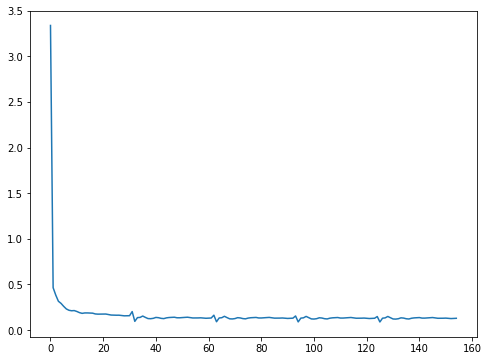

In [60]:
N_EPOCHS = 5

criterion = nn.MSELoss()
optimizer = optim.SGD(multistep.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = multistep(inputs.float())
        print(outputs)
        print(label)
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

# Convolution neural network

In [61]:
class Conv(nn.Module):
    def __init__(self, CONV_WIDTH):
        super(Conv, self).__init__()
        self.conv_1d = nn.Conv1d(19, 32, CONV_WIDTH)
        self.dense_1 = nn.Linear(32,32)
        self.dense_2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv_1d(x).squeeze()
        x = F.relu(x)
        x = self.dense_1(x)
        x = F.relu(x)
        return self.dense_2(x)[:, None]
        
        

In [62]:
conv = Conv(CONV_WIDTH)

In [99]:
for (inputs, label) in train_loader:
    print(inputs.shape)
    out = conv(inputs.float())
    print(out)
    print(out.shape)
    break

torch.Size([4, 3, 19])
tensor([[[-2.0320]],

        [[-2.0623]],

        [[-1.8082]],

        [[-1.6544]]], grad_fn=<UnsqueezeBackward0>)
torch.Size([4, 1, 1])


Epoch #10 - Loss = 0.00716: 100%|██████████| 3067/3067 [00:08<00:00, 370.45it/s]


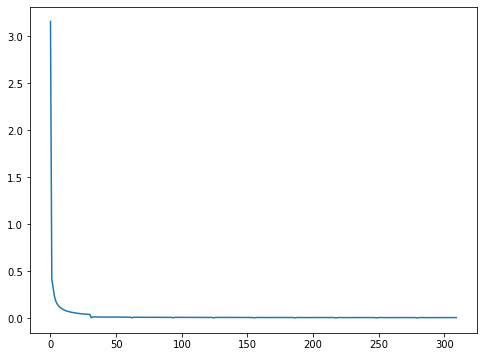

In [64]:
N_EPOCHS = 10

criterion = nn.MSELoss()
optimizer = optim.SGD(conv.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = conv(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

Loss 0.00739: 100%|██████████| 876/876 [00:01<00:00, 588.56it/s]


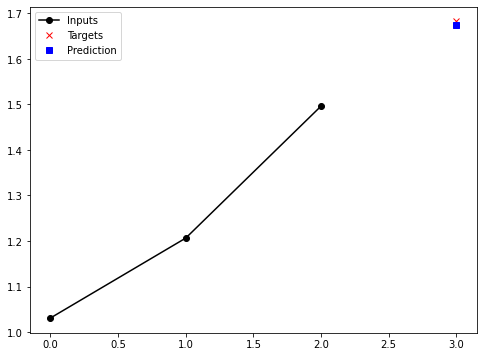

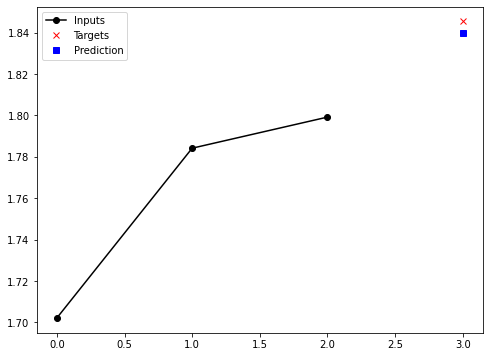

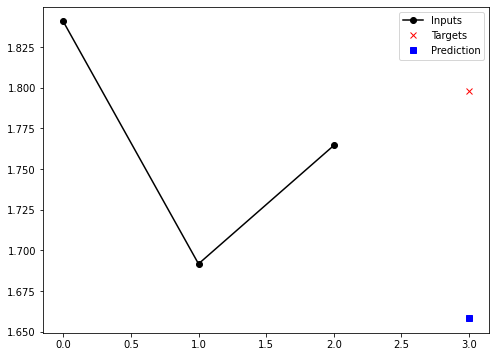

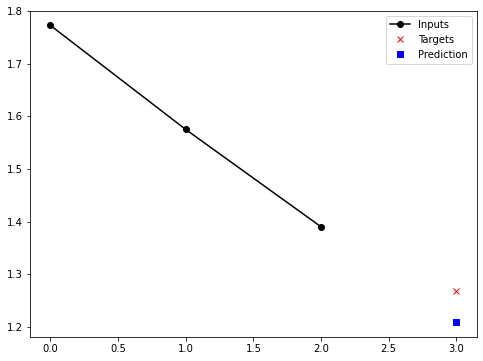

In [65]:
loss = nn.MSELoss()
running_loss = 0
pbar = tqdm(val_loader)
with torch.no_grad():
    for i, (inputs, label) in enumerate(pbar):
        out = conv(inputs.float())
        running_loss += loss(out, label.float())  # MSE per batch
        if not (i % 100):
            pbar.set_description(f"Loss {running_loss / (i+1):.5f}")

for i in range(25, 29):
    out = conv(torch.Tensor(val_ds[i][0])[None, :]).detach().numpy().squeeze()
    plt.plot(np.arange(0, CONV_WIDTH, 1), val_ds[i][0][:, 1], "ko-", label="Inputs")
    plt.plot(CONV_WIDTH, val_ds[i][1], "rx", label="Targets")
    plt.plot(CONV_WIDTH, out, "bs", label="Prediction")
    plt.legend()
    plt.show()

# Recurrent neural network

In [151]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.lstm = nn.LSTM(19, 32)
        self.dense = nn.Linear(32,1)
        
    def forward(self,x):
        #print(x.shape)
        #print(x.view(len(x), 1, -1).shape)
        x, states = self.lstm(x.view(len(x), 1, -1));
        #x, states = self.lstm(x);
        x = self.dense(x);
        return x

In [152]:
rnn = RNN()

In [153]:
BATCH_SIZE = 4

train_ds = WindowGenerator(
    dataframe=train_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

val_ds = WindowGenerator(
    dataframe=val_df, label_columns=['T (degC)'],
    input_width=1, label_width=1, shift=1
)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

In [154]:
for (inputs, label) in train_loader:
    #print(inputs.shape)
    out = rnn(inputs.float())
    #print(out)
    #print(out.shape)
    #print(label.shape)
    break

Epoch #30 - Loss = 0.00659: 100%|██████████| 6133/6133 [00:19<00:00, 319.24it/s]


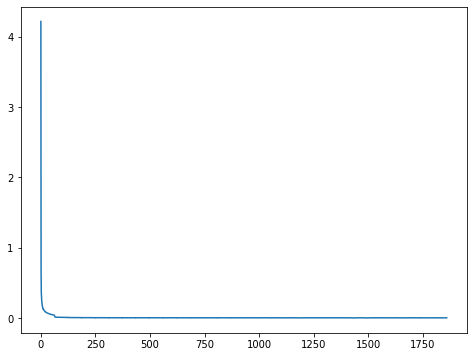

In [155]:
N_EPOCHS = 30

criterion = nn.MSELoss()
optimizer = optim.SGD(rnn.parameters(), lr=1e-3, momentum=0.9)

history = []
for epoch in range(N_EPOCHS):
    running_loss = 0
    pbar = tqdm(train_loader)
    for i, (inputs, label) in enumerate(pbar):
        optimizer.zero_grad()
        outputs = rnn(inputs.float())
        loss = criterion(outputs, label.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if not (i % 100):
            pbar.set_description(
                f"Epoch #{epoch+1} - Loss = {running_loss / (i+1):.5f}"
            )
            history.append(running_loss / (i+1))

plt.plot(history)
plt.show()

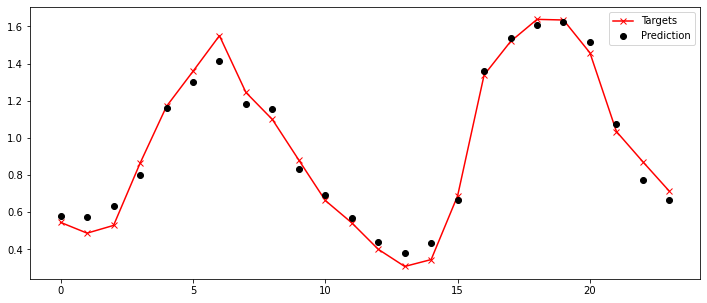

In [156]:
targets = []
outputs = []
for i in range(24):
    #print(val_ds[i][0])
    outputs.append(rnn(torch.Tensor(val_ds[i][0])))
    targets.append(val_ds[i][1].squeeze())

plt.figure(figsize=(12, 5))
plt.plot(targets, "xr-", label="Targets")
plt.plot(outputs, "ok", label="Prediction")
plt.legend()
plt.show()

In [157]:
print(torch.Tensor(val_ds[0][0].shape))

tensor([ 1., 19.])


# Autoregressive model

In [214]:
OUT_STEPS = 24
BATCH_SIZE = 4
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
my_multi_window = WindowGenerator(input_width = 24,
                                 label_width = OUT_STEPS,
                                 shift = OUT_STEPS,
                                 dataframe = train_df,
                                 label_columns = ['T (degC)'])

my_multi_loader = DataLoader(my_multi_window, batch_size=BATCH_SIZE, shuffle = False)

In [207]:
print(multi_window)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None


In [244]:
class Feedback(nn.Module):
    def __init__(self, units, out_steps, hidden_size = 12):
        super(Feedback, self).__init__()
        self.units = units
        self.out_steps = out_steps
        self.lstm_cell = nn.LSTMCell(units, hidden_size)
        #self.lstm_rnn = nn.RNN(19,20) # Peut etre mettre bidirectional a True - moyen de mettre return_state a true
        self.dense = nn.Linear(19,1)
        
    def warmup(self, x):
        print(x.shape)
        x, *state = self.lstm_cell(x)
        
        prediction = self.dense(x)
        return prediction, x
    
    def forward(self, x):
        predictions = []
        prediction, state = self.warmup(x)

In [245]:
feedback_model = Feedback(24, out_steps = OUT_STEPS)

In [248]:
for (inputs, label) in my_multi_loader:
    print(feedback_model.warmup(inputs.float()))
    break;

torch.Size([4, 24, 19])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x19 and 24x48)